# Dual data types (low and high moment seperately)


In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # #%load_ext autoreload
    # # #%autoreload 2
    pass

In [2]:
import integrate as ig
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

import h5py
import numpy as np
import matplotlib.pyplot as plt
hardcopy=True

Notebook detected. Parallel processing is OK


In [3]:
case = 'DAUGAARD'
files = ig.get_case_data(case=case)
f_data_h5 = files[0]
f_data_h5 = 'DAUGAARD_AVG.h5'
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)

Getting data for case: DAUGAARD
--> Got data for case: DAUGAARD
Using data file: DAUGAARD_AVG.h5
Using GEX file: TX07_20231016_2x4_RC20-33.gex


## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d})$

In this example a simple layered prior model will be considered

### 1a. first, a sample of the prior model parameters, $\rho(\mathbf{m})$, will be generated

In [4]:
N=25000
# Layered model
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=3, RHO_min=1, RHO_max=3000)
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, parallel=parallel, showInfo=0)
ig.integrate_update_prior_attributes(f_prior_data_h5)

prior_layered:   0%|                                                                                                                          | 0/25000 [00:00<?, ?it/s]

File PRIOR_CHI2_NF_3_log-uniform_N25000.h5 does not exist.


Using file_basename=TX07_20231016_2x4_RC20-33


prior_data_gaaem: Using 32 parallel threads.


gatdaem1d:   0%|                                                                                                                                | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/781 [00:00<?, ?it/s]

gatdaem1d:   3%|███▎                                                                                                                   | 22/782 [00:01<00:34, 21.91it/s]

gatdaem1d:   4%|█████                                                                                                                  | 33/782 [00:01<00:23, 32.17it/s]

gatdaem1d:   3%|███▉                                                                                                                   | 26/782 [00:01<00:29, 25.81it/s]

gatdaem1d:   3%|███▊                                                                                                                   | 25/781 [00:01<00:30, 24.70it/s]

gatdaem1d:   3%|████                                                                                                                   | 27/781 [00:01<00:28, 26.41it/s]

gatdaem1d:   5%|█████▋                                                                                                                 | 37/781 [00:01<00:20, 36.67it/s]

gatdaem1d:   2%|██▌                                                                                                                    | 17/781 [00:01<00:46, 16.41it/s]

gatdaem1d:   5%|█████▋                                                                                                                 | 37/781 [00:01<00:20, 36.33it/s]

gatdaem1d:   4%|█████▏                                                                                                                 | 34/781 [00:01<00:22, 32.91it/s]

gatdaem1d:   3%|███▊                                                                                                                   | 25/781 [00:01<00:30, 24.61it/s]

gatdaem1d:   4%|████▍                                                                                                                  | 29/781 [00:01<00:26, 28.14it/s]

gatdaem1d:   3%|███▊                                                                                                                   | 25/781 [00:01<00:30, 24.45it/s]

gatdaem1d:   5%|█████▋                                                                                                                 | 37/781 [00:01<00:20, 36.80it/s]

gatdaem1d:   3%|███▉                                                                                                                   | 26/782 [00:01<00:29, 25.45it/s]

gatdaem1d:   4%|████▉                                                                                                                  | 32/781 [00:01<00:23, 31.93it/s]

gatdaem1d:   3%|████                                                                                                                   | 27/782 [00:01<00:28, 26.34it/s]

gatdaem1d:   3%|███▌                                                                                                                   | 23/781 [00:01<00:33, 22.47it/s]

gatdaem1d:   2%|██▉                                                                                                                    | 19/781 [00:01<00:41, 18.27it/s]

gatdaem1d:   2%|██▋                                                                                                                    | 18/782 [00:01<00:43, 17.67it/s]

gatdaem1d:   3%|███▎                                                                                                                   | 22/781 [00:01<00:34, 21.81it/s]

gatdaem1d:   3%|███▊                                                                                                                   | 25/782 [00:01<00:30, 24.77it/s]

gatdaem1d:   4%|████▎                                                                                                                  | 28/781 [00:01<00:27, 27.59it/s]

gatdaem1d:   4%|████▎                                                                                                                  | 28/782 [00:01<00:27, 27.06it/s]

gatdaem1d:   3%|███▋                                                                                                                   | 24/781 [00:01<00:31, 23.67it/s]

gatdaem1d:   3%|███▉                                                                                                                   | 26/781 [00:01<00:30, 24.72it/s]

gatdaem1d:   4%|████▋                                                                                                                  | 31/781 [00:01<00:24, 30.25it/s]

gatdaem1d:   4%|████▎                                                                                                                  | 28/781 [00:01<00:28, 26.37it/s]

gatdaem1d:   3%|███▋                                                                                                                   | 24/781 [00:01<00:31, 23.67it/s]

gatdaem1d:   3%|███▊                                                                                                                   | 25/781 [00:01<00:30, 24.51it/s]

gatdaem1d:   3%|███▊                                                                                                                   | 25/781 [00:01<00:30, 24.82it/s]

gatdaem1d:   3%|███▏                                                                                                                   | 21/781 [00:01<00:37, 20.39it/s]

gatdaem1d:   2%|██▋                                                                                                                    | 18/781 [00:01<00:44, 17.06it/s]

gatdaem1d:   6%|███████                                                                                                                | 46/782 [00:02<00:32, 22.75it/s]

gatdaem1d:   9%|██████████▎                                                                                                            | 68/782 [00:02<00:21, 33.34it/s]

gatdaem1d:   8%|█████████▍                                                                                                             | 62/781 [00:02<00:22, 31.39it/s]

gatdaem1d:   8%|█████████▍                                                                                                             | 62/782 [00:02<00:23, 31.03it/s]

gatdaem1d:   6%|███████▌                                                                                                               | 50/781 [00:02<00:30, 24.28it/s]

gatdaem1d:   9%|██████████▊                                                                                                            | 71/781 [00:02<00:20, 35.07it/s]

gatdaem1d:   8%|█████████▉                                                                                                             | 65/781 [00:02<00:22, 32.48it/s]

gatdaem1d:   5%|█████▉                                                                                                                 | 39/781 [00:02<00:38, 19.14it/s]

gatdaem1d:   8%|█████████▍                                                                                                             | 62/782 [00:02<00:22, 31.35it/s]

gatdaem1d:   8%|█████████▏                                                                                                             | 60/782 [00:02<00:24, 29.87it/s]

gatdaem1d:   6%|███████▌                                                                                                               | 50/781 [00:02<00:30, 23.63it/s]

gatdaem1d:   5%|█████▉                                                                                                                 | 39/781 [00:02<00:38, 19.19it/s]

gatdaem1d:   5%|██████                                                                                                                 | 40/782 [00:02<00:36, 20.08it/s]

gatdaem1d:   6%|███████▍                                                                                                               | 49/781 [00:02<00:30, 24.25it/s]

gatdaem1d:   6%|███████▌                                                                                                               | 50/782 [00:02<00:30, 24.01it/s]

gatdaem1d:   7%|███████▉                                                                                                               | 52/781 [00:02<00:28, 25.98it/s]

gatdaem1d:   7%|████████▌                                                                                                              | 56/782 [00:02<00:27, 26.84it/s]

gatdaem1d:   6%|███████▌                                                                                                               | 50/781 [00:02<00:32, 22.41it/s]

gatdaem1d:   8%|█████████▌                                                                                                             | 63/781 [00:02<00:23, 31.09it/s]

gatdaem1d:   7%|████████▌                                                                                                              | 56/781 [00:02<00:27, 26.30it/s]

gatdaem1d:   9%|███████████▎                                                                                                           | 74/781 [00:02<00:22, 31.74it/s]

gatdaem1d:   9%|███████████▎                                                                                                           | 74/781 [00:02<00:21, 32.97it/s]

gatdaem1d:   6%|███████▌                                                                                                               | 50/781 [00:02<00:29, 24.57it/s]

gatdaem1d:   5%|██████                                                                                                                 | 40/781 [00:02<00:37, 19.55it/s]

gatdaem1d:   7%|████████▌                                                                                                              | 56/781 [00:02<00:25, 28.29it/s]

gatdaem1d:   6%|██████▋                                                                                                                | 44/781 [00:02<00:37, 19.53it/s]

gatdaem1d:   6%|███████▌                                                                                                               | 50/781 [00:02<00:30, 23.84it/s]

gatdaem1d:   7%|███████▊                                                                                                               | 51/781 [00:02<00:32, 22.54it/s]

gatdaem1d:   7%|████████▍                                                                                                              | 55/781 [00:02<00:30, 24.13it/s]

gatdaem1d:   8%|█████████▊                                                                                                             | 64/781 [00:02<00:27, 26.28it/s]

gatdaem1d:   6%|███████▎                                                                                                               | 48/781 [00:02<00:39, 18.49it/s]

gatdaem1d:   9%|███████████▎                                                                                                           | 74/782 [00:03<00:28, 24.86it/s]

gatdaem1d:  13%|███████████████                                                                                                        | 99/781 [00:03<00:20, 33.69it/s]

gatdaem1d:  10%|███████████▌                                                                                                           | 76/781 [00:03<00:28, 24.98it/s]

gatdaem1d:   8%|█████████▊                                                                                                             | 64/781 [00:03<00:33, 21.72it/s]

gatdaem1d:  14%|████████████████▏                                                                                                     | 107/781 [00:03<00:19, 34.49it/s]

gatdaem1d:   9%|███████████▎                                                                                                           | 74/781 [00:03<00:31, 22.49it/s]

gatdaem1d:  12%|██████████████▏                                                                                                        | 93/782 [00:03<00:22, 31.12it/s]

gatdaem1d:  10%|███████████▌                                                                                                           | 76/781 [00:03<00:28, 24.65it/s]

gatdaem1d:   8%|█████████▎                                                                                                             | 61/781 [00:03<00:35, 20.42it/s]

gatdaem1d:  10%|███████████▋                                                                                                           | 77/781 [00:03<00:27, 25.67it/s]

gatdaem1d:  12%|██████████████▏                                                                                                        | 93/782 [00:03<00:23, 28.86it/s]

gatdaem1d:   8%|█████████▉                                                                                                             | 65/782 [00:03<00:32, 21.91it/s]

gatdaem1d:  12%|█████████████▋                                                                                                         | 90/781 [00:03<00:21, 31.42it/s]

gatdaem1d:  11%|█████████████▏                                                                                                         | 87/782 [00:03<00:23, 29.57it/s]

gatdaem1d:  13%|███████████████▍                                                                                                      | 102/782 [00:03<00:22, 30.39it/s]

gatdaem1d:  12%|██████████████▏                                                                                                        | 93/782 [00:03<00:22, 31.26it/s]

gatdaem1d:  12%|██████████████▍                                                                                                        | 95/781 [00:03<00:21, 31.29it/s]

gatdaem1d:   9%|███████████                                                                                                            | 73/781 [00:03<00:31, 22.51it/s]

gatdaem1d:  14%|████████████████▌                                                                                                     | 110/781 [00:03<00:20, 33.43it/s]

gatdaem1d:  10%|███████████▍                                                                                                           | 75/781 [00:03<00:28, 24.59it/s]

gatdaem1d:   8%|█████████▍                                                                                                             | 62/781 [00:03<00:34, 20.64it/s]

gatdaem1d:  12%|██████████████▎                                                                                                        | 94/782 [00:03<00:24, 28.19it/s]

gatdaem1d:  13%|██████████████▉                                                                                                        | 98/781 [00:03<00:23, 28.96it/s]

gatdaem1d:  11%|████████████▉                                                                                                          | 85/781 [00:03<00:24, 28.33it/s]

gatdaem1d:  10%|████████████▎                                                                                                          | 81/781 [00:03<00:26, 26.86it/s]

gatdaem1d:  11%|████████████▋                                                                                                          | 83/781 [00:03<00:27, 25.53it/s]

gatdaem1d:  10%|███████████▌                                                                                                           | 76/781 [00:03<00:28, 24.61it/s]

gatdaem1d:  10%|███████████▍                                                                                                           | 75/781 [00:03<00:30, 23.08it/s]

gatdaem1d:  10%|████████████▏                                                                                                          | 80/781 [00:03<00:28, 24.46it/s]

gatdaem1d:  14%|████████████████▎                                                                                                     | 108/781 [00:03<00:22, 29.53it/s]

gatdaem1d:  12%|█████████████▊                                                                                                         | 91/781 [00:03<00:27, 24.73it/s]

gatdaem1d:  10%|███████████▌                                                                                                           | 76/781 [00:03<00:32, 21.89it/s]

gatdaem1d:  13%|███████████████                                                                                                        | 99/782 [00:04<00:27, 24.77it/s]

gatdaem1d:  12%|██████████████                                                                                                         | 92/781 [00:04<00:28, 24.10it/s]

gatdaem1d:  13%|███████████████▎                                                                                                      | 101/781 [00:04<00:28, 24.18it/s]

gatdaem1d:  18%|█████████████████████▍                                                                                                | 142/781 [00:04<00:18, 34.33it/s]

gatdaem1d:  13%|███████████████                                                                                                       | 100/781 [00:04<00:28, 23.50it/s]

gatdaem1d:  11%|████████████▊                                                                                                          | 84/781 [00:04<00:32, 21.27it/s]

gatdaem1d:  12%|██████████████                                                                                                         | 92/782 [00:04<00:28, 23.80it/s]

gatdaem1d:  17%|████████████████████                                                                                                  | 133/781 [00:04<00:20, 31.55it/s]

gatdaem1d:  16%|██████████████████▍                                                                                                   | 122/782 [00:04<00:23, 28.59it/s]

gatdaem1d:  15%|█████████████████▏                                                                                                    | 114/781 [00:04<00:22, 29.65it/s]

gatdaem1d:  18%|████████████████████▊                                                                                                 | 138/782 [00:04<00:19, 32.22it/s]

gatdaem1d:  16%|███████████████████▏                                                                                                  | 127/782 [00:04<00:20, 32.21it/s]

gatdaem1d:  15%|██████████████████▎                                                                                                   | 121/782 [00:04<00:21, 30.86it/s]

gatdaem1d:  12%|██████████████▋                                                                                                        | 96/781 [00:04<00:30, 22.65it/s]

gatdaem1d:  13%|███████████████▌                                                                                                      | 103/781 [00:04<00:26, 25.84it/s]

gatdaem1d:  16%|██████████████████▊                                                                                                   | 125/782 [00:04<00:22, 29.28it/s]

gatdaem1d:  16%|██████████████████▍                                                                                                   | 122/781 [00:04<00:21, 30.44it/s]

gatdaem1d:  16%|███████████████████▏                                                                                                  | 127/782 [00:04<00:21, 29.94it/s]

gatdaem1d:  14%|████████████████▊                                                                                                     | 111/781 [00:04<00:25, 26.41it/s]

gatdaem1d:  12%|█████████████▊                                                                                                         | 91/781 [00:04<00:29, 23.56it/s]

gatdaem1d:  14%|████████████████▏                                                                                                     | 107/781 [00:04<00:24, 27.01it/s]

gatdaem1d:  15%|█████████████████▏                                                                                                    | 114/781 [00:04<00:23, 28.12it/s]

gatdaem1d:  13%|███████████████                                                                                                       | 100/781 [00:04<00:29, 23.46it/s]

gatdaem1d:  14%|████████████████▍                                                                                                     | 109/781 [00:04<00:25, 26.18it/s]

gatdaem1d:  14%|████████████████                                                                                                      | 106/781 [00:04<00:27, 24.71it/s]

gatdaem1d:  16%|███████████████████▎                                                                                                  | 128/781 [00:04<00:23, 28.01it/s]

gatdaem1d:  16%|███████████████████▏                                                                                                  | 127/781 [00:04<00:23, 28.11it/s]

gatdaem1d:  13%|███████████████▎                                                                                                      | 101/781 [00:04<00:32, 20.89it/s]

gatdaem1d:  18%|█████████████████████▊                                                                                                | 144/781 [00:04<00:21, 29.14it/s]

gatdaem1d:  15%|█████████████████▋                                                                                                    | 117/781 [00:04<00:27, 24.47it/s]

gatdaem1d:  13%|███████████████                                                                                                        | 99/781 [00:04<00:30, 22.22it/s]

gatdaem1d:  18%|████████████████████▊                                                                                                 | 138/781 [00:04<00:23, 26.98it/s]

gatdaem1d:  16%|██████████████████▍                                                                                                   | 122/781 [00:05<00:25, 26.12it/s]

gatdaem1d:  17%|███████████████████▉                                                                                                  | 132/781 [00:05<00:24, 26.24it/s]

gatdaem1d:  14%|████████████████▍                                                                                                     | 109/781 [00:05<00:30, 22.35it/s]

gatdaem1d:  15%|█████████████████▋                                                                                                    | 117/782 [00:05<00:27, 24.00it/s]

gatdaem1d:  16%|██████████████████▋                                                                                                   | 124/782 [00:05<00:28, 23.19it/s]

gatdaem1d:  19%|██████████████████████▊                                                                                               | 151/782 [00:05<00:22, 28.12it/s]

gatdaem1d:  20%|███████████████████████▉                                                                                              | 159/782 [00:05<00:20, 30.77it/s]

gatdaem1d:  20%|███████████████████████▋                                                                                              | 157/781 [00:05<00:19, 31.92it/s]

gatdaem1d:  15%|█████████████████▍                                                                                                    | 115/781 [00:05<00:28, 23.72it/s]

gatdaem1d:  20%|████████████████████████▏                                                                                             | 160/782 [00:05<00:19, 31.15it/s]

gatdaem1d:  16%|███████████████████                                                                                                   | 126/781 [00:05<00:29, 22.42it/s]

gatdaem1d:  18%|█████████████████████▊                                                                                                | 144/781 [00:05<00:22, 27.94it/s]

gatdaem1d:  17%|███████████████████▍                                                                                                  | 129/781 [00:05<00:26, 24.98it/s]

gatdaem1d:  19%|██████████████████████▉                                                                                               | 152/782 [00:05<00:21, 29.31it/s]

gatdaem1d:  22%|█████████████████████████▊                                                                                            | 171/782 [00:05<00:20, 30.44it/s]

gatdaem1d:  19%|██████████████████████▎                                                                                               | 148/781 [00:05<00:21, 29.88it/s]

gatdaem1d:  18%|████████████████████▊                                                                                                 | 138/781 [00:05<00:24, 25.87it/s]

gatdaem1d:  16%|██████████████████▋                                                                                                   | 124/781 [00:05<00:27, 23.59it/s]

gatdaem1d:  17%|████████████████████▍                                                                                                 | 135/781 [00:05<00:24, 26.60it/s]

gatdaem1d:  18%|████████████████████▊                                                                                                 | 138/781 [00:05<00:23, 26.87it/s]

gatdaem1d:  15%|█████████████████▉                                                                                                    | 119/781 [00:05<00:31, 20.90it/s]

gatdaem1d:  21%|████████████████████████▉                                                                                             | 165/781 [00:05<00:21, 28.49it/s]

gatdaem1d:  17%|███████████████████▊                                                                                                  | 131/781 [00:05<00:26, 24.24it/s]

gatdaem1d:  20%|███████████████████████▊                                                                                              | 158/782 [00:05<00:22, 28.24it/s]

gatdaem1d:  20%|███████████████████████▋                                                                                              | 157/781 [00:05<00:22, 27.55it/s]

gatdaem1d:  20%|███████████████████████▋                                                                                              | 157/781 [00:05<00:21, 28.70it/s]

gatdaem1d:  23%|██████████████████████████▋                                                                                           | 177/781 [00:05<00:20, 29.52it/s]

gatdaem1d:  19%|██████████████████████▋                                                                                               | 150/781 [00:05<00:23, 27.19it/s]

gatdaem1d:  16%|██████████████████▌                                                                                                   | 123/781 [00:05<00:32, 20.45it/s]

gatdaem1d:  17%|████████████████████                                                                                                  | 133/781 [00:05<00:24, 26.13it/s]

gatdaem1d:  22%|█████████████████████████▊                                                                                            | 171/781 [00:05<00:21, 28.69it/s]

gatdaem1d:  22%|██████████████████████████▎                                                                                           | 174/781 [00:05<00:21, 27.59it/s]

gatdaem1d:  20%|███████████████████████▍                                                                                              | 155/781 [00:06<00:22, 28.27it/s]

gatdaem1d:  21%|████████████████████████▍                                                                                             | 162/781 [00:06<00:22, 27.22it/s]

gatdaem1d:  17%|████████████████████▏                                                                                                 | 134/781 [00:06<00:27, 23.14it/s]

gatdaem1d:  18%|█████████████████████▍                                                                                                | 142/782 [00:06<00:26, 24.20it/s]

gatdaem1d:  20%|███████████████████████                                                                                               | 153/782 [00:06<00:25, 24.92it/s]

gatdaem1d:  24%|████████████████████████████▏                                                                                         | 187/782 [00:06<00:19, 30.57it/s]

gatdaem1d:  18%|█████████████████████▎                                                                                                | 141/781 [00:06<00:26, 24.32it/s]

gatdaem1d:  22%|██████████████████████████▍                                                                                           | 175/781 [00:06<00:21, 28.83it/s]

gatdaem1d:  19%|██████████████████████▌                                                                                               | 149/781 [00:06<00:28, 22.38it/s]

gatdaem1d:  20%|███████████████████████▍                                                                                              | 155/781 [00:06<00:24, 25.18it/s]

gatdaem1d:  21%|████████████████████████▎                                                                                             | 161/781 [00:06<00:22, 27.86it/s]

gatdaem1d:  21%|████████████████████████▊                                                                                             | 164/781 [00:06<00:24, 25.65it/s]

gatdaem1d:  22%|█████████████████████████▉                                                                                            | 172/781 [00:06<00:20, 29.16it/s]

gatdaem1d:  24%|████████████████████████████▋                                                                                         | 190/781 [00:06<00:19, 30.48it/s]

gatdaem1d:  19%|██████████████████████▎                                                                                               | 148/781 [00:06<00:27, 23.41it/s]

gatdaem1d:  25%|████████████████████████████▉                                                                                         | 192/782 [00:06<00:19, 30.04it/s]

gatdaem1d:  23%|███████████████████████████▍                                                                                          | 182/782 [00:06<00:21, 28.47it/s]

gatdaem1d:  25%|█████████████████████████████▎                                                                                        | 194/781 [00:06<00:20, 28.36it/s]

gatdaem1d:  20%|███████████████████████▌                                                                                              | 156/781 [00:06<00:25, 24.22it/s]

gatdaem1d:  25%|████████████████████████████▉                                                                                         | 192/782 [00:06<00:19, 29.89it/s]

gatdaem1d:  25%|█████████████████████████████▍                                                                                        | 195/781 [00:06<00:18, 31.61it/s]

gatdaem1d:  27%|████████████████████████████████▏                                                                                     | 213/781 [00:06<00:18, 31.30it/s]

gatdaem1d:  23%|██████████████████████████▉                                                                                           | 178/781 [00:06<00:22, 27.19it/s]

gatdaem1d:  23%|██████████████████████████▉                                                                                           | 178/781 [00:06<00:22, 26.94it/s]

gatdaem1d:  24%|███████████████████████████▉                                                                                          | 185/781 [00:06<00:22, 26.08it/s]

gatdaem1d:  19%|██████████████████████▏                                                                                               | 147/781 [00:06<00:29, 21.30it/s]

gatdaem1d:  21%|████████████████████████▉                                                                                             | 165/781 [00:06<00:22, 27.83it/s]

gatdaem1d:  21%|████████████████████████▍                                                                                             | 162/781 [00:06<00:26, 23.70it/s]

gatdaem1d:  26%|███████████████████████████████                                                                                       | 206/781 [00:06<00:19, 28.76it/s]

gatdaem1d:  26%|██████████████████████████████▎                                                                                       | 201/781 [00:06<00:20, 28.56it/s]

gatdaem1d:  24%|████████████████████████████                                                                                          | 186/781 [00:07<00:20, 28.90it/s]

gatdaem1d:  23%|███████████████████████████▎                                                                                          | 181/782 [00:07<00:23, 25.87it/s]

gatdaem1d:  24%|████████████████████████████▋                                                                                         | 190/782 [00:07<00:24, 23.72it/s]

gatdaem1d:  20%|███████████████████████▊                                                                                              | 158/781 [00:07<00:27, 23.00it/s]

gatdaem1d:  22%|██████████████████████████▎                                                                                           | 174/782 [00:07<00:23, 26.35it/s]

gatdaem1d:  29%|█████████████████████████████████▊                                                                                    | 224/782 [00:07<00:17, 32.56it/s]

gatdaem1d:  24%|████████████████████████████▊                                                                                         | 191/781 [00:07<00:22, 26.26it/s]

gatdaem1d:  26%|██████████████████████████████▍                                                                                       | 202/782 [00:07<00:24, 23.78it/s]

gatdaem1d:  23%|██████████████████████████▋                                                                                           | 177/781 [00:07<00:21, 27.93it/s]

gatdaem1d:  27%|███████████████████████████████▉                                                                                      | 211/781 [00:07<00:18, 31.03it/s]

gatdaem1d:  22%|██████████████████████████▎                                                                                           | 174/781 [00:07<00:26, 23.18it/s]

gatdaem1d:  23%|███████████████████████████▎                                                                                          | 181/781 [00:07<00:23, 25.04it/s]

gatdaem1d:  24%|████████████████████████████▌                                                                                         | 189/781 [00:07<00:21, 27.77it/s]

gatdaem1d:  24%|███████████████████████████▉                                                                                          | 185/781 [00:07<00:21, 27.51it/s]

gatdaem1d:  28%|█████████████████████████████████                                                                                     | 219/782 [00:07<00:18, 30.95it/s]

gatdaem1d:  24%|████████████████████████████▍                                                                                         | 188/781 [00:07<00:22, 26.50it/s]

gatdaem1d:  26%|██████████████████████████████▌                                                                                       | 202/781 [00:07<00:20, 28.46it/s]

gatdaem1d:  24%|████████████████████████████▋                                                                                         | 190/781 [00:07<00:24, 24.53it/s]

gatdaem1d:  32%|█████████████████████████████████████▎                                                                                | 247/781 [00:07<00:16, 32.08it/s]

gatdaem1d:  29%|█████████████████████████████████▋                                                                                    | 223/781 [00:07<00:20, 27.62it/s]

gatdaem1d:  29%|█████████████████████████████████▋                                                                                    | 223/782 [00:07<00:19, 29.38it/s]

gatdaem1d:  29%|█████████████████████████████████▋                                                                                    | 223/782 [00:07<00:19, 28.87it/s]

gatdaem1d:  29%|██████████████████████████████████▎                                                                                   | 227/781 [00:07<00:18, 30.68it/s]

gatdaem1d:  28%|█████████████████████████████████▍                                                                                    | 221/781 [00:07<00:19, 28.60it/s]

gatdaem1d:  28%|████████████████████████████████▋                                                                                     | 216/781 [00:07<00:18, 30.53it/s]

gatdaem1d:  28%|████████████████████████████████▊                                                                                     | 217/781 [00:07<00:18, 30.41it/s]

gatdaem1d:  27%|████████████████████████████████▎                                                                                     | 214/781 [00:07<00:21, 26.76it/s]

gatdaem1d:  22%|█████████████████████████▋                                                                                            | 170/781 [00:07<00:28, 21.73it/s]

gatdaem1d:  25%|█████████████████████████████▎                                                                                        | 194/781 [00:07<00:21, 27.74it/s]

gatdaem1d:  24%|████████████████████████████▎                                                                                         | 187/781 [00:07<00:25, 23.55it/s]

gatdaem1d:  30%|███████████████████████████████████▋                                                                                  | 236/781 [00:08<00:19, 27.86it/s]

gatdaem1d:  29%|██████████████████████████████████▊                                                                                   | 230/781 [00:08<00:20, 27.44it/s]

gatdaem1d:  29%|█████████████████████████████████▋                                                                                    | 223/781 [00:08<00:17, 31.13it/s]

gatdaem1d:  26%|██████████████████████████████▎                                                                                       | 201/782 [00:08<00:21, 26.50it/s]

gatdaem1d:  23%|███████████████████████████▍                                                                                          | 182/781 [00:08<00:26, 22.90it/s]

gatdaem1d:  31%|████████████████████████████████████                                                                                  | 239/782 [00:08<00:20, 27.13it/s]

gatdaem1d:  27%|███████████████████████████████▍                                                                                      | 208/782 [00:08<00:22, 25.06it/s]

gatdaem1d:  27%|███████████████████████████████▋                                                                                      | 210/781 [00:08<00:19, 29.52it/s]

gatdaem1d:  28%|█████████████████████████████████                                                                                     | 219/781 [00:08<00:21, 26.35it/s]

gatdaem1d:  31%|█████████████████████████████████████▏                                                                                | 246/781 [00:08<00:16, 32.06it/s]

gatdaem1d:  25%|█████████████████████████████▉                                                                                        | 198/781 [00:08<00:25, 23.31it/s]

gatdaem1d:  28%|████████████████████████████████▌                                                                                     | 216/782 [00:08<00:24, 23.14it/s]

gatdaem1d:  33%|██████████████████████████████████████▊                                                                               | 257/782 [00:08<00:17, 30.57it/s]

gatdaem1d:  27%|███████████████████████████████▎                                                                                      | 207/781 [00:08<00:22, 24.99it/s]

gatdaem1d:  33%|██████████████████████████████████████▍                                                                               | 255/782 [00:08<00:16, 32.44it/s]

gatdaem1d:  28%|████████████████████████████████▍                                                                                     | 215/781 [00:08<00:20, 27.97it/s]

gatdaem1d:  29%|█████████████████████████████████▊                                                                                    | 224/781 [00:08<00:19, 29.23it/s]

gatdaem1d:  28%|████████████████████████████████▊                                                                                     | 217/781 [00:08<00:21, 26.48it/s]

gatdaem1d:  28%|████████████████████████████████▍                                                                                     | 215/781 [00:08<00:23, 24.31it/s]

gatdaem1d:  33%|███████████████████████████████████████▏                                                                              | 259/781 [00:08<00:16, 30.95it/s]

gatdaem1d:  32%|██████████████████████████████████████▏                                                                               | 253/782 [00:08<00:18, 28.75it/s]

gatdaem1d:  32%|█████████████████████████████████████▉                                                                                | 251/781 [00:08<00:19, 27.01it/s]

gatdaem1d:  32%|██████████████████████████████████████▏                                                                               | 253/781 [00:08<00:16, 32.36it/s]

gatdaem1d:  33%|██████████████████████████████████████▍                                                                               | 254/781 [00:08<00:16, 32.16it/s]

gatdaem1d:  31%|█████████████████████████████████████▏                                                                                | 246/781 [00:08<00:19, 28.11it/s]

gatdaem1d:  32%|██████████████████████████████████████▏                                                                               | 253/782 [00:08<00:18, 28.27it/s]

gatdaem1d:  32%|█████████████████████████████████████▊                                                                                | 250/781 [00:08<00:19, 27.53it/s]

gatdaem1d:  30%|██████████████████████████████████▉                                                                                   | 231/781 [00:08<00:20, 26.30it/s]

gatdaem1d:  29%|█████████████████████████████████▋                                                                                    | 223/781 [00:08<00:20, 27.87it/s]

gatdaem1d:  25%|█████████████████████████████▏                                                                                        | 193/781 [00:08<00:27, 21.40it/s]

gatdaem1d:  27%|███████████████████████████████▉                                                                                      | 211/781 [00:08<00:24, 23.62it/s]

gatdaem1d:  36%|██████████████████████████████████████████▎                                                                           | 280/781 [00:09<00:17, 29.11it/s]

gatdaem1d:  34%|███████████████████████████████████████▌                                                                              | 262/781 [00:09<00:18, 28.72it/s]

gatdaem1d:  34%|████████████████████████████████████████                                                                              | 265/781 [00:09<00:18, 27.26it/s]

gatdaem1d:  27%|███████████████████████████████▎                                                                                      | 207/781 [00:09<00:24, 23.46it/s]

gatdaem1d:  33%|██████████████████████████████████████▌                                                                               | 255/781 [00:09<00:17, 29.42it/s]

gatdaem1d:  32%|█████████████████████████████████████▎                                                                                | 247/781 [00:09<00:19, 26.75it/s]

gatdaem1d:  30%|███████████████████████████████████▊                                                                                  | 237/782 [00:09<00:21, 25.81it/s]

gatdaem1d:  29%|██████████████████████████████████▍                                                                                   | 228/782 [00:09<00:21, 25.19it/s]

gatdaem1d:  29%|█████████████████████████████████▋                                                                                    | 223/781 [00:09<00:23, 23.47it/s]

gatdaem1d:  31%|████████████████████████████████████▎                                                                                 | 241/782 [00:09<00:23, 23.22it/s]

gatdaem1d:  37%|███████████████████████████████████████████▉                                                                          | 291/782 [00:09<00:15, 31.36it/s]

gatdaem1d:  30%|███████████████████████████████████▋                                                                                  | 236/781 [00:09<00:20, 26.09it/s]

gatdaem1d:  37%|███████████████████████████████████████████▊                                                                          | 290/782 [00:09<00:14, 33.16it/s]

gatdaem1d:  31%|████████████████████████████████████▎                                                                                 | 240/781 [00:09<00:19, 27.72it/s]

gatdaem1d:  31%|████████████████████████████████████▊                                                                                 | 244/781 [00:09<00:19, 27.30it/s]

gatdaem1d:  34%|████████████████████████████████████████▌                                                                             | 269/782 [00:09<00:19, 25.66it/s]

gatdaem1d:  31%|████████████████████████████████████▌                                                                                 | 242/781 [00:09<00:21, 24.95it/s]

gatdaem1d:  38%|████████████████████████████████████████████▊                                                                         | 297/781 [00:09<00:14, 33.03it/s]

gatdaem1d:  36%|██████████████████████████████████████████▋                                                                           | 283/782 [00:09<00:17, 29.04it/s]

gatdaem1d:  36%|██████████████████████████████████████████▌                                                                           | 282/781 [00:09<00:17, 28.05it/s]

gatdaem1d:  36%|██████████████████████████████████████████▏                                                                           | 279/781 [00:09<00:17, 29.24it/s]

gatdaem1d:  31%|████████████████████████████████████▊                                                                                 | 244/781 [00:09<00:20, 25.58it/s]

gatdaem1d:  33%|██████████████████████████████████████▍                                                                               | 254/781 [00:09<00:18, 27.81it/s]

gatdaem1d:  36%|██████████████████████████████████████████▌                                                                           | 282/782 [00:09<00:17, 27.86it/s]

gatdaem1d:  28%|████████████████████████████████▊                                                                                     | 217/781 [00:09<00:25, 22.16it/s]

gatdaem1d:  37%|███████████████████████████████████████████▋                                                                          | 289/781 [00:09<00:16, 30.70it/s]

gatdaem1d:  33%|███████████████████████████████████████▎                                                                              | 260/781 [00:09<00:17, 30.42it/s]

gatdaem1d:  30%|███████████████████████████████████▌                                                                                  | 235/781 [00:09<00:23, 23.57it/s]

gatdaem1d:  35%|█████████████████████████████████████████▌                                                                            | 275/781 [00:09<00:18, 26.82it/s]

gatdaem1d:  37%|███████████████████████████████████████████▏                                                                          | 286/781 [00:09<00:16, 30.34it/s]

gatdaem1d:  37%|███████████████████████████████████████████▎                                                                          | 287/781 [00:09<00:16, 30.13it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▊                                                                       | 310/781 [00:10<00:16, 28.96it/s]

gatdaem1d:  33%|██████████████████████████████████████▉                                                                               | 258/781 [00:09<00:20, 25.04it/s]

gatdaem1d:  37%|███████████████████████████████████████████▉                                                                          | 291/781 [00:10<00:18, 27.14it/s]

gatdaem1d:  38%|████████████████████████████████████████████▎                                                                         | 293/781 [00:10<00:18, 26.35it/s]

gatdaem1d:  30%|██████████████████████████████████▉                                                                                   | 231/781 [00:10<00:23, 23.01it/s]

gatdaem1d:  33%|██████████████████████████████████████▋                                                                               | 256/782 [00:10<00:20, 25.98it/s]

gatdaem1d:  32%|█████████████████████████████████████▎                                                                                | 247/781 [00:10<00:22, 23.59it/s]

gatdaem1d:  35%|█████████████████████████████████████████▊                                                                            | 277/782 [00:10<00:18, 26.66it/s]

gatdaem1d:  36%|███████████████████████████████████████████                                                                           | 285/781 [00:10<00:17, 28.52it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▎                                                                    | 327/782 [00:10<00:14, 32.46it/s]

gatdaem1d:  34%|███████████████████████████████████████▋                                                                              | 263/782 [00:10<00:20, 24.99it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████                                                                     | 325/782 [00:10<00:13, 33.48it/s]

gatdaem1d:  34%|███████████████████████████████████████▋                                                                              | 263/781 [00:10<00:20, 25.87it/s]

gatdaem1d:  35%|█████████████████████████████████████████▌                                                                            | 275/781 [00:10<00:19, 25.59it/s]

gatdaem1d:  34%|████████████████████████████████████████▍                                                                             | 268/781 [00:10<00:18, 27.54it/s]

gatdaem1d:  35%|█████████████████████████████████████████▌                                                                            | 275/781 [00:10<00:17, 28.35it/s]

gatdaem1d:  42%|██████████████████████████████████████████████████                                                                    | 331/781 [00:10<00:13, 33.09it/s]

gatdaem1d:  34%|████████████████████████████████████████▍                                                                             | 268/781 [00:10<00:21, 23.76it/s]

gatdaem1d:  38%|████████████████████████████████████████████▊                                                                         | 297/782 [00:10<00:19, 24.78it/s]

gatdaem1d:  40%|███████████████████████████████████████████████▏                                                                      | 313/782 [00:10<00:16, 27.84it/s]

gatdaem1d:  40%|███████████████████████████████████████████████▋                                                                      | 316/782 [00:10<00:15, 29.41it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▉                                                                     | 324/781 [00:10<00:14, 31.68it/s]

gatdaem1d:  31%|████████████████████████████████████▎                                                                                 | 240/781 [00:10<00:24, 22.18it/s]

gatdaem1d:  33%|███████████████████████████████████████▏                                                                              | 259/781 [00:10<00:22, 23.57it/s]

gatdaem1d:  36%|██████████████████████████████████████████▌                                                                           | 282/781 [00:10<00:18, 26.28it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▋                                                                       | 309/781 [00:10<00:17, 27.39it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▉                                                                       | 311/781 [00:11<00:17, 26.20it/s]

gatdaem1d:  35%|████████████████████████████████████████▊                                                                             | 270/781 [00:10<00:21, 23.82it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▋                                                                  | 342/781 [00:11<00:14, 29.59it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▉                                                                      | 317/781 [00:11<00:15, 29.12it/s]

gatdaem1d:  37%|███████████████████████████████████████████▉                                                                          | 291/781 [00:11<00:17, 27.98it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▊                                                                        | 303/781 [00:11<00:18, 25.37it/s]

gatdaem1d:  36%|██████████████████████████████████████████▉                                                                           | 284/781 [00:11<00:20, 24.13it/s]

gatdaem1d:  41%|████████████████████████████████████████████████                                                                      | 318/781 [00:11<00:16, 28.41it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▎                                                                     | 320/781 [00:11<00:17, 26.48it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▎                                                                     | 320/781 [00:11<00:16, 27.36it/s]

gatdaem1d:  40%|███████████████████████████████████████████████▍                                                                      | 314/782 [00:11<00:15, 29.33it/s]

gatdaem1d:  35%|████████████████████████████████████████▉                                                                             | 271/781 [00:11<00:21, 23.36it/s]

gatdaem1d:  40%|███████████████████████████████████████████████▍                                                                      | 314/781 [00:11<00:16, 28.45it/s]

gatdaem1d:  37%|███████████████████████████████████████████▌                                                                          | 289/782 [00:11<00:19, 25.26it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▉                                                               | 364/782 [00:11<00:12, 33.52it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████▍                                                               | 361/782 [00:11<00:12, 34.12it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▊                                                                       | 310/781 [00:11<00:15, 30.20it/s]

gatdaem1d:  33%|██████████████████████████████████████▌                                                                               | 255/781 [00:11<00:24, 21.39it/s]

gatdaem1d:  38%|████████████████████████████████████████████▋                                                                         | 296/781 [00:11<00:17, 27.26it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▍                                                                        | 301/781 [00:11<00:19, 24.94it/s]

gatdaem1d:  36%|██████████████████████████████████████████▋                                                                           | 283/782 [00:11<00:20, 24.45it/s]

gatdaem1d:  37%|███████████████████████████████████████████▋                                                                          | 289/781 [00:11<00:20, 24.36it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▋                                                                 | 349/782 [00:11<00:14, 30.25it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▍                                                                  | 341/782 [00:11<00:15, 27.69it/s]

gatdaem1d:  37%|████████████████████████████████████████████                                                                          | 292/781 [00:11<00:20, 23.50it/s]

gatdaem1d:  34%|████████████████████████████████████████                                                                              | 265/781 [00:11<00:22, 22.68it/s]

gatdaem1d:  36%|██████████████████████████████████████████▊                                                                           | 283/781 [00:11<00:21, 23.33it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▍                                                                        | 301/781 [00:11<00:18, 25.78it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▉                                                                   | 337/781 [00:11<00:16, 27.27it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▋                                                                     | 323/782 [00:12<00:19, 24.08it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▏                                                              | 365/781 [00:11<00:13, 29.91it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▋                                                                       | 309/781 [00:11<00:18, 25.53it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▊                                                                   | 336/781 [00:12<00:16, 27.44it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▎                                                             | 373/781 [00:12<00:14, 28.61it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▋                                                                       | 309/781 [00:12<00:19, 24.25it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▉                                                                | 357/781 [00:12<00:14, 28.51it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████▍                                                                 | 347/781 [00:12<00:17, 25.42it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████                                                                   | 338/781 [00:12<00:19, 23.25it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████▍                                                                 | 347/781 [00:12<00:16, 26.68it/s]

gatdaem1d:  38%|████████████████████████████████████████████▌                                                                         | 295/781 [00:12<00:20, 23.41it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▌                                                                 | 348/782 [00:12<00:14, 30.44it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████▍                                                                 | 347/781 [00:12<00:16, 26.36it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▌                                                                 | 348/781 [00:12<00:16, 25.81it/s]

gatdaem1d:  40%|███████████████████████████████████████████████▌                                                                      | 315/782 [00:12<00:18, 25.24it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▎                                                                     | 320/781 [00:12<00:18, 24.82it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▍                                                                    | 327/781 [00:12<00:18, 25.16it/s]

gatdaem1d:  40%|███████████████████████████████████████████████▍                                                                      | 314/782 [00:12<00:17, 26.22it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████                                                          | 398/782 [00:12<00:11, 32.12it/s]

gatdaem1d:  36%|██████████████████████████████████████████                                                                            | 278/781 [00:12<00:23, 21.61it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▍                                                                     | 321/781 [00:12<00:17, 26.51it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▊                                                                  | 343/781 [00:12<00:16, 26.45it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▊                                                          | 396/782 [00:12<00:12, 31.97it/s]

gatdaem1d:  37%|███████████████████████████████████████████▉                                                                          | 291/781 [00:12<00:20, 23.58it/s]

gatdaem1d:  41%|████████████████████████████████████████████████                                                                      | 318/781 [00:12<00:19, 23.81it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▎                                                             | 373/781 [00:12<00:13, 29.52it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▌                                                                 | 348/782 [00:13<00:18, 23.92it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▊                                                                   | 336/781 [00:12<00:17, 25.75it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▌                                                                    | 328/781 [00:13<00:18, 24.93it/s]

gatdaem1d:  39%|██████████████████████████████████████████████▍                                                                       | 307/781 [00:12<00:21, 22.12it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▋                                                              | 369/782 [00:13<00:16, 25.48it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▍                                                              | 367/781 [00:13<00:14, 28.34it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▎                                                            | 380/782 [00:13<00:14, 27.72it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▊                                                          | 396/781 [00:13<00:13, 28.71it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▉                                                                     | 324/781 [00:13<00:19, 23.37it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████▋                                                         | 402/781 [00:13<00:13, 28.15it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▌                                                                  | 341/781 [00:13<00:17, 25.63it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▍                                                                   | 334/781 [00:13<00:18, 23.85it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▏                                                                     | 319/781 [00:13<00:19, 23.47it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████▋                                                               | 362/781 [00:13<00:18, 22.99it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▎                                                             | 373/781 [00:13<00:16, 24.47it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▋                                                             | 375/781 [00:13<00:15, 26.16it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▍                                                                  | 341/782 [00:13<00:16, 26.24it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████▏                                                               | 359/781 [00:13<00:15, 26.87it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▋                                                             | 375/781 [00:13<00:16, 24.88it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████▎                                                                 | 346/781 [00:13<00:17, 24.61it/s]

gatdaem1d:  55%|█████████████████████████████████████████████████████████████████                                                     | 431/782 [00:13<00:11, 31.71it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▍                                                                        | 301/781 [00:13<00:22, 21.59it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▋                                                                 | 349/781 [00:13<00:16, 26.81it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▍                                                                  | 341/782 [00:13<00:18, 23.71it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▉                                                              | 370/781 [00:13<00:16, 25.62it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▍                                                           | 387/781 [00:13<00:15, 24.72it/s]

gatdaem1d:  41%|████████████████████████████████████████████████                                                                      | 318/781 [00:13<00:18, 24.40it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▋                                                                  | 342/781 [00:13<00:18, 23.69it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▎                                                            | 380/782 [00:14<00:14, 26.81it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████                                                         | 404/781 [00:14<00:12, 29.87it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▌                                                             | 374/781 [00:14<00:17, 23.20it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▎                                                             | 373/782 [00:14<00:16, 24.07it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▋                                                     | 429/782 [00:14<00:12, 29.39it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████▊                                                               | 363/781 [00:14<00:15, 27.72it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▊                                                                   | 336/781 [00:14<00:18, 23.86it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████▎                                                         | 400/782 [00:14<00:14, 26.85it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▊                                                     | 429/781 [00:14<00:11, 29.72it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▌                                                    | 434/781 [00:14<00:11, 29.14it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▊                                                          | 396/781 [00:14<00:13, 27.78it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████▍                                                               | 360/781 [00:14<00:17, 24.32it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████▋                                                               | 362/781 [00:14<00:17, 23.49it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████▋                                                        | 409/782 [00:14<00:14, 26.22it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████▏                                                                 | 345/781 [00:14<00:18, 24.16it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▌                                                           | 388/781 [00:14<00:16, 23.70it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▋                                                                 | 349/781 [00:14<00:19, 21.97it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████                                                         | 404/781 [00:14<00:14, 26.20it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████▋                                                         | 402/781 [00:14<00:14, 25.98it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████                                                         | 404/781 [00:14<00:14, 25.82it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▌                                                              | 368/781 [00:14<00:17, 23.18it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▌                                                              | 368/782 [00:14<00:15, 25.96it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▍                                               | 467/782 [00:14<00:09, 32.78it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▊                                                             | 376/781 [00:14<00:15, 26.85it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▊                                                           | 389/781 [00:14<00:14, 27.17it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▎                                                             | 373/782 [00:14<00:15, 25.87it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▊                                                                     | 323/781 [00:14<00:21, 21.34it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████▋                                                         | 402/781 [00:14<00:13, 27.37it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▏                                                             | 372/781 [00:14<00:17, 23.85it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████                                                                 | 351/781 [00:15<00:16, 26.81it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▉                                                              | 370/781 [00:14<00:16, 24.77it/s]

gatdaem1d:  56%|██████████████████████████████████████████████████████████████████▏                                                   | 438/781 [00:15<00:11, 30.86it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████▋                                                        | 409/782 [00:15<00:14, 26.19it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▎                                                             | 373/781 [00:15<00:14, 27.51it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████                                                          | 398/782 [00:15<00:16, 23.47it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████▏                                                          | 392/781 [00:15<00:14, 27.32it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████                                                | 464/781 [00:15<00:10, 31.10it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▎                                                | 459/782 [00:15<00:11, 28.16it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▍                                                       | 413/781 [00:15<00:16, 22.64it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████▏                                                          | 392/781 [00:15<00:14, 26.40it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▌                                                     | 428/782 [00:15<00:13, 25.76it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▍                                                           | 387/781 [00:15<00:16, 23.88it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████▎                                                         | 399/781 [00:15<00:17, 21.44it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████                                                | 464/781 [00:15<00:11, 27.79it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▉                                                    | 437/782 [00:15<00:13, 26.51it/s]

gatdaem1d:  54%|████████████████████████████████████████████████████████████████▏                                                     | 425/781 [00:15<00:13, 26.48it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▌                                                             | 374/781 [00:15<00:15, 25.51it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▍                                                       | 413/781 [00:15<00:15, 23.80it/s]

gatdaem1d:  55%|█████████████████████████████████████████████████████████████████▎                                                    | 432/781 [00:15<00:13, 26.66it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▊                                                     | 429/781 [00:15<00:13, 25.86it/s]

gatdaem1d:  55%|█████████████████████████████████████████████████████████████████                                                     | 431/781 [00:15<00:13, 25.88it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████▋                                                         | 402/782 [00:15<00:14, 26.66it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████▍                                                                | 354/781 [00:15<00:17, 24.07it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▊                                                      | 422/781 [00:15<00:12, 28.49it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▌                                                          | 395/782 [00:15<00:15, 25.71it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▉                                                         | 403/781 [00:15<00:14, 26.15it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▏                                                             | 372/781 [00:15<00:19, 20.48it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████▏                                                         | 398/781 [00:15<00:15, 24.38it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████                                                             | 378/781 [00:16<00:15, 26.51it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████████████████████████████▍                                          | 500/782 [00:16<00:09, 30.67it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▉                                                          | 397/781 [00:15<00:15, 25.31it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▉                                                     | 430/781 [00:16<00:13, 26.56it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████▍                                                          | 393/781 [00:16<00:18, 21.36it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████                                               | 470/781 [00:16<00:10, 29.70it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████▋                                                         | 402/781 [00:16<00:13, 27.72it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▉                                                      | 424/782 [00:16<00:14, 23.97it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████████████████████████████                                           | 497/781 [00:16<00:08, 31.61it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▊                                                      | 422/781 [00:16<00:12, 27.91it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▉                                                    | 437/782 [00:16<00:13, 25.54it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▉                                                 | 457/782 [00:16<00:12, 26.31it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▊                                                       | 416/781 [00:16<00:14, 25.27it/s]

gatdaem1d:  55%|█████████████████████████████████████████████████████████████████▎                                                    | 432/781 [00:16<00:14, 24.12it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▌                                              | 474/782 [00:16<00:10, 29.37it/s]

gatdaem1d:  56%|██████████████████████████████████████████████████████████████████                                                    | 437/781 [00:16<00:15, 21.73it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████▍                                                         | 400/781 [00:16<00:15, 25.21it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████▋                                            | 488/782 [00:16<00:11, 26.22it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▎                                                | 459/781 [00:16<00:12, 26.52it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▎                                                 | 452/781 [00:16<00:13, 25.19it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▏                                                | 458/781 [00:16<00:12, 26.58it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▌                                               | 467/781 [00:16<00:10, 28.69it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████▍                                           | 493/781 [00:16<00:11, 25.76it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▉                                                     | 430/782 [00:16<00:13, 26.95it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▎                                                      | 419/781 [00:16<00:15, 23.29it/s]

gatdaem1d:  56%|██████████████████████████████████████████████████████████████████▏                                                   | 438/781 [00:16<00:15, 22.58it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▎                                                            | 379/781 [00:16<00:16, 23.89it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▉                                                     | 430/781 [00:16<00:13, 26.11it/s]

gatdaem1d:  54%|████████████████████████████████████████████████████████████████                                                      | 424/781 [00:16<00:14, 24.70it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▌                                                      | 421/782 [00:16<00:14, 25.01it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████▎                                                        | 406/781 [00:17<00:13, 26.91it/s]

gatdaem1d:  54%|████████████████████████████████████████████████████████████████▏                                                     | 425/781 [00:16<00:13, 26.07it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████                                                 | 457/781 [00:17<00:12, 26.44it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▏                                                 | 451/781 [00:17<00:12, 26.74it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████▌                                                          | 394/781 [00:16<00:19, 19.74it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████▏                                     | 531/782 [00:17<00:08, 29.50it/s]

gatdaem1d:  55%|█████████████████████████████████████████████████████████████████▍                                                    | 433/781 [00:17<00:12, 28.48it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████                                      | 530/781 [00:17<00:07, 31.91it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▉                                                 | 457/782 [00:17<00:12, 26.27it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▌                                                 | 454/781 [00:17<00:11, 28.95it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████                                                | 464/782 [00:17<00:12, 25.78it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▊                                                       | 416/781 [00:17<00:17, 20.54it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████████████████████████████▌                                          | 500/781 [00:17<00:10, 27.71it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▎                                                | 459/781 [00:17<00:13, 24.72it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████                                             | 484/782 [00:17<00:11, 25.93it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████▌                                         | 507/782 [00:17<00:09, 30.11it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▊                                                   | 442/781 [00:17<00:13, 24.40it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▎                                                     | 426/781 [00:17<00:14, 25.10it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████▌                                            | 487/781 [00:17<00:10, 26.94it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████▌                                             | 480/781 [00:17<00:11, 25.77it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▉                                           | 496/781 [00:17<00:10, 28.25it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▌                                                | 461/782 [00:17<00:11, 28.04it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▌                                                | 460/781 [00:17<00:15, 20.66it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████▋                                        | 515/782 [00:17<00:10, 24.80it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▎                                               | 465/781 [00:17<00:13, 23.60it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████▌                                       | 520/781 [00:17<00:10, 25.52it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████                                                         | 404/781 [00:17<00:15, 23.98it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▉                                                 | 456/781 [00:17<00:12, 26.74it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████▍                                                  | 447/782 [00:17<00:13, 25.24it/s]

gatdaem1d:  55%|█████████████████████████████████████████████████████████████████▍                                                    | 433/781 [00:18<00:13, 26.76it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▎                                                | 459/781 [00:17<00:11, 28.20it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████                                                 | 457/781 [00:17<00:12, 25.26it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████▏                                            | 484/781 [00:18<00:11, 26.00it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▍                                                      | 420/781 [00:17<00:17, 21.19it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████▏                                             | 478/781 [00:18<00:11, 26.13it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████▎                                            | 485/781 [00:17<00:12, 23.83it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████                                                   | 444/781 [00:18<00:15, 21.46it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▉                                                | 463/781 [00:18<00:11, 28.75it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████                                             | 484/782 [00:18<00:11, 26.48it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████▎                                            | 485/781 [00:18<00:10, 29.35it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████▋                                 | 561/782 [00:18<00:07, 28.13it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████████████████████████████▏                                          | 498/782 [00:18<00:10, 27.84it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████████████████████████████████                                 | 563/781 [00:18<00:07, 30.16it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████▌                                            | 487/781 [00:18<00:11, 25.55it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████▊                                        | 516/782 [00:18<00:09, 27.52it/s]

gatdaem1d:  56%|██████████████████████████████████████████████████████████████████▏                                                   | 438/781 [00:18<00:17, 20.11it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████▉                                        | 516/781 [00:18<00:09, 27.44it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████▏                                    | 538/782 [00:18<00:08, 29.09it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▌                                               | 467/781 [00:18<00:13, 24.01it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████▎                                       | 518/781 [00:18<00:09, 29.16it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▉                                      | 529/781 [00:18<00:09, 26.00it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▉                                            | 490/782 [00:18<00:10, 28.25it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▎                                                 | 452/781 [00:18<00:13, 23.81it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████████████████████████████████████▍                                   | 546/781 [00:18<00:09, 25.61it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▉                                            | 489/781 [00:19<00:12, 23.58it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████▎                                      | 525/781 [00:18<00:09, 27.60it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▊                                             | 482/781 [00:18<00:14, 20.46it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████▋                                    | 541/782 [00:18<00:09, 24.54it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▌                                              | 474/782 [00:18<00:11, 25.68it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████▏                                            | 484/781 [00:18<00:11, 26.82it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▊                                                     | 429/781 [00:19<00:14, 23.55it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▋                                               | 468/781 [00:19<00:10, 29.18it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████▋                                            | 488/781 [00:18<00:10, 28.35it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████▍                                       | 519/781 [00:19<00:09, 28.47it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▍                                                 | 453/781 [00:18<00:13, 24.28it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████▎                                         | 505/781 [00:19<00:10, 26.18it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▉                                             | 483/781 [00:19<00:12, 24.17it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████▊                                        | 516/782 [00:19<00:09, 28.00it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████▌                                       | 520/781 [00:19<00:08, 30.77it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████▏                                     | 531/782 [00:19<00:08, 29.19it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▌                                               | 467/781 [00:19<00:15, 20.90it/s]

gatdaem1d:  65%|█████████████████████████████████████████████████████████████████████████████                                         | 510/781 [00:19<00:12, 22.17it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████▌                                       | 520/781 [00:19<00:09, 27.60it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████▎                                           | 492/781 [00:19<00:10, 26.84it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████                             | 590/782 [00:19<00:07, 26.99it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████▎                                  | 552/782 [00:19<00:07, 29.90it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▌                                                | 460/781 [00:19<00:15, 20.54it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████▎                                           | 492/781 [00:19<00:12, 24.00it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████████████████████████████████████▏                                   | 544/781 [00:19<00:08, 26.87it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████▋                            | 594/781 [00:19<00:06, 28.18it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████████████████████████████████████                                  | 556/781 [00:19<00:08, 25.79it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▉                                              | 476/781 [00:19<00:12, 23.66it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████▊                                        | 515/781 [00:20<00:11, 24.09it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████▍                               | 572/781 [00:20<00:08, 25.48it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████▎                                       | 519/782 [00:20<00:09, 27.65it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████▋                                | 568/782 [00:19<00:07, 27.33it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████▏                              | 578/782 [00:19<00:07, 27.72it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████▋                                        | 514/781 [00:19<00:09, 27.71it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████▋                                  | 554/781 [00:20<00:08, 27.60it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████████████████████████████████████▊                                   | 548/781 [00:20<00:08, 26.90it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████████████████████████████▍                                          | 500/782 [00:20<00:11, 24.79it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████████████████████████████▉                                          | 503/781 [00:20<00:14, 19.71it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████▍                                  | 552/781 [00:20<00:07, 29.72it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████                                        | 517/781 [00:20<00:09, 27.27it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████▎                                             | 479/781 [00:20<00:12, 24.20it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████▍                                     | 532/781 [00:20<00:09, 25.60it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████▍                                  | 553/782 [00:20<00:07, 30.42it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████▊                                         | 508/781 [00:20<00:11, 23.82it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████▏                                  | 551/781 [00:20<00:07, 30.69it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▍                                                 | 453/781 [00:20<00:15, 21.36it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████████████████████████████████▍                                | 566/782 [00:20<00:07, 30.72it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████▋                             | 588/782 [00:20<00:06, 31.64it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████▎                                            | 485/781 [00:20<00:13, 21.69it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▉                                            | 489/781 [00:20<00:14, 20.13it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████████████████████████████████████████▎                        | 618/782 [00:20<00:06, 26.72it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████████████████████████████▏                                          | 498/781 [00:20<00:11, 24.85it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████▌                                       | 520/781 [00:20<00:10, 25.69it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████                                       | 523/781 [00:20<00:09, 25.90it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████▌                                     | 533/781 [00:20<00:11, 20.86it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████▎                               | 571/781 [00:20<00:07, 26.64it/s]

gatdaem1d:  80%|██████████████████████████████████████████████████████████████████████████████████████████████▏                       | 623/781 [00:20<00:05, 28.34it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████████████████████████████████████▉                                   | 549/781 [00:20<00:09, 25.65it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████████████████████████████▋                                          | 501/781 [00:20<00:11, 23.94it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████████████████████████████████████▋                                   | 547/781 [00:21<00:08, 26.26it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████████████████████████████████████████████▌                          | 606/781 [00:21<00:06, 27.69it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████████████████████████████████████████████▌                          | 607/782 [00:20<00:06, 28.04it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████████████████████████████████████                                    | 543/781 [00:20<00:08, 28.03it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████▏                             | 584/781 [00:21<00:06, 28.15it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████▉                            | 596/782 [00:21<00:06, 27.02it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████                              | 583/781 [00:21<00:08, 24.42it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████▎                                      | 526/782 [00:21<00:10, 24.95it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████                                       | 523/781 [00:21<00:13, 19.75it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████████████████████████████████████▌                                   | 547/782 [00:21<00:09, 26.09it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▉                              | 582/781 [00:21<00:07, 28.34it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████▌                                     | 533/781 [00:21<00:10, 24.13it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████▋                             | 588/782 [00:21<00:06, 31.55it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████▏                                         | 504/781 [00:21<00:11, 23.61it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████                               | 576/781 [00:21<00:08, 25.15it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████▏                                            | 484/781 [00:21<00:12, 23.83it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████████████████████████████████████▎                                   | 545/781 [00:21<00:09, 25.53it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▉                              | 582/781 [00:21<00:06, 29.55it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████████████████████████████████████▎                                 | 558/781 [00:21<00:09, 23.69it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████▌                                        | 513/781 [00:21<00:12, 21.12it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████▏                           | 598/782 [00:21<00:06, 29.08it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████▌                                      | 527/781 [00:21<00:09, 25.82it/s]

gatdaem1d:  65%|████████████████████████████████████████████████████████████████████████████▊                                         | 508/781 [00:21<00:12, 21.32it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████████████████████████████████████████▌                        | 620/782 [00:21<00:05, 30.19it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 645/782 [00:21<00:05, 25.87it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████▌                                  | 553/781 [00:21<00:08, 27.03it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████                   | 656/781 [00:21<00:04, 29.51it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████▊                                  | 555/781 [00:21<00:10, 20.86it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████▋                              | 580/781 [00:22<00:07, 28.00it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████▉                      | 636/782 [00:21<00:05, 28.20it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████▌                         | 613/781 [00:22<00:05, 28.30it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████▍                               | 572/781 [00:21<00:07, 27.78it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████                               | 576/781 [00:22<00:08, 24.52it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████████████████████████████████████▍                                   | 546/781 [00:21<00:10, 23.29it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████████████████████████████████████████████▊                          | 608/781 [00:22<00:07, 24.38it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████▊                                  | 555/781 [00:22<00:09, 22.98it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████▉                                  | 556/782 [00:22<00:08, 26.11it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████▌                               | 574/782 [00:22<00:07, 26.02it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████▊                      | 634/781 [00:22<00:05, 25.48it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████████████████████████████████████████▎                           | 598/781 [00:22<00:07, 23.33it/s]

gatdaem1d:  80%|██████████████████████████████████████████████████████████████████████████████████████████████▏                       | 624/782 [00:22<00:06, 25.11it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████▏                                     | 531/781 [00:22<00:10, 24.41it/s]

gatdaem1d:  67%|███████████████████████████████████████████████████████████████████████████████▍                                      | 526/781 [00:22<00:12, 21.01it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████▋                                        | 514/781 [00:22<00:10, 25.41it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████████████████████████████████████▎                                 | 558/781 [00:22<00:09, 23.70it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████████████████████████████████████████                         | 616/781 [00:22<00:05, 30.70it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████▎                         | 611/781 [00:22<00:06, 26.86it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████████████████████████████████████████▉                           | 602/781 [00:22<00:07, 24.18it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████▎                               | 571/781 [00:22<00:08, 24.89it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████████████████████████████████████████▌                        | 620/782 [00:22<00:05, 29.34it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████▋                                    | 541/781 [00:22<00:10, 22.94it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▉                              | 582/781 [00:22<00:08, 23.19it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████▋                                  | 554/781 [00:22<00:08, 25.83it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████▋                                     | 534/781 [00:22<00:11, 22.37it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████▊                              | 581/781 [00:22<00:07, 27.31it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 678/782 [00:22<00:03, 27.71it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 651/782 [00:22<00:04, 29.58it/s]

gatdaem1d:  80%|██████████████████████████████████████████████████████████████████████████████████████████████▊                       | 628/782 [00:22<00:05, 28.01it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████▋                              | 580/781 [00:22<00:09, 21.83it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████▏                         | 610/781 [00:23<00:05, 28.55it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 686/781 [00:22<00:03, 28.35it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████                    | 649/781 [00:23<00:04, 30.49it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████████████████████████████████████████▋                           | 600/781 [00:22<00:06, 27.33it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████                                | 570/781 [00:22<00:08, 23.48it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 643/781 [00:23<00:05, 27.19it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████████████████████████████████████████▉                           | 602/781 [00:23<00:07, 24.29it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████▌                            | 593/781 [00:23<00:06, 27.04it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 665/782 [00:23<00:04, 26.92it/s]

gatdaem1d:  80%|██████████████████████████████████████████████████████████████████████████████████████████████▎                       | 624/781 [00:23<00:06, 23.96it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▉                              | 583/782 [00:23<00:07, 25.28it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████                    | 650/782 [00:23<00:05, 24.93it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████████████████████████████████████                                  | 556/781 [00:23<00:09, 24.42it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████████████████████████████████████████▋                           | 601/782 [00:23<00:07, 24.77it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 660/781 [00:23<00:04, 24.42it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████▌                                  | 553/781 [00:23<00:10, 22.39it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████▉                                    | 542/781 [00:23<00:09, 25.94it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▉                              | 582/781 [00:23<00:08, 22.89it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████                                | 570/781 [00:23<00:08, 24.52it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 647/781 [00:23<00:04, 29.67it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 639/781 [00:23<00:05, 26.13it/s]

gatdaem1d:  80%|██████████████████████████████████████████████████████████████████████████████████████████████▋                       | 627/781 [00:23<00:06, 23.45it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████▎                         | 611/781 [00:23<00:06, 24.63it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████                    | 650/782 [00:23<00:04, 28.66it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████████████████████████████████▌                                | 566/781 [00:23<00:08, 24.96it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████▏                         | 610/781 [00:23<00:06, 27.76it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 714/782 [00:23<00:02, 29.93it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████▏                           | 597/781 [00:23<00:07, 23.70it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 682/782 [00:23<00:03, 29.94it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████▊                              | 581/781 [00:23<00:07, 25.27it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████████████████████████████████████████                         | 616/781 [00:23<00:06, 25.51it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 657/782 [00:23<00:04, 27.87it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 642/781 [00:24<00:04, 29.39it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 715/781 [00:23<00:02, 27.80it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████▋                            | 594/781 [00:23<00:07, 23.56it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████                       | 629/781 [00:24<00:06, 25.01it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████▍                      | 632/781 [00:24<00:04, 30.19it/s]

gatdaem1d:  80%|██████████████████████████████████████████████████████████████████████████████████████████████▉                       | 628/781 [00:24<00:05, 26.62it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 693/782 [00:24<00:03, 26.82it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████████████████████████████████████████████▊                         | 615/782 [00:24<00:06, 26.84it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████                    | 649/781 [00:24<00:05, 23.88it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 680/781 [00:24<00:03, 27.74it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 671/781 [00:24<00:04, 25.63it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 678/782 [00:24<00:04, 25.40it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████▉                                | 569/781 [00:24<00:08, 25.97it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████▏                              | 577/781 [00:24<00:09, 22.58it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████▊                              | 581/781 [00:24<00:08, 23.66it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████████████████████████████████████████                         | 616/781 [00:24<00:06, 25.77it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████████████████████████████████████████▎                           | 598/781 [00:24<00:07, 25.47it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 685/781 [00:24<00:04, 23.00it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 681/782 [00:24<00:03, 29.28it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 653/781 [00:24<00:05, 24.02it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 637/781 [00:24<00:05, 24.89it/s]

gatdaem1d:  80%|██████████████████████████████████████████████████████████████████████████████████████████████▍                       | 626/782 [00:24<00:06, 22.88it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 666/781 [00:24<00:04, 25.86it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 648/781 [00:24<00:04, 30.55it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 677/781 [00:24<00:03, 28.46it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████████████████████████████████████████████▋                          | 607/781 [00:24<00:06, 25.35it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 642/781 [00:24<00:05, 25.52it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████▍                            | 592/781 [00:24<00:07, 24.20it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 688/782 [00:24<00:03, 28.33it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                        | 621/781 [00:24<00:06, 22.89it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 713/782 [00:24<00:02, 29.13it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 745/782 [00:25<00:01, 28.63it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 672/781 [00:25<00:03, 29.21it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 661/781 [00:25<00:04, 26.47it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 722/782 [00:25<00:02, 27.32it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 661/781 [00:25<00:04, 28.26it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 743/781 [00:25<00:01, 26.50it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████████████████████████████████████████▎                        | 618/781 [00:25<00:07, 22.25it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 676/781 [00:25<00:04, 24.62it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 644/782 [00:25<00:05, 27.22it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████           | 709/781 [00:25<00:02, 27.76it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 704/782 [00:25<00:03, 24.95it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████████████████████████████████████████████▊                          | 608/781 [00:25<00:07, 24.69it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 698/781 [00:25<00:03, 25.08it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 663/781 [00:25<00:04, 27.66it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████                            | 596/781 [00:25<00:07, 25.42it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████▍                          | 605/781 [00:25<00:07, 23.21it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 647/781 [00:25<00:04, 27.04it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████▏                      | 630/781 [00:25<00:05, 27.24it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 678/781 [00:25<00:04, 24.24it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████           | 709/781 [00:25<00:03, 22.96it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 656/782 [00:25<00:05, 24.65it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 679/781 [00:25<00:03, 29.90it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 692/781 [00:25<00:03, 25.07it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████▋                      | 633/781 [00:25<00:05, 25.26it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████████████████████████████████████████▏                        | 617/781 [00:25<00:06, 24.07it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 706/781 [00:25<00:02, 27.33it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 652/781 [00:25<00:05, 24.94it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 717/782 [00:26<00:02, 28.01it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 663/781 [00:26<00:05, 23.37it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 711/782 [00:26<00:02, 26.84it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 668/781 [00:25<00:04, 24.38it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 774/782 [00:26<00:00, 27.70it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████            | 702/781 [00:26<00:02, 27.87it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 750/782 [00:26<00:01, 27.42it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 743/782 [00:26<00:01, 26.99it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 770/781 [00:26<00:00, 26.05it/s]

gatdaem1d:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 690/781 [00:26<00:03, 27.64it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████            | 702/781 [00:26<00:03, 24.90it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 641/781 [00:26<00:06, 21.58it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 642/781 [00:26<00:05, 27.14it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 672/782 [00:26<00:04, 26.13it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 730/782 [00:26<00:02, 24.98it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 688/781 [00:26<00:03, 24.14it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 724/781 [00:26<00:02, 24.76it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████████████████████████████████████████████                       | 629/781 [00:26<00:06, 23.29it/s]

gatdaem1d:  80%|██████████████████████████████████████████████████████████████████████████████████████████████▍                       | 625/781 [00:26<00:05, 26.12it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 661/781 [00:26<00:04, 28.20it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 738/781 [00:26<00:01, 25.73it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 687/782 [00:26<00:03, 26.26it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 692/781 [00:26<00:03, 26.32it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 733/781 [00:26<00:02, 22.63it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 661/781 [00:26<00:04, 26.01it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 719/781 [00:27<00:02, 25.25it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 703/781 [00:27<00:03, 23.01it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 647/781 [00:27<00:05, 25.68it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 742/781 [00:26<00:01, 29.68it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 680/781 [00:26<00:03, 25.66it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 675/781 [00:26<00:04, 24.42it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████            | 702/781 [00:26<00:02, 26.88it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████           | 709/781 [00:27<00:02, 27.68it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 746/782 [00:27<00:01, 26.92it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 734/781 [00:27<00:01, 28.90it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 687/781 [00:27<00:04, 22.02it/s]

gatdaem1d: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [00:27<00:00, 28.68it/s]

gatdaem1d:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 739/782 [00:27<00:01, 25.21it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 771/782 [00:27<00:00, 26.20it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 666/781 [00:27<00:05, 22.46it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 718/781 [00:27<00:02, 26.25it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 704/782 [00:27<00:02, 27.73it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 728/781 [00:27<00:02, 23.93it/s]

gatdaem1d:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 760/782 [00:27<00:00, 26.35it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 671/781 [00:27<00:04, 27.42it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 754/781 [00:27<00:01, 26.09it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 713/781 [00:27<00:02, 24.02it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 653/781 [00:27<00:05, 23.44it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 694/781 [00:27<00:02, 29.50it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 655/781 [00:27<00:04, 27.00it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 771/781 [00:27<00:00, 27.67it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 719/781 [00:27<00:02, 26.50it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 724/782 [00:27<00:01, 29.12it/s]

gatdaem1d:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 756/781 [00:27<00:01, 22.69it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████             | 695/781 [00:27<00:03, 28.23it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 751/781 [00:28<00:01, 27.06it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 675/781 [00:28<00:04, 26.16it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 727/781 [00:28<00:02, 23.00it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████           | 709/781 [00:27<00:02, 26.46it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 700/781 [00:27<00:03, 24.44it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 730/781 [00:27<00:01, 27.15it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 780/782 [00:28<00:00, 28.87it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 713/781 [00:28<00:02, 22.92it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 764/781 [00:28<00:00, 28.48it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 772/782 [00:28<00:00, 27.17it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 772/781 [00:28<00:00, 25.86it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████            | 702/781 [00:28<00:03, 26.12it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 738/781 [00:28<00:01, 25.15it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 738/782 [00:28<00:01, 29.44it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 746/781 [00:28<00:01, 26.56it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 762/781 [00:28<00:00, 26.60it/s]

gatdaem1d:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 741/781 [00:28<00:01, 24.92it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 678/781 [00:28<00:04, 23.62it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 726/781 [00:28<00:01, 30.16it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 699/781 [00:28<00:03, 26.69it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 683/781 [00:28<00:03, 27.13it/s]

gatdaem1d:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 757/781 [00:28<00:00, 29.50it/s]

gatdaem1d:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 759/782 [00:28<00:00, 30.72it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 779/781 [00:29<00:00, 22.13it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 724/781 [00:29<00:02, 27.85it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 703/781 [00:29<00:02, 26.55it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 754/781 [00:29<00:01, 24.06it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 747/781 [00:28<00:01, 29.57it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 725/781 [00:28<00:02, 24.34it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 767/781 [00:28<00:00, 29.97it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 743/781 [00:29<00:01, 24.77it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 731/781 [00:29<00:01, 26.83it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 778/781 [00:29<00:00, 28.93it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 779/781 [00:29<00:00, 28.20it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 768/782 [00:29<00:00, 29.27it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████           | 709/781 [00:29<00:02, 25.72it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 772/781 [00:29<00:00, 34.65it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 744/781 [00:29<00:01, 31.82it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 712/781 [00:29<00:02, 27.60it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 746/781 [00:30<00:01, 31.32it/s]

gatdaem1d:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 755/781 [00:30<00:00, 28.54it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 773/781 [00:29<00:00, 30.81it/s]

gatdaem1d: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 781/781 [00:30<00:00, 28.50it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 763/781 [00:30<00:00, 28.08it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 742/781 [00:30<00:01, 27.64it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 744/781 [00:30<00:01, 28.71it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 777/781 [00:30<00:00, 31.92it/s]

prior_data_gaaem: Time= 32.5s/25000 soundings.  1.3ms/sounding, 770.2it/s


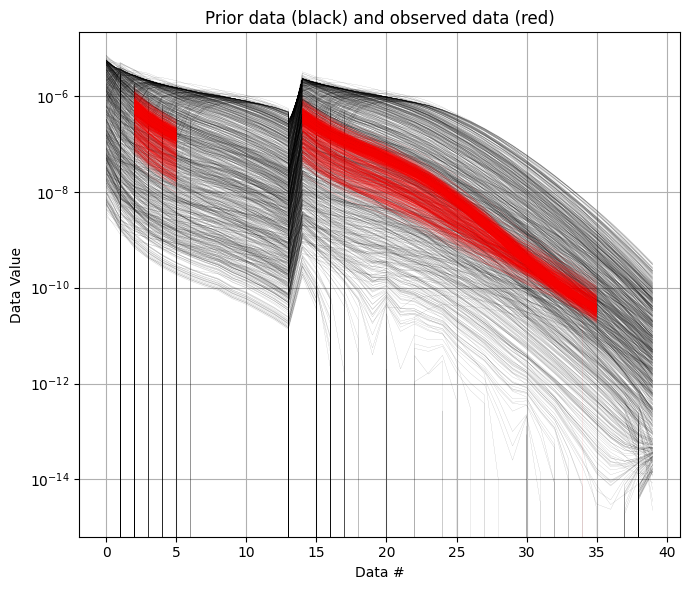

True

In [5]:
# into TWO data sets, LOW and HIGH moment.

ig.plot_data_prior(f_prior_data_h5, f_data_h5)

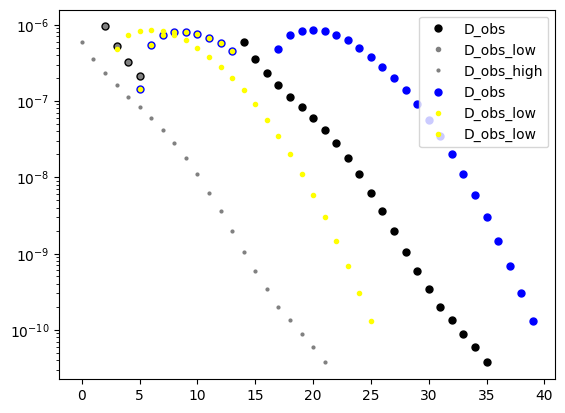

In [6]:
# Read D_obs from f_data_h5
with h5py.File(f_data_h5, 'r') as f:
    D_obs = f['D1/d_obs'][:]
    D_std = f['D1/d_std'][:]
# Alternatively, use the ig.load_data function    
#D_obs = ig.load_data(f_data_h5, id=1, showInfo=1)['d_obs'][0]
#D_std = ig.load_data(f_data_h5, id=1, showInfo=1)['d_std'][0]

with h5py.File(f_prior_data_h5, 'r') as f:
    D = f['/D1'][:]
# Alternatively, use the ig.load_prior_data function    
#D = ig.load_prior_data(f_prior_data_h5)[0][0]
    
# Now splot the into low and high moment data sets
# The low moment data set will be the first 14 columns, and the high moment data set will be the last columns.
nd = D_obs.shape[1]
n_low = 14
n_high = nd - n_low
# set i low to 0:n_low-1
i_low = range(n_low)
i_high = range(n_low, nd)

# Split prior data
D_low = D[:,i_low]
D_high = D[:,i_high]
# Split observed data
D_obs_low = D_obs[:,i_low]
D_std_low = D_std[:,i_low]*2
D_obs_high = D_obs[:,i_high]
D_std_high = D_std[:,i_high]*2


plt.semilogy(D_obs[0],'k.',markersize=10, label='D_obs')
plt.semilogy(D_obs_low[0],'.', color='gray', markersize=6, label='D_obs_low')
plt.semilogy(D_obs_high[0],'.', color='gray',markersize=4, label='D_obs_high')

plt.semilogy(D[0],'b.',markersize=10, label='D_obs')
plt.semilogy(D_low[0],'.', color='yellow', markersize=6, label='D_obs_low')
plt.semilogy(D_high[0],'.', color='yellow', markersize=6, label='D_obs_low')
plt.legend()

In [7]:
f_data_dual_h5 = 'DAUGAARD_AVG_dual.h5'

useOldMethod = False
if useOldMethod:
    ig.copy_hdf5_file(f_data_h5,f_data_dual_h5)
    # Delete D1
    with h5py.File(f_data_dual_h5, 'a') as f:
        # show groups in f['']
        if 'D1' in f.keys():
            del(f['D1'])
    # Update D1 and D2      
    with h5py.File(f_data_dual_h5, 'a') as f:
        # remove 'D1' 
        #del f['D1']
        f.create_dataset('D1/d_obs', data=D_obs_low)
        f.create_dataset('D1/d_std', data=D_std_low)
        f['D1'].attrs['noise_model'] = 'gaussian'
        f.create_dataset('D2/d_obs', data=D_obs_high)
        f.create_dataset('D2/d_std', data=D_std_high)
        f['D2'].attrs['noise_model'] = 'gaussian'
else:
    # Alternatively, use the ig.save_data_gaussian function
    ig.copy_hdf5_file(f_data_h5,f_data_dual_h5)
    ig.save_data_gaussian(D_obs_low, D_std = D_std_low, f_data_h5 = f_data_dual_h5, id=1, showInfo=0)
    ig.save_data_gaussian(D_obs_high, D_std = D_std_high, f_data_h5 = f_data_dual_h5, id=2, showInfo=0)



Data has 11693 stations and 14 channels
Removing group DAUGAARD_AVG_dual.h5:D1 
Adding group DAUGAARD_AVG_dual.h5:D1 
Data has 11693 stations and 26 channels
Adding group DAUGAARD_AVG_dual.h5:D2 


In [8]:
f_prior_data_dual_h5 = 'PRIOR_dual.h5'
ig.copy_hdf5_file(f_prior_data_h5,f_prior_data_dual_h5)
if useOldMethod:

    with h5py.File(f_prior_data_dual_h5, 'a') as f:
        # show groups in f['']
        if 'D1' in f.keys():
            del(f['D1'])
        f.create_dataset('D1', data=D_low)
        f.create_dataset('D2', data=D_high)
else:
    # Alternatively, use the ig.save_data_gaussian function 
    ig.save_prior_data(f_prior_data_dual_h5, D_low, id=1, force_delete=True)
    ig.save_prior_data(f_prior_data_dual_h5, D_high, id=2, force_delete=False)

Deleting prior data '/D1' from file: <HDF5 file "PRIOR_dual.h5" (mode r+)> 


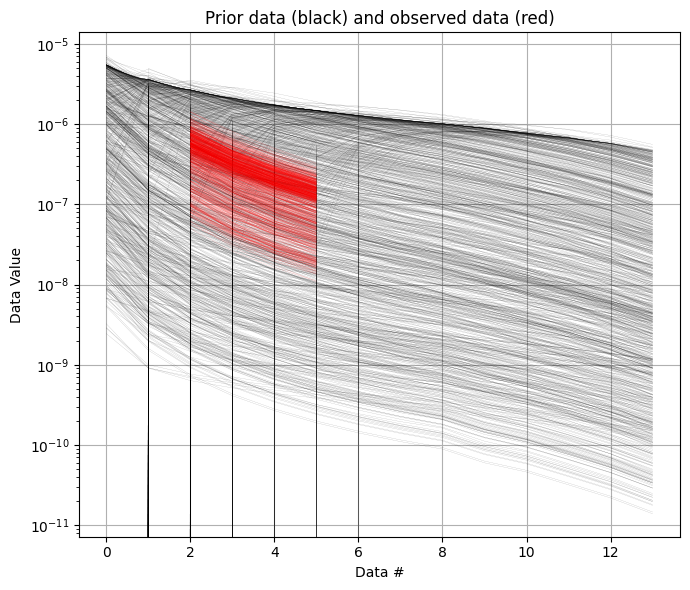

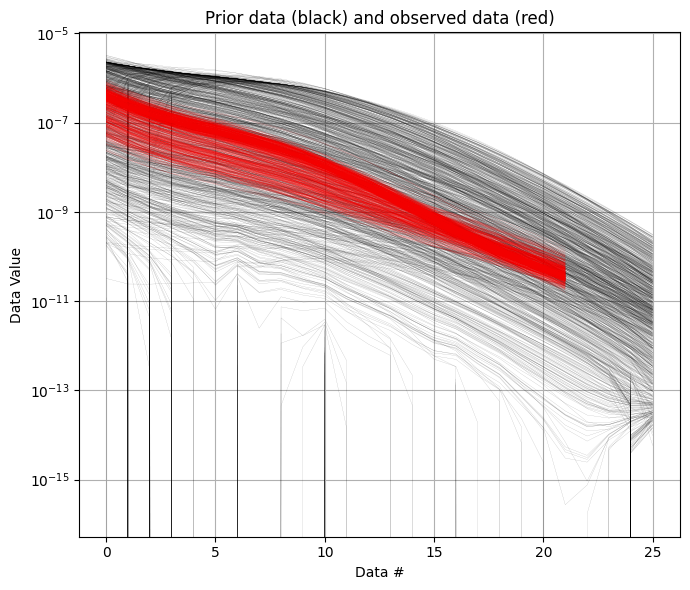

True

In [9]:
ig.plot_data_prior(f_prior_data_dual_h5, f_data_dual_h5, id=1)
ig.plot_data_prior(f_prior_data_dual_h5, f_data_dual_h5, id=2)

## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [10]:
N_use = 100000 #%N
N_cpu = 8
f_post_arr = []
updatePostStat=False
showInfo = 1

import time
t_inversion = []

for itype in [0,1,2,3]:
    t_start = time.time()
    if itype == 0:
        # LOW AND HIGH MOMENT AS ONE DATA SET - THE ORIGINAL METHOD
        f_post_h5 = ig.integrate_rejection(f_prior_data_h5, 
                                    f_data_h5, 
                                    f_post_h5='POST_type%d.h5' % itype,
                                    N_use = N_use, Ncpu=N_cpu,
                                    showInfo=showInfo, 
                                    updatePostStat=updatePostStat)
    elif itype == 1:
        # LOW MOMENT ONLY
        f_post_h5 = ig.integrate_rejection(f_prior_data_dual_h5, 
                                   f_data_dual_h5, 
                                   f_post_h5='POST_type%d.h5' % itype,
                                   N_use = N_use, Ncpu=N_cpu,
                                   showInfo=showInfo, 
                                   updatePostStat=updatePostStat,
                                   id_use = [1])
    elif itype == 2:
        # HIGH MOMENT ONLY
        f_post_h5 = ig.integrate_rejection(f_prior_data_dual_h5, 
                                   f_data_dual_h5, 
                                #    f_post_h5='POST_type%d.h5' % itype,
                                   N_use = N_use, Ncpu=N_cpu,
                                   showInfo=showInfo, 
                                   updatePostStat=updatePostStat,  
                                   id_use = [2])
    elif itype == 3:
        # JOINT INVERSION USING BOTH LOW AND HIGH MOMENT
        f_post_h5 = ig.integrate_rejection(f_prior_data_dual_h5, 
                                   f_data_dual_h5, 
                                   f_post_h5='POST_type%d.h5' % itype,
                                   N_use = N_use, Ncpu=N_cpu,
                                   showInfo=showInfo, 
                                   updatePostStat=updatePostStat,  
                                   id_use = [1,2])

    t_inversion.append(time.time() - t_start)
    f_post_arr.append(f_post_h5)



Loading data from DAUGAARD_AVG.h5. Using data types: [1]
  - D1: id_prior=1,    gaussian, Using 11693/40 data
Loading prior data from PRIOR_CHI2_NF_3_log-uniform_N25000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5. Using prior data ids: [1]
  - /D1:  N,nd = 25000/40
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_CHI2_NF_3_log-uniform_N25000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5, f_data_h5=DAUGAARD_AVG.h5
f_post_h5=POST_type0.h5


Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|▎                                                                                                             | 4/1462 [00:00<00:44, 32.97it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|▎                                                                                                             | 4/1462 [00:00<00:50, 28.96it/s]

Rejection Sampling:   0%|▏                                                                                                             | 3/1462 [00:00<00:56, 25.73it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|▍                                                                                                             | 5/1462 [00:00<00:31, 46.66it/s]

Rejection Sampling:   1%|▌                                                                                                             | 8/1462 [00:00<00:49, 29.10it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|▍                                                                                                             | 5/1462 [00:00<00:35, 40.94it/s]

Rejection Sampling:   0%|▌                                                                                                             | 7/1462 [00:00<00:55, 26.44it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|▍                                                                                                             | 6/1462 [00:00<00:56, 25.68it/s]

Rejection Sampling:   0%|▏                                                                                                             | 3/1461 [00:00<01:03, 22.91it/s]

Rejection Sampling:   1%|▊                                                                                                            | 11/1462 [00:00<00:55, 26.17it/s]

Rejection Sampling:   0%|▍                                                                                                             | 5/1461 [00:00<00:32, 44.24it/s]

Rejection Sampling:   1%|▊                                                                                                            | 11/1462 [00:00<00:47, 30.48it/s]

Rejection Sampling:   0%|▍                                                                                                             | 5/1461 [00:00<00:33, 43.63it/s]

Rejection Sampling:   1%|▋                                                                                                             | 9/1462 [00:00<01:05, 22.34it/s]

Rejection Sampling:   1%|▋                                                                                                            | 10/1462 [00:00<00:52, 27.46it/s]

Rejection Sampling:   0%|▍                                                                                                             | 6/1461 [00:00<01:03, 22.75it/s]

Rejection Sampling:   1%|▋                                                                                                            | 10/1461 [00:00<00:33, 43.49it/s]

Rejection Sampling:   1%|█                                                                                                            | 15/1462 [00:00<00:43, 33.18it/s]

Rejection Sampling:   1%|█                                                                                                            | 14/1462 [00:00<00:58, 24.90it/s]

Rejection Sampling:   1%|▋                                                                                                            | 10/1462 [00:00<00:55, 26.32it/s]

Rejection Sampling:   1%|▋                                                                                                            | 10/1461 [00:00<00:32, 44.96it/s]

Rejection Sampling:   1%|▉                                                                                                            | 12/1462 [00:00<01:05, 22.12it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 19/1462 [00:00<00:45, 31.99it/s]

Rejection Sampling:   1%|█                                                                                                            | 15/1461 [00:00<00:32, 43.86it/s]

Rejection Sampling:   1%|▉                                                                                                            | 13/1462 [00:00<00:55, 26.29it/s]

Rejection Sampling:   1%|▋                                                                                                             | 9/1461 [00:00<01:08, 21.29it/s]

Rejection Sampling:   1%|█                                                                                                            | 15/1461 [00:00<00:32, 44.33it/s]

Rejection Sampling:   1%|█                                                                                                            | 14/1462 [00:00<01:00, 24.04it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 19/1462 [00:00<00:53, 26.97it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 24/1462 [00:00<00:40, 35.34it/s]

Rejection Sampling:   1%|█                                                                                                            | 15/1462 [00:00<01:06, 21.90it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 17/1462 [00:00<00:49, 29.49it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 20/1461 [00:00<00:34, 42.02it/s]

Rejection Sampling:   1%|▉                                                                                                            | 12/1461 [00:00<01:09, 20.76it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 17/1462 [00:00<01:02, 22.99it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 22/1462 [00:00<00:54, 26.42it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 20/1461 [00:00<00:44, 32.75it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 29/1462 [00:00<00:36, 39.38it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 22/1462 [00:00<00:40, 35.42it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 18/1462 [00:00<01:04, 22.26it/s]

Rejection Sampling:   1%|█                                                                                                            | 15/1461 [00:00<01:10, 20.45it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 24/1461 [00:00<00:43, 33.24it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 34/1462 [00:00<00:34, 41.46it/s]

Rejection Sampling:   2%|██                                                                                                           | 27/1462 [00:00<00:37, 38.70it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 20/1462 [00:00<01:04, 22.26it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 25/1462 [00:00<00:58, 24.58it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 25/1461 [00:00<00:45, 31.83it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 21/1462 [00:00<01:04, 22.40it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 39/1462 [00:01<00:32, 43.84it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 29/1461 [00:00<00:38, 37.68it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 25/1462 [00:00<00:50, 28.22it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 18/1461 [00:00<01:08, 21.18it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 33/1462 [00:00<00:33, 42.73it/s]

Rejection Sampling:   2%|██                                                                                                           | 28/1462 [00:01<00:58, 24.45it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 24/1462 [00:01<01:03, 22.77it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 34/1461 [00:00<00:35, 40.43it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 45/1462 [00:01<00:30, 45.99it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 29/1461 [00:00<00:50, 28.50it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 30/1462 [00:01<00:42, 33.59it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 39/1462 [00:01<00:31, 45.25it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 21/1461 [00:00<01:05, 22.15it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 31/1462 [00:01<00:58, 24.41it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 39/1461 [00:00<00:33, 42.19it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 50/1462 [00:01<00:30, 45.73it/s]

Rejection Sampling:   2%|██                                                                                                           | 27/1462 [00:01<01:06, 21.71it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 44/1462 [00:01<00:31, 45.36it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 25/1461 [00:01<00:54, 26.14it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 34/1462 [00:01<00:48, 29.55it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 34/1462 [00:01<01:02, 22.77it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 33/1461 [00:01<00:56, 25.37it/s]

Rejection Sampling:   4%|████                                                                                                         | 55/1462 [00:01<00:31, 45.33it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 44/1461 [00:01<00:36, 39.21it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 49/1462 [00:01<00:31, 45.53it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 30/1461 [00:01<00:45, 31.69it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 30/1462 [00:01<01:07, 21.08it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 38/1462 [00:01<00:46, 30.72it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 60/1462 [00:01<00:31, 45.06it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 37/1462 [00:01<01:04, 22.12it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 36/1461 [00:01<00:58, 24.19it/s]

Rejection Sampling:   4%|████                                                                                                         | 54/1462 [00:01<00:31, 44.79it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 43/1462 [00:01<00:41, 34.10it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 33/1462 [00:01<01:08, 20.94it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 34/1461 [00:01<00:50, 28.30it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 65/1462 [00:01<00:30, 45.43it/s]

Rejection Sampling:   3%|███                                                                                                          | 41/1461 [00:01<00:48, 29.11it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 59/1462 [00:01<00:30, 46.03it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 49/1461 [00:01<00:44, 31.42it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 40/1462 [00:01<01:04, 21.90it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 48/1462 [00:01<00:37, 37.55it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 37/1461 [00:01<00:52, 26.90it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 70/1462 [00:01<00:30, 45.53it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 36/1462 [00:01<01:07, 21.09it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 46/1461 [00:01<00:42, 33.08it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 64/1462 [00:01<00:30, 45.65it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 43/1462 [00:01<01:05, 21.52it/s]

Rejection Sampling:   4%|███▉                                                                                                         | 53/1462 [00:01<00:35, 39.72it/s]

Rejection Sampling:   4%|███▉                                                                                                         | 53/1461 [00:01<00:48, 29.10it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 75/1462 [00:01<00:29, 46.32it/s]

Rejection Sampling:   3%|███▊                                                                                                         | 51/1461 [00:01<00:37, 37.17it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 40/1461 [00:01<00:55, 25.83it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 39/1462 [00:01<01:05, 21.88it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 70/1462 [00:01<00:29, 47.98it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 59/1462 [00:01<00:31, 43.88it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 46/1462 [00:01<01:02, 22.71it/s]

Rejection Sampling:   6%|██████                                                                                                       | 81/1462 [00:01<00:27, 50.00it/s]

Rejection Sampling:   4%|████▎                                                                                                        | 57/1461 [00:01<00:48, 28.69it/s]

Rejection Sampling:   4%|████▎                                                                                                        | 57/1461 [00:01<00:34, 40.78it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 43/1461 [00:01<00:55, 25.52it/s]

Rejection Sampling:   5%|█████▋                                                                                                       | 76/1462 [00:01<00:27, 49.92it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 42/1462 [00:01<01:02, 22.82it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 49/1462 [00:02<01:03, 22.24it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 87/1462 [00:02<00:27, 49.16it/s]

Rejection Sampling:   4%|████▋                                                                                                        | 62/1461 [00:01<00:42, 33.11it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 46/1461 [00:01<00:54, 26.07it/s]

Rejection Sampling:   6%|██████                                                                                                       | 82/1462 [00:01<00:28, 48.52it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 45/1462 [00:02<01:04, 21.83it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 64/1462 [00:02<00:41, 33.35it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 92/1462 [00:02<00:28, 48.30it/s]

Rejection Sampling:   3%|███▊                                                                                                         | 51/1461 [00:01<00:44, 31.65it/s]

Rejection Sampling:   4%|███▉                                                                                                         | 52/1462 [00:02<01:03, 22.27it/s]

Rejection Sampling:   4%|████▋                                                                                                        | 62/1461 [00:01<00:43, 31.92it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 87/1462 [00:02<00:28, 48.27it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 66/1461 [00:01<00:49, 27.97it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 48/1462 [00:02<01:06, 21.40it/s]

Rejection Sampling:   7%|███████▏                                                                                                     | 97/1462 [00:02<00:28, 47.95it/s]

Rejection Sampling:   4%|████▏                                                                                                        | 56/1462 [00:02<00:53, 26.37it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 92/1462 [00:02<00:28, 47.47it/s]

Rejection Sampling:   5%|█████                                                                                                        | 68/1462 [00:02<00:48, 28.70it/s]

Rejection Sampling:   3%|███▊                                                                                                         | 51/1462 [00:02<01:01, 23.10it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 102/1462 [00:02<00:29, 46.63it/s]

Rejection Sampling:   4%|████                                                                                                         | 55/1461 [00:02<00:52, 26.63it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 66/1461 [00:02<00:50, 27.81it/s]

Rejection Sampling:   4%|████▌                                                                                                        | 61/1462 [00:02<00:44, 31.51it/s]

Rejection Sampling:   7%|███████▏                                                                                                     | 97/1462 [00:02<00:28, 47.20it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 70/1461 [00:02<00:54, 25.73it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 72/1462 [00:02<00:46, 29.76it/s]

Rejection Sampling:   4%|████▏                                                                                                        | 56/1462 [00:02<00:47, 29.70it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 108/1462 [00:02<00:28, 47.94it/s]

Rejection Sampling:   4%|████▎                                                                                                        | 58/1461 [00:02<00:55, 25.19it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 103/1462 [00:02<00:28, 48.14it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 65/1462 [00:02<00:47, 29.31it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 70/1461 [00:02<00:52, 26.43it/s]

Rejection Sampling:   5%|█████▍                                                                                                       | 73/1461 [00:02<00:55, 25.20it/s]

Rejection Sampling:   4%|████▌                                                                                                        | 61/1462 [00:02<00:40, 34.99it/s]

Rejection Sampling:   5%|█████▊                                                                                                       | 78/1462 [00:02<00:39, 35.01it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 114/1462 [00:02<00:27, 48.92it/s]

Rejection Sampling:   4%|████▌                                                                                                        | 61/1461 [00:02<00:57, 24.46it/s]

Rejection Sampling:   5%|█████▋                                                                                                       | 76/1461 [00:02<00:42, 32.40it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 67/1462 [00:02<00:34, 40.76it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 84/1462 [00:02<00:34, 39.79it/s]

Rejection Sampling:   5%|█████▋                                                                                                       | 77/1461 [00:02<00:52, 26.48it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 69/1462 [00:02<00:48, 28.45it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 120/1462 [00:02<00:26, 50.09it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 108/1462 [00:02<00:36, 36.89it/s]

Rejection Sampling:   6%|██████▋                                                                                                      | 89/1462 [00:02<00:32, 41.84it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 64/1461 [00:02<00:59, 23.49it/s]

Rejection Sampling:   5%|█████▍                                                                                                       | 73/1462 [00:02<00:31, 43.67it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 74/1462 [00:02<00:42, 32.59it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 80/1461 [00:02<00:44, 30.79it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 80/1461 [00:02<00:54, 25.34it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 126/1462 [00:02<00:27, 48.56it/s]

Rejection Sampling:   5%|█████▊                                                                                                       | 78/1462 [00:02<00:31, 43.68it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 79/1462 [00:02<00:38, 35.49it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 67/1461 [00:02<01:02, 22.17it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 85/1461 [00:02<00:47, 28.82it/s]

Rejection Sampling:   9%|█████████▋                                                                                                  | 131/1462 [00:02<00:27, 47.54it/s]

Rejection Sampling:   6%|███████                                                                                                      | 94/1462 [00:02<00:38, 35.88it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 113/1462 [00:02<00:44, 30.42it/s]

Rejection Sampling:   6%|██████▏                                                                                                      | 83/1462 [00:02<00:30, 44.93it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 84/1461 [00:02<00:51, 26.89it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 84/1462 [00:03<00:35, 38.69it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 136/1462 [00:03<00:27, 47.87it/s]

Rejection Sampling:   7%|███████▍                                                                                                     | 99/1462 [00:02<00:35, 38.61it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 70/1461 [00:02<01:03, 21.81it/s]

Rejection Sampling:   6%|██████▌                                                                                                      | 88/1461 [00:02<00:50, 27.46it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 117/1462 [00:02<00:42, 31.83it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 87/1461 [00:02<00:55, 24.96it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 141/1462 [00:03<00:27, 47.20it/s]

Rejection Sampling:   6%|██████▌                                                                                                      | 88/1462 [00:03<00:35, 38.38it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 104/1462 [00:03<00:33, 40.79it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 122/1462 [00:03<00:38, 34.48it/s]

Rejection Sampling:   6%|██████▌                                                                                                      | 88/1462 [00:03<00:42, 32.06it/s]

Rejection Sampling:   5%|█████▍                                                                                                       | 73/1461 [00:03<01:04, 21.58it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 91/1461 [00:02<00:53, 25.55it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 92/1461 [00:02<00:46, 29.52it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 146/1462 [00:03<00:28, 47.00it/s]

Rejection Sampling:   6%|██████▉                                                                                                      | 93/1462 [00:03<00:33, 41.01it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 127/1462 [00:03<00:35, 37.84it/s]

Rejection Sampling:   6%|███████                                                                                                      | 94/1461 [00:03<00:56, 24.37it/s]

Rejection Sampling:   5%|█████▋                                                                                                       | 76/1461 [00:03<01:04, 21.55it/s]

Rejection Sampling:   7%|███████▏                                                                                                     | 97/1461 [00:03<00:40, 33.99it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 92/1462 [00:03<00:47, 29.08it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 151/1462 [00:03<00:27, 47.26it/s]

Rejection Sampling:   7%|███████▎                                                                                                     | 98/1462 [00:03<00:31, 43.13it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 132/1462 [00:03<00:32, 40.80it/s]

Rejection Sampling:   7%|████████                                                                                                    | 109/1462 [00:03<00:41, 32.41it/s]

Rejection Sampling:   7%|███████▎                                                                                                     | 98/1461 [00:03<00:48, 28.00it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 103/1462 [00:03<00:30, 44.94it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 79/1461 [00:03<01:04, 21.37it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 137/1462 [00:03<00:30, 43.09it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 101/1461 [00:03<00:46, 29.09it/s]

Rejection Sampling:   7%|███████▏                                                                                                     | 96/1462 [00:03<00:51, 26.28it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 103/1461 [00:03<00:41, 32.78it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 108/1462 [00:03<00:29, 45.29it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 113/1462 [00:03<00:47, 28.25it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 142/1462 [00:03<00:30, 43.66it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 156/1462 [00:03<00:38, 34.06it/s]

Rejection Sampling:   6%|██████                                                                                                       | 82/1461 [00:03<01:02, 21.94it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 108/1461 [00:03<00:37, 36.09it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 113/1462 [00:03<00:29, 44.97it/s]

Rejection Sampling:   7%|███████▍                                                                                                     | 99/1462 [00:03<00:56, 24.26it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 147/1462 [00:03<00:29, 44.10it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 85/1461 [00:03<01:01, 22.53it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 105/1461 [00:03<00:52, 25.63it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 117/1462 [00:03<00:50, 26.85it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 113/1461 [00:03<00:34, 39.29it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 119/1462 [00:03<00:28, 46.87it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 160/1462 [00:03<00:45, 28.88it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 152/1462 [00:03<00:28, 45.59it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 102/1462 [00:03<00:58, 23.43it/s]

Rejection Sampling:   6%|██████▋                                                                                                      | 89/1461 [00:03<00:52, 26.14it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 118/1461 [00:03<00:32, 41.46it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 120/1462 [00:03<00:51, 26.29it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 108/1461 [00:03<00:55, 24.33it/s]

Rejection Sampling:   8%|█████████▏                                                                                                  | 124/1462 [00:03<00:28, 46.42it/s]

Rejection Sampling:  11%|████████████                                                                                                | 164/1462 [00:03<00:42, 30.77it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 157/1462 [00:03<00:28, 45.30it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 92/1461 [00:03<00:51, 26.80it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 123/1461 [00:03<00:30, 43.16it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 105/1462 [00:03<00:59, 22.78it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 123/1462 [00:03<00:52, 25.58it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 129/1462 [00:03<00:28, 47.22it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 111/1461 [00:03<00:56, 23.95it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 162/1462 [00:03<00:27, 46.59it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 128/1461 [00:03<00:29, 44.63it/s]

Rejection Sampling:   7%|████████                                                                                                    | 109/1462 [00:04<00:51, 26.30it/s]

Rejection Sampling:   7%|███████                                                                                                      | 95/1461 [00:03<00:54, 25.00it/s]

Rejection Sampling:  11%|████████████▍                                                                                               | 168/1462 [00:04<00:46, 27.68it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 134/1462 [00:04<00:27, 47.62it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 167/1462 [00:03<00:27, 46.94it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 126/1462 [00:04<00:54, 24.56it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 114/1461 [00:03<00:56, 24.05it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 133/1461 [00:03<00:28, 45.81it/s]

Rejection Sampling:   7%|███████▎                                                                                                     | 98/1461 [00:04<00:52, 26.09it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 114/1462 [00:04<00:42, 31.73it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 172/1462 [00:04<00:27, 47.72it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 140/1462 [00:04<00:27, 48.72it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 129/1462 [00:04<00:54, 24.33it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 172/1462 [00:04<00:49, 26.26it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 117/1461 [00:04<00:56, 23.82it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 139/1461 [00:04<00:27, 47.76it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 120/1462 [00:04<00:35, 37.49it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 104/1461 [00:04<00:40, 33.74it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 146/1462 [00:04<00:26, 49.92it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 177/1462 [00:04<00:29, 44.22it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 144/1461 [00:04<00:27, 47.69it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 132/1462 [00:04<00:57, 23.29it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 175/1462 [00:04<00:51, 24.81it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 120/1461 [00:04<00:58, 22.88it/s]

Rejection Sampling:   9%|█████████▏                                                                                                  | 125/1462 [00:04<00:33, 39.90it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 151/1462 [00:04<00:26, 48.60it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 108/1461 [00:04<00:47, 28.28it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 149/1461 [00:04<00:27, 47.36it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 130/1462 [00:04<00:32, 41.56it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 135/1462 [00:04<00:58, 22.73it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 123/1461 [00:04<00:59, 22.50it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 178/1462 [00:04<00:54, 23.65it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 157/1462 [00:04<00:26, 49.40it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 182/1462 [00:04<00:38, 33.31it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 155/1461 [00:04<00:26, 48.41it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 182/1462 [00:04<00:48, 26.15it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 138/1462 [00:04<00:58, 22.71it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 162/1462 [00:04<00:26, 48.31it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 112/1461 [00:04<00:52, 25.80it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 126/1461 [00:04<01:00, 22.01it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 160/1461 [00:04<00:27, 47.16it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 186/1462 [00:04<00:42, 30.06it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 135/1462 [00:04<00:41, 31.60it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 143/1462 [00:04<00:45, 28.68it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 167/1462 [00:04<00:27, 47.36it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 185/1462 [00:04<00:51, 24.83it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 129/1461 [00:04<00:59, 22.30it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 115/1461 [00:04<00:55, 24.26it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 165/1461 [00:04<00:27, 47.29it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 148/1462 [00:04<00:39, 33.67it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 172/1462 [00:04<00:26, 47.90it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 190/1462 [00:04<00:46, 27.64it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 188/1462 [00:05<00:52, 24.24it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 139/1462 [00:04<00:46, 28.44it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 132/1461 [00:04<00:59, 22.37it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 118/1461 [00:04<00:56, 23.92it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 171/1461 [00:04<00:26, 48.40it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 154/1462 [00:04<00:33, 38.62it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 178/1462 [00:04<00:26, 49.32it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 176/1461 [00:04<00:26, 48.25it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 191/1462 [00:05<00:55, 22.98it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 135/1461 [00:04<01:00, 21.90it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 121/1461 [00:04<00:57, 23.20it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 159/1462 [00:05<00:31, 41.17it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 183/1462 [00:05<00:26, 49.01it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 143/1462 [00:05<00:50, 26.19it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 194/1462 [00:05<00:50, 25.29it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 181/1461 [00:04<00:26, 47.68it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 195/1462 [00:05<00:48, 26.28it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 140/1461 [00:04<00:47, 27.53it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 188/1462 [00:05<00:26, 47.81it/s]

Rejection Sampling:  11%|████████████                                                                                                | 164/1462 [00:05<00:30, 42.31it/s]

Rejection Sampling:   8%|█████████▏                                                                                                  | 124/1461 [00:05<01:01, 21.90it/s]

Rejection Sampling:  13%|██████████████▌                                                                                             | 197/1462 [00:05<00:53, 23.77it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 146/1462 [00:05<00:54, 24.31it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 186/1461 [00:05<00:27, 46.80it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 200/1462 [00:05<00:41, 30.77it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 145/1461 [00:05<00:40, 32.34it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 193/1462 [00:05<00:26, 47.65it/s]

Rejection Sampling:  12%|████████████▍                                                                                               | 169/1462 [00:05<00:29, 43.35it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 127/1461 [00:05<01:01, 21.58it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 192/1461 [00:05<00:26, 47.76it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 200/1462 [00:05<00:53, 23.43it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 149/1462 [00:05<00:55, 23.72it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 150/1461 [00:05<00:35, 36.58it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 198/1462 [00:05<00:26, 48.17it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 205/1462 [00:05<00:36, 34.65it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 174/1462 [00:05<00:28, 44.97it/s]

Rejection Sampling:  13%|██████████████▌                                                                                             | 197/1461 [00:05<00:26, 47.73it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 130/1461 [00:05<00:59, 22.48it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 155/1461 [00:05<00:32, 39.72it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 203/1462 [00:05<00:26, 48.14it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 179/1462 [00:05<00:27, 46.16it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 210/1462 [00:05<00:32, 37.98it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 203/1462 [00:05<00:54, 22.94it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 152/1462 [00:05<00:56, 23.20it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 203/1461 [00:05<00:25, 49.21it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 208/1462 [00:05<00:26, 48.15it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 215/1462 [00:05<00:30, 40.42it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 185/1462 [00:05<00:26, 48.07it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 133/1461 [00:05<00:58, 22.56it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 206/1462 [00:05<00:54, 22.94it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 156/1462 [00:05<00:53, 24.36it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 160/1461 [00:05<00:38, 33.57it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 208/1461 [00:05<00:25, 48.71it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 213/1462 [00:05<00:26, 47.56it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 220/1462 [00:05<00:29, 41.97it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 190/1462 [00:05<00:26, 47.74it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 137/1461 [00:05<00:49, 26.52it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 209/1462 [00:05<00:55, 22.40it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 213/1461 [00:05<00:25, 48.84it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 159/1462 [00:05<00:55, 23.62it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 218/1462 [00:05<00:25, 47.94it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 142/1461 [00:05<00:41, 31.76it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 226/1462 [00:05<00:27, 44.61it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 196/1462 [00:05<00:25, 49.07it/s]

Rejection Sampling:  11%|████████████                                                                                                | 164/1461 [00:05<00:44, 29.40it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 214/1462 [00:05<00:43, 28.65it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 223/1462 [00:05<00:25, 48.22it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 147/1461 [00:05<00:36, 36.22it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 201/1462 [00:05<00:25, 49.09it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 231/1462 [00:06<00:26, 45.81it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 162/1462 [00:05<00:55, 23.34it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 219/1462 [00:05<00:37, 33.07it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 218/1461 [00:05<00:33, 36.65it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 228/1462 [00:06<00:26, 47.29it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 152/1461 [00:05<00:33, 38.97it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 206/1462 [00:05<00:26, 48.09it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 236/1462 [00:06<00:26, 45.80it/s]

Rejection Sampling:  11%|████████████▍                                                                                               | 168/1461 [00:05<00:48, 26.57it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 165/1462 [00:06<00:57, 22.68it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 225/1462 [00:06<00:32, 38.48it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 234/1462 [00:06<00:25, 48.79it/s]

Rejection Sampling:  16%|█████████████████▊                                                                                          | 241/1462 [00:06<00:26, 46.68it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 158/1461 [00:06<00:30, 42.55it/s]

Rejection Sampling:  11%|████████████▍                                                                                               | 168/1462 [00:06<00:54, 23.89it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 171/1461 [00:05<00:50, 25.32it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 230/1462 [00:06<00:30, 40.41it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 223/1461 [00:06<00:39, 31.17it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 246/1462 [00:06<00:26, 46.21it/s]

Rejection Sampling:  11%|████████████                                                                                                | 163/1461 [00:06<00:29, 43.68it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 211/1462 [00:06<00:34, 35.91it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 176/1461 [00:06<00:42, 30.21it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 171/1462 [00:06<00:54, 23.60it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 236/1462 [00:06<00:28, 43.44it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 239/1462 [00:06<00:33, 36.61it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 252/1462 [00:06<00:25, 48.00it/s]

Rejection Sampling:  12%|████████████▍                                                                                               | 169/1461 [00:06<00:27, 46.27it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 227/1461 [00:06<00:42, 28.95it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 182/1461 [00:06<00:35, 35.56it/s]

Rejection Sampling:  16%|█████████████████▊                                                                                          | 241/1462 [00:06<00:27, 44.83it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 174/1462 [00:06<00:56, 22.89it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 257/1462 [00:06<00:25, 48.13it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 174/1461 [00:06<00:28, 45.89it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 216/1462 [00:06<00:41, 30.08it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 246/1462 [00:06<00:27, 44.96it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 262/1462 [00:06<00:25, 46.72it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 231/1461 [00:06<00:47, 26.12it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 244/1462 [00:06<00:40, 30.09it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 179/1461 [00:06<00:27, 46.33it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 177/1462 [00:06<00:58, 22.14it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 186/1461 [00:06<00:42, 30.19it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 252/1462 [00:06<00:26, 46.38it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 220/1462 [00:06<00:45, 27.18it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 184/1461 [00:06<00:27, 47.01it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 249/1462 [00:06<00:35, 33.72it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 234/1461 [00:06<00:49, 24.66it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 180/1462 [00:06<00:59, 21.46it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 190/1461 [00:06<00:45, 27.93it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 257/1462 [00:06<00:27, 44.60it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 189/1461 [00:06<00:28, 44.71it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 224/1462 [00:06<00:45, 26.97it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 267/1462 [00:06<00:35, 33.52it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 237/1461 [00:06<00:51, 23.94it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 183/1462 [00:06<01:00, 21.01it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 253/1462 [00:06<00:42, 28.25it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 263/1462 [00:06<00:25, 46.45it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 195/1461 [00:06<00:27, 46.87it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 228/1462 [00:06<00:41, 29.52it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 194/1461 [00:06<00:49, 25.55it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 240/1461 [00:06<00:51, 23.65it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 271/1462 [00:07<00:40, 29.64it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 268/1462 [00:06<00:25, 46.60it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 258/1462 [00:07<00:38, 31.65it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 200/1461 [00:06<00:26, 46.85it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 186/1462 [00:07<01:01, 20.90it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 232/1462 [00:06<00:39, 31.17it/s]

Rejection Sampling:  13%|██████████████▌                                                                                             | 197/1461 [00:06<00:49, 25.42it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 263/1462 [00:07<00:33, 35.48it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 243/1461 [00:06<00:51, 23.86it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 274/1462 [00:07<00:24, 47.98it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 206/1461 [00:07<00:26, 48.24it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 189/1462 [00:07<00:59, 21.54it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 275/1462 [00:07<00:43, 27.22it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 236/1462 [00:07<00:43, 28.22it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 202/1461 [00:07<00:44, 28.47it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 268/1462 [00:07<00:31, 38.47it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 279/1462 [00:07<00:24, 47.86it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 211/1461 [00:07<00:26, 48.02it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 246/1461 [00:07<00:52, 23.09it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 192/1462 [00:07<00:59, 21.51it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 273/1462 [00:07<00:29, 40.35it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 284/1462 [00:07<00:25, 47.05it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 205/1461 [00:07<00:47, 26.71it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 216/1461 [00:07<00:26, 47.22it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 279/1462 [00:07<00:47, 25.06it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 240/1462 [00:07<00:46, 26.03it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 249/1461 [00:07<00:54, 22.17it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 278/1462 [00:07<00:28, 42.24it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 289/1462 [00:07<00:24, 47.47it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 195/1462 [00:07<00:59, 21.26it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 221/1461 [00:07<00:26, 47.48it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 208/1461 [00:07<00:47, 26.49it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 282/1462 [00:07<00:48, 24.32it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 243/1462 [00:07<00:47, 25.62it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 283/1462 [00:07<00:27, 42.75it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 252/1461 [00:07<00:56, 21.36it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 294/1462 [00:07<00:25, 45.99it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 226/1461 [00:07<00:27, 45.64it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 198/1462 [00:07<01:01, 20.49it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 211/1461 [00:07<00:52, 23.67it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 246/1462 [00:07<00:49, 24.42it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 288/1462 [00:07<00:27, 42.76it/s]

Rejection Sampling:  19%|█████████████████████                                                                                       | 285/1462 [00:07<00:51, 23.05it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 299/1462 [00:07<00:25, 45.62it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 231/1461 [00:07<00:26, 46.09it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 255/1461 [00:07<00:56, 21.52it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 201/1462 [00:07<00:58, 21.63it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 214/1461 [00:07<00:51, 24.12it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 293/1462 [00:07<00:26, 43.54it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 249/1462 [00:07<00:50, 23.83it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 305/1462 [00:07<00:24, 47.00it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 236/1461 [00:07<00:26, 46.94it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 288/1462 [00:07<00:50, 23.06it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 258/1461 [00:07<00:54, 22.05it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 204/1462 [00:07<00:58, 21.53it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 217/1461 [00:07<00:53, 23.24it/s]

Rejection Sampling:  16%|█████████████████▊                                                                                          | 241/1461 [00:07<00:25, 47.42it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 310/1462 [00:07<00:24, 47.36it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 252/1462 [00:07<00:50, 23.77it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 291/1462 [00:08<00:50, 23.34it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 264/1461 [00:07<00:39, 30.01it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 298/1462 [00:07<00:30, 37.87it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 208/1462 [00:08<00:50, 24.86it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 247/1461 [00:07<00:24, 49.52it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 316/1462 [00:07<00:23, 48.91it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 220/1461 [00:07<00:53, 23.41it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 294/1462 [00:08<00:49, 23.80it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 255/1462 [00:08<00:50, 23.78it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 270/1461 [00:07<00:33, 35.88it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 211/1462 [00:08<00:50, 25.02it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 252/1461 [00:07<00:24, 49.10it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 321/1462 [00:08<00:23, 48.90it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 302/1462 [00:08<00:36, 32.06it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 297/1462 [00:08<00:47, 24.75it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 223/1461 [00:07<00:53, 23.11it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 275/1461 [00:07<00:30, 39.13it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 258/1462 [00:08<00:50, 23.84it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 214/1462 [00:08<00:52, 23.96it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 228/1461 [00:08<00:41, 29.55it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 307/1462 [00:08<00:34, 33.92it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 280/1461 [00:08<00:28, 41.28it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 303/1462 [00:08<00:35, 32.22it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 261/1462 [00:08<00:52, 22.76it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 257/1461 [00:08<00:34, 35.17it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 326/1462 [00:08<00:32, 35.26it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 312/1462 [00:08<00:31, 36.18it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 308/1462 [00:08<00:32, 35.35it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 217/1462 [00:08<00:55, 22.42it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 265/1462 [00:08<00:44, 26.79it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 232/1461 [00:08<00:47, 25.74it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 313/1462 [00:08<00:29, 38.62it/s]

Rejection Sampling:  20%|█████████████████████                                                                                       | 285/1461 [00:08<00:38, 30.87it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 270/1462 [00:08<00:36, 32.37it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 220/1462 [00:08<00:56, 22.00it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 316/1462 [00:08<00:38, 29.96it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 318/1462 [00:08<00:28, 40.37it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 235/1461 [00:08<00:51, 23.92it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 262/1461 [00:08<00:41, 28.83it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 331/1462 [00:08<00:40, 28.24it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 275/1462 [00:08<00:33, 35.24it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 223/1462 [00:08<00:58, 21.30it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 323/1462 [00:08<00:27, 41.64it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 289/1461 [00:08<00:43, 26.89it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 266/1461 [00:08<00:41, 28.70it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 238/1461 [00:08<00:52, 23.13it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 279/1462 [00:08<00:33, 35.52it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 320/1462 [00:08<00:42, 26.96it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 335/1462 [00:08<00:43, 26.01it/s]

Rejection Sampling:  23%|████████████████████████▎                                                                                   | 329/1462 [00:08<00:25, 44.62it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 226/1462 [00:08<00:57, 21.37it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 272/1461 [00:08<00:35, 33.72it/s]

Rejection Sampling:  16%|█████████████████▊                                                                                          | 241/1461 [00:08<00:52, 23.08it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 293/1461 [00:08<00:45, 25.95it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 323/1462 [00:08<00:44, 25.87it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 340/1462 [00:08<00:38, 29.48it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 334/1462 [00:09<00:24, 45.60it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 283/1462 [00:08<00:39, 29.64it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 277/1461 [00:08<00:31, 37.27it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 229/1462 [00:09<00:57, 21.51it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 244/1461 [00:08<00:49, 24.55it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 326/1462 [00:09<00:43, 25.86it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 296/1461 [00:08<00:45, 25.49it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 340/1462 [00:09<00:23, 47.60it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 287/1462 [00:09<00:37, 31.51it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 283/1461 [00:08<00:28, 41.18it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 232/1462 [00:09<00:55, 22.16it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 344/1462 [00:09<00:41, 26.91it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 299/1461 [00:08<00:43, 26.44it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 247/1461 [00:08<00:51, 23.51it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 331/1462 [00:09<00:37, 30.18it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 292/1462 [00:09<00:33, 34.52it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 288/1461 [00:09<00:27, 42.19it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 304/1461 [00:09<00:37, 31.01it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 336/1462 [00:09<00:32, 34.37it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 235/1462 [00:09<00:56, 21.90it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 348/1462 [00:09<00:41, 27.12it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 250/1461 [00:09<00:53, 22.83it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 297/1462 [00:09<00:30, 37.69it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 345/1462 [00:09<00:31, 35.37it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 293/1461 [00:09<00:26, 44.01it/s]

Rejection Sampling:  16%|█████████████████▊                                                                                          | 241/1462 [00:09<00:40, 29.88it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 342/1462 [00:09<00:28, 39.14it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 354/1462 [00:09<00:33, 33.21it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 253/1461 [00:09<00:53, 22.69it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 308/1461 [00:09<00:41, 27.60it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 299/1461 [00:09<00:25, 45.98it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 347/1462 [00:09<00:27, 40.94it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 301/1462 [00:09<00:37, 31.07it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 349/1462 [00:09<00:36, 30.56it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 359/1462 [00:09<00:30, 35.95it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 258/1461 [00:09<00:42, 28.13it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 304/1461 [00:09<00:25, 45.46it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 312/1461 [00:09<00:38, 29.50it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 245/1462 [00:09<00:46, 26.13it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 364/1462 [00:09<00:28, 38.10it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 263/1461 [00:09<00:36, 33.15it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 309/1461 [00:09<00:24, 46.13it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 317/1461 [00:09<00:34, 32.96it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 353/1462 [00:09<00:40, 27.56it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 305/1462 [00:09<00:42, 27.50it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 352/1462 [00:09<00:34, 32.55it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 248/1462 [00:09<00:49, 24.67it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 369/1462 [00:09<00:26, 40.75it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 268/1461 [00:09<00:32, 37.15it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 314/1461 [00:09<00:24, 46.76it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 322/1461 [00:09<00:30, 36.79it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 308/1462 [00:09<00:44, 25.80it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 374/1462 [00:09<00:25, 43.08it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 251/1462 [00:09<00:50, 23.91it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 356/1462 [00:09<00:35, 31.23it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 357/1462 [00:09<00:42, 25.87it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 320/1461 [00:09<00:23, 48.64it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 328/1461 [00:09<00:27, 41.26it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 272/1461 [00:09<00:36, 32.30it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 380/1462 [00:09<00:23, 45.53it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 311/1462 [00:09<00:46, 24.97it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 256/1462 [00:10<00:41, 28.79it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 362/1462 [00:09<00:30, 36.29it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 326/1461 [00:09<00:22, 49.36it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 360/1462 [00:10<00:44, 24.91it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 385/1462 [00:09<00:23, 46.73it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 333/1461 [00:09<00:29, 38.04it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 261/1462 [00:10<00:35, 33.73it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 276/1461 [00:09<00:40, 29.18it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 314/1462 [00:10<00:47, 24.12it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 332/1461 [00:09<00:22, 50.00it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 363/1462 [00:10<00:45, 24.14it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 366/1462 [00:10<00:34, 31.42it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 391/1462 [00:10<00:22, 47.51it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 267/1462 [00:10<00:31, 38.33it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 337/1461 [00:10<00:35, 31.86it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 317/1462 [00:10<00:49, 23.16it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 338/1461 [00:10<00:22, 48.86it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 280/1461 [00:10<00:44, 26.58it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 396/1462 [00:10<00:23, 46.17it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 366/1462 [00:10<00:48, 22.80it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 272/1462 [00:10<00:29, 40.08it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 343/1461 [00:10<00:23, 47.85it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 370/1462 [00:10<00:39, 27.31it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 320/1462 [00:10<00:51, 22.07it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 401/1462 [00:10<00:23, 45.74it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 371/1462 [00:10<00:38, 28.10it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 277/1462 [00:10<00:28, 41.31it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 283/1461 [00:10<00:48, 24.41it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 341/1461 [00:10<00:40, 27.68it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 348/1461 [00:10<00:23, 46.49it/s]

Rejection Sampling:  26%|███████████████████████████▌                                                                                | 373/1462 [00:10<00:42, 25.75it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 325/1462 [00:10<00:41, 27.31it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 406/1462 [00:10<00:23, 45.46it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 282/1462 [00:10<00:27, 42.67it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 374/1462 [00:10<00:41, 26.01it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 286/1461 [00:10<00:49, 23.78it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 353/1461 [00:10<00:23, 46.44it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 330/1462 [00:10<00:35, 31.74it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 411/1462 [00:10<00:23, 45.68it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 345/1461 [00:10<00:44, 25.08it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 376/1462 [00:10<00:44, 24.52it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 287/1462 [00:10<00:26, 43.74it/s]

Rejection Sampling:  25%|██████████████████████████▍                                                                                 | 358/1461 [00:10<00:23, 47.25it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 377/1462 [00:10<00:43, 24.80it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 289/1461 [00:10<00:49, 23.44it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 336/1462 [00:10<00:30, 37.26it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                             | 417/1462 [00:10<00:21, 47.57it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 293/1462 [00:10<00:25, 46.23it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 379/1462 [00:10<00:44, 24.34it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 348/1461 [00:10<00:45, 24.36it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 364/1461 [00:10<00:22, 48.64it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 380/1462 [00:10<00:44, 24.33it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 292/1461 [00:10<00:48, 24.15it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 340/1462 [00:10<00:29, 37.94it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 383/1462 [00:10<00:39, 27.61it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 299/1462 [00:10<00:24, 48.25it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 422/1462 [00:10<00:24, 43.13it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 351/1461 [00:10<00:45, 24.14it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 383/1462 [00:11<00:45, 23.84it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 295/1461 [00:10<00:49, 23.40it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 388/1462 [00:10<00:32, 32.99it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 305/1462 [00:11<00:23, 48.75it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 427/1462 [00:10<00:24, 42.65it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 354/1461 [00:10<00:45, 24.46it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 344/1462 [00:10<00:35, 31.63it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 369/1461 [00:10<00:30, 36.37it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 393/1462 [00:11<00:29, 36.66it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 386/1462 [00:11<00:46, 22.95it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 298/1461 [00:10<00:51, 22.38it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 310/1462 [00:11<00:24, 47.78it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 432/1462 [00:11<00:26, 39.15it/s]

Rejection Sampling:  24%|██████████████████████████▍                                                                                 | 357/1461 [00:10<00:48, 22.55it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 398/1462 [00:11<00:27, 38.95it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 315/1462 [00:11<00:24, 47.00it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 389/1462 [00:11<00:47, 22.52it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 348/1462 [00:11<00:41, 26.85it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 301/1461 [00:10<00:52, 22.22it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 374/1461 [00:11<00:35, 30.32it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 403/1462 [00:11<00:25, 41.20it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 320/1462 [00:11<00:24, 47.09it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 360/1461 [00:11<00:50, 21.93it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 394/1462 [00:11<00:37, 28.58it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 436/1462 [00:11<00:32, 31.92it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 304/1461 [00:11<00:50, 22.98it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 351/1462 [00:11<00:44, 25.23it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 408/1462 [00:11<00:24, 43.21it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 325/1462 [00:11<00:23, 47.80it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 378/1461 [00:11<00:39, 27.48it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 363/1461 [00:11<00:49, 22.02it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 441/1462 [00:11<00:29, 35.13it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 397/1462 [00:11<00:39, 26.90it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 307/1461 [00:11<00:50, 22.98it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 354/1462 [00:11<00:44, 24.68it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 414/1462 [00:11<00:22, 46.16it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 331/1462 [00:11<00:22, 49.50it/s]

Rejection Sampling:  27%|█████████████████████████████▋                                                                              | 402/1462 [00:11<00:32, 32.48it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 368/1461 [00:11<00:39, 27.62it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 382/1461 [00:11<00:41, 25.86it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 310/1461 [00:11<00:50, 22.67it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 357/1462 [00:11<00:46, 23.87it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 445/1462 [00:11<00:33, 30.29it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 337/1462 [00:11<00:22, 49.83it/s]

Rejection Sampling:  26%|███████████████████████████▌                                                                                | 373/1461 [00:11<00:33, 32.81it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 406/1462 [00:11<00:35, 29.50it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 419/1462 [00:11<00:30, 34.42it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 342/1462 [00:11<00:22, 49.15it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 313/1461 [00:11<00:52, 21.99it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 385/1461 [00:11<00:44, 24.43it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 378/1461 [00:11<00:29, 36.78it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 360/1462 [00:11<00:48, 22.93it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 449/1462 [00:11<00:38, 26.49it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 347/1462 [00:11<00:23, 47.63it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 383/1461 [00:11<00:27, 38.72it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 316/1461 [00:11<00:50, 22.59it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 410/1462 [00:11<00:39, 26.54it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 388/1461 [00:11<00:46, 23.06it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 363/1462 [00:11<00:50, 21.79it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 423/1462 [00:11<00:35, 28.87it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 352/1462 [00:11<00:23, 48.14it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 452/1462 [00:11<00:40, 24.76it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 322/1461 [00:11<00:37, 30.22it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 413/1462 [00:12<00:40, 26.09it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 391/1461 [00:11<00:47, 22.54it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 357/1462 [00:12<00:23, 47.89it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 366/1462 [00:12<00:50, 21.51it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 428/1462 [00:12<00:33, 31.16it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 327/1461 [00:11<00:33, 34.21it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 388/1461 [00:11<00:35, 30.58it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 455/1462 [00:12<00:42, 23.50it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                             | 417/1462 [00:12<00:38, 27.36it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 433/1462 [00:12<00:29, 35.00it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 394/1461 [00:12<00:47, 22.36it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 369/1462 [00:12<00:50, 21.74it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 331/1461 [00:12<00:34, 33.03it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 458/1462 [00:12<00:43, 23.24it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 420/1462 [00:12<00:37, 27.44it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 392/1461 [00:12<00:37, 28.34it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 362/1462 [00:12<00:30, 35.77it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 439/1462 [00:12<00:25, 39.39it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 397/1461 [00:12<00:45, 23.26it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 372/1462 [00:12<00:49, 21.99it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 336/1461 [00:12<00:30, 36.65it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 423/1462 [00:12<00:39, 26.38it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 461/1462 [00:12<00:43, 23.24it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 445/1462 [00:12<00:23, 42.62it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 400/1461 [00:12<00:45, 23.45it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 367/1462 [00:12<00:31, 34.47it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 396/1461 [00:12<00:39, 27.23it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 341/1461 [00:12<00:27, 40.09it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 375/1462 [00:12<00:49, 21.89it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 426/1462 [00:12<00:38, 27.26it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 450/1462 [00:12<00:23, 43.73it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 464/1462 [00:12<00:44, 22.45it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 346/1461 [00:12<00:26, 41.84it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 403/1461 [00:12<00:47, 22.32it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 399/1461 [00:12<00:41, 25.52it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 431/1462 [00:12<00:32, 32.16it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 378/1462 [00:12<00:48, 22.18it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 455/1462 [00:12<00:23, 43.67it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 371/1462 [00:12<00:37, 29.21it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 351/1461 [00:12<00:26, 41.75it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 467/1462 [00:12<00:46, 21.21it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 436/1462 [00:12<00:29, 35.29it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 406/1461 [00:12<00:49, 21.33it/s]

Rejection Sampling:  28%|█████████████████████████████▋                                                                              | 402/1461 [00:12<00:44, 23.88it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 460/1462 [00:12<00:22, 43.68it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 381/1462 [00:12<00:51, 21.07it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 356/1461 [00:12<00:25, 43.30it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 472/1462 [00:12<00:36, 27.09it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 441/1462 [00:12<00:26, 38.11it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 375/1462 [00:12<00:40, 26.52it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 465/1462 [00:12<00:22, 44.15it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 384/1462 [00:12<00:47, 22.85it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 405/1461 [00:12<00:45, 23.19it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 409/1461 [00:12<00:49, 21.19it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 361/1461 [00:12<00:25, 43.81it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 477/1462 [00:12<00:32, 30.73it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 470/1462 [00:12<00:21, 45.11it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 378/1462 [00:13<00:42, 25.36it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 390/1462 [00:12<00:34, 30.76it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 367/1461 [00:12<00:23, 47.20it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 445/1462 [00:13<00:31, 31.92it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 408/1461 [00:12<00:45, 23.30it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 412/1461 [00:12<00:48, 21.78it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 476/1462 [00:13<00:20, 47.29it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 395/1462 [00:13<00:30, 35.18it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 381/1462 [00:13<00:43, 24.93it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 372/1461 [00:12<00:22, 47.42it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 481/1462 [00:13<00:35, 27.52it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 415/1461 [00:12<00:45, 22.87it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 411/1461 [00:12<00:45, 22.94it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 481/1462 [00:13<00:20, 47.56it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 449/1462 [00:13<00:35, 28.18it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 400/1462 [00:13<00:27, 38.77it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 377/1461 [00:12<00:22, 47.86it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 485/1462 [00:13<00:33, 29.50it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 384/1462 [00:13<00:44, 23.96it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 414/1461 [00:13<00:42, 24.45it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 419/1461 [00:13<00:41, 25.07it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 486/1462 [00:13<00:20, 46.97it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 382/1461 [00:13<00:22, 47.46it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                       | 490/1462 [00:13<00:28, 33.92it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 419/1461 [00:13<00:34, 30.31it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 387/1462 [00:13<00:46, 23.01it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 422/1461 [00:13<00:41, 24.81it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 453/1462 [00:13<00:39, 25.62it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 387/1461 [00:13<00:22, 46.82it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 405/1462 [00:13<00:34, 30.23it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 495/1462 [00:13<00:26, 36.83it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 491/1462 [00:13<00:23, 41.20it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 424/1461 [00:13<00:30, 34.24it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 392/1462 [00:13<00:37, 28.41it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 427/1461 [00:13<00:34, 30.22it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 456/1462 [00:13<00:40, 24.55it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 392/1461 [00:13<00:22, 47.40it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 500/1462 [00:13<00:23, 40.14it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 430/1461 [00:13<00:26, 39.32it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 432/1461 [00:13<00:30, 33.91it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 398/1462 [00:13<00:30, 34.59it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 409/1462 [00:13<00:38, 27.65it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 496/1462 [00:13<00:26, 35.93it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 398/1461 [00:13<00:21, 48.88it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 459/1462 [00:13<00:41, 23.97it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 506/1462 [00:13<00:21, 43.72it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 403/1462 [00:13<00:28, 37.68it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 414/1462 [00:13<00:32, 31.92it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 403/1461 [00:13<00:22, 47.44it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 511/1462 [00:13<00:21, 44.24it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 436/1461 [00:13<00:33, 30.30it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 435/1461 [00:13<00:31, 32.89it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 462/1462 [00:13<00:43, 23.24it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 500/1462 [00:13<00:30, 31.26it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 408/1462 [00:13<00:25, 40.84it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 420/1462 [00:13<00:28, 36.81it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 409/1461 [00:13<00:21, 49.18it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 517/1462 [00:13<00:20, 47.04it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 466/1462 [00:13<00:37, 26.91it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 414/1462 [00:13<00:23, 44.70it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 440/1461 [00:13<00:36, 27.92it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 426/1462 [00:13<00:25, 41.38it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 439/1461 [00:13<00:33, 30.40it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 504/1462 [00:13<00:32, 29.18it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 415/1461 [00:13<00:20, 50.52it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 523/1462 [00:13<00:19, 49.21it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 472/1462 [00:14<00:29, 33.66it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 419/1462 [00:14<00:22, 46.02it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 431/1462 [00:13<00:24, 42.91it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 443/1461 [00:13<00:39, 25.83it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                     | 528/1462 [00:14<00:19, 48.14it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 421/1461 [00:13<00:21, 49.28it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 477/1462 [00:14<00:26, 36.85it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 424/1462 [00:14<00:22, 46.43it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 443/1461 [00:13<00:37, 27.13it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 436/1462 [00:14<00:23, 44.26it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 508/1462 [00:14<00:36, 26.41it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 533/1462 [00:14<00:19, 46.96it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                           | 446/1461 [00:14<00:41, 24.46it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 429/1462 [00:14<00:22, 45.65it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 441/1462 [00:14<00:23, 43.95it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 513/1462 [00:14<00:31, 29.88it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                           | 446/1461 [00:14<00:40, 25.11it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 426/1461 [00:14<00:25, 40.34it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 481/1462 [00:14<00:31, 31.37it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 434/1462 [00:14<00:22, 45.83it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 449/1461 [00:14<00:42, 23.70it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                    | 538/1462 [00:14<00:22, 41.37it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                           | 446/1462 [00:14<00:22, 44.38it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 518/1462 [00:14<00:27, 34.06it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 449/1461 [00:14<00:41, 24.24it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 486/1462 [00:14<00:30, 32.23it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 439/1462 [00:14<00:21, 46.64it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                     | 522/1462 [00:14<00:26, 35.38it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 451/1462 [00:14<00:23, 43.82it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 452/1461 [00:14<00:43, 23.34it/s]

Rejection Sampling:  30%|███████████████████████████████▊                                                                            | 431/1461 [00:14<00:31, 32.76it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 444/1462 [00:14<00:21, 47.25it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 452/1461 [00:14<00:43, 23.15it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                       | 490/1462 [00:14<00:31, 30.42it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                    | 543/1462 [00:14<00:28, 32.72it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 455/1461 [00:14<00:41, 24.14it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 456/1462 [00:14<00:23, 42.38it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                     | 526/1462 [00:14<00:30, 30.99it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 450/1462 [00:14<00:20, 49.56it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 455/1461 [00:14<00:43, 23.36it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 435/1461 [00:14<00:34, 29.80it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 496/1462 [00:14<00:26, 36.42it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 458/1461 [00:14<00:40, 24.76it/s]

Rejection Sampling:  37%|████████████████████████████████████████▍                                                                   | 548/1462 [00:14<00:26, 34.39it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 456/1462 [00:14<00:19, 50.60it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 501/1462 [00:14<00:24, 39.44it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 439/1461 [00:14<00:33, 30.68it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 458/1461 [00:14<00:44, 22.56it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 530/1462 [00:14<00:33, 27.58it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                   | 553/1462 [00:14<00:25, 36.17it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 461/1462 [00:14<00:30, 32.94it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 461/1461 [00:14<00:42, 23.35it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 462/1462 [00:14<00:20, 47.96it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 506/1462 [00:15<00:23, 40.39it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 444/1461 [00:14<00:30, 33.78it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                  | 558/1462 [00:14<00:23, 38.63it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 533/1462 [00:14<00:36, 25.75it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 461/1461 [00:14<00:45, 22.08it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 464/1461 [00:14<00:43, 22.81it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 465/1462 [00:14<00:32, 30.43it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 467/1462 [00:15<00:20, 47.83it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 511/1462 [00:15<00:22, 42.37it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 449/1461 [00:14<00:27, 37.41it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                  | 563/1462 [00:14<00:22, 40.77it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 536/1462 [00:15<00:37, 24.46it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 469/1462 [00:15<00:31, 31.94it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 464/1461 [00:14<00:45, 21.68it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 472/1462 [00:15<00:20, 47.52it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 454/1461 [00:14<00:25, 39.96it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 467/1461 [00:14<00:43, 23.02it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                  | 568/1462 [00:15<00:20, 43.07it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 516/1462 [00:15<00:26, 35.79it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 474/1462 [00:15<00:27, 35.65it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 477/1462 [00:15<00:21, 46.67it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 459/1461 [00:15<00:24, 41.51it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                    | 539/1462 [00:15<00:38, 23.84it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 467/1461 [00:15<00:46, 21.16it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 573/1462 [00:15<00:20, 43.32it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 470/1461 [00:15<00:44, 22.40it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 479/1462 [00:15<00:26, 37.78it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 482/1462 [00:15<00:21, 45.83it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 464/1461 [00:15<00:23, 42.21it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                 | 578/1462 [00:15<00:19, 44.43it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 471/1461 [00:15<00:39, 25.06it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 473/1461 [00:15<00:42, 23.25it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                    | 542/1462 [00:15<00:40, 22.88it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 520/1462 [00:15<00:31, 30.32it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 485/1462 [00:15<00:23, 42.29it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 488/1462 [00:15<00:20, 48.23it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 470/1461 [00:15<00:21, 45.58it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 584/1462 [00:15<00:18, 47.66it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 476/1461 [00:15<00:32, 30.52it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 476/1461 [00:15<00:40, 24.34it/s]

Rejection Sampling:  37%|████████████████████████████████████████▎                                                                   | 545/1462 [00:15<00:40, 22.85it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 491/1462 [00:15<00:21, 45.42it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 524/1462 [00:15<00:33, 27.69it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 494/1462 [00:15<00:19, 49.00it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 476/1461 [00:15<00:20, 47.10it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 590/1462 [00:15<00:18, 48.15it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 480/1461 [00:15<00:32, 29.92it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 479/1461 [00:15<00:40, 24.08it/s]

Rejection Sampling:  37%|████████████████████████████████████████▍                                                                   | 548/1462 [00:15<00:41, 22.17it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 496/1462 [00:15<00:21, 45.24it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                     | 528/1462 [00:15<00:31, 29.54it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 481/1461 [00:15<00:21, 46.53it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                                | 595/1462 [00:15<00:18, 47.46it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 484/1461 [00:15<00:31, 31.13it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 482/1461 [00:15<00:41, 23.63it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 502/1462 [00:15<00:20, 46.86it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 533/1462 [00:15<00:27, 34.03it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                   | 551/1462 [00:15<00:40, 22.69it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 487/1461 [00:15<00:20, 47.80it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 499/1462 [00:15<00:26, 36.26it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 487/1461 [00:15<00:33, 29.28it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                   | 554/1462 [00:15<00:37, 24.27it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 507/1462 [00:15<00:20, 46.75it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                    | 538/1462 [00:16<00:24, 37.28it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 492/1461 [00:15<00:20, 47.41it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 488/1461 [00:15<00:35, 27.37it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                               | 600/1462 [00:15<00:24, 35.40it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                       | 490/1461 [00:15<00:35, 27.44it/s]

Rejection Sampling:  37%|████████████████████████████████████████▏                                                                   | 544/1462 [00:16<00:21, 42.28it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▎                                                                  | 560/1462 [00:16<00:27, 32.47it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 498/1461 [00:15<00:19, 49.66it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 492/1461 [00:15<00:32, 29.52it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 504/1462 [00:16<00:31, 30.52it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                   | 549/1462 [00:16<00:20, 43.77it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 512/1462 [00:16<00:26, 35.64it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 604/1462 [00:16<00:27, 30.67it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 503/1461 [00:15<00:19, 48.70it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 493/1461 [00:15<00:38, 25.44it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 497/1461 [00:15<00:28, 33.62it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                  | 564/1462 [00:16<00:32, 27.81it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                   | 554/1462 [00:16<00:20, 45.39it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 508/1462 [00:16<00:34, 27.68it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 509/1461 [00:16<00:19, 49.65it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 496/1461 [00:16<00:37, 25.50it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 516/1462 [00:16<00:28, 32.80it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 502/1461 [00:16<00:28, 34.22it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                  | 567/1462 [00:16<00:31, 28.03it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                               | 608/1462 [00:16<00:30, 27.76it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▎                                                                  | 560/1462 [00:16<00:18, 47.66it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 515/1461 [00:16<00:18, 49.84it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 512/1462 [00:16<00:36, 26.33it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 499/1461 [00:16<00:39, 24.08it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                  | 565/1462 [00:16<00:19, 46.58it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                  | 570/1462 [00:16<00:34, 26.14it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 520/1462 [00:16<00:33, 28.16it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 520/1461 [00:16<00:19, 48.14it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 506/1461 [00:16<00:33, 28.58it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 612/1462 [00:16<00:34, 24.75it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 574/1462 [00:16<00:30, 29.22it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                  | 570/1462 [00:16<00:19, 46.30it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 502/1461 [00:16<00:42, 22.83it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 515/1462 [00:16<00:38, 24.55it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                     | 525/1461 [00:16<00:19, 47.00it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 524/1462 [00:16<00:35, 26.49it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                 | 579/1462 [00:16<00:26, 33.32it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 575/1462 [00:16<00:19, 45.57it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                              | 615/1462 [00:16<00:36, 23.12it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 510/1461 [00:16<00:37, 25.60it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 505/1461 [00:16<00:43, 21.92it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 518/1462 [00:16<00:40, 23.28it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 530/1461 [00:16<00:20, 46.39it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 584/1462 [00:16<00:23, 37.51it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                     | 527/1462 [00:16<00:35, 26.36it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                 | 581/1462 [00:16<00:18, 47.42it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 513/1461 [00:16<00:37, 25.60it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 508/1461 [00:16<00:41, 22.74it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▋                                                              | 618/1462 [00:16<00:37, 22.51it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 521/1462 [00:16<00:40, 22.99it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 586/1462 [00:16<00:18, 47.30it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 530/1462 [00:16<00:37, 25.02it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 513/1461 [00:16<00:33, 28.72it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                              | 622/1462 [00:16<00:32, 25.84it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▍                                                                | 588/1462 [00:16<00:27, 31.54it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 535/1461 [00:16<00:27, 34.11it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 516/1461 [00:16<00:39, 23.95it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 524/1462 [00:17<00:41, 22.87it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▋                                                                | 591/1462 [00:17<00:18, 47.68it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 533/1462 [00:16<00:38, 24.26it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 626/1462 [00:16<00:29, 27.89it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                     | 519/1461 [00:16<00:26, 34.99it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                     | 522/1461 [00:16<00:30, 30.77it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                                | 597/1462 [00:17<00:17, 49.45it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                     | 527/1462 [00:17<00:40, 22.88it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▋                                                                | 592/1462 [00:17<00:30, 28.29it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                    | 539/1461 [00:16<00:30, 30.41it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                             | 631/1462 [00:17<00:25, 32.87it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                    | 539/1462 [00:17<00:29, 31.32it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                     | 528/1461 [00:16<00:25, 36.42it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 603/1462 [00:17<00:17, 49.65it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 523/1461 [00:17<00:31, 29.73it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 530/1462 [00:17<00:41, 22.53it/s]

Rejection Sampling:  37%|████████████████████████████████████████▏                                                                   | 544/1462 [00:17<00:26, 35.27it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                             | 636/1462 [00:17<00:23, 35.90it/s]

Rejection Sampling:  36%|███████████████████████████████████████▍                                                                    | 533/1461 [00:17<00:23, 38.67it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                                | 596/1462 [00:17<00:33, 25.62it/s]

Rejection Sampling:  37%|████████████████████████████████████████▏                                                                   | 543/1461 [00:17<00:33, 27.16it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                               | 608/1462 [00:17<00:17, 48.91it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                            | 641/1462 [00:17<00:21, 38.11it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 533/1462 [00:17<00:41, 22.24it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                    | 538/1461 [00:17<00:22, 40.91it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                     | 527/1461 [00:17<00:35, 26.41it/s]

Rejection Sampling:  37%|████████████████████████████████████████▍                                                                   | 547/1461 [00:17<00:31, 29.05it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                              | 613/1462 [00:17<00:17, 48.48it/s]

Rejection Sampling:  37%|████████████████████████████████████████▍                                                                   | 548/1462 [00:17<00:30, 29.95it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 599/1462 [00:17<00:35, 24.42it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▋                                                            | 646/1462 [00:17<00:20, 40.41it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 536/1462 [00:17<00:39, 23.51it/s]

Rejection Sampling:  37%|████████████████████████████████████████▏                                                                   | 543/1461 [00:17<00:21, 42.56it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▋                                                              | 618/1462 [00:17<00:17, 48.51it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                   | 552/1462 [00:17<00:28, 32.04it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 530/1461 [00:17<00:36, 25.47it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▍                                                               | 602/1462 [00:17<00:34, 24.79it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                    | 542/1462 [00:17<00:29, 30.79it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                   | 551/1461 [00:17<00:34, 26.26it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                  | 557/1462 [00:17<00:25, 35.64it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                              | 623/1462 [00:17<00:18, 45.23it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                               | 607/1462 [00:17<00:28, 29.62it/s]

Rejection Sampling:  36%|███████████████████████████████████████▍                                                                    | 533/1461 [00:17<00:37, 24.68it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                   | 548/1461 [00:17<00:25, 35.76it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                            | 651/1462 [00:17<00:24, 32.45it/s]

Rejection Sampling:  37%|████████████████████████████████████████▍                                                                   | 547/1462 [00:17<00:26, 34.73it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                   | 554/1461 [00:17<00:37, 24.31it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 628/1462 [00:17<00:18, 45.32it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                    | 537/1461 [00:17<00:32, 28.06it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▍                                                                  | 561/1462 [00:17<00:26, 33.48it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                   | 552/1462 [00:17<00:23, 38.06it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 611/1462 [00:17<00:31, 27.11it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                   | 552/1461 [00:17<00:29, 30.63it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▊                                                             | 634/1462 [00:17<00:17, 47.18it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 655/1462 [00:17<00:28, 28.58it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                  | 557/1461 [00:17<00:37, 24.07it/s]

Rejection Sampling:  37%|████████████████████████████████████████▏                                                                   | 543/1461 [00:17<00:26, 34.63it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                  | 558/1462 [00:17<00:21, 42.68it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                  | 565/1462 [00:17<00:30, 29.80it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                              | 614/1462 [00:17<00:31, 26.58it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                  | 557/1461 [00:17<00:26, 33.77it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                   | 549/1461 [00:17<00:22, 39.89it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▍                                                                  | 560/1461 [00:17<00:37, 23.74it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                  | 564/1462 [00:18<00:20, 44.87it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▋                                                           | 659/1462 [00:17<00:29, 27.17it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▌                                                                  | 562/1461 [00:17<00:24, 37.11it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                            | 639/1462 [00:18<00:22, 36.30it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 617/1462 [00:18<00:33, 25.04it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                  | 569/1462 [00:18<00:33, 26.59it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                  | 569/1462 [00:18<00:19, 45.79it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 663/1462 [00:18<00:26, 29.71it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                  | 563/1461 [00:17<00:39, 22.95it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                  | 567/1461 [00:18<00:22, 40.28it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                   | 554/1461 [00:18<00:26, 34.65it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▊                                                              | 620/1462 [00:18<00:35, 23.74it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 574/1462 [00:18<00:19, 46.10it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 668/1462 [00:18<00:23, 33.77it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 572/1462 [00:18<00:35, 24.94it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 572/1461 [00:18<00:21, 42.30it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                  | 566/1461 [00:18<00:40, 22.24it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                            | 644/1462 [00:18<00:27, 29.95it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                              | 623/1462 [00:18<00:35, 23.90it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▊                                                          | 674/1462 [00:18<00:20, 38.36it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                 | 580/1462 [00:18<00:18, 47.24it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                  | 558/1461 [00:18<00:30, 29.28it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▋                                                                 | 577/1461 [00:18<00:20, 43.80it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 575/1462 [00:18<00:37, 23.84it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                  | 569/1461 [00:18<00:41, 21.48it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████▏                                                         | 679/1462 [00:18<00:19, 40.17it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 585/1462 [00:18<00:18, 46.61it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 626/1462 [00:18<00:35, 23.31it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                 | 582/1461 [00:18<00:19, 44.29it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▊                                                            | 648/1462 [00:18<00:30, 26.69it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                 | 580/1462 [00:18<00:30, 28.64it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▌                                                                  | 562/1461 [00:18<00:33, 26.52it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 572/1461 [00:18<00:40, 22.14it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                         | 684/1462 [00:18<00:18, 42.33it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 590/1462 [00:18<00:18, 47.09it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▍                                                                | 587/1461 [00:18<00:19, 45.62it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 629/1462 [00:18<00:35, 23.25it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 690/1462 [00:18<00:16, 45.74it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                                | 596/1462 [00:18<00:17, 49.23it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                           | 652/1462 [00:18<00:31, 25.75it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                  | 565/1461 [00:18<00:34, 25.88it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▌                                                                 | 575/1461 [00:18<00:38, 22.76it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 584/1462 [00:18<00:32, 26.97it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                                | 593/1461 [00:18<00:17, 48.44it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▋                                                             | 632/1462 [00:18<00:34, 24.05it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                        | 695/1462 [00:18<00:16, 46.41it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▍                                                               | 601/1462 [00:18<00:17, 48.31it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 598/1461 [00:18<00:18, 47.83it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 655/1462 [00:18<00:32, 24.50it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                  | 568/1461 [00:18<00:36, 24.14it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 587/1462 [00:18<00:34, 25.25it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                 | 578/1461 [00:18<00:40, 21.72it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▉                                                             | 635/1462 [00:18<00:35, 23.39it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 700/1462 [00:18<00:16, 46.26it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▊                                                               | 606/1462 [00:18<00:18, 47.11it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 603/1461 [00:18<00:18, 47.33it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                           | 658/1462 [00:19<00:34, 23.57it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 590/1462 [00:18<00:36, 23.86it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                 | 571/1461 [00:18<00:38, 22.97it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                 | 581/1461 [00:18<00:41, 21.11it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 705/1462 [00:18<00:16, 46.11it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 611/1462 [00:19<00:18, 46.80it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                            | 638/1462 [00:19<00:36, 22.50it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                               | 608/1461 [00:18<00:18, 47.02it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                       | 710/1462 [00:19<00:15, 47.14it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▊                                                           | 661/1462 [00:19<00:34, 23.12it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 584/1461 [00:18<00:39, 22.22it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 574/1461 [00:19<00:38, 22.90it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                                | 593/1462 [00:19<00:37, 23.39it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 617/1462 [00:19<00:17, 47.96it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                              | 614/1461 [00:18<00:17, 47.96it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                            | 641/1462 [00:19<00:37, 22.06it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                       | 715/1462 [00:19<00:16, 46.42it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▍                                                                | 587/1461 [00:19<00:38, 22.59it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                              | 622/1462 [00:19<00:18, 46.42it/s]

Rejection Sampling:  45%|█████████████████████████████████████████████████                                                           | 664/1462 [00:19<00:35, 22.26it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▊                                                              | 619/1461 [00:19<00:18, 46.65it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▋                                                                 | 577/1461 [00:19<00:40, 22.09it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                                | 596/1462 [00:19<00:38, 22.21it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                            | 644/1462 [00:19<00:38, 21.03it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▏                                                      | 720/1462 [00:19<00:16, 46.30it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                             | 627/1462 [00:19<00:17, 46.54it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 624/1461 [00:19<00:17, 46.67it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 590/1461 [00:19<00:39, 22.00it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                 | 580/1461 [00:19<00:38, 22.83it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 667/1462 [00:19<00:36, 21.85it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 599/1462 [00:19<00:39, 21.78it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 725/1462 [00:19<00:15, 47.09it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▊                                                            | 647/1462 [00:19<00:38, 21.05it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▊                                                             | 633/1462 [00:19<00:17, 47.77it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                             | 630/1461 [00:19<00:17, 48.18it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                 | 583/1461 [00:19<00:37, 23.60it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                                | 593/1461 [00:19<00:38, 22.58it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                          | 670/1462 [00:19<00:35, 22.59it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 731/1462 [00:19<00:15, 48.35it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▍                                                               | 602/1462 [00:19<00:39, 22.03it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                            | 638/1462 [00:19<00:17, 47.43it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▉                                                             | 635/1461 [00:19<00:17, 47.77it/s]

Rejection Sampling:  44%|████████████████████████████████████████████████                                                            | 650/1462 [00:19<00:38, 21.15it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 586/1461 [00:19<00:37, 23.30it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                                | 596/1461 [00:19<00:39, 22.11it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▎                                                     | 736/1462 [00:19<00:15, 47.07it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                          | 673/1462 [00:19<00:35, 22.15it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▋                                                               | 605/1462 [00:19<00:39, 21.90it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                            | 643/1462 [00:19<00:17, 47.28it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                            | 640/1461 [00:19<00:17, 47.44it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                           | 653/1462 [00:19<00:37, 21.50it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 589/1461 [00:19<00:36, 23.68it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                     | 742/1462 [00:19<00:14, 48.23it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                               | 599/1461 [00:19<00:38, 22.46it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▊                                                            | 648/1462 [00:19<00:17, 47.71it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▉                                                          | 676/1462 [00:19<00:35, 22.39it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▊                                                            | 646/1461 [00:19<00:16, 48.22it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                               | 608/1462 [00:19<00:38, 22.07it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 656/1462 [00:19<00:36, 21.80it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▏                                                    | 747/1462 [00:19<00:14, 48.27it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                         | 680/1462 [00:20<00:29, 26.54it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                           | 653/1462 [00:19<00:17, 47.13it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                                | 592/1461 [00:19<00:38, 22.51it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 602/1461 [00:19<00:38, 22.33it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                            | 651/1461 [00:19<00:16, 48.20it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 611/1462 [00:19<00:38, 22.12it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                         | 685/1462 [00:20<00:24, 31.95it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▋                                                           | 659/1462 [00:20<00:37, 21.62it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                           | 658/1462 [00:20<00:17, 47.01it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 597/1461 [00:19<00:30, 28.54it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▊                                                               | 606/1461 [00:19<00:32, 26.36it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 656/1461 [00:19<00:17, 47.31it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                              | 614/1462 [00:20<00:36, 22.94it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▌                                                    | 752/1462 [00:20<00:19, 36.22it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 690/1462 [00:20<00:21, 35.72it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 663/1462 [00:20<00:17, 46.70it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 602/1461 [00:20<00:25, 33.38it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▊                                                           | 661/1461 [00:19<00:16, 47.66it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 662/1462 [00:20<00:37, 21.37it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                               | 609/1461 [00:19<00:33, 25.06it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                        | 695/1462 [00:20<00:19, 39.51it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 617/1462 [00:20<00:37, 22.51it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                               | 607/1461 [00:20<00:22, 37.54it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                          | 669/1462 [00:20<00:16, 47.95it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 667/1461 [00:20<00:16, 48.59it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 612/1461 [00:20<00:34, 24.45it/s]

Rejection Sampling:  45%|█████████████████████████████████████████████████                                                           | 665/1462 [00:20<00:36, 21.72it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 700/1462 [00:20<00:18, 42.15it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 612/1461 [00:20<00:20, 40.78it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                    | 757/1462 [00:20<00:22, 30.80it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▊                                                          | 675/1462 [00:20<00:16, 48.85it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▊                                                              | 620/1462 [00:20<00:37, 22.24it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                          | 673/1461 [00:20<00:15, 49.45it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                              | 615/1461 [00:20<00:35, 24.12it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 668/1462 [00:20<00:35, 22.18it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 617/1461 [00:20<00:19, 42.89it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▏                                                       | 706/1462 [00:20<00:17, 43.28it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                         | 680/1462 [00:20<00:16, 48.32it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████                                                          | 678/1461 [00:20<00:16, 48.32it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                              | 623/1462 [00:20<00:39, 21.49it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                   | 761/1462 [00:20<00:24, 28.11it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                          | 672/1462 [00:20<00:29, 26.34it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                              | 622/1461 [00:20<00:19, 43.33it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▋                                                              | 618/1461 [00:20<00:36, 23.35it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                         | 685/1462 [00:20<00:16, 47.12it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 683/1461 [00:20<00:16, 47.19it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████                                                          | 677/1462 [00:20<00:25, 31.24it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 765/1462 [00:20<00:24, 28.54it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                             | 627/1461 [00:20<00:19, 43.59it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 626/1462 [00:20<00:40, 20.87it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 690/1462 [00:20<00:16, 46.64it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                              | 621/1461 [00:20<00:37, 22.54it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 711/1462 [00:20<00:23, 32.14it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                         | 688/1461 [00:20<00:16, 46.42it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 682/1462 [00:20<00:21, 35.89it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▊                                                             | 633/1461 [00:20<00:18, 45.93it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 629/1462 [00:20<00:39, 21.31it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                             | 626/1461 [00:20<00:28, 29.00it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████▏                                                        | 693/1461 [00:20<00:16, 46.13it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                   | 769/1462 [00:20<00:26, 26.39it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                       | 715/1462 [00:21<00:26, 28.22it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▊                                                             | 634/1462 [00:20<00:30, 27.36it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                        | 695/1462 [00:20<00:22, 34.53it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                         | 686/1462 [00:20<00:25, 29.85it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                        | 698/1461 [00:20<00:16, 46.43it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                  | 774/1462 [00:20<00:22, 30.83it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                            | 638/1461 [00:20<00:20, 39.53it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                             | 630/1461 [00:20<00:32, 25.82it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▉                                                        | 703/1461 [00:20<00:16, 46.99it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▌                                                  | 779/1462 [00:20<00:19, 34.81it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                             | 637/1462 [00:21<00:31, 25.91it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                            | 643/1461 [00:20<00:19, 41.04it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 699/1462 [00:21<00:23, 32.32it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 719/1462 [00:21<00:28, 26.13it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 690/1462 [00:21<00:28, 27.16it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▊                                                             | 633/1461 [00:20<00:33, 24.91it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 708/1461 [00:20<00:15, 47.24it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                  | 785/1462 [00:21<00:17, 39.07it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                            | 640/1462 [00:21<00:32, 25.23it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 704/1462 [00:21<00:20, 36.26it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 722/1462 [00:21<00:29, 25.30it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████▏                                                        | 693/1462 [00:21<00:29, 26.15it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▉                                                            | 648/1461 [00:21<00:22, 35.41it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                       | 714/1461 [00:21<00:15, 48.66it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                             | 636/1461 [00:21<00:33, 24.52it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▍                                                 | 791/1462 [00:21<00:15, 42.85it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                       | 710/1462 [00:21<00:18, 40.63it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                            | 644/1462 [00:21<00:29, 27.66it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 696/1462 [00:21<00:28, 26.52it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 725/1462 [00:21<00:29, 24.70it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▏                                                      | 719/1461 [00:21<00:15, 47.09it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                           | 652/1461 [00:21<00:23, 34.69it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▊                                                 | 796/1462 [00:21<00:15, 43.81it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                            | 639/1461 [00:21<00:34, 23.68it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▉                                                            | 649/1462 [00:21<00:25, 32.43it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                      | 729/1462 [00:21<00:27, 27.00it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                           | 657/1461 [00:21<00:21, 37.33it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 699/1462 [00:21<00:30, 25.00it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 801/1462 [00:21<00:14, 44.52it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                           | 654/1462 [00:21<00:22, 36.46it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                            | 642/1461 [00:21<00:34, 23.91it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                       | 715/1462 [00:21<00:23, 31.63it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▏                                                     | 734/1462 [00:21<00:22, 32.11it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 662/1461 [00:21<00:20, 39.90it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 806/1462 [00:21<00:14, 45.45it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 724/1461 [00:21<00:21, 34.92it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▋                                                           | 659/1462 [00:21<00:20, 39.12it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                        | 702/1462 [00:21<00:32, 23.39it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▋                                                            | 645/1461 [00:21<00:35, 23.24it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                     | 739/1462 [00:21<00:20, 35.36it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▉                                                | 811/1462 [00:21<00:14, 45.45it/s]

Rejection Sampling:  45%|█████████████████████████████████████████████████                                                           | 664/1462 [00:21<00:19, 41.24it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 719/1462 [00:21<00:26, 27.81it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 705/1462 [00:21<00:33, 22.69it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                     | 744/1462 [00:21<00:18, 38.52it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▉                                                            | 648/1461 [00:21<00:35, 23.14it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                      | 728/1461 [00:21<00:24, 29.98it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                               | 816/1462 [00:21<00:14, 45.85it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 667/1461 [00:21<00:25, 31.23it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                          | 669/1462 [00:21<00:18, 42.88it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                           | 652/1461 [00:21<00:30, 26.76it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 709/1462 [00:21<00:29, 25.51it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▋                                               | 821/1462 [00:21<00:13, 45.84it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▍                                                      | 723/1462 [00:21<00:28, 25.53it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 732/1461 [00:21<00:27, 26.74it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                           | 657/1461 [00:21<00:24, 32.36it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 712/1462 [00:22<00:29, 25.15it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                          | 671/1461 [00:21<00:28, 27.61it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 749/1462 [00:22<00:23, 30.48it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                      | 728/1462 [00:22<00:24, 29.94it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                               | 827/1462 [00:21<00:13, 47.75it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▊                                                          | 674/1462 [00:22<00:22, 34.33it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▍                                                     | 737/1461 [00:21<00:23, 30.48it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 718/1462 [00:22<00:23, 32.18it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████▏                                                         | 679/1462 [00:22<00:21, 37.22it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 833/1462 [00:22<00:12, 48.44it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▊                                                           | 661/1461 [00:21<00:27, 28.70it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▉                                                          | 675/1461 [00:22<00:29, 26.49it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 753/1462 [00:22<00:25, 28.10it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 732/1462 [00:22<00:26, 27.18it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                     | 742/1461 [00:22<00:21, 34.16it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                         | 684/1462 [00:22<00:19, 39.45it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 838/1462 [00:22<00:13, 47.50it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                         | 680/1461 [00:22<00:25, 30.83it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▏                                                    | 747/1461 [00:22<00:18, 37.68it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 722/1462 [00:22<00:26, 27.98it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▎                                                     | 736/1462 [00:22<00:25, 28.42it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                          | 665/1461 [00:22<00:30, 26.28it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                    | 757/1462 [00:22<00:27, 25.98it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                             | 844/1462 [00:22<00:12, 48.92it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▌                                                    | 752/1461 [00:22<00:17, 40.44it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 741/1462 [00:22<00:21, 32.80it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 725/1462 [00:22<00:27, 27.25it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                         | 684/1461 [00:22<00:27, 28.09it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 689/1462 [00:22<00:24, 31.75it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▋                                             | 849/1462 [00:22<00:12, 48.51it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                          | 668/1461 [00:22<00:31, 25.08it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                   | 760/1462 [00:22<00:28, 24.81it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                    | 757/1461 [00:22<00:16, 42.52it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                     | 746/1462 [00:22<00:19, 36.79it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 731/1462 [00:22<00:21, 33.52it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                         | 688/1461 [00:22<00:25, 29.76it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████▏                                            | 855/1462 [00:22<00:12, 48.86it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                          | 671/1461 [00:22<00:32, 24.66it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▎                                                   | 762/1461 [00:22<00:16, 43.68it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▎                                                   | 763/1462 [00:22<00:29, 24.00it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▎                                                     | 736/1462 [00:22<00:19, 36.75it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████▏                                                        | 693/1462 [00:22<00:27, 27.95it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████▏                                                        | 693/1461 [00:22<00:22, 33.63it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 860/1462 [00:22<00:12, 48.13it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▊                                                          | 674/1461 [00:22<00:33, 23.65it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 741/1462 [00:22<00:17, 40.08it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▍                                                    | 751/1462 [00:22<00:23, 29.70it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▋                                                   | 767/1461 [00:22<00:18, 38.48it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 766/1462 [00:22<00:30, 23.19it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▉                                            | 866/1462 [00:22<00:12, 49.12it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 697/1462 [00:22<00:29, 26.04it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                        | 697/1461 [00:22<00:25, 29.66it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▏                                                    | 747/1462 [00:22<00:16, 43.97it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████                                                          | 677/1461 [00:22<00:33, 23.52it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                  | 773/1461 [00:22<00:16, 42.41it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                   | 769/1462 [00:23<00:30, 22.90it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                           | 871/1462 [00:22<00:12, 49.05it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                    | 755/1462 [00:23<00:25, 27.39it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▌                                                    | 752/1462 [00:23<00:15, 44.82it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 700/1462 [00:22<00:30, 24.64it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▌                                                  | 778/1461 [00:22<00:16, 42.07it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                         | 680/1461 [00:22<00:34, 22.59it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                  | 774/1462 [00:23<00:24, 28.07it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                        | 701/1461 [00:22<00:28, 26.40it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                   | 760/1462 [00:23<00:22, 31.23it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▉                                                        | 703/1462 [00:23<00:31, 24.45it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                         | 685/1461 [00:22<00:27, 28.25it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                  | 784/1461 [00:22<00:15, 44.70it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                           | 876/1462 [00:23<00:15, 36.95it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▌                                                  | 780/1462 [00:23<00:19, 34.40it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 766/1462 [00:23<00:19, 36.14it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 704/1461 [00:23<00:30, 25.06it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                    | 757/1462 [00:23<00:20, 35.05it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 708/1462 [00:23<00:25, 29.37it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 689/1461 [00:23<00:25, 30.74it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                  | 785/1462 [00:23<00:18, 37.35it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                   | 771/1462 [00:23<00:17, 38.80it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 707/1461 [00:23<00:30, 25.03it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 789/1461 [00:23<00:19, 34.30it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████                                           | 881/1462 [00:23<00:18, 30.85it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                   | 761/1462 [00:23<00:23, 30.17it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▎                                                  | 776/1462 [00:23<00:16, 41.01it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 712/1462 [00:23<00:28, 26.59it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████▏                                                        | 693/1461 [00:23<00:28, 26.83it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                       | 712/1461 [00:23<00:25, 29.50it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 789/1462 [00:23<00:22, 29.93it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▌                                                 | 793/1461 [00:23<00:19, 34.52it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▋                                                  | 781/1462 [00:23<00:16, 41.76it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                       | 715/1462 [00:23<00:29, 25.32it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 885/1462 [00:23<00:20, 27.87it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 765/1462 [00:23<00:26, 26.33it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                 | 798/1461 [00:23<00:17, 37.13it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 696/1461 [00:23<00:31, 24.17it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                  | 786/1462 [00:23<00:15, 43.07it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                       | 716/1461 [00:23<00:28, 25.82it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▌                                                 | 793/1462 [00:23<00:25, 26.74it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 718/1462 [00:23<00:29, 24.91it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▍                                                | 804/1461 [00:23<00:16, 40.63it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▍                                                 | 791/1462 [00:23<00:15, 44.70it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 889/1462 [00:23<00:21, 26.83it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                   | 768/1462 [00:23<00:27, 25.13it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 699/1461 [00:23<00:32, 23.20it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▏                                                      | 719/1461 [00:23<00:30, 24.18it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▊                                                 | 796/1462 [00:23<00:27, 24.22it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 721/1462 [00:23<00:32, 23.06it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▊                                                | 809/1461 [00:23<00:16, 40.43it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▊                                                 | 796/1462 [00:23<00:15, 43.15it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 892/1462 [00:23<00:23, 24.53it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                   | 771/1462 [00:23<00:29, 23.45it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▉                                                        | 702/1461 [00:23<00:34, 22.24it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 722/1461 [00:23<00:32, 23.09it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 801/1462 [00:24<00:14, 44.74it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 814/1461 [00:23<00:15, 42.59it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                      | 724/1462 [00:23<00:32, 22.92it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                 | 799/1462 [00:24<00:28, 23.30it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████                                          | 895/1462 [00:23<00:23, 24.08it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                  | 774/1462 [00:24<00:29, 23.32it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 705/1461 [00:23<00:33, 22.48it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 806/1462 [00:24<00:14, 45.81it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 725/1461 [00:23<00:31, 23.55it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▍                                                | 804/1462 [00:24<00:23, 28.45it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                      | 727/1462 [00:24<00:30, 23.75it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▍                                                  | 777/1462 [00:24<00:29, 23.53it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▉                                                | 811/1462 [00:24<00:13, 46.92it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 898/1462 [00:24<00:24, 23.49it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 708/1461 [00:23<00:33, 22.29it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▌                                               | 819/1461 [00:24<00:19, 32.85it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                      | 730/1461 [00:24<00:26, 27.62it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▋                                                | 808/1462 [00:24<00:22, 29.48it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                      | 730/1462 [00:24<00:32, 22.71it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                               | 816/1462 [00:24<00:14, 45.56it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▌                                                  | 780/1462 [00:24<00:30, 22.31it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                         | 901/1462 [00:24<00:25, 22.23it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 711/1461 [00:24<00:34, 21.47it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▏                                                     | 733/1461 [00:24<00:27, 26.14it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                                | 813/1462 [00:24<00:19, 32.91it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▏                                                     | 734/1462 [00:24<00:27, 26.35it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▊                                               | 823/1461 [00:24<00:22, 28.65it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                         | 904/1462 [00:24<00:24, 23.24it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                       | 714/1461 [00:24<00:32, 22.69it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                  | 783/1462 [00:24<00:30, 22.31it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▍                                                     | 736/1461 [00:24<00:28, 25.74it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▍                                                     | 737/1462 [00:24<00:28, 25.15it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▋                                               | 821/1462 [00:24<00:18, 34.95it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                               | 817/1462 [00:24<00:22, 29.13it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 717/1461 [00:24<00:31, 23.87it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▏                                        | 910/1462 [00:24<00:17, 30.71it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                              | 827/1461 [00:24<00:23, 26.79it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                  | 786/1462 [00:24<00:29, 23.09it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                     | 742/1461 [00:24<00:22, 32.63it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 740/1462 [00:24<00:29, 24.30it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 722/1461 [00:24<00:25, 29.25it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                        | 915/1462 [00:24<00:16, 34.19it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▉                                               | 825/1462 [00:24<00:21, 30.14it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▋                                               | 821/1462 [00:24<00:24, 26.29it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                              | 830/1461 [00:24<00:25, 24.96it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 789/1462 [00:24<00:30, 22.09it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▏                                                    | 747/1461 [00:24<00:21, 33.48it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                     | 745/1462 [00:24<00:24, 29.85it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 921/1462 [00:24<00:13, 39.63it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 725/1461 [00:24<00:27, 27.11it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                               | 827/1462 [00:24<00:19, 32.50it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▋                                              | 834/1461 [00:24<00:22, 27.41it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▌                                                 | 792/1462 [00:24<00:29, 22.74it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▍                                                    | 751/1462 [00:24<00:19, 36.62it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                              | 829/1462 [00:24<00:21, 28.80it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▌                                                    | 751/1461 [00:24<00:23, 30.19it/s]

Rejection Sampling:  57%|██████████████████████████████████████████████████████████████                                              | 839/1461 [00:24<00:19, 32.04it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                      | 728/1461 [00:24<00:28, 25.60it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                 | 797/1462 [00:24<00:23, 28.62it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                    | 755/1462 [00:24<00:20, 34.43it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 831/1462 [00:25<00:21, 28.70it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▍                                       | 926/1462 [00:24<00:16, 31.96it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 833/1462 [00:25<00:23, 26.49it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 844/1461 [00:24<00:17, 35.67it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 732/1461 [00:24<00:25, 28.27it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                    | 755/1461 [00:24<00:25, 27.32it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                 | 800/1462 [00:25<00:25, 25.50it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 849/1461 [00:24<00:16, 37.89it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▍                                                     | 737/1461 [00:24<00:22, 32.61it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▊                                              | 836/1462 [00:25<00:25, 24.28it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                    | 759/1462 [00:25<00:25, 28.11it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                       | 930/1462 [00:25<00:19, 27.41it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                    | 758/1461 [00:25<00:27, 25.34it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▋                                              | 835/1462 [00:25<00:24, 25.31it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                                | 803/1462 [00:25<00:27, 23.65it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████▏                                            | 854/1461 [00:25<00:15, 39.92it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                     | 742/1461 [00:25<00:19, 36.16it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 839/1462 [00:25<00:26, 23.35it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 934/1462 [00:25<00:18, 28.46it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▎                                                   | 763/1462 [00:25<00:26, 26.73it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▎                                                   | 761/1461 [00:25<00:28, 24.17it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 838/1462 [00:25<00:26, 23.84it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                            | 859/1461 [00:25<00:14, 41.37it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 806/1462 [00:25<00:29, 22.30it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 765/1461 [00:25<00:25, 27.17it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 842/1462 [00:25<00:27, 22.73it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                   | 768/1462 [00:25<00:22, 30.56it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▏                                                    | 746/1461 [00:25<00:25, 28.48it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 841/1462 [00:25<00:27, 22.31it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 938/1462 [00:25<00:20, 25.79it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▊                                                | 809/1462 [00:25<00:30, 21.31it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                   | 770/1461 [00:25<00:21, 32.09it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 845/1462 [00:25<00:27, 22.36it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 864/1461 [00:25<00:18, 31.91it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                             | 844/1462 [00:25<00:27, 22.63it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▍                                                    | 750/1461 [00:25<00:26, 27.17it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▌                                      | 941/1462 [00:25<00:20, 25.48it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                   | 772/1462 [00:25<00:25, 27.43it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▎                                                  | 776/1461 [00:25<00:18, 37.11it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                                | 812/1462 [00:25<00:30, 21.61it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▋                                             | 848/1462 [00:25<00:25, 24.03it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 753/1461 [00:25<00:27, 25.67it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████▏                                           | 868/1461 [00:25<00:20, 28.82it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                      | 944/1462 [00:25<00:21, 24.30it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▎                                                  | 775/1462 [00:25<00:26, 25.88it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                             | 847/1462 [00:25<00:27, 22.15it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▋                                                  | 781/1461 [00:25<00:17, 39.87it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████                                             | 853/1462 [00:25<00:20, 29.02it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 815/1462 [00:25<00:29, 21.90it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                  | 786/1461 [00:25<00:16, 42.07it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▉                                             | 852/1462 [00:26<00:21, 27.97it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                    | 756/1461 [00:25<00:28, 24.95it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                      | 947/1462 [00:25<00:21, 23.89it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▍                                                  | 778/1462 [00:25<00:27, 24.87it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 872/1461 [00:25<00:22, 26.65it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                               | 818/1462 [00:25<00:29, 21.75it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▍                                                 | 791/1461 [00:25<00:15, 43.48it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                            | 857/1462 [00:26<00:23, 25.98it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                    | 759/1461 [00:25<00:27, 25.47it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▋                                                  | 781/1462 [00:26<00:28, 24.09it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▏                                     | 950/1462 [00:25<00:22, 23.10it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▊                                               | 823/1462 [00:26<00:22, 27.94it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                            | 856/1462 [00:26<00:24, 25.09it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                           | 875/1461 [00:25<00:23, 25.44it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                 | 797/1461 [00:25<00:14, 45.35it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▍                                                   | 763/1461 [00:25<00:24, 28.65it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 860/1462 [00:26<00:24, 24.61it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                              | 828/1462 [00:26<00:19, 32.47it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                  | 784/1462 [00:26<00:29, 22.80it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▍                                     | 953/1462 [00:26<00:23, 22.09it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                            | 859/1462 [00:26<00:25, 23.24it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▉                                           | 878/1461 [00:26<00:24, 23.64it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 766/1461 [00:26<00:27, 25.23it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 863/1462 [00:26<00:25, 23.09it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▌                                     | 956/1462 [00:26<00:22, 22.81it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                                | 802/1461 [00:26<00:18, 35.85it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                 | 787/1462 [00:26<00:29, 23.09it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 832/1462 [00:26<00:21, 29.58it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 881/1461 [00:26<00:23, 24.65it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▋                                            | 862/1462 [00:26<00:26, 22.94it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                   | 772/1461 [00:26<00:21, 32.32it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 867/1462 [00:26<00:22, 26.49it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                     | 959/1462 [00:26<00:21, 22.94it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 790/1462 [00:26<00:29, 23.16it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 806/1461 [00:26<00:19, 34.01it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▎                                          | 884/1461 [00:26<00:24, 23.82it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▊                                              | 836/1462 [00:26<00:22, 28.23it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▍                                                  | 777/1461 [00:26<00:18, 36.37it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▉                                            | 865/1462 [00:26<00:26, 22.91it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 872/1462 [00:26<00:18, 31.49it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                                | 811/1461 [00:26<00:17, 37.14it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▌                                                 | 793/1462 [00:26<00:29, 22.95it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                     | 962/1462 [00:26<00:22, 22.68it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 889/1461 [00:26<00:19, 29.77it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▊                                           | 877/1462 [00:26<00:16, 35.78it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 839/1462 [00:26<00:22, 27.14it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 868/1462 [00:26<00:26, 22.55it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                               | 816/1461 [00:26<00:16, 39.93it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▋                                                  | 781/1461 [00:26<00:21, 31.22it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                 | 797/1462 [00:26<00:24, 26.82it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▏                                         | 895/1461 [00:26<00:15, 35.92it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 882/1462 [00:26<00:14, 39.40it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 965/1462 [00:26<00:21, 22.63it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 842/1462 [00:26<00:23, 25.85it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                           | 871/1462 [00:26<00:25, 23.10it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▊                                               | 822/1461 [00:26<00:14, 43.48it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                                | 803/1462 [00:26<00:19, 34.05it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                         | 901/1461 [00:26<00:13, 41.38it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                          | 888/1462 [00:26<00:13, 43.04it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                  | 785/1461 [00:26<00:23, 28.92it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▌                                    | 968/1462 [00:26<00:21, 23.29it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 845/1462 [00:26<00:24, 25.09it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                           | 876/1462 [00:27<00:20, 28.21it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                              | 828/1461 [00:26<00:13, 46.19it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▊                                                | 809/1462 [00:26<00:16, 39.16it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▉                                         | 906/1461 [00:26<00:12, 42.96it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 893/1462 [00:27<00:12, 44.68it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 971/1462 [00:26<00:21, 22.78it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 833/1461 [00:26<00:13, 46.08it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 789/1461 [00:26<00:25, 26.55it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▋                                             | 848/1462 [00:27<00:26, 23.42it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 911/1461 [00:26<00:12, 43.41it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▉                                           | 879/1462 [00:27<00:22, 25.40it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 814/1462 [00:27<00:16, 38.88it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 898/1462 [00:27<00:12, 44.32it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 838/1461 [00:27<00:13, 45.67it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                    | 974/1462 [00:27<00:22, 21.84it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 916/1461 [00:26<00:12, 44.05it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                         | 903/1462 [00:27<00:12, 45.12it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▌                                               | 819/1462 [00:27<00:15, 40.96it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▌                                                 | 792/1461 [00:26<00:26, 25.12it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 851/1462 [00:27<00:26, 22.85it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 882/1462 [00:27<00:24, 23.76it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                             | 843/1461 [00:27<00:13, 46.55it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 921/1461 [00:27<00:11, 45.18it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████                                         | 908/1462 [00:27<00:12, 45.76it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                   | 977/1462 [00:27<00:22, 21.89it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▊                                                 | 795/1461 [00:27<00:27, 24.27it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████                                             | 854/1462 [00:27<00:27, 22.20it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 885/1462 [00:27<00:24, 23.42it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▋                                             | 848/1461 [00:27<00:13, 46.30it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▍                                       | 926/1461 [00:27<00:11, 45.42it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▍                                   | 981/1462 [00:27<00:18, 26.00it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▍                                        | 913/1462 [00:27<00:11, 46.19it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▊                                               | 824/1462 [00:27<00:19, 31.98it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                 | 798/1461 [00:27<00:28, 23.58it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 889/1462 [00:27<00:21, 26.24it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████                                             | 853/1461 [00:27<00:13, 44.21it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                            | 857/1462 [00:27<00:27, 21.84it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                        | 918/1462 [00:27<00:11, 46.18it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▊                                   | 986/1462 [00:27<00:15, 31.29it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████                                          | 894/1462 [00:27<00:18, 30.83it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                            | 858/1461 [00:27<00:13, 45.17it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 801/1461 [00:27<00:28, 23.38it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                       | 931/1461 [00:27<00:15, 35.13it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▏                                       | 923/1462 [00:27<00:11, 47.20it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 991/1462 [00:27<00:13, 36.14it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                              | 828/1462 [00:27<00:22, 28.36it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 860/1462 [00:27<00:27, 21.85it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 864/1461 [00:27<00:12, 48.91it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                       | 929/1462 [00:27<00:10, 50.59it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 997/1462 [00:27<00:10, 42.37it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 805/1461 [00:27<00:26, 25.22it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 863/1462 [00:27<00:25, 23.30it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 898/1462 [00:27<00:19, 28.42it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████                                       | 935/1461 [00:27<00:16, 32.24it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 832/1462 [00:27<00:23, 27.38it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▎                                 | 1002/1462 [00:27<00:10, 43.42it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████                                       | 935/1462 [00:27<00:10, 49.21it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▋                                                | 808/1461 [00:27<00:26, 24.36it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                         | 902/1462 [00:27<00:18, 29.58it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▉                                            | 866/1462 [00:27<00:26, 22.33it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▋                                              | 835/1462 [00:27<00:24, 25.76it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████▏                                           | 869/1461 [00:27<00:16, 35.63it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1007/1462 [00:27<00:10, 43.72it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▍                                      | 940/1462 [00:27<00:10, 48.16it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▍                                      | 939/1461 [00:27<00:18, 28.03it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████                                         | 907/1462 [00:28<00:16, 34.02it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                                | 811/1461 [00:27<00:28, 23.16it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████▏                                           | 869/1462 [00:28<00:26, 22.06it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 838/1462 [00:27<00:25, 24.72it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                      | 944/1461 [00:27<00:16, 32.10it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                      | 945/1462 [00:28<00:11, 46.93it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 912/1462 [00:28<00:14, 37.23it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1012/1462 [00:28<00:11, 37.71it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 872/1462 [00:28<00:26, 22.18it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 814/1461 [00:27<00:28, 22.32it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▏                                     | 950/1462 [00:28<00:11, 46.46it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 841/1462 [00:28<00:25, 24.25it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                           | 874/1461 [00:28<00:20, 29.05it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 917/1462 [00:28<00:13, 39.35it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1017/1462 [00:28<00:11, 39.12it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 948/1461 [00:28<00:17, 28.70it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 846/1462 [00:28<00:21, 29.16it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                           | 875/1462 [00:28<00:27, 21.40it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                               | 817/1461 [00:28<00:30, 21.40it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 922/1462 [00:28<00:13, 40.69it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1022/1462 [00:28<00:10, 40.90it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▎                                     | 952/1461 [00:28<00:16, 30.87it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▉                                           | 878/1461 [00:28<00:21, 26.86it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 851/1462 [00:28<00:18, 33.78it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▍                                       | 927/1462 [00:28<00:12, 42.80it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████                                           | 880/1462 [00:28<00:21, 27.47it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▌                                     | 955/1462 [00:28<00:14, 33.88it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▌                                               | 820/1461 [00:28<00:30, 21.34it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                     | 957/1461 [00:28<00:14, 34.56it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                            | 857/1462 [00:28<00:15, 39.23it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 882/1461 [00:28<00:21, 26.80it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 933/1462 [00:28<00:11, 46.35it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 886/1462 [00:28<00:16, 34.66it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1027/1462 [00:28<00:13, 32.99it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▉                                               | 825/1461 [00:28<00:23, 27.06it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                     | 961/1461 [00:28<00:14, 34.76it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                     | 959/1462 [00:28<00:16, 30.28it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 885/1461 [00:28<00:22, 26.03it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 892/1462 [00:28<00:14, 39.24it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 939/1462 [00:28<00:10, 47.59it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▍                               | 1031/1462 [00:28<00:12, 34.42it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                              | 830/1461 [00:28<00:19, 32.54it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▋                                            | 862/1462 [00:28<00:18, 31.81it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 965/1461 [00:28<00:16, 30.40it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 897/1462 [00:28<00:13, 41.62it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                      | 944/1462 [00:28<00:10, 47.35it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1036/1462 [00:28<00:11, 37.74it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 888/1461 [00:28<00:22, 25.35it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▋                                              | 835/1461 [00:28<00:17, 36.64it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                    | 963/1462 [00:28<00:18, 27.52it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 949/1462 [00:28<00:10, 47.85it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▊                                    | 971/1461 [00:28<00:13, 35.80it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                         | 903/1462 [00:28<00:12, 44.73it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1042/1462 [00:28<00:10, 41.54it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▊                                          | 891/1461 [00:28<00:22, 25.77it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 841/1461 [00:28<00:14, 41.53it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▉                                            | 866/1462 [00:28<00:20, 28.58it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▍                                    | 967/1462 [00:28<00:19, 26.02it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▍                                     | 954/1462 [00:29<00:10, 47.47it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                   | 976/1461 [00:28<00:12, 39.21it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▏                                        | 909/1462 [00:28<00:11, 46.20it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 1048/1462 [00:28<00:09, 44.40it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████                                          | 894/1461 [00:28<00:22, 25.42it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 981/1461 [00:28<00:11, 41.02it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                     | 959/1462 [00:29<00:10, 46.56it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 970/1462 [00:29<00:19, 25.03it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                           | 870/1462 [00:29<00:22, 26.79it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                        | 914/1462 [00:29<00:11, 45.98it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                             | 846/1461 [00:28<00:18, 33.05it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 1053/1462 [00:29<00:09, 44.58it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 897/1461 [00:28<00:23, 24.12it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                    | 964/1462 [00:29<00:10, 46.54it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▉                                   | 986/1461 [00:28<00:11, 42.22it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                           | 875/1462 [00:29<00:19, 30.82it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                        | 919/1462 [00:29<00:11, 46.21it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 1058/1462 [00:29<00:09, 44.80it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                    | 973/1462 [00:29<00:20, 23.70it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                         | 900/1461 [00:29<00:23, 23.73it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                  | 992/1461 [00:29<00:10, 45.22it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 970/1462 [00:29<00:10, 48.29it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 850/1461 [00:29<00:21, 28.51it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████                                           | 881/1462 [00:29<00:16, 36.09it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▎                                       | 925/1462 [00:29<00:11, 48.33it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1064/1462 [00:29<00:08, 47.19it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 976/1462 [00:29<00:20, 23.62it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                         | 904/1461 [00:29<00:20, 27.37it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 997/1461 [00:29<00:09, 46.40it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 886/1462 [00:29<00:14, 39.32it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1069/1462 [00:29<00:08, 47.65it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                       | 930/1462 [00:29<00:12, 42.67it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████                                         | 908/1461 [00:29<00:18, 30.07it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████▏                                            | 854/1461 [00:29<00:23, 26.13it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▎                                   | 979/1462 [00:29<00:20, 23.19it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1003/1461 [00:29<00:09, 48.29it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 975/1462 [00:29<00:13, 36.05it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 892/1462 [00:29<00:13, 42.72it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1075/1462 [00:29<00:07, 48.91it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▏                                      | 936/1462 [00:29<00:11, 45.16it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                        | 914/1461 [00:29<00:15, 36.15it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1009/1461 [00:29<00:09, 49.71it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                            | 857/1461 [00:29<00:24, 24.84it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 982/1462 [00:29<00:21, 22.70it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 897/1462 [00:29<00:13, 43.04it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1081/1462 [00:29<00:07, 49.74it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▌                                      | 941/1462 [00:29<00:11, 46.37it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                        | 919/1461 [00:29<00:13, 39.31it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▍                                   | 980/1462 [00:29<00:15, 30.91it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1015/1461 [00:29<00:08, 49.64it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                         | 902/1462 [00:29<00:12, 43.68it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 860/1461 [00:29<00:24, 24.27it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 1086/1462 [00:29<00:07, 48.76it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▊                                   | 985/1462 [00:29<00:21, 22.31it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                      | 946/1462 [00:29<00:11, 46.58it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▋                                   | 984/1462 [00:29<00:14, 31.94it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1021/1461 [00:29<00:08, 51.23it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 990/1462 [00:29<00:16, 28.20it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1092/1462 [00:29<00:07, 49.23it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 863/1461 [00:29<00:25, 23.80it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▎                                       | 924/1461 [00:29<00:17, 31.08it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1027/1461 [00:29<00:08, 49.21it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████                                         | 907/1462 [00:29<00:16, 33.44it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▌                                  | 995/1462 [00:30<00:14, 32.77it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1097/1462 [00:29<00:07, 48.05it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▎                                     | 951/1462 [00:30<00:14, 34.72it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 866/1461 [00:29<00:25, 23.40it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                   | 988/1462 [00:30<00:16, 28.25it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▌                                       | 928/1461 [00:29<00:16, 32.79it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                 | 1001/1462 [00:30<00:11, 38.44it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1103/1462 [00:30<00:07, 49.33it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 871/1461 [00:29<00:20, 29.36it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 911/1462 [00:30<00:18, 29.39it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▌                                     | 955/1462 [00:30<00:16, 29.84it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1006/1462 [00:30<00:11, 40.21it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1032/1461 [00:30<00:11, 36.45it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1108/1462 [00:30<00:07, 48.30it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 932/1461 [00:30<00:18, 28.85it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                  | 992/1462 [00:30<00:18, 25.96it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▊                                           | 876/1461 [00:30<00:17, 33.46it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1011/1462 [00:30<00:10, 42.67it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1114/1462 [00:30<00:07, 49.23it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 937/1461 [00:30<00:16, 32.44it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████                                           | 880/1461 [00:30<00:17, 33.45it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                        | 915/1462 [00:30<00:20, 26.72it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▌                                  | 995/1462 [00:30<00:18, 24.91it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                     | 959/1462 [00:30<00:18, 27.06it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1016/1462 [00:30<00:10, 44.31it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1037/1461 [00:30<00:13, 31.63it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1119/1462 [00:30<00:07, 48.95it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▋                                      | 942/1461 [00:30<00:14, 36.30it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 885/1461 [00:30<00:15, 37.30it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 998/1462 [00:30<00:19, 24.16it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                        | 918/1462 [00:30<00:21, 25.26it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1021/1462 [00:30<00:09, 44.67it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1042/1461 [00:30<00:12, 34.17it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▊                                          | 890/1461 [00:30<00:14, 39.41it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                      | 946/1461 [00:30<00:15, 33.19it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                    | 963/1462 [00:30<00:20, 24.94it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▏                                       | 923/1462 [00:30<00:18, 29.86it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1026/1462 [00:30<00:09, 45.47it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                 | 1001/1462 [00:30<00:19, 23.41it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 1046/1461 [00:30<00:11, 35.08it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▏                                         | 895/1461 [00:30<00:13, 41.45it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 1124/1462 [00:30<00:09, 34.86it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▍                                    | 967/1462 [00:30<00:18, 27.25it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▍                               | 1031/1462 [00:30<00:09, 44.79it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 1051/1461 [00:30<00:11, 37.06it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▏                                     | 950/1461 [00:30<00:18, 27.81it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1004/1462 [00:30<00:20, 22.07it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                         | 900/1461 [00:30<00:13, 42.09it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▍                                       | 927/1462 [00:30<00:19, 26.81it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▊                                    | 972/1462 [00:30<00:15, 31.23it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1129/1462 [00:30<00:09, 34.51it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1036/1462 [00:30<00:09, 45.68it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 1055/1461 [00:30<00:10, 37.19it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▉                                         | 906/1461 [00:30<00:12, 45.34it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                       | 930/1462 [00:30<00:20, 26.22it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1007/1462 [00:31<00:20, 22.46it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                   | 978/1462 [00:30<00:13, 36.76it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▌                                     | 954/1461 [00:30<00:18, 27.88it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1042/1462 [00:31<00:08, 47.86it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▉                        | 1133/1462 [00:30<00:10, 30.63it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1011/1462 [00:31<00:17, 26.27it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 911/1461 [00:30<00:12, 44.62it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 983/1462 [00:31<00:12, 39.87it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 1059/1461 [00:30<00:12, 31.25it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 933/1462 [00:31<00:21, 24.93it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 1047/1462 [00:31<00:08, 48.04it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                     | 957/1461 [00:30<00:19, 26.06it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 916/1461 [00:30<00:11, 45.84it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1017/1462 [00:31<00:13, 33.24it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                   | 989/1462 [00:31<00:10, 43.24it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▏                                      | 936/1462 [00:31<00:21, 24.87it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                     | 961/1461 [00:31<00:17, 28.68it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 1053/1462 [00:31<00:08, 49.66it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1137/1462 [00:31<00:11, 28.17it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1063/1461 [00:31<00:13, 28.80it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▏                                       | 922/1461 [00:31<00:11, 47.25it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▌                                  | 995/1462 [00:31<00:10, 44.99it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1021/1462 [00:31<00:14, 31.25it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▍                                    | 966/1461 [00:31<00:14, 33.13it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 1058/1462 [00:31<00:08, 48.63it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 939/1462 [00:31<00:21, 23.99it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▌                                       | 927/1461 [00:31<00:11, 46.54it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1000/1462 [00:31<00:10, 45.12it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1141/1462 [00:31<00:12, 25.36it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1026/1462 [00:31<00:12, 35.05it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1063/1462 [00:31<00:08, 48.08it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▊                                    | 971/1461 [00:31<00:13, 36.72it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1067/1461 [00:31<00:14, 26.66it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▌                                      | 942/1462 [00:31<00:21, 24.23it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 932/1461 [00:31<00:11, 47.28it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▍                               | 1031/1462 [00:31<00:11, 38.31it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                   | 976/1461 [00:31<00:12, 39.75it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1068/1462 [00:31<00:08, 48.01it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 1072/1461 [00:31<00:12, 31.35it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1144/1462 [00:31<00:12, 24.55it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                      | 946/1462 [00:31<00:18, 27.67it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 937/1461 [00:31<00:11, 47.53it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1005/1462 [00:31<00:13, 34.85it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 1073/1462 [00:31<00:08, 48.27it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 982/1461 [00:31<00:11, 43.42it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1037/1462 [00:31<00:10, 42.18it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1077/1461 [00:31<00:11, 34.75it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 1147/1462 [00:31<00:12, 25.00it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▎                                     | 951/1462 [00:31<00:15, 32.85it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                      | 943/1461 [00:31<00:10, 50.65it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1078/1462 [00:31<00:08, 47.72it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                   | 989/1461 [00:31<00:09, 48.41it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 1044/1462 [00:31<00:08, 47.46it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 1152/1462 [00:31<00:10, 29.88it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▋                                     | 957/1462 [00:31<00:12, 39.55it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1009/1462 [00:31<00:14, 31.87it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 1081/1461 [00:31<00:12, 31.28it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 1084/1462 [00:31<00:07, 50.12it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▏                                     | 949/1461 [00:31<00:11, 44.82it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▌                                  | 995/1461 [00:31<00:09, 49.06it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1050/1462 [00:31<00:08, 48.27it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1014/1462 [00:31<00:12, 35.67it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1086/1461 [00:31<00:10, 35.60it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 1156/1462 [00:31<00:11, 27.07it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▌                                     | 954/1461 [00:31<00:11, 45.76it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 1055/1462 [00:32<00:08, 48.64it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1000/1461 [00:31<00:09, 49.09it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1019/1462 [00:31<00:11, 38.67it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                     | 962/1462 [00:31<00:15, 31.99it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1091/1461 [00:31<00:09, 39.07it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                     | 959/1461 [00:31<00:10, 46.67it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 1159/1462 [00:31<00:11, 26.52it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▌                             | 1060/1462 [00:32<00:08, 48.50it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1005/1461 [00:31<00:09, 48.82it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 1090/1462 [00:32<00:09, 37.88it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1024/1462 [00:32<00:10, 40.72it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1096/1461 [00:31<00:08, 41.24it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 966/1462 [00:32<00:17, 28.73it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 1164/1462 [00:32<00:09, 31.59it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1010/1461 [00:32<00:09, 48.38it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 1065/1462 [00:32<00:08, 48.13it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1029/1462 [00:32<00:10, 42.71it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 964/1461 [00:31<00:12, 39.95it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1101/1461 [00:32<00:08, 41.60it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1015/1461 [00:32<00:09, 48.09it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1095/1462 [00:32<00:11, 32.47it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 1070/1462 [00:32<00:08, 47.86it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1034/1462 [00:32<00:09, 43.61it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1106/1461 [00:32<00:08, 43.67it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 969/1461 [00:32<00:11, 41.77it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 970/1462 [00:32<00:18, 26.07it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1168/1462 [00:32<00:10, 27.55it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1020/1461 [00:32<00:09, 48.17it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1075/1462 [00:32<00:08, 47.12it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1039/1462 [00:32<00:09, 44.82it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 975/1461 [00:32<00:10, 44.43it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 1099/1462 [00:32<00:12, 29.21it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 1171/1462 [00:32<00:11, 26.04it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                    | 973/1462 [00:32<00:19, 25.07it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1026/1461 [00:32<00:08, 49.20it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1081/1462 [00:32<00:07, 48.34it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 1045/1462 [00:32<00:08, 46.80it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 1111/1461 [00:32<00:10, 34.93it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▍                                   | 980/1461 [00:32<00:10, 45.81it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1031/1461 [00:32<00:08, 48.41it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1103/1462 [00:32<00:12, 28.35it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 1086/1462 [00:32<00:07, 47.88it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 976/1462 [00:32<00:19, 24.55it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1174/1462 [00:32<00:11, 24.69it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1050/1462 [00:32<00:08, 46.60it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▊                                   | 985/1461 [00:32<00:10, 45.60it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 1115/1461 [00:32<00:11, 30.09it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1036/1461 [00:32<00:08, 47.62it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1108/1462 [00:32<00:11, 32.16it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 1091/1462 [00:32<00:07, 46.73it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▎                                   | 979/1462 [00:32<00:19, 24.73it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 1055/1462 [00:32<00:08, 46.35it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 990/1461 [00:32<00:10, 46.03it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 1177/1462 [00:32<00:12, 23.51it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1042/1461 [00:32<00:08, 48.61it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▊                                   | 985/1462 [00:32<00:15, 31.48it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▌                             | 1060/1462 [00:32<00:09, 43.46it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 996/1461 [00:32<00:09, 47.28it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1119/1461 [00:32<00:12, 28.07it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1180/1462 [00:32<00:12, 22.82it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 1112/1462 [00:32<00:12, 28.25it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 1047/1461 [00:32<00:08, 47.95it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1096/1462 [00:33<00:10, 34.54it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 990/1462 [00:32<00:13, 34.26it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 1124/1461 [00:32<00:10, 32.58it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▎                                 | 1001/1461 [00:32<00:09, 47.22it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 1183/1462 [00:32<00:12, 22.22it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 1052/1461 [00:32<00:09, 44.58it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1006/1461 [00:32<00:09, 47.37it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1129/1461 [00:32<00:09, 35.79it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 1116/1462 [00:33<00:13, 26.13it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 1065/1462 [00:33<00:11, 33.68it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▍                                  | 994/1462 [00:33<00:14, 31.20it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 1100/1462 [00:33<00:11, 30.20it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1186/1462 [00:33<00:12, 22.43it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1012/1461 [00:32<00:09, 48.73it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 1135/1461 [00:33<00:08, 40.02it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1119/1462 [00:33<00:13, 24.99it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 998/1462 [00:33<00:14, 32.19it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1069/1462 [00:33<00:13, 29.57it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1189/1462 [00:33<00:11, 23.72it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 1057/1461 [00:33<00:11, 34.01it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1018/1461 [00:33<00:08, 49.48it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 1104/1462 [00:33<00:12, 27.73it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1141/1461 [00:33<00:07, 43.22it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1004/1462 [00:33<00:12, 37.67it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 1122/1462 [00:33<00:13, 24.37it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 1194/1462 [00:33<00:08, 30.11it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1023/1461 [00:33<00:08, 49.40it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1147/1461 [00:33<00:06, 45.21it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 1073/1462 [00:33<00:14, 27.11it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1127/1462 [00:33<00:11, 29.96it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1008/1462 [00:33<00:12, 35.77it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 1061/1461 [00:33<00:13, 29.48it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1199/1462 [00:33<00:07, 34.89it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1108/1462 [00:33<00:13, 25.57it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1028/1461 [00:33<00:08, 48.47it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 1132/1462 [00:33<00:09, 34.38it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1013/1462 [00:33<00:11, 38.65it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 1152/1461 [00:33<00:07, 40.99it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 1204/1462 [00:33<00:06, 38.27it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1076/1462 [00:33<00:15, 25.32it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 1065/1461 [00:33<00:13, 29.11it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 1111/1462 [00:33<00:14, 24.13it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1018/1462 [00:33<00:10, 40.47it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1081/1462 [00:33<00:12, 29.88it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 1070/1461 [00:33<00:11, 33.03it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1033/1461 [00:33<00:12, 35.54it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1136/1462 [00:33<00:11, 28.91it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1115/1462 [00:33<00:12, 27.03it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1208/1462 [00:33<00:07, 33.06it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 1157/1461 [00:33<00:09, 33.72it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1023/1462 [00:33<00:10, 41.73it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1038/1461 [00:33<00:11, 38.31it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1141/1462 [00:33<00:09, 33.35it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 1118/1462 [00:33<00:12, 27.30it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 1085/1462 [00:33<00:14, 26.85it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 1163/1461 [00:33<00:07, 38.36it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1028/1462 [00:33<00:10, 42.95it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1074/1461 [00:33<00:13, 28.99it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 1212/1462 [00:33<00:08, 29.16it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 1147/1462 [00:34<00:08, 38.62it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 1044/1461 [00:33<00:09, 42.22it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 1124/1462 [00:34<00:09, 34.35it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 1088/1462 [00:34<00:14, 25.82it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 1169/1461 [00:33<00:06, 41.78it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1034/1462 [00:33<00:09, 45.70it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1153/1462 [00:34<00:07, 42.15it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1078/1461 [00:33<00:14, 27.08it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 1050/1461 [00:33<00:09, 44.72it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 1216/1462 [00:34<00:09, 26.74it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1174/1461 [00:33<00:06, 43.68it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1039/1462 [00:34<00:09, 46.82it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 1091/1462 [00:34<00:14, 24.89it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 1128/1462 [00:34<00:11, 28.87it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 1158/1462 [00:34<00:06, 43.77it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 1055/1461 [00:33<00:08, 45.67it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 1081/1461 [00:34<00:14, 26.47it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1179/1461 [00:34<00:06, 45.20it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 1219/1462 [00:34<00:09, 25.74it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 1045/1462 [00:34<00:08, 48.24it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 1132/1462 [00:34<00:10, 30.65it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 1094/1462 [00:34<00:15, 24.14it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 1164/1462 [00:34<00:06, 46.04it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 1084/1461 [00:34<00:14, 25.54it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1185/1461 [00:34<00:05, 46.64it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1050/1462 [00:34<00:08, 48.52it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 1060/1461 [00:34<00:10, 37.49it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 1222/1462 [00:34<00:09, 24.51it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1137/1462 [00:34<00:09, 33.45it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 1169/1462 [00:34<00:06, 46.65it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1097/1462 [00:34<00:15, 23.22it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1190/1461 [00:34<00:05, 46.95it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 1055/1462 [00:34<00:08, 47.73it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1087/1461 [00:34<00:15, 24.38it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1142/1462 [00:34<00:08, 36.67it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1174/1462 [00:34<00:06, 46.12it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 1225/1462 [00:34<00:10, 23.28it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 1195/1461 [00:34<00:05, 45.64it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▌                             | 1060/1462 [00:34<00:08, 45.98it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 1100/1462 [00:34<00:16, 22.20it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 1146/1462 [00:34<00:08, 37.26it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 1065/1461 [00:34<00:13, 29.94it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 1090/1461 [00:34<00:16, 22.83it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1179/1462 [00:34<00:06, 45.20it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1228/1462 [00:34<00:10, 22.37it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 1200/1461 [00:34<00:05, 45.86it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 1065/1462 [00:34<00:08, 45.98it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1103/1462 [00:34<00:16, 22.04it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 1070/1461 [00:34<00:11, 33.67it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 1093/1461 [00:34<00:15, 23.48it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1185/1462 [00:34<00:05, 47.16it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1231/1462 [00:34<00:09, 23.83it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 1150/1462 [00:34<00:09, 31.41it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1206/1461 [00:34<00:05, 47.92it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 1070/1462 [00:34<00:08, 45.91it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1096/1461 [00:34<00:14, 24.54it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 1106/1462 [00:34<00:16, 21.78it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1191/1462 [00:34<00:05, 47.89it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1236/1462 [00:34<00:07, 29.91it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 1211/1461 [00:34<00:05, 48.02it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1074/1461 [00:34<00:13, 29.40it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1101/1461 [00:34<00:11, 30.07it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 1196/1462 [00:35<00:05, 47.79it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1154/1462 [00:35<00:11, 27.41it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 1109/1462 [00:34<00:15, 22.40it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 1241/1462 [00:34<00:06, 34.63it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 1216/1461 [00:34<00:05, 47.86it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1075/1462 [00:34<00:11, 34.29it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1078/1461 [00:34<00:13, 28.18it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1114/1462 [00:35<00:12, 28.90it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 1202/1462 [00:35<00:05, 48.61it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1247/1462 [00:35<00:05, 39.69it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 1157/1462 [00:35<00:11, 26.23it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 1222/1461 [00:34<00:04, 48.87it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 1105/1461 [00:35<00:13, 27.04it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1079/1462 [00:35<00:12, 30.87it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1119/1462 [00:35<00:10, 33.63it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1207/1462 [00:35<00:05, 48.35it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 1252/1462 [00:35<00:05, 41.98it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1227/1461 [00:35<00:04, 48.47it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 1160/1462 [00:35<00:11, 25.27it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 1082/1461 [00:35<00:14, 26.52it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 1110/1461 [00:35<00:11, 31.37it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 1124/1462 [00:35<00:09, 37.33it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 1212/1462 [00:35<00:05, 48.27it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 1257/1462 [00:35<00:04, 43.29it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 1232/1461 [00:35<00:04, 48.49it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████                      | 1163/1462 [00:35<00:11, 25.92it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 1083/1462 [00:35<00:13, 28.93it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1087/1461 [00:35<00:12, 29.01it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 1217/1462 [00:35<00:05, 48.18it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 1262/1462 [00:35<00:04, 44.23it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1237/1461 [00:35<00:04, 47.71it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 1128/1462 [00:35<00:09, 33.81it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1168/1462 [00:35<00:09, 31.19it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1114/1461 [00:35<00:12, 27.15it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 1222/1462 [00:35<00:05, 47.76it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1267/1462 [00:35<00:04, 45.11it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 1242/1461 [00:35<00:04, 47.86it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1087/1462 [00:35<00:14, 26.05it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▉                        | 1133/1462 [00:35<00:08, 37.52it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1173/1462 [00:35<00:08, 35.84it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1091/1461 [00:35<00:13, 26.48it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 1117/1461 [00:35<00:13, 25.70it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 1272/1462 [00:35<00:04, 46.30it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1228/1462 [00:35<00:04, 48.67it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1248/1461 [00:35<00:04, 48.94it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1179/1462 [00:35<00:06, 40.52it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 1090/1462 [00:35<00:14, 24.96it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1096/1461 [00:35<00:12, 30.17it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1137/1462 [00:35<00:10, 31.77it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 1120/1461 [00:35<00:13, 24.69it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1277/1462 [00:35<00:03, 46.97it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 1234/1462 [00:35<00:04, 49.46it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 1254/1461 [00:35<00:04, 49.57it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1093/1462 [00:35<00:15, 24.36it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1141/1462 [00:35<00:09, 32.37it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 1283/1462 [00:35<00:03, 48.63it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 1100/1461 [00:35<00:12, 28.50it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 1123/1461 [00:35<00:13, 24.17it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 1240/1462 [00:35<00:04, 50.20it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 1260/1461 [00:35<00:03, 50.29it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1184/1462 [00:35<00:08, 32.85it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1096/1462 [00:35<00:15, 23.71it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 1105/1461 [00:35<00:10, 32.80it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1289/1462 [00:35<00:03, 49.17it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 1246/1462 [00:36<00:04, 50.16it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1126/1461 [00:35<00:14, 23.44it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 1188/1462 [00:36<00:08, 33.40it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1266/1461 [00:35<00:03, 50.18it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 1145/1462 [00:36<00:11, 28.52it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 1294/1462 [00:35<00:03, 49.37it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 1110/1461 [00:35<00:09, 35.60it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 1099/1462 [00:36<00:15, 23.34it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 1252/1462 [00:36<00:04, 50.15it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 1193/1462 [00:36<00:07, 37.10it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1129/1461 [00:35<00:13, 24.37it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1272/1461 [00:35<00:03, 49.95it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 1299/1462 [00:36<00:03, 48.83it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 1115/1461 [00:35<00:09, 36.69it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1149/1462 [00:36<00:11, 26.21it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▉                        | 1132/1461 [00:36<00:12, 25.68it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 1198/1462 [00:36<00:06, 39.31it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1102/1462 [00:36<00:15, 22.73it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 1258/1462 [00:36<00:04, 48.86it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1277/1461 [00:36<00:03, 46.44it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1119/1461 [00:36<00:09, 36.95it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 1138/1461 [00:36<00:09, 33.12it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 1204/1462 [00:36<00:05, 43.08it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 1152/1462 [00:36<00:12, 25.68it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 1264/1462 [00:36<00:03, 49.71it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 1105/1462 [00:36<00:15, 22.89it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 1304/1462 [00:36<00:04, 35.93it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1125/1461 [00:36<00:08, 41.04it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 1282/1461 [00:36<00:04, 38.98it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 1210/1462 [00:36<00:05, 45.48it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 1158/1462 [00:36<00:09, 32.21it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 1270/1462 [00:36<00:03, 50.46it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1108/1462 [00:36<00:15, 23.00it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1142/1461 [00:36<00:10, 30.05it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 1131/1461 [00:36<00:07, 44.35it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████████████████████████████████████████                      | 1162/1462 [00:36<00:08, 33.96it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1288/1461 [00:36<00:04, 42.61it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 1216/1462 [00:36<00:05, 47.28it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1276/1462 [00:36<00:03, 50.59it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 1309/1462 [00:36<00:04, 30.80it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 1111/1462 [00:36<00:15, 22.74it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1136/1461 [00:36<00:07, 45.15it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1167/1462 [00:36<00:07, 37.29it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 1146/1461 [00:36<00:11, 27.24it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 1221/1462 [00:36<00:05, 47.28it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 1293/1461 [00:36<00:04, 40.86it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 1282/1462 [00:36<00:03, 49.51it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1141/1461 [00:36<00:06, 46.05it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1114/1462 [00:36<00:15, 22.30it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1172/1462 [00:36<00:07, 40.17it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 1226/1462 [00:36<00:04, 47.82it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 1151/1461 [00:36<00:09, 31.79it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 1313/1462 [00:36<00:05, 27.72it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1288/1462 [00:36<00:03, 46.77it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 1177/1462 [00:36<00:06, 42.00it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 1146/1461 [00:36<00:07, 44.95it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1231/1462 [00:36<00:04, 47.78it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 1156/1461 [00:36<00:08, 35.63it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 1117/1462 [00:36<00:15, 21.78it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 1298/1461 [00:36<00:05, 32.32it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 1182/1462 [00:36<00:06, 43.05it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 1151/1461 [00:36<00:06, 45.08it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 1293/1462 [00:37<00:03, 44.62it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1236/1462 [00:37<00:04, 47.10it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1317/1462 [00:36<00:05, 25.48it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1120/1462 [00:37<00:15, 21.45it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 1160/1461 [00:36<00:09, 31.04it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 1188/1462 [00:37<00:06, 45.35it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 1299/1462 [00:37<00:03, 46.79it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 1157/1461 [00:36<00:06, 46.93it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 1242/1462 [00:37<00:04, 48.29it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1302/1461 [00:36<00:05, 28.72it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1320/1462 [00:37<00:05, 24.87it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 1123/1462 [00:37<00:15, 21.30it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 1193/1462 [00:37<00:05, 45.12it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 1304/1462 [00:37<00:03, 46.15it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1247/1462 [00:37<00:04, 46.99it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 1306/1461 [00:37<00:05, 29.63it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 1164/1461 [00:37<00:10, 27.82it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1323/1462 [00:37<00:05, 23.92it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1126/1462 [00:37<00:14, 23.21it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 1198/1462 [00:37<00:05, 45.84it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 1309/1462 [00:37<00:03, 46.55it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 1252/1462 [00:37<00:04, 47.59it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████                      | 1162/1461 [00:37<00:08, 33.96it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 1310/1461 [00:37<00:05, 29.98it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1167/1461 [00:37<00:11, 26.67it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1326/1462 [00:37<00:05, 23.82it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1129/1462 [00:37<00:14, 23.39it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 1204/1462 [00:37<00:05, 47.75it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1315/1462 [00:37<00:03, 48.23it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 1258/1462 [00:37<00:04, 48.59it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1172/1461 [00:37<00:09, 31.34it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1314/1461 [00:37<00:05, 28.24it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1209/1462 [00:37<00:05, 47.18it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1320/1462 [00:37<00:02, 47.54it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1166/1461 [00:37<00:10, 29.16it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1329/1462 [00:37<00:05, 22.79it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 1263/1462 [00:37<00:04, 47.94it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 1132/1462 [00:37<00:14, 22.50it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1317/1461 [00:37<00:05, 28.53it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 1176/1461 [00:37<00:10, 27.94it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1326/1462 [00:37<00:02, 48.25it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 1269/1462 [00:37<00:03, 48.76it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1332/1462 [00:37<00:05, 22.56it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 1135/1462 [00:37<00:14, 22.27it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 1170/1461 [00:37<00:10, 26.63it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1322/1461 [00:37<00:04, 32.57it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1214/1462 [00:37<00:06, 35.47it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1331/1462 [00:37<00:02, 47.62it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 1180/1461 [00:37<00:09, 29.72it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1274/1462 [00:37<00:03, 47.91it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1335/1462 [00:37<00:05, 22.03it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 1138/1462 [00:37<00:14, 21.80it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 1219/1462 [00:37<00:06, 38.67it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1173/1461 [00:37<00:11, 25.24it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1337/1462 [00:37<00:02, 48.50it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1185/1461 [00:37<00:08, 33.14it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 1280/1462 [00:38<00:03, 48.74it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1326/1461 [00:37<00:04, 28.51it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1141/1462 [00:37<00:13, 23.71it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1338/1462 [00:37<00:05, 21.72it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 1224/1462 [00:37<00:05, 40.97it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1342/1462 [00:38<00:02, 48.01it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1285/1462 [00:38<00:03, 47.56it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 1176/1461 [00:37<00:11, 23.85it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 1145/1462 [00:38<00:11, 27.29it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1189/1461 [00:37<00:09, 29.25it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 1229/1462 [00:38<00:05, 42.69it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1347/1462 [00:38<00:02, 48.28it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1341/1462 [00:38<00:05, 21.70it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1330/1461 [00:37<00:05, 25.91it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 1291/1462 [00:38<00:03, 48.88it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1179/1461 [00:37<00:11, 23.64it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1148/1462 [00:38<00:11, 26.64it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1235/1462 [00:38<00:04, 46.41it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 1353/1462 [00:38<00:02, 50.07it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1335/1461 [00:38<00:04, 30.65it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 1193/1461 [00:38<00:09, 28.07it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 1297/1462 [00:38<00:03, 49.54it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1344/1462 [00:38<00:05, 22.02it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 1182/1461 [00:38<00:12, 23.22it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 1240/1462 [00:38<00:04, 47.00it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 1151/1462 [00:38<00:12, 24.87it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1340/1461 [00:38<00:03, 34.67it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1359/1462 [00:38<00:02, 49.53it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1302/1462 [00:38<00:03, 48.83it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 1196/1461 [00:38<00:10, 26.10it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1347/1462 [00:38<00:05, 22.00it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1185/1461 [00:38<00:11, 24.21it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 1246/1462 [00:38<00:04, 48.26it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1154/1462 [00:38<00:11, 25.79it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1346/1461 [00:38<00:02, 39.04it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 1308/1462 [00:38<00:03, 49.11it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1199/1461 [00:38<00:10, 25.01it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1190/1461 [00:38<00:09, 30.07it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 1364/1462 [00:38<00:02, 41.71it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 1251/1462 [00:38<00:04, 48.28it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1350/1462 [00:38<00:05, 21.72it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1351/1461 [00:38<00:02, 41.56it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 1157/1462 [00:38<00:12, 25.26it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 1313/1462 [00:38<00:03, 48.81it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 1257/1462 [00:38<00:04, 49.11it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 1202/1461 [00:38<00:10, 24.22it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1357/1461 [00:38<00:02, 45.30it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 1353/1462 [00:38<00:05, 21.70it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 1194/1461 [00:38<00:09, 28.21it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████                      | 1163/1462 [00:38<00:09, 31.72it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1319/1462 [00:38<00:02, 49.61it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 1369/1462 [00:38<00:02, 36.04it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 1262/1462 [00:38<00:04, 49.13it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 1357/1462 [00:38<00:04, 25.41it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1199/1461 [00:38<00:08, 32.61it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1205/1461 [00:38<00:11, 23.03it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1324/1462 [00:38<00:02, 48.02it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1362/1462 [00:38<00:03, 31.00it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1167/1462 [00:38<00:10, 27.24it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1373/1462 [00:38<00:02, 30.37it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 1204/1461 [00:38<00:07, 35.52it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1362/1461 [00:38<00:02, 34.19it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1267/1462 [00:38<00:04, 41.78it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 1210/1461 [00:38<00:08, 28.40it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1368/1462 [00:38<00:02, 37.13it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 1170/1462 [00:38<00:11, 26.14it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 1216/1461 [00:38<00:07, 34.84it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1273/1462 [00:39<00:04, 44.66it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 1210/1461 [00:38<00:06, 39.75it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1329/1462 [00:39<00:03, 36.29it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1377/1462 [00:39<00:03, 27.81it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1366/1461 [00:38<00:03, 30.44it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1373/1462 [00:39<00:02, 38.65it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 1215/1461 [00:38<00:06, 40.51it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1278/1462 [00:39<00:04, 43.87it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 1222/1461 [00:38<00:06, 39.21it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1173/1462 [00:39<00:11, 25.23it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 1381/1462 [00:39<00:02, 30.03it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1378/1462 [00:39<00:02, 41.47it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1370/1461 [00:39<00:03, 28.12it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 1284/1462 [00:39<00:03, 46.21it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1227/1461 [00:39<00:05, 40.41it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1334/1462 [00:39<00:04, 30.79it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1179/1462 [00:39<00:08, 32.12it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1387/1462 [00:39<00:02, 35.41it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1339/1462 [00:39<00:03, 34.11it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 1220/1461 [00:39<00:07, 32.05it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1185/1462 [00:39<00:07, 37.10it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1392/1462 [00:39<00:01, 38.47it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1383/1462 [00:39<00:02, 34.35it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1289/1462 [00:39<00:04, 39.75it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1374/1461 [00:39<00:03, 26.06it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1344/1462 [00:39<00:03, 37.34it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 1232/1461 [00:39<00:07, 31.86it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 1224/1461 [00:39<00:07, 31.36it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1397/1462 [00:39<00:01, 40.52it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 1294/1462 [00:39<00:04, 41.17it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1377/1461 [00:39<00:03, 24.68it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1349/1462 [00:39<00:02, 39.21it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1189/1462 [00:39<00:08, 30.41it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1236/1461 [00:39<00:06, 32.65it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1402/1462 [00:39<00:01, 41.67it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1387/1462 [00:39<00:02, 28.77it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 1193/1462 [00:39<00:08, 31.56it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 1228/1461 [00:39<00:08, 27.01it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 1241/1461 [00:39<00:06, 35.76it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 1380/1461 [00:39<00:03, 23.98it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1407/1462 [00:39<00:01, 42.36it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 1299/1462 [00:39<00:04, 32.77it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 1198/1462 [00:39<00:07, 35.50it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 1354/1462 [00:39<00:03, 31.78it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 1391/1462 [00:39<00:02, 26.08it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1246/1461 [00:39<00:05, 38.86it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1412/1462 [00:39<00:01, 43.97it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1383/1461 [00:39<00:03, 23.64it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 1231/1461 [00:39<00:08, 25.66it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 1203/1462 [00:39<00:06, 38.93it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 1251/1461 [00:39<00:05, 41.53it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1359/1462 [00:40<00:02, 34.92it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 1394/1462 [00:39<00:02, 26.23it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1303/1462 [00:39<00:05, 29.98it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1417/1462 [00:39<00:00, 45.56it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1386/1461 [00:39<00:03, 23.45it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1234/1461 [00:39<00:09, 24.91it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 1257/1461 [00:39<00:04, 44.34it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1365/1462 [00:40<00:02, 39.09it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1423/1462 [00:40<00:00, 47.00it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1398/1462 [00:39<00:02, 26.81it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 1307/1462 [00:40<00:05, 27.27it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1389/1461 [00:39<00:03, 22.74it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1237/1461 [00:39<00:09, 23.82it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 1262/1461 [00:39<00:04, 45.23it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1370/1462 [00:40<00:02, 41.19it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1208/1462 [00:40<00:08, 30.70it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1428/1462 [00:40<00:00, 47.18it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1401/1462 [00:40<00:02, 25.09it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1392/1461 [00:40<00:02, 23.08it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1375/1462 [00:40<00:02, 42.93it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 1267/1461 [00:40<00:04, 45.74it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 1310/1462 [00:40<00:05, 25.73it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 1240/1461 [00:40<00:09, 22.95it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1433/1462 [00:40<00:00, 47.25it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 1212/1462 [00:40<00:08, 28.29it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1406/1462 [00:40<00:01, 29.58it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1380/1462 [00:40<00:01, 44.43it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1272/1461 [00:40<00:04, 46.05it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1438/1462 [00:40<00:00, 47.01it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1395/1461 [00:40<00:02, 22.61it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 1313/1462 [00:40<00:06, 24.63it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 1243/1461 [00:40<00:09, 22.22it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1411/1462 [00:40<00:01, 33.57it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1277/1461 [00:40<00:03, 46.39it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1443/1462 [00:40<00:00, 47.24it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 1216/1462 [00:40<00:09, 26.93it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1385/1462 [00:40<00:01, 40.53it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1398/1461 [00:40<00:02, 23.10it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 1316/1462 [00:40<00:06, 24.23it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1416/1462 [00:40<00:01, 37.44it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1246/1461 [00:40<00:09, 22.18it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 1282/1461 [00:40<00:03, 47.30it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 1219/1462 [00:40<00:09, 26.80it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1449/1462 [00:40<00:00, 48.52it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1402/1461 [00:40<00:02, 26.71it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1420/1462 [00:40<00:01, 37.20it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1319/1462 [00:40<00:06, 23.77it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1249/1461 [00:40<00:09, 23.15it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1288/1461 [00:40<00:03, 49.11it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1390/1462 [00:40<00:02, 33.13it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1455/1462 [00:40<00:00, 49.18it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 1225/1462 [00:40<00:07, 32.77it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1407/1461 [00:40<00:01, 30.32it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 1252/1461 [00:40<00:08, 23.33it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 1294/1461 [00:40<00:03, 49.70it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1322/1462 [00:40<00:05, 23.35it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1424/1462 [00:40<00:01, 31.29it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1461/1462 [00:40<00:00, 49.71it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1411/1461 [00:40<00:01, 32.27it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1230/1462 [00:40<00:06, 33.27it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 1394/1462 [00:40<00:02, 30.85it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 1257/1461 [00:40<00:06, 29.51it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 1299/1461 [00:40<00:03, 49.72it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1328/1462 [00:40<00:04, 30.52it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1416/1461 [00:40<00:01, 36.45it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1399/1462 [00:41<00:01, 34.65it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 1304/1461 [00:40<00:03, 48.97it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 1262/1461 [00:40<00:05, 33.81it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1428/1462 [00:40<00:01, 27.59it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 1333/1462 [00:41<00:03, 34.72it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 1234/1462 [00:40<00:07, 29.69it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████   | 1421/1461 [00:40<00:01, 39.41it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1404/1462 [00:41<00:01, 37.59it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 1309/1461 [00:40<00:03, 48.17it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1338/1462 [00:41<00:03, 37.60it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1431/1462 [00:41<00:01, 25.40it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 1426/1461 [00:40<00:00, 40.93it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1409/1462 [00:41<00:01, 39.47it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1266/1461 [00:40<00:06, 28.40it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1238/1462 [00:41<00:08, 27.44it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1314/1461 [00:41<00:03, 47.32it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1343/1462 [00:41<00:02, 40.04it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 1431/1461 [00:41<00:00, 43.13it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1434/1462 [00:41<00:01, 25.10it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 1415/1462 [00:41<00:01, 42.80it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 1241/1462 [00:41<00:08, 27.00it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 1320/1461 [00:41<00:02, 48.77it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1349/1462 [00:41<00:02, 43.67it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 1270/1461 [00:41<00:07, 26.01it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1437/1461 [00:41<00:00, 45.66it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1437/1462 [00:41<00:01, 24.96it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1421/1462 [00:41<00:00, 45.08it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 1244/1462 [00:41<00:08, 26.95it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1326/1461 [00:41<00:02, 49.45it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1355/1462 [00:41<00:02, 45.81it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 1443/1461 [00:41<00:00, 47.87it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1273/1461 [00:41<00:07, 25.19it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 1440/1462 [00:41<00:00, 24.89it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 1427/1462 [00:41<00:00, 47.66it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 1332/1461 [00:41<00:02, 50.93it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1247/1462 [00:41<00:08, 25.80it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1361/1462 [00:41<00:02, 48.67it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1449/1461 [00:41<00:00, 49.77it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1276/1461 [00:41<00:07, 24.60it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1443/1462 [00:41<00:00, 24.92it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1433/1462 [00:41<00:00, 49.00it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1338/1461 [00:41<00:02, 51.05it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1367/1462 [00:41<00:01, 49.13it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1250/1462 [00:41<00:08, 24.68it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1454/1461 [00:41<00:00, 49.78it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 1281/1461 [00:41<00:06, 29.81it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1438/1462 [00:41<00:00, 49.00it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1446/1462 [00:41<00:00, 23.47it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1344/1461 [00:41<00:02, 49.96it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1372/1462 [00:41<00:01, 48.60it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 1253/1462 [00:41<00:08, 23.70it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1443/1462 [00:41<00:00, 49.16it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1459/1461 [00:41<00:00, 44.48it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1350/1461 [00:41<00:02, 50.22it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1378/1462 [00:41<00:01, 49.29it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1285/1461 [00:41<00:06, 26.75it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1449/1462 [00:41<00:00, 23.01it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1448/1462 [00:42<00:00, 48.89it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 1256/1462 [00:41<00:08, 23.01it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 1356/1461 [00:41<00:02, 50.84it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1384/1462 [00:42<00:01, 50.20it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1452/1462 [00:41<00:00, 24.54it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1288/1461 [00:41<00:06, 25.97it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1454/1462 [00:42<00:00, 50.92it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 1259/1462 [00:42<00:08, 23.86it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1455/1462 [00:42<00:00, 25.45it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1362/1461 [00:42<00:01, 51.30it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1390/1462 [00:42<00:01, 50.86it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1460/1462 [00:42<00:00, 50.73it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 1291/1461 [00:41<00:06, 25.23it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 1262/1462 [00:42<00:08, 24.30it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 1368/1461 [00:42<00:01, 51.58it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1396/1462 [00:42<00:01, 51.27it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1458/1462 [00:42<00:00, 25.12it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 1294/1461 [00:42<00:06, 25.13it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1267/1462 [00:42<00:06, 30.75it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1402/1462 [00:42<00:01, 52.81it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1374/1461 [00:42<00:01, 52.93it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1462/1462 [00:42<00:00, 28.86it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1273/1462 [00:42<00:05, 37.61it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 1298/1461 [00:42<00:05, 27.71it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1408/1462 [00:42<00:01, 52.50it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 1380/1461 [00:42<00:01, 52.37it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1301/1461 [00:42<00:05, 27.51it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1279/1462 [00:42<00:04, 41.72it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1386/1461 [00:42<00:01, 53.43it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1414/1462 [00:42<00:00, 53.21it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1285/1462 [00:42<00:03, 45.98it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 1305/1461 [00:42<00:05, 29.55it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1392/1461 [00:42<00:01, 54.50it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1420/1462 [00:42<00:00, 54.34it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 1290/1462 [00:42<00:03, 46.66it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 1308/1461 [00:42<00:05, 29.42it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1426/1462 [00:42<00:00, 55.69it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1398/1461 [00:42<00:01, 48.46it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 1311/1461 [00:42<00:05, 28.21it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 1432/1462 [00:42<00:00, 55.54it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 1295/1462 [00:42<00:04, 40.30it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1404/1461 [00:42<00:01, 50.24it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1314/1461 [00:42<00:05, 26.62it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1438/1462 [00:43<00:00, 55.24it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 1301/1462 [00:42<00:03, 43.85it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1317/1461 [00:42<00:05, 25.90it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 1444/1462 [00:43<00:00, 55.05it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 1307/1462 [00:43<00:03, 46.48it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1410/1461 [00:43<00:01, 38.77it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 1320/1461 [00:43<00:05, 26.97it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1450/1462 [00:43<00:00, 55.43it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 1313/1462 [00:43<00:03, 49.01it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1325/1461 [00:43<00:04, 32.42it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 1456/1462 [00:43<00:00, 56.07it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1319/1462 [00:43<00:02, 50.97it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1415/1461 [00:43<00:01, 35.34it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1462/1462 [00:43<00:00, 55.71it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1325/1462 [00:43<00:02, 52.24it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1329/1461 [00:43<00:04, 30.25it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1419/1461 [00:43<00:01, 33.29it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1331/1462 [00:43<00:02, 53.04it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1333/1461 [00:43<00:04, 29.93it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1423/1461 [00:43<00:01, 32.73it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1337/1462 [00:43<00:02, 52.18it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1427/1461 [00:43<00:01, 32.91it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1337/1461 [00:43<00:04, 28.99it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1343/1462 [00:43<00:02, 53.25it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1433/1461 [00:43<00:00, 38.29it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1341/1461 [00:43<00:03, 30.55it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1349/1462 [00:43<00:02, 46.85it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 1440/1461 [00:43<00:00, 44.72it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1345/1461 [00:43<00:03, 31.95it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1356/1462 [00:44<00:02, 51.90it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1447/1461 [00:43<00:00, 49.50it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1349/1461 [00:43<00:03, 31.31it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1362/1462 [00:44<00:01, 52.91it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1453/1461 [00:44<00:00, 50.80it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 1353/1461 [00:44<00:03, 29.32it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1368/1462 [00:44<00:01, 52.83it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1459/1461 [00:44<00:00, 51.91it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 1356/1461 [00:44<00:03, 29.42it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1374/1462 [00:44<00:01, 49.30it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1360/1461 [00:44<00:03, 31.20it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1380/1462 [00:44<00:01, 49.71it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1364/1461 [00:44<00:02, 33.38it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1387/1462 [00:44<00:01, 54.64it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1369/1461 [00:44<00:02, 37.38it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 1395/1462 [00:44<00:01, 60.03it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1373/1461 [00:44<00:02, 37.94it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1402/1462 [00:44<00:00, 62.20it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1377/1461 [00:44<00:02, 35.77it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1409/1462 [00:44<00:00, 59.62it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1381/1461 [00:44<00:02, 32.59it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1416/1462 [00:45<00:00, 56.85it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 1385/1461 [00:44<00:02, 33.60it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1423/1462 [00:45<00:00, 58.93it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 1390/1461 [00:45<00:01, 37.17it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1430/1462 [00:45<00:00, 61.36it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1395/1461 [00:45<00:01, 39.30it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1438/1462 [00:45<00:00, 64.54it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1399/1461 [00:45<00:01, 38.73it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1445/1462 [00:45<00:00, 61.39it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1403/1461 [00:45<00:01, 34.97it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1452/1462 [00:45<00:00, 60.27it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1408/1461 [00:45<00:01, 37.78it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1459/1462 [00:45<00:00, 58.89it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1415/1461 [00:45<00:01, 44.88it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1423/1461 [00:45<00:00, 52.42it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1430/1461 [00:45<00:00, 55.96it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1436/1461 [00:45<00:00, 55.90it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1442/1461 [00:46<00:00, 53.72it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1448/1461 [00:46<00:00, 53.96it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1456/1461 [00:46<00:00, 59.15it/s]

integrate_rejection: Time= 47.0s/11693 soundings,  4.0ms/sounding, 248.8it/s. T_av=87.1, EV_av=-98.1
Loading data from DAUGAARD_AVG_dual.h5. Using data types: [1]
  - D1: id_prior=1,    gaussian, Using 11693/14 data
Loading prior data from PRIOR_dual.h5. Using prior data ids: [1]
  - /D1:  N,nd = 25000/14
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_dual.h5, f_data_h5=DAUGAARD_AVG_dual.h5
f_post_h5=POST_type1.h5


Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   1%|▋                                                                                                             | 9/1462 [00:00<00:17, 82.19it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   1%|█▎                                                                                                          | 18/1462 [00:00<00:08, 177.19it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   1%|▌                                                                                                             | 8/1462 [00:00<00:18, 79.74it/s]

Rejection Sampling:   1%|▋                                                                                                             | 9/1462 [00:00<00:16, 86.33it/s]

Rejection Sampling:   1%|▋                                                                                                             | 9/1462 [00:00<00:17, 84.16it/s]

Rejection Sampling:   1%|▋                                                                                                             | 9/1461 [00:00<00:16, 86.74it/s]

Rejection Sampling:   2%|█▋                                                                                                          | 23/1462 [00:00<00:12, 112.54it/s]

Rejection Sampling:   1%|▋                                                                                                             | 9/1461 [00:00<00:16, 88.44it/s]

Rejection Sampling:   2%|█▋                                                                                                          | 22/1461 [00:00<00:06, 212.38it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 18/1462 [00:00<00:16, 87.27it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 18/1462 [00:00<00:16, 87.05it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 19/1462 [00:00<00:16, 88.42it/s]

Rejection Sampling:   3%|███▏                                                                                                        | 43/1462 [00:00<00:09, 150.82it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 19/1461 [00:00<00:16, 89.89it/s]

Rejection Sampling:   2%|██▋                                                                                                         | 36/1462 [00:00<00:13, 109.55it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 18/1461 [00:00<00:17, 81.77it/s]

Rejection Sampling:   3%|███▎                                                                                                        | 44/1461 [00:00<00:07, 200.70it/s]

Rejection Sampling:   2%|██▎                                                                                                         | 31/1462 [00:00<00:13, 105.17it/s]

Rejection Sampling:   2%|██                                                                                                           | 27/1462 [00:00<00:17, 83.27it/s]

Rejection Sampling:   2%|██                                                                                                           | 28/1462 [00:00<00:16, 85.88it/s]

Rejection Sampling:   3%|██▉                                                                                                         | 39/1461 [00:00<00:10, 136.70it/s]

Rejection Sampling:   4%|███▉                                                                                                        | 54/1462 [00:00<00:10, 132.06it/s]

Rejection Sampling:   4%|████▊                                                                                                       | 65/1461 [00:00<00:06, 204.40it/s]

Rejection Sampling:   2%|██                                                                                                           | 27/1461 [00:00<00:18, 78.26it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 42/1462 [00:00<00:15, 94.14it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 36/1462 [00:00<00:17, 82.93it/s]

Rejection Sampling:   4%|████▎                                                                                                       | 59/1462 [00:00<00:12, 110.95it/s]

Rejection Sampling:   4%|████▎                                                                                                       | 59/1461 [00:00<00:08, 158.56it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 37/1462 [00:00<00:17, 81.52it/s]

Rejection Sampling:   5%|█████▍                                                                                                      | 73/1462 [00:00<00:09, 150.56it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 37/1461 [00:00<00:16, 85.99it/s]

Rejection Sampling:   6%|██████▎                                                                                                     | 86/1461 [00:00<00:07, 194.30it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 47/1462 [00:00<00:15, 90.13it/s]

Rejection Sampling:   4%|███▉                                                                                                         | 52/1462 [00:00<00:16, 87.03it/s]

Rejection Sampling:   5%|█████▍                                                                                                      | 74/1462 [00:00<00:11, 121.01it/s]

Rejection Sampling:   5%|█████▋                                                                                                      | 77/1461 [00:00<00:08, 165.59it/s]

Rejection Sampling:   7%|███████▊                                                                                                   | 106/1461 [00:00<00:07, 182.97it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 46/1462 [00:00<00:20, 69.66it/s]

Rejection Sampling:   6%|██████▋                                                                                                     | 90/1462 [00:00<00:10, 132.18it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 46/1461 [00:00<00:19, 73.34it/s]

Rejection Sampling:   6%|██████▉                                                                                                     | 94/1461 [00:00<00:08, 166.93it/s]

Rejection Sampling:   6%|██████▋                                                                                                     | 90/1462 [00:00<00:12, 110.88it/s]

Rejection Sampling:   4%|████▌                                                                                                        | 61/1462 [00:00<00:18, 77.04it/s]

Rejection Sampling:   4%|████▏                                                                                                        | 57/1462 [00:00<00:18, 76.58it/s]

Rejection Sampling:   9%|█████████▏                                                                                                 | 125/1461 [00:00<00:07, 175.97it/s]

Rejection Sampling:   4%|████                                                                                                         | 54/1462 [00:00<00:20, 67.90it/s]

Rejection Sampling:   7%|███████▉                                                                                                   | 108/1462 [00:00<00:09, 144.29it/s]

Rejection Sampling:   8%|████████▏                                                                                                  | 112/1461 [00:00<00:07, 168.98it/s]

Rejection Sampling:   4%|████                                                                                                         | 54/1461 [00:00<00:20, 69.81it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 69/1462 [00:00<00:18, 73.63it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 65/1462 [00:00<00:19, 73.29it/s]

Rejection Sampling:  10%|██████████▌                                                                                                | 144/1461 [00:00<00:07, 177.66it/s]

Rejection Sampling:   4%|████▋                                                                                                        | 63/1462 [00:00<00:19, 72.33it/s]

Rejection Sampling:   9%|█████████▌                                                                                                 | 131/1461 [00:00<00:07, 173.82it/s]

Rejection Sampling:   4%|████▋                                                                                                        | 63/1461 [00:00<00:19, 73.48it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 104/1462 [00:00<00:14, 96.53it/s]

Rejection Sampling:   6%|██████▍                                                                                                     | 87/1462 [00:00<00:13, 101.55it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 74/1462 [00:00<00:18, 77.00it/s]

Rejection Sampling:   8%|█████████                                                                                                  | 124/1462 [00:01<00:11, 112.96it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 72/1462 [00:00<00:18, 75.32it/s]

Rejection Sampling:  10%|███████████▏                                                                                               | 152/1461 [00:00<00:07, 182.87it/s]

Rejection Sampling:   5%|█████▍                                                                                                       | 73/1461 [00:00<00:17, 79.42it/s]

Rejection Sampling:   7%|███████▉                                                                                                   | 108/1462 [00:01<00:10, 130.70it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 84/1462 [00:01<00:16, 81.25it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 116/1462 [00:01<00:14, 90.63it/s]

Rejection Sampling:  11%|███████████▊                                                                                               | 162/1461 [00:00<00:09, 131.84it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 86/1462 [00:01<00:14, 92.73it/s]

Rejection Sampling:  12%|████████████▋                                                                                              | 173/1461 [00:01<00:06, 188.93it/s]

Rejection Sampling:   6%|██████                                                                                                       | 82/1461 [00:01<00:17, 80.46it/s]

Rejection Sampling:   9%|██████████                                                                                                 | 137/1462 [00:01<00:12, 102.49it/s]

Rejection Sampling:   9%|█████████▌                                                                                                 | 130/1462 [00:01<00:08, 154.82it/s]

Rejection Sampling:   6%|██████▉                                                                                                      | 93/1462 [00:01<00:17, 80.32it/s]

Rejection Sampling:  13%|█████████████▍                                                                                             | 184/1461 [00:01<00:08, 151.78it/s]

Rejection Sampling:  13%|██████████████▎                                                                                            | 196/1461 [00:01<00:06, 199.35it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 127/1462 [00:01<00:15, 86.97it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 91/1461 [00:01<00:16, 82.82it/s]

Rejection Sampling:   7%|███████▏                                                                                                     | 96/1462 [00:01<00:15, 85.78it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 102/1462 [00:01<00:17, 79.54it/s]

Rejection Sampling:  14%|██████████████▉                                                                                            | 204/1461 [00:01<00:07, 163.14it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 149/1462 [00:01<00:13, 94.32it/s]

Rejection Sampling:  15%|███████████████▊                                                                                           | 216/1461 [00:01<00:06, 195.24it/s]

Rejection Sampling:  10%|██████████▌                                                                                                | 144/1462 [00:01<00:12, 104.81it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 100/1461 [00:01<00:17, 80.03it/s]

Rejection Sampling:  10%|██████████▊                                                                                                | 147/1462 [00:01<00:10, 120.55it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 105/1462 [00:01<00:17, 79.44it/s]

Rejection Sampling:   8%|████████▊                                                                                                  | 120/1462 [00:01<00:12, 105.94it/s]

Rejection Sampling:  15%|████████████████▍                                                                                          | 224/1461 [00:01<00:07, 171.17it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                         | 236/1461 [00:01<00:06, 188.86it/s]

Rejection Sampling:  11%|███████████▍                                                                                               | 156/1462 [00:01<00:12, 100.49it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 160/1462 [00:01<00:14, 88.59it/s]

Rejection Sampling:   7%|████████                                                                                                    | 109/1461 [00:01<00:17, 77.85it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 114/1462 [00:01<00:17, 78.19it/s]

Rejection Sampling:   9%|██████████                                                                                                 | 138/1462 [00:01<00:10, 125.97it/s]

Rejection Sampling:  17%|█████████████████▊                                                                                         | 243/1461 [00:01<00:06, 174.43it/s]

Rejection Sampling:  11%|███████████▊                                                                                               | 161/1462 [00:01<00:12, 107.76it/s]

Rejection Sampling:  12%|████████████▋                                                                                              | 174/1462 [00:01<00:10, 119.27it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 118/1461 [00:01<00:16, 80.59it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 122/1462 [00:01<00:17, 76.96it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                       | 263/1461 [00:01<00:06, 181.34it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 170/1462 [00:01<00:15, 81.12it/s]

Rejection Sampling:  10%|███████████                                                                                                | 151/1462 [00:01<00:11, 112.12it/s]

Rejection Sampling:  13%|██████████████▎                                                                                            | 195/1462 [00:01<00:08, 140.94it/s]

Rejection Sampling:  12%|████████████▋                                                                                              | 174/1462 [00:01<00:12, 102.90it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 127/1461 [00:01<00:16, 82.56it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                        | 255/1461 [00:01<00:09, 127.12it/s]

Rejection Sampling:   9%|█████████▋                                                                                                  | 131/1462 [00:01<00:17, 77.95it/s]

Rejection Sampling:  20%|████████████████████▉                                                                                      | 286/1461 [00:01<00:06, 192.62it/s]

Rejection Sampling:  13%|█████████████▉                                                                                             | 190/1462 [00:01<00:11, 107.23it/s]

Rejection Sampling:  15%|███████████████▋                                                                                           | 214/1462 [00:01<00:08, 152.83it/s]

Rejection Sampling:  11%|███████████▉                                                                                               | 163/1462 [00:01<00:12, 102.21it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 137/1461 [00:01<00:15, 85.61it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 145/1462 [00:01<00:13, 94.37it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                    | 306/1461 [00:01<00:06, 192.03it/s]

Rejection Sampling:  14%|███████████████▎                                                                                           | 210/1462 [00:01<00:09, 128.77it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 186/1462 [00:01<00:13, 97.70it/s]

Rejection Sampling:  19%|███████████████████▊                                                                                       | 271/1461 [00:01<00:09, 120.63it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 148/1461 [00:01<00:14, 90.49it/s]

Rejection Sampling:  12%|████████████▋                                                                                              | 174/1462 [00:01<00:12, 102.05it/s]

Rejection Sampling:  11%|████████████▎                                                                                              | 168/1462 [00:01<00:09, 131.43it/s]

Rejection Sampling:  23%|████████████████████████                                                                                   | 329/1461 [00:01<00:05, 202.07it/s]

Rejection Sampling:  13%|██████████████▌                                                                                             | 197/1462 [00:01<00:12, 99.77it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                     | 294/1461 [00:01<00:08, 143.33it/s]

Rejection Sampling:  15%|████████████████▍                                                                                          | 225/1462 [00:02<00:10, 118.52it/s]

Rejection Sampling:  16%|████████████████▉                                                                                          | 231/1462 [00:01<00:10, 120.38it/s]

Rejection Sampling:  12%|█████████████▎                                                                                             | 182/1462 [00:01<00:09, 131.52it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 185/1462 [00:01<00:12, 98.38it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                 | 350/1461 [00:01<00:05, 198.79it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 158/1461 [00:01<00:15, 85.18it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                    | 311/1461 [00:01<00:07, 147.25it/s]

Rejection Sampling:  17%|█████████████████▊                                                                                         | 244/1462 [00:02<00:09, 134.77it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 208/1462 [00:02<00:14, 89.47it/s]

Rejection Sampling:  14%|██████████████▌                                                                                            | 199/1462 [00:02<00:08, 141.90it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                               | 371/1461 [00:02<00:05, 196.04it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 196/1462 [00:02<00:13, 93.96it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                         | 245/1462 [00:02<00:11, 104.45it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                       | 264/1462 [00:02<00:07, 150.60it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 167/1461 [00:02<00:17, 75.41it/s]

Rejection Sampling:  15%|███████████████▉                                                                                           | 217/1462 [00:02<00:08, 152.71it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 218/1462 [00:02<00:15, 79.04it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                              | 391/1461 [00:02<00:05, 188.97it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 206/1462 [00:02<00:13, 91.92it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                      | 283/1462 [00:02<00:07, 159.44it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 175/1461 [00:02<00:16, 75.82it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 257/1462 [00:02<00:12, 97.91it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                         | 236/1462 [00:02<00:07, 161.82it/s]

Rejection Sampling:  22%|████████████████████████                                                                                   | 328/1461 [00:02<00:10, 103.43it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                             | 411/1461 [00:02<00:05, 189.46it/s]

Rejection Sampling:  15%|████████████████▌                                                                                          | 226/1462 [00:02<00:10, 118.67it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 227/1462 [00:02<00:16, 75.18it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 185/1461 [00:02<00:15, 80.68it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                      | 277/1462 [00:02<00:09, 120.18it/s]

Rejection Sampling:  18%|██████████████████▊                                                                                        | 257/1462 [00:02<00:06, 175.44it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                  | 343/1461 [00:02<00:10, 111.54it/s]

Rejection Sampling:  30%|███████████████████████████████▌                                                                           | 431/1461 [00:02<00:05, 191.33it/s]

Rejection Sampling:  21%|█████████████████████▉                                                                                     | 300/1462 [00:02<00:08, 131.73it/s]

Rejection Sampling:  17%|██████████████████                                                                                         | 246/1462 [00:02<00:08, 139.67it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 194/1461 [00:02<00:15, 82.03it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 235/1462 [00:02<00:16, 73.68it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                      | 277/1462 [00:02<00:06, 180.36it/s]

Rejection Sampling:  25%|██████████████████████████▎                                                                                | 359/1461 [00:02<00:09, 121.11it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                          | 451/1461 [00:02<00:05, 188.58it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                     | 291/1462 [00:02<00:11, 101.59it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 250/1462 [00:02<00:13, 91.11it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 203/1461 [00:02<00:15, 82.71it/s]

Rejection Sampling:  22%|███████████████████████                                                                                    | 315/1462 [00:02<00:09, 118.26it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                     | 299/1462 [00:02<00:06, 190.88it/s]

Rejection Sampling:  18%|███████████████████                                                                                        | 261/1462 [00:02<00:09, 121.46it/s]

Rejection Sampling:  26%|███████████████████████████▍                                                                               | 375/1461 [00:02<00:08, 130.20it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                        | 474/1461 [00:02<00:04, 198.94it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 214/1461 [00:02<00:13, 90.23it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                  | 335/1462 [00:02<00:08, 136.90it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 260/1462 [00:02<00:13, 88.68it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                   | 321/1462 [00:02<00:05, 196.79it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 303/1462 [00:02<00:12, 95.01it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                              | 392/1461 [00:02<00:07, 138.43it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                      | 494/1461 [00:02<00:04, 197.83it/s]

Rejection Sampling:  19%|████████████████████                                                                                       | 274/1462 [00:02<00:10, 109.57it/s]

Rejection Sampling:  16%|█████████████████                                                                                          | 233/1461 [00:02<00:10, 118.43it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                      | 279/1462 [00:02<00:10, 114.12it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                  | 341/1462 [00:02<00:05, 195.02it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                             | 411/1461 [00:02<00:06, 150.03it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                     | 514/1461 [00:02<00:04, 194.24it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                        | 252/1461 [00:02<00:08, 138.68it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 314/1462 [00:02<00:13, 86.31it/s]

Rejection Sampling:  20%|████████████████████▉                                                                                      | 286/1462 [00:02<00:11, 103.30it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                 | 350/1462 [00:02<00:09, 112.09it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                     | 298/1462 [00:02<00:08, 133.78it/s]

Rejection Sampling:  25%|██████████████████████████▍                                                                                | 361/1462 [00:02<00:05, 192.29it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                           | 430/1461 [00:02<00:06, 158.93it/s]

Rejection Sampling:  37%|███████████████████████████████████████                                                                    | 534/1461 [00:02<00:04, 192.38it/s]

Rejection Sampling:  19%|███████████████████▊                                                                                       | 271/1461 [00:02<00:07, 153.60it/s]

Rejection Sampling:  21%|██████████████████████                                                                                     | 302/1462 [00:02<00:09, 116.69it/s]

Rejection Sampling:  22%|███████████████████████▏                                                                                   | 317/1462 [00:03<00:07, 149.01it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 324/1462 [00:03<00:13, 82.53it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                          | 450/1461 [00:03<00:05, 169.19it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                | 363/1462 [00:03<00:10, 104.59it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                  | 554/1461 [00:02<00:04, 194.06it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                     | 292/1461 [00:03<00:06, 168.91it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                  | 338/1462 [00:03<00:06, 165.23it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                               | 381/1462 [00:03<00:07, 152.13it/s]

Rejection Sampling:  22%|███████████████████████                                                                                    | 315/1462 [00:03<00:10, 110.69it/s]

Rejection Sampling:  26%|████████████████████████████                                                                               | 383/1462 [00:03<00:08, 125.22it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                        | 471/1461 [00:03<00:05, 179.01it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 333/1462 [00:03<00:14, 78.48it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                 | 575/1461 [00:03<00:04, 196.10it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                    | 312/1461 [00:03<00:06, 177.96it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                | 358/1462 [00:03<00:06, 173.52it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                             | 398/1462 [00:03<00:06, 155.15it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                   | 327/1462 [00:03<00:10, 110.29it/s]

Rejection Sampling:  34%|███████████████████████████████████▉                                                                       | 491/1461 [00:03<00:05, 183.96it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 348/1462 [00:03<00:11, 94.53it/s]

Rejection Sampling:  23%|████████████████████████▎                                                                                  | 332/1461 [00:03<00:06, 182.76it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 595/1461 [00:03<00:04, 179.17it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                               | 378/1462 [00:03<00:06, 178.89it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                              | 397/1462 [00:03<00:10, 103.83it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                     | 511/1461 [00:03<00:05, 187.53it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                | 365/1462 [00:03<00:09, 112.13it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                  | 339/1462 [00:03<00:10, 102.19it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                 | 353/1461 [00:03<00:05, 190.34it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                             | 618/1461 [00:03<00:04, 192.35it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                             | 400/1462 [00:03<00:05, 189.42it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                            | 415/1462 [00:03<00:08, 127.03it/s]

Rejection Sampling:  37%|███████████████████████████████████████                                                                    | 534/1461 [00:03<00:04, 197.41it/s]

Rejection Sampling:  26%|███████████████████████████▍                                                                               | 375/1461 [00:03<00:05, 196.76it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                               | 378/1462 [00:03<00:10, 106.34it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 639/1461 [00:03<00:04, 196.06it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 409/1462 [00:03<00:11, 94.18it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                            | 421/1462 [00:03<00:05, 195.03it/s]

Rejection Sampling:  30%|███████████████████████████████▋                                                                           | 433/1462 [00:03<00:07, 137.68it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 350/1462 [00:03<00:12, 92.21it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                  | 555/1461 [00:03<00:04, 199.57it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                              | 396/1461 [00:03<00:05, 198.38it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                             | 398/1462 [00:03<00:08, 129.23it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                          | 659/1461 [00:03<00:04, 197.16it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                           | 429/1462 [00:03<00:08, 116.01it/s]

Rejection Sampling:  31%|████████████████████████████████▊                                                                          | 449/1462 [00:03<00:07, 135.59it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                          | 441/1462 [00:03<00:05, 177.27it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                | 576/1461 [00:03<00:04, 201.53it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 360/1462 [00:03<00:12, 85.34it/s]

Rejection Sampling:  29%|██████████████████████████████▌                                                                            | 417/1461 [00:03<00:05, 201.06it/s]

Rejection Sampling:  29%|██████████████████████████████▋                                                                            | 419/1462 [00:03<00:06, 150.20it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                         | 679/1461 [00:03<00:04, 192.25it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                          | 450/1462 [00:03<00:07, 137.31it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                        | 470/1462 [00:03<00:06, 153.58it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▋                                                               | 597/1461 [00:03<00:04, 202.39it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                         | 460/1462 [00:03<00:05, 171.09it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 369/1462 [00:03<00:12, 84.81it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                          | 441/1462 [00:03<00:06, 167.33it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 701/1461 [00:03<00:03, 197.72it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                        | 472/1462 [00:03<00:06, 156.71it/s]

Rejection Sampling:  34%|███████████████████████████████████▉                                                                       | 491/1462 [00:03<00:05, 168.12it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                             | 618/1461 [00:03<00:04, 201.04it/s]

Rejection Sampling:  33%|███████████████████████████████████                                                                        | 479/1462 [00:03<00:05, 175.57it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 378/1462 [00:03<00:13, 81.34it/s]

Rejection Sampling:  34%|███████████████████████████████████▉                                                                       | 491/1462 [00:03<00:05, 163.73it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                      | 721/1461 [00:03<00:03, 194.04it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                     | 510/1462 [00:03<00:05, 173.34it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                           | 438/1461 [00:03<00:07, 133.40it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                      | 499/1462 [00:04<00:05, 180.17it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 639/1461 [00:03<00:04, 195.55it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 387/1462 [00:04<00:13, 79.45it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                     | 512/1462 [00:04<00:05, 176.14it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▎                                                    | 741/1461 [00:03<00:03, 188.82it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                         | 459/1462 [00:04<00:08, 125.26it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                    | 532/1462 [00:04<00:05, 185.91it/s]

Rejection Sampling:  36%|██████████████████████████████████████                                                                     | 520/1462 [00:04<00:05, 187.10it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                          | 660/1461 [00:04<00:04, 197.96it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                    | 532/1462 [00:04<00:05, 182.27it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 396/1462 [00:04<00:13, 80.02it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                   | 762/1461 [00:04<00:03, 193.91it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 552/1462 [00:04<00:04, 189.31it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                         | 455/1461 [00:04<00:08, 115.50it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 541/1462 [00:04<00:04, 192.54it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▊                                                         | 681/1461 [00:04<00:03, 200.63it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                        | 474/1462 [00:04<00:08, 112.22it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                  | 554/1462 [00:04<00:04, 190.65it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 410/1462 [00:04<00:11, 95.47it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                 | 573/1462 [00:04<00:04, 194.19it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▎                                                 | 782/1461 [00:04<00:03, 186.26it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                 | 562/1462 [00:04<00:04, 194.72it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                       | 702/1461 [00:04<00:03, 200.46it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                 | 574/1462 [00:04<00:04, 192.68it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 595/1462 [00:04<00:04, 200.52it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                | 806/1461 [00:04<00:03, 200.56it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 420/1462 [00:04<00:11, 90.07it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                       | 487/1462 [00:04<00:09, 104.34it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                        | 469/1461 [00:04<00:09, 102.36it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                | 583/1462 [00:04<00:04, 197.51it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                      | 723/1461 [00:04<00:03, 200.82it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▍                                                               | 594/1462 [00:04<00:04, 194.59it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                              | 616/1462 [00:04<00:04, 200.37it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▌                                              | 827/1461 [00:04<00:03, 201.06it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 430/1462 [00:04<00:11, 88.58it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                              | 604/1462 [00:04<00:04, 199.72it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 744/1461 [00:04<00:03, 202.02it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 499/1462 [00:04<00:09, 99.61it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 482/1461 [00:04<00:09, 98.56it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                              | 614/1462 [00:04<00:04, 195.85it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▌                                                            | 637/1462 [00:04<00:04, 197.31it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 848/1461 [00:04<00:03, 197.25it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▋                                                             | 625/1462 [00:04<00:04, 192.89it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                   | 765/1461 [00:04<00:03, 194.22it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 440/1462 [00:04<00:12, 80.62it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 510/1462 [00:04<00:10, 94.09it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                            | 634/1462 [00:04<00:04, 189.06it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 657/1462 [00:04<00:04, 192.93it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 494/1461 [00:04<00:10, 90.74it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 645/1462 [00:04<00:04, 192.65it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▍                                                 | 785/1461 [00:04<00:03, 194.41it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                         | 456/1462 [00:04<00:10, 100.14it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 656/1462 [00:04<00:04, 196.09it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 520/1462 [00:04<00:10, 91.74it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                         | 679/1462 [00:04<00:03, 197.61it/s]

Rejection Sampling:  34%|█████████████████████████████████████▎                                                                      | 504/1461 [00:04<00:10, 87.35it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▋                                                          | 665/1462 [00:04<00:04, 193.34it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 805/1461 [00:04<00:03, 194.70it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                           | 868/1461 [00:04<00:04, 132.04it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 676/1462 [00:04<00:04, 195.45it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 467/1462 [00:04<00:10, 92.86it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▏                                                       | 699/1462 [00:04<00:03, 197.37it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 530/1462 [00:04<00:10, 86.84it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▍                                              | 826/1461 [00:04<00:03, 196.49it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 514/1461 [00:04<00:11, 83.10it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████                                          | 889/1461 [00:04<00:03, 147.31it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▉                                                        | 696/1462 [00:05<00:03, 196.68it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                        | 685/1462 [00:04<00:04, 177.75it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 477/1462 [00:04<00:10, 93.25it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                      | 720/1462 [00:04<00:03, 199.96it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                    | 539/1462 [00:05<00:11, 80.51it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 847/1461 [00:04<00:03, 198.32it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 909/1461 [00:04<00:03, 159.38it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                      | 716/1462 [00:05<00:03, 191.74it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 523/1461 [00:05<00:11, 79.50it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▏                                                    | 741/1462 [00:05<00:03, 199.24it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 487/1462 [00:05<00:10, 91.53it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 867/1461 [00:05<00:03, 195.78it/s]

Rejection Sampling:  37%|████████████████████████████████████████▍                                                                   | 548/1462 [00:05<00:11, 78.00it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████                                       | 929/1461 [00:05<00:03, 167.64it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                     | 736/1462 [00:05<00:03, 192.08it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                       | 704/1462 [00:05<00:05, 137.84it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                   | 764/1462 [00:05<00:03, 205.70it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 497/1462 [00:05<00:10, 90.35it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 532/1461 [00:05<00:12, 76.59it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▉                                          | 887/1461 [00:05<00:02, 196.96it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                   | 556/1462 [00:05<00:11, 75.94it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                   | 756/1462 [00:05<00:03, 194.17it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 948/1461 [00:05<00:03, 165.94it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▍                                                 | 785/1462 [00:05<00:03, 203.06it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                    | 540/1461 [00:05<00:12, 73.89it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▍                                        | 907/1461 [00:05<00:02, 195.37it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 507/1462 [00:05<00:11, 84.66it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                  | 776/1462 [00:05<00:03, 193.62it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                      | 720/1462 [00:05<00:06, 115.45it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                    | 968/1461 [00:05<00:02, 174.23it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                  | 564/1462 [00:05<00:12, 74.36it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 806/1462 [00:05<00:03, 198.60it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                   | 548/1461 [00:05<00:12, 73.64it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                       | 927/1461 [00:05<00:02, 194.76it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                | 796/1462 [00:05<00:03, 193.87it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▎                                  | 988/1461 [00:05<00:02, 179.77it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 516/1462 [00:05<00:12, 77.90it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 574/1462 [00:05<00:11, 79.24it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▌                                              | 827/1462 [00:05<00:03, 200.59it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 948/1461 [00:05<00:02, 198.22it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                   | 556/1461 [00:05<00:12, 73.11it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▏                                                     | 734/1462 [00:05<00:07, 98.84it/s]

Rejection Sampling:  37%|███████████████████████████████████████▏                                                                   | 535/1462 [00:05<00:08, 105.95it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                               | 590/1462 [00:05<00:08, 100.07it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 848/1462 [00:05<00:03, 202.90it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▋                                               | 816/1462 [00:05<00:03, 161.66it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 970/1461 [00:05<00:02, 202.38it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                  | 565/1461 [00:05<00:11, 75.84it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████                                 | 1007/1461 [00:05<00:03, 142.28it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                  | 557/1462 [00:05<00:06, 135.40it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                              | 612/1462 [00:05<00:06, 132.45it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▊                                           | 872/1462 [00:05<00:02, 212.82it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                     | 746/1462 [00:05<00:07, 94.20it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                             | 840/1462 [00:05<00:03, 179.93it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▋                                  | 993/1461 [00:05<00:02, 210.38it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▌                                                                 | 575/1461 [00:05<00:10, 80.69it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▌                                                            | 636/1462 [00:05<00:05, 161.31it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                         | 896/1462 [00:05<00:02, 217.74it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▌                                                   | 759/1462 [00:05<00:06, 101.17it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                | 1015/1461 [00:05<00:02, 210.94it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████                                            | 862/1462 [00:05<00:03, 188.77it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                 | 572/1462 [00:05<00:07, 114.78it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▏                               | 1023/1461 [00:05<00:03, 121.75it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 584/1461 [00:05<00:11, 78.60it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                  | 777/1462 [00:05<00:05, 118.37it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▏                                       | 918/1462 [00:05<00:02, 212.97it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                          | 882/1462 [00:06<00:03, 190.35it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▏                              | 1037/1461 [00:05<00:02, 206.07it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                | 589/1462 [00:05<00:06, 127.12it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                              | 604/1461 [00:05<00:07, 110.86it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▎                                                | 797/1462 [00:06<00:04, 137.09it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 940/1462 [00:06<00:02, 211.45it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 902/1462 [00:06<00:02, 190.91it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▏                              | 1037/1461 [00:05<00:04, 103.94it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▊                                                           | 653/1462 [00:06<00:07, 110.06it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 609/1462 [00:06<00:05, 144.17it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                             | 1058/1461 [00:06<00:01, 201.96it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▍                                                             | 621/1461 [00:06<00:06, 126.27it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▌                                               | 814/1462 [00:06<00:04, 144.54it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▍                                    | 962/1462 [00:06<00:02, 209.58it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▎                           | 1079/1461 [00:06<00:01, 202.64it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                            | 642/1461 [00:06<00:05, 148.44it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▋                                              | 830/1462 [00:06<00:04, 148.07it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1049/1461 [00:06<00:04, 92.05it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 983/1462 [00:06<00:02, 203.00it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 667/1462 [00:06<00:08, 93.89it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                          | 1100/1461 [00:06<00:01, 201.71it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▋                                                             | 625/1462 [00:06<00:07, 111.61it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                          | 658/1461 [00:06<00:05, 145.10it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                            | 849/1462 [00:06<00:03, 158.21it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 922/1462 [00:06<00:04, 124.53it/s]

Rejection Sampling:  69%|████████████████████████████████████████████████████████████████████████▊                                 | 1004/1462 [00:06<00:02, 200.35it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▍                        | 1122/1461 [00:06<00:01, 206.26it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 1060/1461 [00:06<00:04, 87.98it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▊                                                         | 680/1461 [00:06<00:04, 166.05it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████▏                                                         | 679/1462 [00:06<00:08, 88.44it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▋                                           | 871/1462 [00:06<00:03, 175.06it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▋                                                            | 638/1462 [00:06<00:07, 103.85it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 941/1462 [00:06<00:03, 136.70it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                       | 1143/1461 [00:06<00:01, 205.32it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▎                               | 1025/1462 [00:06<00:02, 182.09it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 700/1461 [00:06<00:04, 173.80it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 1070/1461 [00:06<00:04, 84.29it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 890/1462 [00:06<00:03, 178.47it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▎                                    | 960/1462 [00:06<00:03, 148.36it/s]

Rejection Sampling:  80%|████████████████████████████████████████████████████████████████████████████████████▍                     | 1164/1461 [00:06<00:01, 201.41it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                              | 1044/1462 [00:06<00:02, 183.81it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                      | 719/1461 [00:06<00:04, 178.04it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 690/1462 [00:06<00:09, 79.55it/s]

Rejection Sampling:  44%|████████████████████████████████████████████████                                                            | 650/1462 [00:06<00:09, 90.18it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 910/1462 [00:06<00:03, 182.49it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1079/1461 [00:06<00:04, 78.32it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▋                                   | 980/1462 [00:06<00:03, 159.60it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████                             | 1063/1462 [00:06<00:02, 184.94it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████████████████████████████████████████████▉                    | 1185/1461 [00:06<00:01, 197.35it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████                                                     | 738/1461 [00:06<00:03, 180.91it/s]

Rejection Sampling:  64%|███████████████████████████████████████████████████████████████████▉                                       | 929/1462 [00:06<00:02, 183.71it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 699/1462 [00:06<00:09, 76.58it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                  | 999/1462 [00:06<00:02, 165.80it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 1088/1461 [00:06<00:04, 79.17it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▊                                                           | 661/1462 [00:06<00:09, 86.26it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▍                           | 1082/1462 [00:06<00:02, 182.37it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                  | 1205/1461 [00:06<00:01, 192.10it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▍                                                   | 757/1461 [00:06<00:03, 179.55it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 948/1462 [00:06<00:02, 185.19it/s]

Rejection Sampling:  70%|█████████████████████████████████████████████████████████████████████████▉                                | 1019/1462 [00:06<00:02, 173.64it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                          | 671/1462 [00:06<00:09, 85.01it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 708/1462 [00:06<00:10, 71.49it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                          | 1102/1462 [00:06<00:01, 185.07it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1097/1461 [00:06<00:04, 73.26it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████████████████████████████████████▉                 | 1225/1461 [00:06<00:01, 191.93it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 777/1461 [00:06<00:03, 183.01it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                    | 967/1462 [00:06<00:02, 185.65it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▎                              | 1038/1462 [00:07<00:02, 176.18it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 687/1462 [00:07<00:07, 101.62it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                       | 716/1462 [00:07<00:10, 71.77it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▎               | 1245/1461 [00:06<00:01, 187.30it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                | 796/1461 [00:06<00:03, 181.00it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 1105/1461 [00:06<00:05, 69.80it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                  | 986/1462 [00:07<00:02, 184.18it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                             | 1057/1462 [00:07<00:02, 179.08it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 708/1462 [00:07<00:05, 126.95it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 725/1462 [00:07<00:09, 74.93it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▎                        | 1121/1462 [00:07<00:02, 139.71it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████████████████████████████████████████▉              | 1268/1461 [00:07<00:00, 197.96it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                               | 819/1461 [00:07<00:03, 193.72it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▏                                | 1009/1462 [00:07<00:02, 196.93it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1114/1461 [00:07<00:04, 73.35it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▎                           | 1080/1462 [00:07<00:01, 192.64it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                     | 730/1462 [00:07<00:04, 150.15it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▏                                                     | 734/1462 [00:07<00:09, 77.41it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                             | 839/1461 [00:07<00:03, 194.66it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▌            | 1289/1461 [00:07<00:00, 199.82it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                               | 1029/1462 [00:07<00:02, 196.90it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 1122/1461 [00:07<00:04, 73.31it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                          | 1100/1462 [00:07<00:01, 193.01it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▍                       | 1137/1462 [00:07<00:02, 122.90it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                    | 751/1462 [00:07<00:04, 164.25it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                     | 743/1462 [00:07<00:09, 79.57it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████           | 1310/1461 [00:07<00:00, 200.79it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▏                             | 1050/1462 [00:07<00:02, 199.01it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 1131/1461 [00:07<00:04, 76.43it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▎                        | 1121/1462 [00:07<00:01, 196.19it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▍                                                  | 771/1462 [00:07<00:04, 172.48it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▌                                                    | 752/1462 [00:07<00:08, 81.00it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▌         | 1331/1461 [00:07<00:00, 196.67it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 859/1461 [00:07<00:04, 146.12it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▌                            | 1070/1462 [00:07<00:02, 195.10it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 1139/1461 [00:07<00:04, 75.33it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▋                       | 1141/1462 [00:07<00:01, 192.64it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▋                                                 | 789/1462 [00:07<00:03, 174.50it/s]

Rejection Sampling:  79%|███████████████████████████████████████████████████████████████████████████████████▍                      | 1151/1462 [00:07<00:03, 100.79it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                   | 761/1462 [00:07<00:08, 80.98it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████        | 1351/1461 [00:07<00:00, 192.33it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████                           | 1090/1462 [00:07<00:01, 191.80it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1147/1461 [00:07<00:04, 75.55it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                     | 1161/1462 [00:07<00:01, 192.72it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                               | 809/1462 [00:07<00:03, 181.33it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                   | 773/1462 [00:07<00:07, 91.53it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▏                                          | 876/1461 [00:07<00:04, 123.27it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1371/1461 [00:07<00:00, 191.90it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▍                         | 1110/1462 [00:07<00:01, 191.33it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████                      | 1163/1462 [00:07<00:03, 93.80it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████████████████████████████████████████████▋                    | 1181/1462 [00:07<00:01, 194.64it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 1155/1461 [00:07<00:04, 73.41it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                 | 792/1462 [00:07<00:05, 117.66it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1391/1461 [00:07<00:00, 191.71it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                        | 1130/1462 [00:07<00:01, 191.84it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████                   | 1201/1462 [00:07<00:01, 195.84it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▎                                         | 891/1461 [00:07<00:04, 116.43it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1174/1462 [00:07<00:03, 91.77it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 1163/1461 [00:07<00:04, 72.43it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▌                                              | 828/1462 [00:07<00:04, 128.67it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 1413/1461 [00:07<00:00, 199.70it/s]

Rejection Sampling:  79%|███████████████████████████████████████████████████████████████████████████████████▌                      | 1152/1462 [00:07<00:01, 199.74it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▊                                                | 804/1462 [00:07<00:06, 105.32it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████████████████████████████████████▋                 | 1224/1462 [00:07<00:01, 203.31it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████████████████████████████████████████▊                   | 1197/1462 [00:07<00:02, 120.83it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▏                                        | 904/1461 [00:07<00:04, 114.19it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1172/1461 [00:07<00:03, 75.70it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1436/1461 [00:07<00:00, 206.70it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                    | 1175/1462 [00:08<00:01, 207.35it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▊                                             | 844/1462 [00:08<00:04, 127.30it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍               | 1247/1462 [00:08<00:01, 210.54it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                 | 1220/1462 [00:08<00:01, 146.06it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 815/1462 [00:08<00:06, 99.39it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 1181/1461 [00:07<00:03, 77.77it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1457/1461 [00:08<00:00, 207.58it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████████████████████████████████████████▊                   | 1197/1462 [00:08<00:01, 209.95it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▏                                       | 917/1461 [00:08<00:05, 102.93it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████              | 1269/1462 [00:08<00:00, 208.69it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████████████████████████████████████████▉                | 1241/1462 [00:08<00:01, 160.96it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1189/1461 [00:08<00:03, 77.38it/s]

Rejection Sampling:  56%|█████████████████████████████████████████████████████████████                                               | 826/1462 [00:08<00:06, 93.60it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                 | 1219/1462 [00:08<00:01, 203.05it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▌            | 1290/1462 [00:08<00:00, 202.54it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▎              | 1260/1462 [00:08<00:01, 167.40it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▊                                            | 859/1462 [00:08<00:05, 101.56it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▌                                       | 928/1461 [00:08<00:05, 93.23it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 1197/1461 [00:08<00:03, 75.02it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▊                                              | 836/1462 [00:08<00:07, 88.50it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████████████████████████████████████████▉                | 1240/1462 [00:08<00:01, 198.28it/s]

Rejection Sampling:  88%|████████████████████████████████████████████████████████████████████████████████████████████▊             | 1280/1462 [00:08<00:01, 174.26it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                      | 942/1461 [00:08<00:05, 102.45it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████           | 1311/1462 [00:08<00:00, 187.80it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1205/1461 [00:08<00:03, 75.58it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 846/1462 [00:08<00:07, 86.50it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 872/1462 [00:08<00:06, 90.62it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▍              | 1262/1462 [00:08<00:00, 202.24it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▌                                    | 963/1461 [00:08<00:03, 127.50it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1213/1461 [00:08<00:03, 75.73it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████▏                                            | 855/1462 [00:08<00:07, 84.36it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████             | 1283/1462 [00:08<00:00, 199.75it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 983/1461 [00:08<00:03, 144.40it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 883/1462 [00:08<00:06, 87.98it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▏           | 1299/1462 [00:08<00:01, 130.55it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 1221/1461 [00:08<00:03, 76.83it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▌         | 1331/1462 [00:08<00:00, 141.79it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▌           | 1304/1462 [00:08<00:00, 202.10it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 864/1462 [00:08<00:07, 85.23it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 893/1462 [00:08<00:06, 88.32it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1230/1461 [00:08<00:02, 80.45it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 999/1461 [00:08<00:03, 135.71it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1347/1462 [00:08<00:00, 136.50it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▎          | 1315/1462 [00:08<00:01, 119.64it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1329/1462 [00:08<00:00, 215.57it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                           | 874/1462 [00:08<00:06, 88.15it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 1239/1461 [00:08<00:02, 81.27it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                         | 904/1462 [00:08<00:06, 91.16it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1362/1462 [00:08<00:00, 133.08it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                | 1014/1461 [00:08<00:03, 124.81it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1351/1462 [00:08<00:00, 211.86it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 883/1462 [00:08<00:06, 86.91it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1329/1462 [00:08<00:01, 117.55it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1248/1461 [00:08<00:02, 81.62it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                        | 914/1462 [00:08<00:06, 89.31it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1377/1462 [00:09<00:00, 130.98it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1349/1462 [00:08<00:00, 135.52it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1373/1462 [00:08<00:00, 206.07it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 892/1462 [00:09<00:07, 79.03it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████████████████████████████████████████▉              | 1267/1461 [00:08<00:01, 111.42it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                       | 928/1462 [00:09<00:05, 100.74it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                               | 1028/1461 [00:08<00:04, 107.70it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1397/1462 [00:09<00:00, 147.20it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1364/1462 [00:09<00:00, 135.90it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████     | 1394/1462 [00:09<00:00, 196.41it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                         | 901/1462 [00:09<00:07, 79.84it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                      | 939/1462 [00:09<00:05, 101.19it/s]

Rejection Sampling:  88%|████████████████████████████████████████████████████████████████████████████████████████████▊             | 1279/1461 [00:09<00:01, 103.04it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▍                              | 1040/1461 [00:09<00:04, 104.84it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1418/1462 [00:09<00:00, 162.45it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 1385/1462 [00:09<00:00, 152.92it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 1414/1462 [00:09<00:00, 197.08it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▏                                        | 910/1462 [00:09<00:06, 80.08it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 959/1462 [00:09<00:03, 125.98it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 1290/1461 [00:09<00:01, 98.29it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▎                             | 1051/1461 [00:09<00:04, 101.85it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 1438/1462 [00:09<00:00, 171.84it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1406/1462 [00:09<00:00, 166.72it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                        | 920/1462 [00:09<00:06, 83.83it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 983/1462 [00:09<00:03, 156.05it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1434/1462 [00:09<00:00, 162.76it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████                             | 1063/1461 [00:09<00:03, 106.18it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1462/1462 [00:09<00:00, 188.50it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▋           | 1305/1461 [00:09<00:01, 108.61it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1429/1462 [00:09<00:00, 183.29it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████                                      | 944/1462 [00:09<00:04, 125.52it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████                                 | 1008/1462 [00:09<00:02, 180.68it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▎                           | 1079/1461 [00:09<00:03, 119.69it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▌          | 1317/1461 [00:09<00:01, 106.73it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1449/1462 [00:09<00:00, 169.67it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                    | 967/1462 [00:09<00:03, 154.34it/s]

Rejection Sampling:  71%|██████████████████████████████████████████████████████████████████████████▊                               | 1031/1462 [00:09<00:02, 192.67it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1452/1462 [00:09<00:00, 135.20it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                          | 1100/1461 [00:09<00:02, 142.46it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████         | 1337/1461 [00:09<00:00, 131.61it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▏                             | 1051/1462 [00:09<00:02, 191.35it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▎                        | 1121/1461 [00:09<00:02, 160.94it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1356/1461 [00:09<00:00, 147.39it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 983/1462 [00:09<00:04, 116.95it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████      | 1380/1461 [00:09<00:00, 173.35it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▌                       | 1138/1461 [00:09<00:02, 153.71it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                            | 1071/1462 [00:09<00:02, 144.03it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                  | 997/1462 [00:09<00:03, 116.44it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1402/1461 [00:09<00:00, 185.77it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                     | 1160/1461 [00:09<00:01, 171.91it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▏                                | 1010/1462 [00:10<00:03, 117.98it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 1431/1461 [00:09<00:00, 215.55it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                   | 1189/1461 [00:09<00:01, 204.79it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                           | 1088/1462 [00:10<00:02, 133.43it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▏                               | 1023/1462 [00:10<00:03, 118.94it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 1455/1461 [00:10<00:00, 221.37it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                          | 1103/1462 [00:10<00:02, 128.04it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▎                              | 1039/1462 [00:10<00:03, 128.97it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████████████████████████████████████████▊                  | 1210/1461 [00:10<00:01, 152.91it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▍                        | 1124/1462 [00:10<00:02, 147.08it/s]

Rejection Sampling:  73%|████████████████████████████████████████████████████████████████████████████▊                             | 1060/1462 [00:10<00:02, 149.13it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                       | 1145/1462 [00:10<00:01, 161.30it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████                 | 1228/1461 [00:10<00:01, 132.07it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████                            | 1076/1462 [00:10<00:02, 129.35it/s]

Rejection Sampling:  80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 1170/1462 [00:10<00:01, 183.50it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▎               | 1244/1461 [00:10<00:01, 129.81it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████                           | 1090/1462 [00:10<00:02, 131.91it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                  | 1202/1462 [00:10<00:01, 219.05it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▎              | 1259/1461 [00:10<00:01, 133.02it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▋                         | 1113/1462 [00:10<00:02, 156.33it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████████████████████████████████████████▌                | 1236/1462 [00:10<00:00, 252.19it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▌                       | 1139/1462 [00:10<00:01, 183.41it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌              | 1263/1462 [00:10<00:00, 252.74it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▍             | 1274/1461 [00:10<00:01, 129.92it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                     | 1162/1462 [00:10<00:01, 196.09it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▍            | 1289/1462 [00:10<00:00, 244.41it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▍            | 1288/1461 [00:10<00:01, 124.02it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████████████████████████████████████████████▊                    | 1183/1462 [00:11<00:01, 195.19it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▎          | 1314/1462 [00:10<00:00, 233.00it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▍           | 1301/1461 [00:10<00:01, 114.17it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                  | 1205/1462 [00:11<00:01, 201.53it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████         | 1338/1462 [00:11<00:00, 231.03it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1325/1461 [00:11<00:00, 143.80it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████                 | 1229/1462 [00:11<00:01, 211.48it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1362/1462 [00:11<00:00, 231.79it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1350/1461 [00:11<00:00, 170.87it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████████████████████████████████████████▊               | 1253/1462 [00:11<00:00, 219.51it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 1386/1462 [00:11<00:00, 232.39it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1375/1461 [00:11<00:00, 191.40it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌             | 1277/1462 [00:11<00:00, 222.83it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 1410/1462 [00:11<00:00, 231.63it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1398/1461 [00:11<00:00, 200.79it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▎           | 1300/1462 [00:11<00:00, 219.90it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1434/1462 [00:11<00:00, 226.26it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉          | 1323/1462 [00:11<00:00, 218.54it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1459/1462 [00:11<00:00, 230.79it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1419/1461 [00:11<00:00, 159.77it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1350/1462 [00:11<00:00, 232.73it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 1437/1461 [00:11<00:00, 147.08it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1377/1462 [00:11<00:00, 243.27it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1402/1462 [00:11<00:00, 207.11it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 1427/1462 [00:12<00:00, 217.87it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1450/1462 [00:12<00:00, 204.83it/s]

integrate_rejection: Time= 12.6s/11693 soundings,  1.1ms/sounding, 929.7it/s. T_av=1.0, EV_av=-6.2
Loading data from DAUGAARD_AVG_dual.h5. Using data types: [2]
  - D2: id_prior=2,    gaussian, Using 11693/26 data
Loading prior data from PRIOR_dual.h5. Using prior data ids: [2]
  - /D2:  N,nd = 25000/26
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_dual.h5, f_data_h5=DAUGAARD_AVG_dual.h5
f_post_h5=/mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_dual_Nu100000_aT1.h5


Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   1%|▋                                                                                                            | 10/1462 [00:00<00:15, 96.71it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|▎                                                                                                             | 4/1462 [00:00<00:40, 35.76it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|▏                                                                                                             | 3/1462 [00:00<00:52, 28.01it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|▏                                                                                                             | 3/1462 [00:00<00:54, 26.98it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|▏                                                                                                             | 3/1462 [00:00<00:54, 26.54it/s]

Rejection Sampling:   0%|▍                                                                                                             | 6/1461 [00:00<00:25, 57.74it/s]

Rejection Sampling:   1%|▌                                                                                                             | 8/1462 [00:00<00:45, 32.13it/s]

Rejection Sampling:   0%|▎                                                                                                             | 4/1461 [00:00<00:39, 36.68it/s]

Rejection Sampling:   0%|▌                                                                                                             | 7/1462 [00:00<00:53, 27.38it/s]

Rejection Sampling:   0%|▍                                                                                                             | 6/1462 [00:00<00:57, 25.45it/s]

Rejection Sampling:   0%|▍                                                                                                             | 6/1462 [00:00<00:51, 28.06it/s]

Rejection Sampling:   0%|▏                                                                                                             | 2/1461 [00:00<01:25, 17.03it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 20/1462 [00:00<00:28, 49.97it/s]

Rejection Sampling:   1%|▉                                                                                                            | 13/1461 [00:00<00:24, 57.99it/s]

Rejection Sampling:   1%|▉                                                                                                            | 12/1462 [00:00<00:47, 30.40it/s]

Rejection Sampling:   1%|█                                                                                                            | 14/1461 [00:00<00:20, 69.37it/s]

Rejection Sampling:   1%|▋                                                                                                            | 10/1462 [00:00<00:54, 26.54it/s]

Rejection Sampling:   1%|▋                                                                                                             | 9/1462 [00:00<00:54, 26.51it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 16/1462 [00:00<00:25, 57.83it/s]

Rejection Sampling:   0%|▌                                                                                                             | 7/1461 [00:00<00:43, 33.71it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 16/1462 [00:00<00:43, 33.00it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 24/1461 [00:00<00:17, 81.49it/s]

Rejection Sampling:   1%|█                                                                                                            | 14/1462 [00:00<00:47, 30.73it/s]

Rejection Sampling:   1%|▉                                                                                                            | 13/1462 [00:00<00:47, 30.49it/s]

Rejection Sampling:   2%|██                                                                                                           | 27/1462 [00:00<00:32, 43.90it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 19/1461 [00:00<00:31, 45.07it/s]

Rejection Sampling:   1%|█                                                                                                            | 14/1461 [00:00<00:32, 45.21it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 22/1462 [00:00<00:31, 46.26it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 34/1461 [00:00<00:16, 88.19it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 21/1462 [00:00<00:38, 37.31it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 18/1462 [00:00<00:45, 31.73it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 22/1462 [00:00<00:31, 46.43it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 24/1461 [00:00<00:35, 41.06it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 43/1461 [00:00<00:17, 83.36it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 19/1461 [00:00<00:37, 38.09it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 33/1462 [00:00<00:36, 38.75it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 25/1462 [00:00<00:40, 35.22it/s]

Rejection Sampling:   2%|██                                                                                                           | 27/1462 [00:00<00:35, 40.10it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 22/1462 [00:00<00:46, 31.09it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 31/1461 [00:00<00:29, 48.33it/s]

Rejection Sampling:   2%|██                                                                                                           | 27/1462 [00:00<00:37, 38.38it/s]

Rejection Sampling:   4%|███▉                                                                                                         | 52/1461 [00:00<00:17, 81.74it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 38/1462 [00:00<00:36, 39.26it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 29/1462 [00:00<00:41, 34.34it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 23/1461 [00:00<00:40, 35.72it/s]

Rejection Sampling:   2%|██                                                                                                           | 27/1462 [00:00<00:41, 34.70it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 32/1462 [00:00<00:38, 37.61it/s]

Rejection Sampling:   4%|████▌                                                                                                        | 61/1461 [00:00<00:17, 79.73it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 46/1462 [00:00<00:29, 47.63it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 31/1462 [00:00<00:41, 34.63it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 33/1462 [00:00<00:42, 33.96it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 37/1461 [00:00<00:35, 40.67it/s]

Rejection Sampling:   2%|██                                                                                                           | 27/1461 [00:00<00:41, 34.53it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 37/1462 [00:00<00:35, 40.28it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 31/1462 [00:00<00:43, 33.17it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 70/1461 [00:00<00:17, 81.14it/s]

Rejection Sampling:   4%|████                                                                                                         | 55/1462 [00:01<00:24, 56.75it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 39/1462 [00:01<00:35, 40.04it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 35/1462 [00:01<00:41, 34.17it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 31/1461 [00:00<00:42, 33.60it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 42/1461 [00:01<00:37, 37.43it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 35/1462 [00:01<00:43, 32.73it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 79/1461 [00:00<00:16, 81.85it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 42/1462 [00:01<00:38, 36.89it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 64/1462 [00:01<00:21, 64.31it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 48/1462 [00:01<00:26, 52.72it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 39/1462 [00:01<00:42, 33.79it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 35/1461 [00:01<00:42, 33.79it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 39/1462 [00:01<00:42, 33.86it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 46/1461 [00:01<00:38, 36.93it/s]

Rejection Sampling:   6%|██████▌                                                                                                      | 88/1461 [00:01<00:16, 83.55it/s]

Rejection Sampling:   4%|████                                                                                                         | 54/1462 [00:01<00:25, 54.49it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 46/1462 [00:01<00:39, 35.53it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 49/1462 [00:01<00:28, 49.96it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 45/1461 [00:01<00:28, 50.27it/s]

Rejection Sampling:   4%|███▉                                                                                                         | 52/1461 [00:01<00:33, 42.42it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 47/1462 [00:01<00:31, 45.51it/s]

Rejection Sampling:   7%|███████▎                                                                                                     | 98/1461 [00:01<00:15, 86.45it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 71/1462 [00:01<00:27, 51.16it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 50/1462 [00:01<00:41, 33.68it/s]

Rejection Sampling:   4%|████                                                                                                         | 54/1461 [00:01<00:23, 59.65it/s]

Rejection Sampling:   4%|████                                                                                                         | 55/1462 [00:01<00:25, 54.52it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 60/1462 [00:01<00:29, 46.94it/s]

Rejection Sampling:   4%|████▌                                                                                                        | 61/1461 [00:01<00:26, 53.35it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 107/1461 [00:01<00:15, 85.14it/s]

Rejection Sampling:   5%|█████▊                                                                                                       | 78/1462 [00:01<00:25, 54.94it/s]

Rejection Sampling:   4%|████                                                                                                         | 55/1462 [00:01<00:32, 43.86it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 64/1462 [00:01<00:21, 64.42it/s]

Rejection Sampling:   4%|████                                                                                                         | 54/1462 [00:01<00:42, 32.87it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 70/1462 [00:01<00:23, 58.99it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 117/1461 [00:01<00:15, 87.60it/s]

Rejection Sampling:   6%|██████▌                                                                                                      | 88/1462 [00:01<00:21, 64.73it/s]

Rejection Sampling:   4%|████▌                                                                                                        | 61/1461 [00:01<00:26, 53.48it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 60/1462 [00:01<00:32, 43.72it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 67/1461 [00:01<00:31, 44.44it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 74/1462 [00:01<00:18, 73.67it/s]

Rejection Sampling:   4%|████▎                                                                                                        | 58/1462 [00:01<00:41, 33.46it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 79/1462 [00:01<00:21, 65.70it/s]

Rejection Sampling:   7%|███████▎                                                                                                     | 98/1462 [00:01<00:18, 72.91it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 127/1461 [00:01<00:14, 89.13it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 67/1462 [00:01<00:28, 49.77it/s]

Rejection Sampling:   5%|█████                                                                                                        | 68/1461 [00:01<00:25, 54.15it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 72/1461 [00:01<00:31, 44.45it/s]

Rejection Sampling:   6%|██████▋                                                                                                      | 89/1462 [00:01<00:18, 72.77it/s]

Rejection Sampling:   4%|████▌                                                                                                        | 62/1462 [00:01<00:41, 34.10it/s]

Rejection Sampling:   6%|██████                                                                                                       | 82/1462 [00:01<00:20, 68.06it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 107/1462 [00:01<00:17, 75.30it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 136/1461 [00:01<00:15, 84.43it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 80/1461 [00:01<00:26, 52.92it/s]

Rejection Sampling:   7%|███████▎                                                                                                     | 98/1462 [00:01<00:17, 77.15it/s]

Rejection Sampling:   5%|█████▍                                                                                                       | 73/1462 [00:01<00:32, 43.02it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 74/1461 [00:01<00:29, 47.81it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 66/1462 [00:01<00:40, 34.71it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 117/1462 [00:01<00:16, 80.03it/s]

Rejection Sampling:   6%|██████▋                                                                                                      | 90/1462 [00:01<00:21, 63.71it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 145/1461 [00:01<00:16, 79.82it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 86/1461 [00:01<00:25, 54.49it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 84/1461 [00:01<00:22, 59.87it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 84/1462 [00:01<00:23, 58.11it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 107/1462 [00:01<00:17, 79.01it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 71/1462 [00:01<00:36, 38.62it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 129/1462 [00:02<00:14, 89.15it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 102/1462 [00:02<00:17, 77.34it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 92/1461 [00:01<00:26, 51.59it/s]

Rejection Sampling:   7%|███████                                                                                                      | 95/1461 [00:01<00:19, 71.21it/s]

Rejection Sampling:   6%|██████                                                                                                       | 81/1462 [00:02<00:25, 55.10it/s]

Rejection Sampling:   6%|███████                                                                                                      | 95/1462 [00:02<00:19, 69.41it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 139/1462 [00:02<00:14, 89.36it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 111/1462 [00:02<00:16, 79.53it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 154/1461 [00:02<00:21, 59.74it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 104/1461 [00:01<00:18, 74.07it/s]

Rejection Sampling:   6%|██████▋                                                                                                      | 90/1462 [00:02<00:21, 63.01it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 104/1462 [00:02<00:18, 73.17it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 116/1462 [00:02<00:22, 60.22it/s]

Rejection Sampling:   7%|███████▎                                                                                                     | 98/1461 [00:02<00:28, 47.46it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 120/1462 [00:02<00:16, 81.96it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 149/1462 [00:02<00:15, 87.26it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 113/1461 [00:02<00:17, 77.40it/s]

Rejection Sampling:   9%|█████████▏                                                                                                  | 125/1462 [00:02<00:20, 66.49it/s]

Rejection Sampling:   7%|███████▍                                                                                                     | 99/1462 [00:02<00:20, 67.35it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 129/1462 [00:02<00:15, 84.13it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 105/1461 [00:02<00:26, 51.64it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 158/1462 [00:02<00:14, 87.11it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 161/1461 [00:02<00:27, 48.05it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 122/1461 [00:02<00:16, 79.05it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 134/1462 [00:02<00:18, 70.95it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 112/1462 [00:02<00:24, 55.64it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 138/1462 [00:02<00:15, 84.88it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 106/1462 [00:02<00:22, 61.36it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 167/1462 [00:02<00:15, 86.09it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 111/1461 [00:02<00:25, 52.19it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 132/1461 [00:02<00:16, 82.21it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 147/1462 [00:02<00:15, 85.66it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 142/1462 [00:02<00:19, 67.07it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 120/1461 [00:02<00:21, 61.32it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 176/1462 [00:02<00:15, 84.81it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 167/1461 [00:02<00:29, 44.37it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 141/1461 [00:02<00:16, 80.84it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 119/1462 [00:02<00:28, 46.58it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 156/1462 [00:02<00:15, 83.92it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 185/1462 [00:02<00:15, 83.66it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 113/1462 [00:02<00:28, 48.04it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 150/1462 [00:02<00:20, 64.74it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 172/1461 [00:02<00:30, 41.89it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 151/1461 [00:02<00:15, 85.64it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 166/1462 [00:02<00:14, 87.95it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 128/1462 [00:02<00:24, 53.97it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 127/1461 [00:02<00:26, 49.77it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 195/1462 [00:02<00:14, 86.63it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 119/1462 [00:02<00:27, 48.29it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 160/1461 [00:02<00:15, 86.07it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 175/1462 [00:02<00:14, 88.44it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 135/1462 [00:02<00:23, 57.40it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 177/1461 [00:02<00:32, 40.01it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 204/1462 [00:02<00:14, 87.21it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 157/1462 [00:02<00:24, 53.25it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 128/1462 [00:02<00:23, 57.85it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 133/1461 [00:02<00:29, 45.69it/s]

Rejection Sampling:  12%|████████████▍                                                                                               | 169/1461 [00:02<00:15, 85.73it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 184/1462 [00:02<00:14, 87.92it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 184/1461 [00:02<00:27, 46.25it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 213/1462 [00:03<00:14, 87.73it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 137/1462 [00:02<00:20, 65.67it/s]

Rejection Sampling:  11%|████████████                                                                                                | 163/1462 [00:03<00:25, 51.94it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 179/1461 [00:02<00:14, 88.45it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 138/1461 [00:02<00:31, 42.49it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 194/1462 [00:03<00:14, 89.21it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 142/1462 [00:03<00:28, 46.99it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 223/1462 [00:03<00:13, 89.10it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 146/1462 [00:03<00:18, 71.90it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 172/1462 [00:03<00:21, 60.29it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 190/1461 [00:02<00:30, 41.64it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 189/1461 [00:02<00:14, 90.61it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 204/1462 [00:03<00:13, 90.65it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 146/1461 [00:03<00:26, 50.14it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 233/1462 [00:03<00:13, 90.25it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 156/1462 [00:03<00:16, 77.44it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 148/1462 [00:03<00:30, 42.67it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 199/1461 [00:03<00:14, 89.30it/s]

Rejection Sampling:  10%|███████████▎                                                                                                | 153/1461 [00:03<00:24, 53.89it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 214/1462 [00:03<00:14, 88.01it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 195/1461 [00:03<00:33, 38.26it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 243/1462 [00:03<00:14, 86.95it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 179/1462 [00:03<00:26, 47.76it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 208/1461 [00:03<00:14, 85.42it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 165/1462 [00:03<00:19, 66.35it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 161/1461 [00:03<00:21, 59.67it/s]

Rejection Sampling:  10%|███████████▎                                                                                                | 153/1462 [00:03<00:32, 40.40it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 223/1462 [00:03<00:14, 85.30it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 252/1462 [00:03<00:14, 85.40it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 200/1461 [00:03<00:34, 36.10it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 174/1462 [00:03<00:17, 72.07it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 218/1461 [00:03<00:14, 87.43it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 232/1462 [00:03<00:14, 86.60it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 185/1462 [00:03<00:29, 42.80it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 262/1462 [00:03<00:13, 88.17it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 158/1462 [00:03<00:33, 38.42it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 204/1461 [00:03<00:35, 35.33it/s]

Rejection Sampling:  11%|████████████▍                                                                                               | 168/1461 [00:03<00:26, 49.53it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 183/1462 [00:03<00:17, 75.15it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 227/1461 [00:03<00:14, 87.32it/s]

Rejection Sampling:  16%|█████████████████▊                                                                                          | 241/1462 [00:03<00:14, 84.29it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 271/1462 [00:03<00:13, 88.29it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 190/1462 [00:03<00:31, 40.33it/s]

Rejection Sampling:  11%|████████████                                                                                                | 163/1462 [00:03<00:33, 38.32it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 177/1461 [00:03<00:22, 57.63it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 192/1462 [00:03<00:16, 78.91it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 208/1461 [00:03<00:35, 35.03it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 250/1462 [00:03<00:14, 84.68it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 280/1462 [00:03<00:13, 88.47it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 201/1462 [00:03<00:15, 80.03it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 187/1461 [00:03<00:19, 66.20it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 212/1461 [00:03<00:35, 35.65it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 195/1462 [00:03<00:32, 39.12it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 236/1461 [00:03<00:18, 66.83it/s]

Rejection Sampling:  11%|████████████▍                                                                                               | 168/1462 [00:03<00:34, 38.06it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 259/1462 [00:03<00:14, 85.91it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 290/1462 [00:03<00:12, 90.34it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 210/1462 [00:03<00:15, 82.72it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 198/1461 [00:03<00:16, 75.36it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 245/1461 [00:03<00:17, 70.81it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 172/1462 [00:03<00:33, 38.09it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 216/1461 [00:03<00:35, 35.28it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 200/1462 [00:03<00:31, 39.92it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 269/1462 [00:03<00:13, 89.72it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 302/1462 [00:04<00:11, 96.84it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 221/1462 [00:03<00:13, 89.05it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 209/1461 [00:03<00:14, 83.84it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 256/1461 [00:03<00:15, 79.92it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 182/1462 [00:03<00:24, 53.01it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 221/1461 [00:03<00:32, 38.27it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 281/1462 [00:04<00:12, 96.54it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 205/1462 [00:04<00:31, 40.45it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                    | 314/1462 [00:04<00:11, 101.36it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 218/1461 [00:04<00:14, 83.05it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 190/1462 [00:04<00:21, 58.73it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 231/1461 [00:03<00:22, 53.51it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 214/1462 [00:04<00:24, 51.61it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 231/1462 [00:04<00:16, 76.76it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 325/1462 [00:04<00:11, 97.45it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 265/1461 [00:04<00:19, 62.40it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 223/1462 [00:04<00:20, 59.62it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 237/1461 [00:04<00:25, 47.36it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 335/1462 [00:04<00:12, 92.59it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 291/1462 [00:04<00:18, 64.38it/s]

Rejection Sampling:  13%|██████████████▌                                                                                             | 197/1462 [00:04<00:26, 47.18it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 274/1461 [00:04<00:17, 68.01it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 232/1462 [00:04<00:18, 65.90it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 227/1461 [00:04<00:21, 56.30it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 242/1461 [00:04<00:26, 45.72it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 345/1462 [00:04<00:12, 88.96it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 240/1462 [00:04<00:17, 69.12it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 240/1462 [00:04<00:23, 52.66it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 354/1462 [00:04<00:12, 85.73it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 203/1462 [00:04<00:31, 40.58it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 247/1461 [00:04<00:27, 43.65it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 299/1462 [00:04<00:23, 50.09it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 282/1461 [00:04<00:21, 53.75it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 247/1462 [00:04<00:22, 54.45it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 234/1461 [00:04<00:25, 47.65it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 364/1462 [00:04<00:12, 87.16it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 248/1462 [00:04<00:21, 56.25it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 252/1461 [00:04<00:29, 41.33it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 256/1462 [00:04<00:19, 61.78it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 208/1462 [00:04<00:32, 38.22it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 289/1461 [00:04<00:23, 50.25it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 306/1462 [00:04<00:24, 46.36it/s]

Rejection Sampling:  26%|███████████████████████████▌                                                                                | 373/1462 [00:04<00:12, 83.81it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 259/1462 [00:04<00:17, 67.18it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 240/1461 [00:04<00:27, 44.68it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 257/1461 [00:04<00:31, 38.34it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 213/1462 [00:04<00:33, 37.06it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 268/1462 [00:04<00:16, 71.30it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 295/1461 [00:04<00:24, 47.54it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 247/1461 [00:04<00:25, 48.56it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 264/1462 [00:04<00:22, 52.69it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 312/1462 [00:04<00:26, 43.49it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 217/1462 [00:04<00:34, 35.68it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 261/1461 [00:04<00:33, 35.50it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 302/1461 [00:04<00:22, 52.04it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 276/1462 [00:05<00:16, 72.33it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 382/1462 [00:05<00:19, 54.75it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 225/1462 [00:05<00:27, 44.98it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 253/1461 [00:04<00:28, 43.01it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 309/1461 [00:04<00:20, 55.65it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 318/1462 [00:05<00:28, 40.76it/s]

Rejection Sampling:  19%|█████████████████████                                                                                       | 285/1462 [00:05<00:15, 75.85it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 265/1461 [00:04<00:35, 33.88it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 271/1462 [00:05<00:25, 45.87it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 317/1461 [00:05<00:18, 61.35it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 326/1462 [00:05<00:23, 48.26it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 272/1461 [00:05<00:28, 41.31it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 293/1462 [00:05<00:16, 71.85it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 258/1461 [00:05<00:29, 40.37it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 230/1462 [00:05<00:31, 39.58it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 389/1462 [00:05<00:22, 46.80it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 333/1462 [00:05<00:21, 52.74it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 277/1462 [00:05<00:28, 41.40it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 278/1461 [00:05<00:26, 45.16it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 301/1462 [00:05<00:15, 73.83it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 235/1462 [00:05<00:31, 38.98it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 263/1461 [00:05<00:31, 38.38it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 324/1461 [00:05<00:23, 48.85it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 312/1462 [00:05<00:13, 82.54it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 289/1461 [00:05<00:19, 60.69it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 395/1462 [00:05<00:24, 44.09it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 282/1462 [00:05<00:30, 39.32it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 339/1462 [00:05<00:23, 47.99it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 268/1461 [00:05<00:31, 38.30it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 240/1462 [00:05<00:32, 38.10it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 335/1461 [00:05<00:18, 61.28it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 322/1462 [00:05<00:13, 86.74it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 299/1461 [00:05<00:16, 70.18it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 348/1462 [00:05<00:19, 55.95it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 246/1462 [00:05<00:28, 42.78it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 343/1461 [00:05<00:17, 65.66it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 287/1462 [00:05<00:32, 36.05it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 401/1462 [00:05<00:26, 40.32it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 308/1461 [00:05<00:15, 73.99it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 331/1462 [00:05<00:13, 85.17it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 272/1461 [00:05<00:33, 35.96it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 351/1461 [00:05<00:16, 68.36it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 252/1462 [00:05<00:27, 44.68it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 316/1461 [00:05<00:15, 74.60it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 340/1462 [00:05<00:13, 82.50it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 276/1461 [00:05<00:33, 35.08it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 291/1462 [00:05<00:35, 33.33it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 355/1462 [00:05<00:23, 46.43it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 406/1462 [00:05<00:28, 37.59it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 360/1461 [00:05<00:14, 73.67it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 326/1461 [00:05<00:14, 79.86it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 257/1462 [00:05<00:29, 40.94it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 280/1461 [00:05<00:34, 34.57it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 295/1462 [00:05<00:35, 33.08it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 411/1462 [00:05<00:26, 39.59it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 371/1461 [00:05<00:13, 82.24it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 337/1461 [00:05<00:12, 86.75it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 361/1462 [00:05<00:26, 41.89it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 267/1462 [00:05<00:21, 54.35it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 284/1461 [00:05<00:33, 34.87it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 418/1462 [00:06<00:22, 46.00it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 299/1462 [00:05<00:35, 32.37it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 380/1461 [00:05<00:12, 84.01it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 349/1462 [00:06<00:19, 56.83it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 346/1461 [00:05<00:12, 86.82it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 276/1462 [00:06<00:18, 63.33it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 294/1461 [00:06<00:23, 50.62it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 424/1462 [00:06<00:21, 48.16it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 366/1462 [00:06<00:27, 39.16it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 391/1461 [00:05<00:11, 89.42it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 303/1462 [00:06<00:34, 33.33it/s]

Rejection Sampling:  25%|██████████████████████████▍                                                                                 | 358/1461 [00:06<00:11, 94.27it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 306/1461 [00:06<00:17, 67.87it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 356/1462 [00:06<00:22, 50.21it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 283/1462 [00:06<00:19, 60.52it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 436/1462 [00:06<00:15, 64.57it/s]

Rejection Sampling:  28%|█████████████████████████████▋                                                                              | 402/1461 [00:06<00:11, 95.04it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 371/1462 [00:06<00:28, 38.63it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 308/1462 [00:06<00:32, 35.34it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 368/1461 [00:06<00:11, 95.57it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 315/1461 [00:06<00:15, 73.65it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 365/1462 [00:06<00:19, 57.42it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 412/1461 [00:06<00:11, 92.92it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 290/1462 [00:06<00:21, 55.38it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 312/1462 [00:06<00:33, 34.83it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 378/1461 [00:06<00:11, 93.54it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 324/1461 [00:06<00:14, 77.53it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 376/1462 [00:06<00:30, 36.12it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 443/1462 [00:06<00:19, 52.54it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 374/1462 [00:06<00:17, 63.31it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 316/1462 [00:06<00:32, 35.66it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 422/1461 [00:06<00:12, 81.15it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 388/1461 [00:06<00:12, 88.28it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 451/1462 [00:06<00:17, 58.29it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 332/1461 [00:06<00:14, 75.44it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 380/1462 [00:06<00:31, 34.77it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 296/1462 [00:06<00:24, 47.39it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 324/1462 [00:06<00:24, 47.02it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 397/1461 [00:06<00:12, 87.70it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 460/1462 [00:06<00:15, 65.86it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 384/1462 [00:06<00:31, 34.60it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 382/1462 [00:06<00:20, 51.62it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 332/1462 [00:06<00:20, 55.62it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 302/1462 [00:06<00:26, 43.42it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 407/1461 [00:06<00:11, 88.47it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 469/1462 [00:06<00:13, 71.76it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 391/1462 [00:06<00:18, 58.17it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 388/1462 [00:06<00:31, 34.37it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 340/1461 [00:06<00:21, 53.02it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 341/1462 [00:06<00:17, 63.50it/s]

Rejection Sampling:  30%|███████████████████████████████▊                                                                            | 431/1461 [00:06<00:18, 55.52it/s]

Rejection Sampling:  28%|██████████████████████████████▊                                                                             | 416/1461 [00:06<00:11, 87.39it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 307/1462 [00:06<00:26, 43.46it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 401/1462 [00:06<00:15, 66.72it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 398/1462 [00:06<00:21, 49.68it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 427/1461 [00:06<00:11, 92.24it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 315/1462 [00:06<00:22, 51.12it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 348/1462 [00:06<00:19, 57.95it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 477/1462 [00:07<00:18, 52.85it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 412/1462 [00:07<00:13, 75.36it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 408/1462 [00:06<00:17, 61.89it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 347/1461 [00:06<00:24, 45.91it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 438/1461 [00:06<00:20, 48.86it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 437/1461 [00:06<00:11, 91.85it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 325/1462 [00:07<00:18, 61.87it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 421/1462 [00:07<00:13, 77.15it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 354/1462 [00:07<00:21, 50.47it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 415/1462 [00:07<00:17, 60.80it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 447/1461 [00:07<00:11, 87.74it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 484/1462 [00:07<00:21, 45.24it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 444/1461 [00:07<00:23, 43.76it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 353/1461 [00:07<00:27, 39.97it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 362/1462 [00:07<00:19, 56.31it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 422/1462 [00:07<00:17, 59.25it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 430/1462 [00:07<00:14, 71.94it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 332/1462 [00:07<00:24, 46.71it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 492/1462 [00:07<00:19, 50.94it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 452/1461 [00:07<00:20, 49.50it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 456/1461 [00:07<00:13, 77.23it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 368/1462 [00:07<00:19, 55.37it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 438/1462 [00:07<00:14, 72.56it/s]

Rejection Sampling:  25%|██████████████████████████▍                                                                                 | 358/1461 [00:07<00:29, 37.24it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 501/1462 [00:07<00:16, 58.55it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 461/1461 [00:07<00:17, 57.28it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 429/1462 [00:07<00:20, 51.33it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 377/1462 [00:07<00:16, 64.31it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 464/1461 [00:07<00:13, 75.54it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 448/1462 [00:07<00:12, 78.50it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 338/1462 [00:07<00:27, 41.23it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 363/1461 [00:07<00:30, 36.29it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 511/1462 [00:07<00:14, 66.91it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 471/1461 [00:07<00:15, 65.47it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 439/1462 [00:07<00:16, 61.71it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 384/1462 [00:07<00:16, 64.37it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 474/1461 [00:07<00:12, 80.07it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 458/1462 [00:07<00:12, 82.00it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 481/1461 [00:07<00:13, 72.62it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 367/1461 [00:07<00:30, 36.15it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 449/1462 [00:07<00:14, 70.35it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 520/1462 [00:07<00:13, 69.67it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 343/1462 [00:07<00:29, 38.47it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 484/1461 [00:07<00:11, 84.87it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 391/1462 [00:07<00:17, 62.11it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 469/1462 [00:07<00:11, 88.04it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 492/1461 [00:07<00:11, 81.83it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 460/1462 [00:07<00:12, 80.52it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 376/1461 [00:07<00:22, 47.57it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 495/1461 [00:07<00:10, 91.47it/s]

Rejection Sampling:  27%|█████████████████████████████▋                                                                              | 402/1462 [00:07<00:14, 74.24it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 348/1462 [00:07<00:29, 37.33it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 469/1462 [00:07<00:11, 83.02it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 502/1461 [00:07<00:11, 84.98it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 385/1461 [00:07<00:18, 57.38it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                     | 528/1462 [00:07<00:16, 55.46it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 505/1461 [00:07<00:10, 89.95it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 411/1462 [00:07<00:13, 76.84it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 354/1462 [00:07<00:26, 41.98it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 511/1461 [00:07<00:11, 84.80it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 478/1462 [00:07<00:11, 82.33it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 478/1462 [00:07<00:16, 59.36it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 420/1462 [00:07<00:13, 78.69it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 515/1461 [00:07<00:10, 88.44it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 363/1462 [00:07<00:21, 51.92it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 520/1461 [00:07<00:11, 84.63it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 487/1462 [00:08<00:11, 82.11it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 392/1461 [00:07<00:23, 45.78it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 535/1462 [00:08<00:19, 46.41it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 429/1462 [00:08<00:12, 81.76it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 524/1461 [00:07<00:10, 88.60it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 486/1462 [00:08<00:17, 57.25it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 530/1461 [00:07<00:10, 87.20it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 497/1462 [00:08<00:11, 86.22it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 369/1462 [00:08<00:23, 46.44it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                    | 534/1461 [00:08<00:10, 90.44it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 439/1462 [00:08<00:12, 84.34it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 398/1461 [00:08<00:24, 44.18it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                    | 541/1462 [00:08<00:21, 42.68it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 506/1462 [00:08<00:11, 86.07it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 493/1462 [00:08<00:18, 52.74it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 375/1462 [00:08<00:22, 48.90it/s]

Rejection Sampling:  37%|████████████████████████████████████████▏                                                                   | 544/1461 [00:08<00:10, 90.16it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 407/1461 [00:08<00:19, 53.45it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                    | 539/1461 [00:08<00:13, 68.63it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 516/1462 [00:08<00:10, 88.80it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 385/1462 [00:08<00:17, 60.99it/s]

Rejection Sampling:  37%|████████████████████████████████████████▎                                                                   | 546/1462 [00:08<00:22, 41.32it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                   | 555/1461 [00:08<00:09, 94.49it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 448/1462 [00:08<00:15, 64.56it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 415/1461 [00:08<00:17, 59.57it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 499/1462 [00:08<00:19, 48.18it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                     | 528/1462 [00:08<00:09, 95.36it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 397/1462 [00:08<00:14, 75.53it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                  | 566/1461 [00:08<00:09, 97.24it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                   | 552/1462 [00:08<00:21, 42.73it/s]

Rejection Sampling:  37%|████████████████████████████████████████▍                                                                   | 547/1461 [00:08<00:14, 61.52it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 426/1461 [00:08<00:14, 71.03it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                    | 538/1462 [00:08<00:09, 96.30it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 456/1462 [00:08<00:17, 57.08it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 505/1462 [00:08<00:21, 43.52it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 434/1461 [00:08<00:14, 72.57it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▌                                                                 | 576/1461 [00:08<00:09, 92.76it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                   | 556/1461 [00:08<00:13, 66.48it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                  | 557/1462 [00:08<00:23, 38.70it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 465/1462 [00:08<00:15, 62.56it/s]

Rejection Sampling:  37%|████████████████████████████████████████▍                                                                   | 548/1462 [00:08<00:10, 90.14it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 442/1461 [00:08<00:13, 74.26it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                  | 564/1461 [00:08<00:13, 68.96it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 586/1461 [00:08<00:10, 87.19it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 406/1462 [00:08<00:20, 52.06it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 510/1462 [00:08<00:24, 38.43it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 473/1462 [00:08<00:14, 66.05it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 572/1461 [00:08<00:12, 71.35it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▌                                                                  | 562/1462 [00:08<00:25, 35.28it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 450/1461 [00:08<00:14, 69.63it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                                | 595/1461 [00:08<00:10, 85.52it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 482/1462 [00:08<00:13, 71.22it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                  | 558/1462 [00:08<00:13, 68.42it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                 | 581/1461 [00:08<00:11, 74.56it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 515/1462 [00:09<00:26, 35.54it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 413/1462 [00:08<00:22, 46.10it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                  | 566/1462 [00:09<00:26, 33.60it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▋                                                               | 604/1461 [00:08<00:10, 81.98it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                       | 490/1462 [00:08<00:13, 71.78it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                  | 566/1462 [00:09<00:12, 70.90it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 590/1461 [00:08<00:11, 77.64it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 458/1461 [00:08<00:17, 55.76it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 519/1462 [00:09<00:27, 34.10it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                  | 570/1462 [00:09<00:26, 33.43it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 500/1462 [00:09<00:12, 76.95it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▌                                                                 | 576/1462 [00:09<00:11, 77.68it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 602/1461 [00:08<00:09, 88.17it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 419/1462 [00:09<00:24, 42.19it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                              | 613/1461 [00:09<00:12, 70.33it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 467/1461 [00:09<00:15, 63.00it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▌                                                                 | 576/1462 [00:09<00:22, 39.42it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 524/1462 [00:09<00:26, 35.87it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 508/1462 [00:09<00:12, 76.88it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                              | 613/1461 [00:09<00:09, 93.70it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 477/1461 [00:09<00:13, 71.67it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 424/1462 [00:09<00:26, 39.90it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 586/1462 [00:09<00:16, 53.68it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                     | 528/1462 [00:09<00:25, 36.48it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 585/1462 [00:09<00:14, 61.24it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 516/1462 [00:09<00:13, 70.73it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 485/1461 [00:09<00:13, 73.07it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                              | 623/1461 [00:09<00:09, 85.84it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                              | 621/1461 [00:09<00:15, 54.09it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                                | 594/1462 [00:09<00:14, 59.89it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 536/1462 [00:09<00:19, 46.43it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 429/1462 [00:09<00:27, 37.21it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 494/1461 [00:09<00:12, 75.64it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▋                                                             | 632/1461 [00:09<00:09, 85.08it/s]

Rejection Sampling:  37%|████████████████████████████████████████▏                                                                   | 544/1462 [00:09<00:16, 54.78it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▍                                                               | 602/1462 [00:09<00:13, 63.71it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                                | 593/1462 [00:09<00:16, 53.54it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 503/1461 [00:09<00:12, 78.81it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                            | 642/1461 [00:09<00:09, 86.46it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 434/1462 [00:09<00:28, 35.74it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 628/1461 [00:09<00:18, 45.86it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 524/1462 [00:09<00:18, 51.25it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                               | 610/1462 [00:09<00:12, 66.86it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                   | 554/1462 [00:09<00:13, 64.89it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 512/1461 [00:09<00:11, 79.30it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                            | 651/1461 [00:09<00:09, 84.08it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▌                                                                  | 562/1462 [00:09<00:13, 67.69it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                               | 600/1462 [00:09<00:17, 48.18it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 438/1462 [00:09<00:29, 34.23it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 531/1462 [00:09<00:19, 48.97it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 617/1462 [00:09<00:14, 59.17it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▊                                                             | 634/1461 [00:09<00:19, 41.73it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                     | 521/1461 [00:09<00:11, 79.23it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▊                                                           | 660/1461 [00:09<00:09, 83.49it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 442/1462 [00:09<00:30, 33.94it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                    | 540/1462 [00:09<00:16, 57.18it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 626/1462 [00:09<00:12, 66.51it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 531/1461 [00:09<00:11, 82.93it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▊                                                               | 606/1462 [00:09<00:19, 43.12it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                          | 670/1461 [00:09<00:09, 86.09it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                  | 569/1462 [00:09<00:17, 52.02it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                            | 639/1461 [00:09<00:20, 39.79it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                           | 446/1462 [00:09<00:29, 34.81it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                             | 636/1462 [00:10<00:11, 74.61it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                   | 550/1462 [00:09<00:13, 66.34it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                    | 542/1461 [00:09<00:10, 88.44it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                         | 681/1461 [00:09<00:08, 90.15it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 611/1462 [00:10<00:20, 41.32it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 575/1462 [00:10<00:17, 50.64it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 450/1462 [00:10<00:28, 35.87it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                            | 644/1461 [00:09<00:21, 38.74it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▋                                                            | 646/1462 [00:10<00:10, 80.53it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▎                                                                  | 560/1462 [00:10<00:12, 73.75it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                   | 552/1461 [00:10<00:10, 88.83it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████                                                         | 691/1461 [00:09<00:08, 89.96it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                 | 581/1462 [00:10<00:16, 52.56it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 616/1462 [00:10<00:20, 40.43it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                  | 569/1462 [00:10<00:11, 77.42it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 454/1462 [00:10<00:28, 35.81it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 655/1462 [00:10<00:09, 82.90it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▉                                                            | 649/1461 [00:10<00:21, 37.87it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                        | 701/1461 [00:10<00:08, 90.43it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                 | 578/1462 [00:10<00:10, 80.53it/s]

Rejection Sampling:  45%|█████████████████████████████████████████████████                                                           | 664/1462 [00:10<00:09, 83.90it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 625/1462 [00:10<00:16, 50.22it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 459/1462 [00:10<00:26, 37.69it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 587/1462 [00:10<00:17, 49.61it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                           | 654/1461 [00:10<00:20, 39.62it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 711/1461 [00:10<00:08, 91.63it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 587/1462 [00:10<00:10, 83.07it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▊                                                          | 674/1462 [00:10<00:09, 86.03it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▍                                                                  | 561/1461 [00:10<00:14, 60.23it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 467/1462 [00:10<00:20, 47.60it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                             | 631/1462 [00:10<00:18, 45.94it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 721/1461 [00:10<00:08, 90.08it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▋                                                           | 659/1461 [00:10<00:21, 37.43it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                                | 593/1462 [00:10<00:19, 43.75it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                                | 596/1462 [00:10<00:10, 83.43it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 683/1462 [00:10<00:09, 85.09it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                  | 569/1461 [00:10<00:14, 60.90it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 472/1462 [00:10<00:23, 41.47it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 599/1462 [00:10<00:18, 46.87it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 731/1461 [00:10<00:08, 87.82it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████                                                         | 692/1462 [00:10<00:09, 85.24it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                             | 636/1462 [00:10<00:20, 41.24it/s]

Rejection Sampling:  45%|█████████████████████████████████████████████████                                                           | 663/1461 [00:10<00:22, 35.70it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                 | 578/1461 [00:10<00:13, 66.75it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                               | 608/1462 [00:10<00:14, 57.27it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 740/1461 [00:10<00:08, 87.93it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▋                                                               | 605/1462 [00:10<00:13, 64.71it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                        | 702/1462 [00:10<00:08, 88.06it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 477/1462 [00:10<00:25, 39.29it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 667/1461 [00:10<00:22, 35.96it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▍                                                                | 588/1461 [00:10<00:11, 73.69it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                            | 641/1462 [00:10<00:21, 38.75it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▋                                                              | 618/1462 [00:10<00:12, 66.92it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 749/1461 [00:10<00:08, 87.11it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 711/1462 [00:10<00:08, 88.38it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                          | 671/1461 [00:10<00:22, 35.80it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 482/1462 [00:10<00:24, 39.28it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 597/1461 [00:10<00:11, 75.95it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                             | 627/1462 [00:10<00:11, 70.81it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                    | 758/1461 [00:10<00:08, 86.29it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▏                                                      | 720/1462 [00:11<00:08, 86.74it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▋                                                            | 646/1462 [00:10<00:22, 36.01it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 489/1462 [00:10<00:20, 46.35it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▉                                                          | 675/1461 [00:10<00:22, 34.67it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                              | 613/1462 [00:10<00:17, 49.49it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                             | 636/1462 [00:11<00:10, 75.48it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                   | 768/1461 [00:10<00:07, 87.40it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                      | 729/1462 [00:11<00:08, 87.68it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▊                                                               | 606/1461 [00:10<00:13, 63.78it/s]

Rejection Sampling:  44%|████████████████████████████████████████████████                                                            | 650/1462 [00:11<00:23, 34.92it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                         | 680/1461 [00:10<00:20, 37.52it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▊                                                              | 621/1462 [00:11<00:15, 54.69it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 494/1462 [00:11<00:23, 40.98it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▋                                                            | 645/1462 [00:11<00:10, 78.89it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▍                                                  | 777/1461 [00:10<00:07, 87.25it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                           | 658/1462 [00:11<00:18, 44.53it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 689/1461 [00:11<00:15, 51.16it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 628/1462 [00:11<00:14, 57.71it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                           | 654/1462 [00:11<00:09, 81.10it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▌                                                     | 738/1462 [00:11<00:11, 64.97it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 667/1462 [00:11<00:14, 54.60it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                             | 636/1462 [00:11<00:13, 62.83it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 499/1462 [00:11<00:26, 36.82it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                        | 698/1461 [00:11<00:12, 60.31it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                              | 614/1461 [00:11<00:17, 48.15it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 663/1462 [00:11<00:10, 79.82it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▏                                                    | 747/1462 [00:11<00:10, 69.07it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▉                                                          | 676/1462 [00:11<00:12, 62.56it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 707/1461 [00:11<00:11, 67.22it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                  | 786/1461 [00:11<00:11, 58.42it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 503/1462 [00:11<00:27, 34.78it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                          | 672/1462 [00:11<00:09, 81.67it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▊                                                              | 620/1461 [00:11<00:17, 47.21it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                    | 756/1462 [00:11<00:09, 73.87it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                         | 686/1462 [00:11<00:10, 71.14it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 717/1461 [00:11<00:09, 75.26it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                            | 643/1462 [00:11<00:16, 48.69it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 507/1462 [00:11<00:27, 34.34it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 682/1462 [00:11<00:09, 86.58it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                             | 630/1461 [00:11<00:14, 57.61it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 766/1462 [00:11<00:08, 80.21it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 696/1462 [00:11<00:09, 78.39it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                      | 727/1461 [00:11<00:09, 81.46it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▋                                                 | 794/1461 [00:11<00:13, 50.39it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████                                                         | 692/1462 [00:11<00:08, 87.62it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▉                                                            | 649/1462 [00:11<00:17, 45.64it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                            | 640/1461 [00:11<00:12, 65.50it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 511/1462 [00:11<00:28, 33.32it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▎                                                  | 775/1462 [00:11<00:08, 82.67it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 705/1462 [00:11<00:09, 81.31it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▍                                                     | 736/1461 [00:11<00:08, 83.77it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                        | 702/1462 [00:11<00:08, 88.98it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▋                                                           | 659/1462 [00:11<00:14, 56.09it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                  | 785/1462 [00:11<00:07, 84.96it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 515/1462 [00:11<00:28, 32.84it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                       | 715/1462 [00:11<00:08, 84.15it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                     | 745/1461 [00:11<00:08, 85.28it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▉                                                            | 648/1461 [00:11<00:13, 59.80it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 801/1461 [00:11<00:14, 44.87it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 711/1462 [00:11<00:08, 88.24it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 668/1462 [00:11<00:12, 63.11it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 754/1461 [00:11<00:08, 85.52it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                      | 724/1462 [00:11<00:08, 84.39it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 519/1462 [00:11<00:29, 31.80it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                           | 657/1461 [00:11<00:12, 65.06it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▏                                                      | 720/1462 [00:12<00:08, 85.41it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▉                                                          | 676/1462 [00:11<00:11, 66.94it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▋                                                | 807/1461 [00:11<00:15, 43.36it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▍                                                   | 763/1461 [00:11<00:08, 83.73it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▋                                                 | 794/1462 [00:12<00:11, 58.77it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                          | 666/1461 [00:11<00:11, 69.27it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▏                                                     | 733/1462 [00:12<00:09, 73.91it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 523/1462 [00:12<00:30, 30.90it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                      | 729/1462 [00:12<00:08, 85.15it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                   | 772/1461 [00:12<00:08, 83.56it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                                | 812/1461 [00:11<00:16, 39.93it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                         | 684/1462 [00:12<00:13, 59.60it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▉                                                          | 675/1461 [00:12<00:10, 73.24it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                     | 527/1462 [00:12<00:28, 32.90it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▌                                                     | 738/1462 [00:12<00:08, 85.13it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▋                                                  | 781/1461 [00:12<00:07, 85.26it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                         | 685/1461 [00:12<00:09, 79.00it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 802/1462 [00:12<00:13, 48.67it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 741/1462 [00:12<00:12, 56.89it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 531/1462 [00:12<00:28, 32.81it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 748/1462 [00:12<00:08, 87.85it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                               | 817/1461 [00:12<00:17, 37.69it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████                                                         | 691/1462 [00:12<00:14, 52.34it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▍                                                 | 791/1461 [00:12<00:07, 87.76it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 695/1461 [00:12<00:09, 82.51it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 536/1462 [00:12<00:25, 36.82it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                    | 757/1462 [00:12<00:07, 88.35it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▋                                               | 821/1461 [00:12<00:17, 36.40it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 801/1461 [00:12<00:07, 89.10it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▋                                                | 808/1462 [00:12<00:14, 45.04it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 748/1462 [00:12<00:14, 49.37it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 697/1462 [00:12<00:15, 48.12it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▋                                                   | 767/1462 [00:12<00:07, 91.59it/s]

Rejection Sampling:  37%|████████████████████████████████████████▎                                                                   | 546/1462 [00:12<00:17, 53.00it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▉                                               | 825/1461 [00:12<00:17, 36.09it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                                | 811/1461 [00:12<00:07, 91.78it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                   | 556/1462 [00:12<00:14, 63.78it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▍                                                  | 777/1462 [00:12<00:07, 90.88it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 704/1461 [00:12<00:12, 60.74it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 814/1462 [00:12<00:15, 41.42it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▋                                               | 821/1461 [00:12<00:07, 88.71it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▉                                                        | 703/1462 [00:12<00:17, 42.94it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 754/1462 [00:12<00:16, 43.89it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                              | 829/1461 [00:12<00:18, 34.69it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                  | 564/1462 [00:12<00:13, 66.78it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                 | 787/1462 [00:12<00:07, 85.94it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                              | 830/1461 [00:12<00:07, 87.15it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▌                                               | 819/1462 [00:12<00:16, 38.40it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 833/1461 [00:12<00:18, 33.51it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 708/1462 [00:12<00:18, 40.03it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 573/1462 [00:12<00:12, 72.61it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                    | 759/1462 [00:12<00:17, 40.38it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                       | 712/1461 [00:12<00:15, 49.01it/s]

Rejection Sampling:  57%|██████████████████████████████████████████████████████████████                                              | 839/1461 [00:12<00:07, 84.74it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                 | 581/1462 [00:12<00:12, 73.13it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▊                                              | 837/1461 [00:12<00:19, 32.27it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▊                                                 | 796/1462 [00:13<00:10, 65.22it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▊                                               | 824/1462 [00:13<00:17, 35.88it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▍                                                   | 764/1462 [00:13<00:18, 37.79it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                       | 713/1462 [00:12<00:20, 36.65it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▋                                             | 848/1461 [00:12<00:07, 83.52it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 841/1461 [00:12<00:18, 32.73it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 718/1461 [00:12<00:16, 43.74it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 806/1462 [00:13<00:09, 71.68it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                              | 828/1462 [00:13<00:17, 35.41it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                            | 857/1461 [00:12<00:07, 84.92it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                  | 774/1462 [00:13<00:13, 49.53it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                       | 717/1462 [00:13<00:20, 36.27it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 589/1462 [00:13<00:15, 56.80it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                             | 846/1461 [00:12<00:16, 36.87it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 814/1462 [00:13<00:08, 73.61it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                  | 783/1462 [00:13<00:11, 57.96it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 832/1462 [00:13<00:18, 34.96it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 721/1462 [00:13<00:21, 35.09it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 598/1462 [00:13<00:13, 64.40it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 724/1461 [00:13<00:18, 39.55it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                            | 855/1461 [00:13<00:12, 50.28it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▊                                               | 823/1462 [00:13<00:08, 76.43it/s]

Rejection Sampling:  57%|██████████████████████████████████████████████████████████████                                              | 840/1462 [00:13<00:13, 45.02it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 790/1462 [00:13<00:11, 58.03it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 866/1461 [00:13<00:09, 62.92it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                               | 607/1462 [00:13<00:12, 69.43it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 725/1462 [00:13<00:21, 34.15it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 864/1461 [00:13<00:10, 59.41it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 832/1462 [00:13<00:08, 77.66it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▋                                             | 848/1462 [00:13<00:11, 52.75it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                      | 729/1461 [00:13<00:19, 36.68it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 616/1462 [00:13<00:11, 73.94it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                           | 873/1461 [00:13<00:08, 67.36it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                 | 797/1462 [00:13<00:12, 53.32it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                      | 729/1462 [00:13<00:22, 33.31it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 841/1462 [00:13<00:08, 76.81it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 626/1462 [00:13<00:10, 80.17it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                           | 874/1461 [00:13<00:11, 51.07it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████                                             | 854/1462 [00:13<00:12, 47.68it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▎                                          | 883/1461 [00:13<00:07, 76.15it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▎                                                     | 734/1461 [00:13<00:20, 35.75it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 807/1462 [00:13<00:10, 63.55it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                     | 739/1462 [00:13<00:14, 48.57it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▉                                                             | 635/1462 [00:13<00:10, 81.99it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 740/1461 [00:13<00:17, 40.50it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 748/1462 [00:13<00:12, 57.76it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 860/1462 [00:13<00:13, 44.64it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 748/1461 [00:13<00:14, 48.82it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                            | 644/1462 [00:13<00:10, 81.03it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▋                                             | 849/1462 [00:13<00:11, 53.80it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 881/1461 [00:13<00:13, 43.39it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▊                                          | 891/1461 [00:13<00:10, 56.74it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                    | 757/1462 [00:13<00:10, 64.59it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 814/1462 [00:13<00:13, 49.68it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▉                                            | 865/1462 [00:13<00:14, 41.89it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                           | 653/1462 [00:13<00:09, 82.21it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                         | 901/1461 [00:13<00:08, 65.49it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▋                                                   | 767/1462 [00:13<00:09, 72.24it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                          | 887/1461 [00:13<00:13, 41.77it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 754/1461 [00:13<00:16, 41.94it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▌                                               | 820/1462 [00:14<00:14, 45.22it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 662/1462 [00:13<00:09, 81.72it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                            | 856/1462 [00:14<00:13, 45.82it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                           | 870/1462 [00:14<00:14, 39.97it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▎                                                  | 776/1462 [00:13<00:09, 75.39it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                              | 829/1462 [00:14<00:11, 53.21it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                          | 671/1462 [00:14<00:09, 81.71it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 892/1461 [00:13<00:14, 39.31it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                           | 876/1462 [00:14<00:13, 43.63it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▋                                            | 862/1462 [00:14<00:13, 45.29it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                    | 759/1461 [00:14<00:18, 37.75it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▏                                        | 909/1461 [00:14<00:11, 50.00it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▊                                              | 837/1462 [00:14<00:10, 58.21it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                         | 680/1462 [00:14<00:09, 82.45it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                           | 871/1462 [00:14<00:10, 54.40it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                  | 784/1462 [00:14<00:11, 58.92it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 897/1461 [00:14<00:14, 38.62it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████                                           | 881/1462 [00:14<00:14, 41.00it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 845/1462 [00:14<00:09, 63.25it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▍                                                   | 764/1461 [00:14<00:19, 36.08it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████                                                         | 691/1462 [00:14<00:08, 89.52it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▋                                                 | 795/1462 [00:14<00:09, 69.44it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 916/1461 [00:14<00:11, 45.76it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████                                         | 908/1461 [00:14<00:10, 52.74it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 890/1462 [00:14<00:11, 51.61it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████                                             | 854/1462 [00:14<00:08, 70.06it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                   | 772/1461 [00:14<00:15, 44.75it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                        | 701/1462 [00:14<00:08, 89.18it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▊                                           | 878/1462 [00:14<00:12, 46.83it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▍                                                | 804/1462 [00:14<00:08, 73.31it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▍                                         | 899/1462 [00:14<00:09, 59.89it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 863/1462 [00:14<00:08, 74.15it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▌                                                  | 779/1461 [00:14<00:13, 50.48it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▏                                       | 922/1461 [00:14<00:12, 42.07it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                       | 710/1462 [00:14<00:08, 88.60it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                        | 914/1461 [00:14<00:11, 46.13it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 815/1462 [00:14<00:07, 81.22it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████                                         | 908/1462 [00:14<00:08, 67.15it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▎                                          | 884/1462 [00:14<00:13, 44.02it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                           | 874/1462 [00:14<00:07, 82.09it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▍                                                 | 791/1461 [00:14<00:10, 66.57it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 722/1462 [00:14<00:07, 97.14it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▌                                       | 927/1461 [00:14<00:12, 41.69it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                               | 827/1462 [00:14<00:07, 87.24it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 920/1461 [00:14<00:12, 44.28it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 889/1462 [00:14<00:13, 43.52it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 883/1462 [00:14<00:06, 83.04it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▏                                                     | 733/1462 [00:14<00:07, 98.33it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                        | 915/1462 [00:14<00:09, 55.17it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 932/1461 [00:14<00:13, 39.15it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▊                                              | 837/1462 [00:14<00:07, 83.87it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▏                                         | 896/1462 [00:14<00:11, 48.55it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▍                                       | 925/1461 [00:14<00:12, 41.47it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                     | 743/1462 [00:14<00:07, 97.55it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                 | 799/1461 [00:14<00:12, 52.25it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 938/1461 [00:14<00:12, 42.86it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 846/1462 [00:14<00:07, 83.73it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                         | 905/1462 [00:14<00:09, 56.96it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 753/1462 [00:14<00:07, 93.12it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                       | 930/1461 [00:14<00:13, 38.37it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 892/1462 [00:15<00:09, 57.53it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 922/1462 [00:15<00:11, 45.12it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 947/1461 [00:14<00:09, 53.11it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████▏                                            | 855/1462 [00:14<00:07, 82.81it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 806/1461 [00:14<00:13, 47.49it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 912/1462 [00:15<00:09, 57.25it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▎                                                   | 763/1462 [00:15<00:07, 90.51it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                       | 930/1462 [00:15<00:10, 51.97it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████                                       | 935/1461 [00:14<00:13, 39.11it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▋                                     | 956/1461 [00:14<00:08, 60.71it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 864/1462 [00:15<00:07, 83.62it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 921/1462 [00:15<00:08, 64.55it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                                | 812/1461 [00:15<00:14, 44.89it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                   | 773/1462 [00:15<00:07, 88.88it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 939/1462 [00:15<00:08, 59.59it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▋                                      | 942/1461 [00:15<00:11, 45.56it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▍                                         | 899/1462 [00:15<00:12, 46.83it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 873/1462 [00:15<00:07, 84.04it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 965/1461 [00:15<00:07, 66.86it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 948/1462 [00:15<00:07, 66.53it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                  | 783/1462 [00:15<00:07, 89.11it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▎                                     | 951/1461 [00:15<00:09, 55.63it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                               | 817/1461 [00:15<00:14, 42.93it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 882/1462 [00:15<00:06, 84.63it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                         | 905/1462 [00:15<00:12, 44.77it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▌                                       | 928/1462 [00:15<00:10, 49.88it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                     | 958/1462 [00:15<00:06, 74.22it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▌                                                 | 793/1462 [00:15<00:07, 91.54it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                     | 960/1461 [00:15<00:07, 64.16it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▊                                               | 822/1461 [00:15<00:15, 42.52it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 893/1462 [00:15<00:06, 89.66it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 911/1462 [00:15<00:11, 46.86it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                    | 973/1461 [00:15<00:09, 49.95it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▌                                    | 968/1462 [00:15<00:06, 79.05it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                                | 803/1462 [00:15<00:07, 92.54it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 970/1461 [00:15<00:06, 71.82it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                              | 827/1461 [00:15<00:14, 42.87it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                         | 903/1462 [00:15<00:06, 88.29it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 934/1462 [00:15<00:12, 43.31it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▎                                   | 979/1461 [00:15<00:09, 51.19it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▎                                   | 978/1461 [00:15<00:06, 73.91it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                   | 977/1462 [00:15<00:06, 79.39it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                                | 813/1462 [00:15<00:07, 88.85it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 912/1462 [00:15<00:06, 85.69it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 917/1462 [00:15<00:13, 40.72it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 832/1461 [00:15<00:15, 40.37it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                   | 987/1461 [00:15<00:08, 56.58it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 939/1462 [00:15<00:12, 40.62it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                   | 987/1461 [00:15<00:06, 76.61it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▋                                               | 822/1462 [00:15<00:07, 87.22it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▊                                   | 986/1462 [00:15<00:06, 73.78it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 921/1462 [00:15<00:06, 85.57it/s]

Rejection Sampling:  57%|██████████████████████████████████████████████████████████████                                              | 839/1461 [00:15<00:13, 47.39it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▌                                  | 995/1461 [00:15<00:07, 61.74it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 922/1462 [00:15<00:13, 38.82it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 996/1461 [00:15<00:05, 78.27it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 831/1462 [00:15<00:07, 85.36it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                      | 944/1462 [00:15<00:13, 39.22it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▍                                  | 994/1462 [00:15<00:06, 72.95it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                       | 930/1462 [00:15<00:06, 84.41it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1004/1461 [00:15<00:06, 67.40it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1006/1461 [00:15<00:05, 82.37it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▍                                       | 927/1462 [00:16<00:13, 38.56it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 841/1462 [00:15<00:07, 87.43it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 949/1462 [00:16<00:12, 41.01it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1004/1462 [00:16<00:05, 78.96it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 845/1461 [00:15<00:15, 40.75it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1014/1461 [00:15<00:06, 74.08it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1016/1461 [00:15<00:05, 85.58it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 851/1462 [00:16<00:06, 89.33it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                     | 959/1462 [00:16<00:09, 54.20it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                       | 932/1462 [00:16<00:13, 40.03it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1014/1462 [00:16<00:05, 83.66it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1024/1461 [00:15<00:05, 79.47it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 850/1461 [00:16<00:15, 38.28it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 939/1462 [00:16<00:08, 59.99it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1027/1461 [00:16<00:04, 92.01it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▋                                            | 862/1462 [00:16<00:06, 94.59it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▌                                      | 942/1462 [00:16<00:09, 53.88it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▌                                    | 968/1462 [00:16<00:08, 60.82it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1033/1461 [00:16<00:05, 82.20it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                            | 858/1461 [00:16<00:12, 47.14it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 948/1462 [00:16<00:07, 66.19it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1037/1461 [00:16<00:04, 89.99it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 872/1462 [00:16<00:06, 94.80it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 976/1462 [00:16<00:07, 65.03it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1042/1461 [00:16<00:05, 83.31it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▋                                     | 957/1462 [00:16<00:07, 71.46it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 867/1461 [00:16<00:10, 56.70it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 948/1462 [00:16<00:11, 45.50it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1023/1462 [00:16<00:07, 57.77it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 882/1462 [00:16<00:06, 92.78it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 1047/1461 [00:16<00:04, 88.49it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 983/1462 [00:16<00:08, 58.73it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 966/1462 [00:16<00:06, 75.59it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▊                                           | 876/1461 [00:16<00:09, 64.65it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 892/1462 [00:16<00:06, 89.67it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 1056/1461 [00:16<00:05, 80.10it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▍                                     | 954/1462 [00:16<00:12, 40.67it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 990/1462 [00:16<00:07, 59.30it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 886/1461 [00:16<00:07, 71.95it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 1051/1461 [00:16<00:06, 61.20it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 976/1462 [00:16<00:06, 76.39it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▍                               | 1030/1462 [00:16<00:08, 48.10it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                         | 902/1462 [00:16<00:06, 89.57it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 1066/1461 [00:16<00:04, 83.79it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▏                                         | 895/1461 [00:16<00:07, 76.29it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1000/1462 [00:16<00:06, 68.07it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 1061/1461 [00:16<00:05, 68.99it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                     | 959/1462 [00:16<00:13, 38.49it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 912/1462 [00:16<00:05, 92.06it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▊                                   | 985/1462 [00:16<00:06, 68.44it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 1076/1461 [00:16<00:04, 87.45it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1036/1462 [00:16<00:09, 44.86it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▉                                         | 905/1461 [00:16<00:06, 81.73it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1009/1462 [00:16<00:06, 72.92it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 1069/1461 [00:16<00:06, 65.18it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▏                                       | 923/1462 [00:16<00:05, 94.56it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                    | 964/1462 [00:16<00:13, 37.44it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▌                                  | 995/1462 [00:16<00:06, 75.23it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1087/1461 [00:16<00:04, 91.86it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 916/1461 [00:16<00:06, 87.70it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1018/1462 [00:16<00:05, 74.97it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1042/1462 [00:16<00:09, 44.54it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 933/1462 [00:16<00:05, 95.66it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1097/1461 [00:16<00:03, 93.45it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▌                                    | 968/1462 [00:17<00:13, 36.63it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1077/1461 [00:16<00:06, 60.99it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 1047/1462 [00:17<00:10, 40.75it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                      | 943/1462 [00:17<00:05, 93.43it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1107/1461 [00:16<00:03, 91.14it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1086/1461 [00:16<00:05, 66.45it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1026/1462 [00:17<00:07, 59.90it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▊                                    | 972/1462 [00:17<00:13, 35.04it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1003/1462 [00:17<00:08, 55.84it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 1052/1462 [00:17<00:09, 41.35it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▍                                     | 953/1462 [00:17<00:05, 88.28it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▍                                       | 925/1461 [00:17<00:09, 56.70it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 1117/1461 [00:17<00:03, 87.15it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1010/1462 [00:17<00:08, 56.12it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 976/1462 [00:17<00:14, 34.14it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▌                             | 1060/1462 [00:17<00:08, 49.31it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                     | 962/1462 [00:17<00:05, 85.04it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1033/1462 [00:17<00:08, 48.91it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1126/1461 [00:17<00:03, 84.29it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 982/1462 [00:17<00:11, 40.36it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 1094/1461 [00:17<00:07, 48.47it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1068/1462 [00:17<00:07, 56.05it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 1135/1461 [00:17<00:03, 82.99it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 991/1462 [00:17<00:09, 51.77it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1017/1462 [00:17<00:09, 45.13it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 933/1461 [00:17<00:11, 45.06it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1039/1462 [00:17<00:09, 45.94it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 1077/1462 [00:17<00:06, 63.69it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 971/1462 [00:17<00:06, 70.28it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 1144/1461 [00:17<00:03, 83.78it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1000/1462 [00:17<00:07, 61.57it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 1100/1461 [00:17<00:08, 43.13it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▍                                   | 980/1462 [00:17<00:06, 74.00it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 1086/1462 [00:17<00:05, 69.49it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1023/1462 [00:17<00:10, 42.38it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1153/1461 [00:17<00:03, 83.85it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▍                                      | 939/1461 [00:17<00:12, 41.27it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 1045/1462 [00:17<00:10, 41.21it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1096/1462 [00:17<00:04, 77.32it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1106/1461 [00:17<00:08, 42.87it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1028/1462 [00:17<00:10, 43.22it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1007/1462 [00:17<00:09, 48.67it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 1165/1461 [00:17<00:03, 91.85it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1050/1462 [00:17<00:09, 41.49it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                   | 988/1462 [00:17<00:07, 59.93it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1107/1462 [00:17<00:04, 85.55it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                      | 945/1461 [00:17<00:12, 41.22it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 1117/1461 [00:17<00:06, 55.45it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 1175/1461 [00:17<00:03, 91.74it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1033/1462 [00:17<00:10, 40.32it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 1116/1462 [00:17<00:04, 85.35it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 1055/1462 [00:17<00:10, 39.87it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▏                                     | 950/1461 [00:17<00:12, 41.36it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1126/1461 [00:17<00:05, 61.94it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1013/1462 [00:17<00:10, 42.30it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1185/1461 [00:17<00:03, 87.49it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1038/1462 [00:17<00:10, 41.65it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▌                                  | 995/1462 [00:18<00:09, 49.17it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 1125/1462 [00:18<00:04, 83.07it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 1134/1461 [00:17<00:05, 65.33it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▌                                     | 955/1461 [00:17<00:11, 42.26it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▌                             | 1060/1462 [00:18<00:10, 37.71it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 1194/1461 [00:17<00:03, 86.87it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 1045/1462 [00:18<00:08, 46.92it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1018/1462 [00:18<00:11, 38.21it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                        | 1134/1462 [00:18<00:03, 83.35it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1143/1461 [00:17<00:04, 69.40it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                 | 1001/1462 [00:18<00:09, 47.09it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                     | 960/1461 [00:18<00:12, 39.81it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1064/1462 [00:18<00:10, 36.59it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 1203/1461 [00:18<00:03, 85.12it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1143/1462 [00:18<00:03, 83.50it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 1052/1462 [00:18<00:08, 49.76it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 1152/1461 [00:18<00:04, 73.45it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1023/1462 [00:18<00:12, 35.70it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 1073/1462 [00:18<00:07, 48.81it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1212/1461 [00:18<00:02, 85.86it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 965/1461 [00:18<00:13, 37.74it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1007/1462 [00:18<00:10, 43.56it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 1152/1462 [00:18<00:03, 84.57it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████████████████████████████████████████                      | 1161/1461 [00:18<00:03, 76.57it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1027/1462 [00:18<00:12, 34.57it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 1058/1462 [00:18<00:09, 43.85it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 1221/1461 [00:18<00:02, 84.89it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 1161/1462 [00:18<00:03, 85.40it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 969/1461 [00:18<00:13, 36.84it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1171/1461 [00:18<00:03, 80.61it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1079/1462 [00:18<00:09, 42.18it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1012/1462 [00:18<00:11, 40.41it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▍                               | 1031/1462 [00:18<00:12, 34.73it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 1171/1462 [00:18<00:03, 88.59it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1063/1462 [00:18<00:09, 41.26it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                    | 973/1461 [00:18<00:13, 36.62it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 1181/1461 [00:18<00:03, 85.07it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 1084/1462 [00:18<00:08, 42.50it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1017/1462 [00:18<00:10, 40.97it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1035/1462 [00:18<00:12, 34.96it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 1181/1462 [00:18<00:03, 89.45it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                   | 977/1461 [00:18<00:13, 36.86it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1230/1461 [00:18<00:03, 60.44it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1190/1461 [00:18<00:03, 83.45it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1068/1462 [00:18<00:10, 38.91it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 1089/1462 [00:18<00:09, 38.10it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1022/1462 [00:18<00:11, 37.35it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1190/1462 [00:18<00:03, 84.35it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1039/1462 [00:18<00:13, 32.50it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 981/1461 [00:18<00:13, 35.33it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1076/1462 [00:18<00:08, 47.18it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1199/1462 [00:18<00:03, 84.95it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 1238/1461 [00:18<00:04, 52.18it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1026/1462 [00:18<00:12, 35.89it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1043/1462 [00:18<00:12, 32.59it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▉                                   | 986/1461 [00:18<00:12, 36.92it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 1085/1462 [00:18<00:06, 57.01it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 1094/1462 [00:18<00:10, 35.76it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1199/1461 [00:18<00:04, 60.49it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1247/1461 [00:18<00:03, 59.77it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1209/1462 [00:19<00:02, 86.57it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▍                               | 1030/1462 [00:19<00:12, 35.28it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1050/1462 [00:19<00:09, 41.27it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 990/1461 [00:18<00:12, 36.40it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1098/1462 [00:19<00:10, 35.84it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 1257/1461 [00:18<00:02, 68.20it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 1219/1462 [00:19<00:02, 88.89it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1207/1461 [00:18<00:04, 53.86it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1040/1462 [00:19<00:08, 49.50it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1092/1462 [00:19<00:07, 47.27it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▍                                  | 994/1461 [00:19<00:13, 34.80it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 1055/1462 [00:19<00:10, 38.93it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1102/1462 [00:19<00:10, 33.99it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1266/1461 [00:19<00:02, 73.11it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1228/1462 [00:19<00:02, 88.77it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1050/1462 [00:19<00:06, 60.54it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▊                                  | 998/1461 [00:19<00:13, 34.88it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 1214/1461 [00:19<00:04, 50.32it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1276/1461 [00:19<00:02, 78.76it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▌                             | 1060/1462 [00:19<00:10, 38.11it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1098/1462 [00:19<00:08, 43.51it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 1106/1462 [00:19<00:10, 33.30it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1237/1462 [00:19<00:02, 85.34it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▌                             | 1060/1462 [00:19<00:05, 69.77it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 1222/1461 [00:19<00:04, 56.26it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1002/1461 [00:19<00:13, 33.16it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1064/1462 [00:19<00:10, 36.80it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 1246/1462 [00:19<00:02, 83.48it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 1110/1462 [00:19<00:11, 31.64it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1068/1462 [00:19<00:05, 71.72it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1103/1462 [00:19<00:08, 39.98it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1006/1461 [00:19<00:13, 32.70it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1068/1462 [00:19<00:11, 35.13it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 1118/1462 [00:19<00:08, 42.36it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1076/1462 [00:19<00:05, 72.56it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 1255/1462 [00:19<00:02, 80.49it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1285/1461 [00:19<00:03, 53.68it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1229/1461 [00:19<00:05, 45.44it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1108/1462 [00:19<00:09, 36.31it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1010/1461 [00:19<00:13, 33.17it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 1072/1462 [00:19<00:10, 35.80it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 1085/1462 [00:19<00:05, 74.89it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1127/1462 [00:19<00:06, 52.69it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 1293/1461 [00:19<00:02, 58.36it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 1264/1462 [00:19<00:02, 70.90it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1014/1461 [00:19<00:12, 34.57it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1093/1462 [00:19<00:04, 75.90it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 1112/1462 [00:19<00:10, 33.77it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1076/1462 [00:19<00:11, 33.55it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1273/1462 [00:19<00:02, 74.47it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1235/1461 [00:19<00:05, 40.39it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▉                        | 1133/1462 [00:19<00:07, 46.28it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1018/1461 [00:19<00:12, 35.97it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1301/1461 [00:19<00:02, 55.82it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1103/1462 [00:19<00:04, 80.58it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 1116/1462 [00:19<00:10, 33.47it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 1085/1462 [00:19<00:08, 46.49it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 1283/1462 [00:20<00:02, 80.89it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 1310/1461 [00:19<00:02, 62.86it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1023/1461 [00:19<00:11, 38.71it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 1138/1462 [00:20<00:07, 42.78it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 1240/1461 [00:19<00:05, 38.50it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1114/1462 [00:19<00:03, 87.11it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 1090/1462 [00:20<00:08, 45.59it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1120/1462 [00:19<00:10, 33.38it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 1293/1462 [00:20<00:01, 85.67it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1028/1461 [00:19<00:10, 41.26it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1248/1461 [00:19<00:04, 46.79it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 1124/1462 [00:20<00:03, 88.63it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1143/1462 [00:20<00:07, 40.93it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1302/1462 [00:20<00:01, 86.45it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 1124/1462 [00:20<00:10, 32.65it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1095/1462 [00:20<00:08, 41.80it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 1254/1461 [00:20<00:04, 48.96it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1033/1461 [00:20<00:10, 40.83it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1318/1461 [00:20<00:02, 50.70it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 1311/1462 [00:20<00:01, 83.42it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▉                        | 1133/1462 [00:20<00:04, 76.55it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1130/1462 [00:20<00:09, 36.41it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1148/1462 [00:20<00:08, 36.65it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 1260/1461 [00:20<00:04, 49.50it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1041/1461 [00:20<00:08, 50.61it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 1100/1462 [00:20<00:09, 37.16it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1320/1462 [00:20<00:01, 81.16it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 1135/1462 [00:20<00:08, 39.11it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1049/1461 [00:20<00:07, 58.35it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 1267/1461 [00:20<00:03, 51.85it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 1152/1462 [00:20<00:08, 34.65it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1325/1461 [00:20<00:03, 43.38it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1141/1462 [00:20<00:05, 62.08it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 1104/1462 [00:20<00:09, 35.86it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1329/1462 [00:20<00:01, 81.03it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 1057/1461 [00:20<00:06, 63.63it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 1159/1462 [00:20<00:07, 42.69it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 1139/1462 [00:20<00:08, 35.91it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1108/1462 [00:20<00:10, 35.00it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1338/1462 [00:20<00:01, 81.29it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1331/1461 [00:20<00:03, 40.44it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 1066/1461 [00:20<00:05, 70.32it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1273/1461 [00:20<00:04, 43.51it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1148/1462 [00:20<00:05, 53.04it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 1164/1462 [00:20<00:06, 43.36it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1143/1462 [00:20<00:08, 35.56it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 1113/1462 [00:20<00:09, 38.05it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1349/1462 [00:20<00:01, 87.47it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1284/1461 [00:20<00:03, 57.11it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 1171/1462 [00:20<00:05, 49.48it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1336/1461 [00:20<00:03, 39.19it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1149/1462 [00:20<00:07, 41.10it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1154/1462 [00:20<00:06, 48.41it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1360/1462 [00:20<00:01, 92.79it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 1124/1462 [00:20<00:06, 55.59it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1074/1461 [00:20<00:06, 56.50it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 1178/1462 [00:20<00:05, 54.54it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1342/1461 [00:20<00:02, 42.93it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1154/1462 [00:20<00:07, 40.62it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1370/1462 [00:20<00:00, 94.07it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1130/1462 [00:20<00:06, 51.54it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 1291/1461 [00:20<00:03, 48.08it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1185/1462 [00:20<00:04, 58.03it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 1160/1462 [00:20<00:06, 44.01it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1347/1461 [00:20<00:02, 40.51it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1380/1462 [00:21<00:00, 91.92it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 1081/1461 [00:20<00:08, 47.34it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 1159/1462 [00:20<00:08, 37.85it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 1193/1462 [00:21<00:04, 64.12it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1167/1462 [00:21<00:06, 49.00it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1390/1462 [00:21<00:00, 88.94it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 1165/1462 [00:21<00:06, 42.89it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1136/1462 [00:21<00:07, 42.36it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 1297/1461 [00:20<00:03, 41.35it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 1201/1462 [00:21<00:03, 66.05it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 1352/1461 [00:21<00:02, 37.21it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 1176/1462 [00:21<00:05, 56.84it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1087/1461 [00:21<00:09, 40.88it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1173/1462 [00:21<00:05, 51.86it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1399/1462 [00:21<00:00, 85.93it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1302/1461 [00:21<00:03, 40.74it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1184/1462 [00:21<00:04, 62.12it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 1356/1461 [00:21<00:02, 35.40it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1141/1462 [00:21<00:08, 37.77it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 1181/1462 [00:21<00:04, 58.75it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1408/1462 [00:21<00:00, 83.63it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1092/1461 [00:21<00:09, 39.39it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1192/1462 [00:21<00:04, 66.56it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1208/1462 [00:21<00:05, 47.81it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 1307/1461 [00:21<00:03, 39.17it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1360/1461 [00:21<00:02, 34.01it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1190/1462 [00:21<00:04, 65.40it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1101/1461 [00:21<00:07, 49.50it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 1146/1462 [00:21<00:09, 35.04it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 1201/1462 [00:21<00:03, 71.90it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 1312/1461 [00:21<00:03, 40.23it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1364/1461 [00:21<00:02, 34.49it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1200/1462 [00:21<00:03, 73.62it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 1111/1461 [00:21<00:05, 60.14it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 1211/1462 [00:21<00:03, 79.12it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1214/1462 [00:21<00:05, 42.11it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 1151/1462 [00:21<00:08, 36.77it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1417/1462 [00:21<00:00, 59.45it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 1368/1461 [00:21<00:02, 35.34it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1209/1462 [00:21<00:03, 77.99it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1317/1461 [00:21<00:03, 39.34it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 1120/1461 [00:21<00:05, 66.73it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 1220/1462 [00:21<00:03, 80.63it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 1155/1462 [00:21<00:08, 37.20it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 1219/1462 [00:21<00:06, 38.04it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1372/1461 [00:21<00:02, 34.27it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1424/1462 [00:21<00:00, 53.79it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1322/1461 [00:21<00:03, 38.80it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 1128/1461 [00:21<00:05, 65.99it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 1159/1462 [00:21<00:08, 37.34it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 1229/1462 [00:21<00:02, 80.07it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 1217/1462 [00:21<00:03, 62.79it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 1380/1461 [00:21<00:01, 45.84it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1433/1462 [00:21<00:00, 60.15it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████                      | 1163/1462 [00:21<00:07, 37.41it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1238/1462 [00:21<00:02, 79.99it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1326/1461 [00:21<00:03, 35.83it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 1224/1462 [00:21<00:06, 34.99it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1389/1461 [00:21<00:01, 54.69it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 1224/1462 [00:21<00:04, 56.08it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1442/1462 [00:22<00:00, 65.45it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1136/1461 [00:21<00:06, 53.79it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1167/1462 [00:22<00:07, 37.10it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1247/1462 [00:22<00:02, 80.63it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1330/1461 [00:21<00:03, 34.14it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1228/1462 [00:22<00:06, 33.54it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1396/1461 [00:21<00:01, 57.00it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1451/1462 [00:22<00:00, 69.20it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 1233/1462 [00:22<00:03, 62.11it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 1171/1462 [00:22<00:07, 36.91it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 1256/1462 [00:22<00:02, 80.40it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1236/1462 [00:22<00:05, 42.97it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1334/1461 [00:22<00:03, 32.99it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 1243/1462 [00:22<00:03, 69.62it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1461/1462 [00:22<00:00, 74.98it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1175/1462 [00:22<00:07, 37.73it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1266/1462 [00:22<00:02, 85.14it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1143/1461 [00:22<00:07, 44.63it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1402/1461 [00:22<00:01, 48.72it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 1246/1462 [00:22<00:03, 55.98it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1338/1461 [00:22<00:03, 34.30it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1187/1462 [00:22<00:04, 59.09it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1277/1462 [00:22<00:02, 91.15it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1408/1461 [00:22<00:01, 49.17it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 1257/1462 [00:22<00:02, 68.61it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 1251/1462 [00:22<00:03, 60.74it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1342/1461 [00:22<00:03, 35.18it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 1149/1461 [00:22<00:07, 42.67it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 1197/1462 [00:22<00:03, 69.76it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 1287/1462 [00:22<00:01, 91.86it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 1261/1462 [00:22<00:02, 69.46it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1347/1461 [00:22<00:02, 38.11it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 1154/1461 [00:22<00:07, 42.14it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 1414/1461 [00:22<00:01, 45.63it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 1297/1462 [00:22<00:01, 93.17it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 1205/1462 [00:22<00:03, 69.42it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 1265/1462 [00:22<00:03, 54.98it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1351/1461 [00:22<00:03, 36.52it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 1307/1462 [00:22<00:01, 91.76it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1419/1461 [00:22<00:00, 42.32it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 1159/1461 [00:22<00:07, 39.57it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 1272/1462 [00:22<00:03, 57.71it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1358/1461 [00:22<00:02, 45.26it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 1269/1462 [00:22<00:03, 54.39it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 1212/1462 [00:22<00:04, 54.37it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1317/1462 [00:22<00:01, 93.11it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1424/1461 [00:22<00:00, 40.42it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 1164/1461 [00:22<00:07, 38.60it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1367/1461 [00:22<00:01, 57.15it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1276/1462 [00:22<00:03, 57.48it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1327/1462 [00:22<00:01, 89.98it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1279/1462 [00:22<00:03, 47.43it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1375/1461 [00:22<00:01, 63.18it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 1284/1462 [00:22<00:02, 61.60it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 1218/1462 [00:22<00:05, 45.81it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 1168/1461 [00:22<00:08, 36.11it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1429/1461 [00:22<00:00, 36.95it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1337/1462 [00:23<00:01, 87.83it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1288/1462 [00:23<00:03, 55.77it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 1293/1462 [00:23<00:02, 67.88it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1173/1461 [00:22<00:07, 38.13it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1433/1461 [00:22<00:00, 36.69it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 1224/1462 [00:23<00:05, 43.36it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1348/1462 [00:23<00:01, 92.71it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 1296/1462 [00:23<00:02, 60.72it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1382/1461 [00:22<00:01, 50.40it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 1304/1462 [00:23<00:02, 77.78it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1178/1461 [00:23<00:07, 38.29it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1231/1462 [00:23<00:04, 48.74it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1437/1461 [00:23<00:00, 35.24it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1358/1462 [00:23<00:01, 91.79it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 1313/1462 [00:23<00:02, 68.85it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 1182/1461 [00:23<00:07, 35.90it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1446/1461 [00:23<00:00, 47.72it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1388/1461 [00:23<00:01, 43.30it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1303/1462 [00:23<00:03, 47.98it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1368/1462 [00:23<00:01, 85.52it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1237/1462 [00:23<00:05, 42.33it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1322/1462 [00:23<00:01, 72.81it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1189/1461 [00:23<00:06, 44.12it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1377/1462 [00:23<00:00, 85.78it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 1393/1461 [00:23<00:01, 39.30it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1452/1461 [00:23<00:00, 41.01it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1331/1462 [00:23<00:01, 76.79it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1199/1461 [00:23<00:04, 56.99it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 1309/1462 [00:23<00:03, 42.45it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 1242/1462 [00:23<00:05, 39.62it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 1386/1462 [00:23<00:00, 86.75it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 1340/1462 [00:23<00:01, 79.55it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1208/1461 [00:23<00:03, 65.20it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1398/1461 [00:23<00:01, 37.27it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 1395/1462 [00:23<00:00, 85.86it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1457/1461 [00:23<00:00, 37.92it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1314/1462 [00:23<00:03, 39.24it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1247/1462 [00:23<00:05, 37.03it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1349/1462 [00:23<00:01, 80.11it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 1217/1461 [00:23<00:03, 70.11it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1402/1461 [00:23<00:01, 35.39it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1404/1462 [00:23<00:00, 85.44it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 1251/1462 [00:23<00:05, 36.20it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1359/1462 [00:23<00:01, 84.11it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1227/1461 [00:23<00:03, 77.37it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1319/1462 [00:23<00:03, 37.40it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1407/1461 [00:23<00:01, 38.12it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 1415/1462 [00:23<00:00, 90.91it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 1255/1462 [00:23<00:05, 36.44it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 1369/1462 [00:23<00:01, 87.75it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1237/1461 [00:23<00:02, 82.30it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1324/1462 [00:24<00:03, 37.54it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1412/1461 [00:23<00:01, 39.77it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1425/1462 [00:24<00:00, 88.88it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1378/1462 [00:24<00:00, 87.72it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 1259/1462 [00:24<00:05, 35.66it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1246/1461 [00:23<00:02, 84.32it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1328/1462 [00:24<00:03, 37.20it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1419/1461 [00:23<00:00, 46.10it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 1435/1462 [00:24<00:00, 90.65it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1389/1462 [00:24<00:00, 92.07it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 1257/1461 [00:24<00:02, 89.72it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 1264/1462 [00:24<00:05, 37.01it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1332/1462 [00:24<00:03, 37.54it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1445/1462 [00:24<00:00, 91.82it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1427/1461 [00:24<00:00, 52.76it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1399/1462 [00:24<00:00, 92.16it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 1267/1461 [00:24<00:02, 88.57it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 1268/1462 [00:24<00:05, 37.58it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1336/1462 [00:24<00:03, 37.59it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1455/1462 [00:24<00:00, 90.89it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1433/1461 [00:24<00:00, 46.65it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 1272/1462 [00:24<00:05, 37.64it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1278/1461 [00:24<00:01, 92.22it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1409/1462 [00:24<00:00, 87.60it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1346/1462 [00:24<00:02, 52.70it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1441/1461 [00:24<00:00, 54.11it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1419/1462 [00:24<00:00, 90.45it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1288/1461 [00:24<00:01, 93.76it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1276/1462 [00:24<00:05, 37.08it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1352/1462 [00:24<00:02, 48.81it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▎           | 1300/1461 [00:24<00:01, 100.72it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1431/1462 [00:24<00:00, 98.22it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1454/1461 [00:24<00:00, 72.24it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 1281/1462 [00:24<00:04, 38.94it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1359/1462 [00:24<00:01, 53.70it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 1441/1462 [00:24<00:00, 98.02it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 1311/1461 [00:24<00:01, 98.74it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1285/1462 [00:24<00:04, 37.29it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 1369/1462 [00:24<00:01, 64.82it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1453/1462 [00:24<00:00, 102.82it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████████████████████████████████████████████████▉          | 1323/1461 [00:24<00:01, 104.27it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 1290/1462 [00:24<00:04, 39.26it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1380/1462 [00:24<00:01, 75.62it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1334/1461 [00:24<00:01, 102.44it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 1295/1462 [00:25<00:04, 40.07it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1390/1462 [00:25<00:00, 80.86it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1345/1461 [00:24<00:01, 104.54it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 1301/1462 [00:25<00:03, 44.00it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1400/1462 [00:25<00:00, 85.43it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1356/1461 [00:25<00:01, 102.00it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 1309/1462 [00:25<00:02, 53.05it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1369/1461 [00:25<00:00, 108.24it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1409/1462 [00:25<00:00, 68.47it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1315/1462 [00:25<00:02, 54.70it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████      | 1380/1461 [00:25<00:00, 108.68it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1417/1462 [00:25<00:00, 71.22it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 1321/1462 [00:25<00:02, 51.31it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1392/1461 [00:25<00:00, 111.74it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1429/1462 [00:25<00:00, 83.31it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1327/1462 [00:25<00:02, 47.53it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1404/1461 [00:25<00:00, 95.54it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1438/1462 [00:25<00:00, 77.05it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1332/1462 [00:25<00:02, 47.49it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1447/1462 [00:25<00:00, 70.33it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1343/1462 [00:25<00:01, 61.57it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1415/1461 [00:25<00:00, 75.62it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1350/1462 [00:25<00:01, 62.81it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1455/1462 [00:25<00:00, 68.60it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1424/1461 [00:25<00:00, 71.19it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 1357/1462 [00:26<00:01, 63.31it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 1435/1461 [00:26<00:00, 79.62it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1365/1462 [00:26<00:01, 66.34it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1446/1461 [00:26<00:00, 86.85it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1376/1462 [00:26<00:01, 77.51it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1387/1462 [00:26<00:00, 86.04it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1456/1461 [00:26<00:00, 72.66it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1398/1462 [00:26<00:00, 91.20it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 1410/1462 [00:26<00:00, 98.54it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1425/1462 [00:26<00:00, 113.26it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 1439/1462 [00:26<00:00, 118.59it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1451/1462 [00:26<00:00, 115.30it/s]

integrate_rejection: Time= 27.3s/11693 soundings,  2.3ms/sounding, 429.0it/s. T_av=17.4, EV_av=-24.6
Loading data from DAUGAARD_AVG_dual.h5. Using data types: [1, 2]
  - D1: id_prior=1,    gaussian, Using 11693/14 data
  - D2: id_prior=2,    gaussian, Using 11693/26 data
Loading prior data from PRIOR_dual.h5. Using prior data ids: [1, 2]
  - /D1:  N,nd = 25000/14
  - /D2:  N,nd = 25000/26
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_dual.h5, f_data_h5=DAUGAARD_AVG_dual.h5
f_post_h5=POST_type3.h5


Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|▏                                                                                                             | 3/1462 [00:00<00:55, 26.21it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|▎                                                                                                             | 4/1462 [00:00<00:46, 31.27it/s]

Rejection Sampling:   0%|▌                                                                                                             | 7/1462 [00:00<00:22, 63.82it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|▌                                                                                                             | 7/1462 [00:00<00:44, 33.03it/s]

Rejection Sampling:   0%|▏                                                                                                             | 3/1462 [00:00<00:53, 27.11it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|▏                                                                                                             | 3/1462 [00:00<01:02, 23.38it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   1%|█                                                                                                            | 14/1462 [00:00<00:30, 48.19it/s]

Rejection Sampling:   0%|▎                                                                                                             | 4/1461 [00:00<00:39, 36.80it/s]

Rejection Sampling:   1%|▌                                                                                                             | 8/1462 [00:00<00:53, 27.00it/s]

Rejection Sampling:   0%|▍                                                                                                             | 6/1462 [00:00<00:52, 27.55it/s]

Rejection Sampling:   0%|▍                                                                                                             | 6/1461 [00:00<00:27, 53.89it/s]

Rejection Sampling:   0%|▍                                                                                                             | 6/1461 [00:00<00:26, 55.73it/s]

Rejection Sampling:   0%|▍                                                                                                             | 6/1462 [00:00<01:06, 21.81it/s]

Rejection Sampling:   1%|▌                                                                                                             | 8/1461 [00:00<00:44, 32.79it/s]

Rejection Sampling:   1%|▋                                                                                                             | 9/1462 [00:00<00:56, 25.85it/s]

Rejection Sampling:   1%|▊                                                                                                            | 11/1462 [00:00<00:59, 24.30it/s]

Rejection Sampling:   1%|▉                                                                                                            | 12/1461 [00:00<00:25, 55.83it/s]

Rejection Sampling:   1%|█                                                                                                            | 14/1462 [00:00<00:45, 31.85it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 19/1462 [00:00<00:42, 33.73it/s]

Rejection Sampling:   1%|▉                                                                                                            | 12/1461 [00:00<00:30, 48.09it/s]

Rejection Sampling:   1%|▋                                                                                                             | 9/1462 [00:00<01:02, 23.26it/s]

Rejection Sampling:   1%|█                                                                                                            | 15/1461 [00:00<00:31, 46.44it/s]

Rejection Sampling:   1%|▉                                                                                                            | 12/1462 [00:00<00:55, 26.30it/s]

Rejection Sampling:   1%|█                                                                                                            | 14/1462 [00:00<00:58, 24.79it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 18/1461 [00:00<00:30, 47.63it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 20/1461 [00:00<00:24, 58.76it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 23/1461 [00:00<00:25, 56.09it/s]

Rejection Sampling:   1%|▉                                                                                                            | 12/1462 [00:00<01:00, 23.96it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 19/1462 [00:00<00:48, 29.91it/s]

Rejection Sampling:   1%|█                                                                                                            | 15/1462 [00:00<00:52, 27.35it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 23/1462 [00:00<00:46, 30.92it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 17/1462 [00:00<00:59, 24.28it/s]

Rejection Sampling:   2%|██                                                                                                           | 27/1461 [00:00<00:24, 58.05it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 18/1462 [00:00<00:52, 27.35it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 25/1462 [00:00<00:39, 36.35it/s]

Rejection Sampling:   1%|█                                                                                                            | 15/1462 [00:00<01:02, 23.31it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 23/1461 [00:00<00:41, 34.56it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 20/1462 [00:00<01:01, 23.59it/s]

Rejection Sampling:   2%|██                                                                                                           | 27/1462 [00:00<00:52, 27.52it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 32/1462 [00:00<00:33, 43.29it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 29/1461 [00:00<00:36, 39.12it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 21/1462 [00:00<00:55, 25.81it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 18/1462 [00:00<01:01, 23.46it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 29/1461 [00:00<00:35, 40.69it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 23/1462 [00:00<01:01, 23.28it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 33/1461 [00:00<00:33, 42.11it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 39/1462 [00:00<00:28, 49.47it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 30/1462 [00:01<00:54, 26.06it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 24/1462 [00:00<00:43, 33.33it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 24/1462 [00:00<00:57, 24.83it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 36/1461 [00:00<00:29, 47.82it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 45/1462 [00:01<00:27, 52.24it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 26/1462 [00:01<01:01, 23.52it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 34/1461 [00:00<00:43, 33.03it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 33/1462 [00:01<00:55, 25.70it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 29/1462 [00:01<00:45, 31.54it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 42/1461 [00:00<00:27, 50.96it/s]

Rejection Sampling:   2%|██                                                                                                           | 28/1462 [00:01<00:45, 31.84it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 38/1461 [00:00<00:38, 37.31it/s]

Rejection Sampling:   3%|███▊                                                                                                         | 51/1462 [00:01<00:26, 54.23it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 29/1462 [00:01<01:00, 23.88it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 38/1462 [00:01<00:45, 31.00it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 48/1461 [00:01<00:27, 51.47it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 33/1462 [00:01<00:39, 36.16it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 38/1461 [00:01<00:46, 30.55it/s]

Rejection Sampling:   4%|████▎                                                                                                        | 58/1462 [00:01<00:24, 57.47it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 33/1462 [00:01<00:51, 27.92it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 45/1462 [00:01<00:35, 40.39it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 32/1462 [00:01<00:59, 23.93it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 43/1461 [00:01<00:44, 32.08it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 40/1462 [00:01<00:31, 44.48it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 65/1462 [00:01<00:23, 59.94it/s]

Rejection Sampling:   4%|████                                                                                                         | 54/1461 [00:01<00:30, 46.43it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 42/1461 [00:01<00:50, 28.29it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 36/1462 [00:01<00:53, 26.50it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 46/1462 [00:01<00:29, 47.63it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 35/1462 [00:01<01:01, 23.10it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 60/1461 [00:01<00:28, 48.63it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 72/1462 [00:01<00:23, 60.23it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 47/1461 [00:01<00:48, 29.30it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 50/1462 [00:01<00:43, 32.28it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 39/1462 [00:01<00:54, 26.29it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 38/1462 [00:01<01:01, 22.99it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 46/1461 [00:01<00:53, 26.43it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 79/1462 [00:01<00:22, 60.85it/s]

Rejection Sampling:   4%|████                                                                                                         | 55/1462 [00:01<00:39, 35.72it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 42/1462 [00:01<00:55, 25.56it/s]

Rejection Sampling:   3%|███▊                                                                                                         | 51/1462 [00:01<00:39, 35.89it/s]

Rejection Sampling:   3%|███▊                                                                                                         | 51/1461 [00:01<00:50, 27.81it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 86/1462 [00:01<00:22, 60.28it/s]

Rejection Sampling:   3%|███                                                                                                          | 41/1462 [00:01<01:03, 22.49it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 49/1461 [00:01<00:55, 25.23it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 60/1462 [00:01<00:36, 38.35it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 66/1461 [00:01<00:37, 36.89it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 45/1462 [00:01<00:55, 25.68it/s]

Rejection Sampling:   4%|████                                                                                                         | 54/1461 [00:01<00:51, 27.34it/s]

Rejection Sampling:   4%|███▉                                                                                                         | 52/1461 [00:01<00:53, 26.19it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 44/1462 [00:01<00:58, 24.23it/s]

Rejection Sampling:   6%|██████▉                                                                                                      | 93/1462 [00:01<00:22, 61.69it/s]

Rejection Sampling:   4%|████▏                                                                                                        | 56/1462 [00:01<00:42, 33.16it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 72/1461 [00:01<00:34, 40.18it/s]

Rejection Sampling:   4%|███▉                                                                                                         | 53/1462 [00:01<00:36, 38.76it/s]

Rejection Sampling:   4%|████▎                                                                                                        | 57/1461 [00:01<00:50, 27.91it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 65/1462 [00:01<00:39, 35.59it/s]

Rejection Sampling:   3%|███▊                                                                                                         | 51/1462 [00:01<00:39, 35.89it/s]

Rejection Sampling:   4%|████▏                                                                                                        | 56/1461 [00:01<00:51, 27.46it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 60/1462 [00:01<00:30, 45.80it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 69/1462 [00:02<00:38, 36.59it/s]

Rejection Sampling:   4%|████▋                                                                                                        | 63/1461 [00:01<00:40, 34.88it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 60/1462 [00:01<00:46, 30.28it/s]

Rejection Sampling:   5%|█████▋                                                                                                       | 77/1461 [00:01<00:39, 34.69it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 59/1461 [00:01<00:52, 26.50it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 67/1462 [00:02<00:27, 51.46it/s]

Rejection Sampling:   4%|████                                                                                                         | 55/1462 [00:02<00:44, 31.33it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 100/1462 [00:02<00:31, 43.27it/s]

Rejection Sampling:   5%|█████▋                                                                                                       | 76/1462 [00:02<00:31, 44.52it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 67/1462 [00:02<00:36, 37.72it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 67/1461 [00:01<00:44, 31.48it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 74/1462 [00:02<00:24, 55.81it/s]

Rejection Sampling:   4%|████▋                                                                                                        | 62/1461 [00:02<00:53, 25.97it/s]

Rejection Sampling:   6%|██████                                                                                                       | 81/1461 [00:02<00:43, 31.48it/s]

Rejection Sampling:   6%|██████                                                                                                       | 82/1462 [00:02<00:30, 45.03it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 74/1462 [00:02<00:31, 44.34it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 59/1462 [00:02<00:49, 28.51it/s]

Rejection Sampling:   6%|██████                                                                                                       | 81/1462 [00:02<00:23, 58.73it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 106/1462 [00:02<00:36, 37.52it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 65/1461 [00:02<00:54, 25.57it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 87/1461 [00:02<00:37, 37.04it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 71/1461 [00:02<00:47, 28.96it/s]

Rejection Sampling:   6%|██████                                                                                                       | 81/1462 [00:02<00:27, 49.53it/s]

Rejection Sampling:   6%|██████▌                                                                                                      | 88/1462 [00:02<00:23, 59.23it/s]

Rejection Sampling:   6%|██████▉                                                                                                      | 93/1461 [00:02<00:32, 41.82it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 75/1461 [00:02<00:45, 30.72it/s]

Rejection Sampling:   4%|████▋                                                                                                        | 63/1462 [00:02<00:52, 26.47it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 87/1462 [00:02<00:38, 35.50it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 87/1462 [00:02<00:27, 50.52it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 69/1461 [00:02<00:52, 26.43it/s]

Rejection Sampling:   6%|███████                                                                                                      | 94/1462 [00:02<00:23, 59.00it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 111/1462 [00:02<00:41, 32.65it/s]

Rejection Sampling:   7%|███████▍                                                                                                     | 99/1461 [00:02<00:29, 46.03it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 92/1462 [00:02<00:35, 38.36it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 66/1462 [00:02<00:53, 26.00it/s]

Rejection Sampling:   6%|██████▉                                                                                                      | 93/1462 [00:02<00:26, 52.35it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 72/1461 [00:02<00:53, 26.20it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 79/1461 [00:02<00:49, 27.91it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 102/1462 [00:02<00:21, 63.17it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 100/1462 [00:02<00:28, 47.12it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 69/1462 [00:02<00:52, 26.72it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 75/1461 [00:02<00:51, 26.72it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 115/1462 [00:02<00:44, 30.22it/s]

Rejection Sampling:   7%|███████▍                                                                                                     | 99/1462 [00:02<00:29, 46.62it/s]

Rejection Sampling:   7%|████████                                                                                                    | 109/1462 [00:02<00:21, 63.79it/s]

Rejection Sampling:   6%|██████                                                                                                       | 82/1461 [00:02<00:51, 26.54it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 105/1461 [00:02<00:37, 36.28it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 72/1462 [00:02<00:54, 25.49it/s]

Rejection Sampling:   5%|█████▊                                                                                                       | 78/1461 [00:02<00:51, 26.63it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 106/1462 [00:02<00:26, 50.83it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 116/1462 [00:02<00:21, 63.11it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 119/1462 [00:02<00:46, 28.71it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 106/1462 [00:02<00:34, 39.69it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 85/1461 [00:02<00:54, 25.30it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 111/1461 [00:02<00:33, 40.88it/s]

Rejection Sampling:   6%|██████                                                                                                       | 81/1461 [00:02<00:52, 26.50it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 75/1462 [00:02<00:55, 24.86it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 113/1462 [00:02<00:24, 55.61it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 123/1462 [00:02<00:20, 64.68it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 113/1462 [00:03<00:29, 45.69it/s]

Rejection Sampling:   6%|██████▌                                                                                                      | 88/1461 [00:02<00:56, 24.48it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 86/1461 [00:02<00:43, 31.78it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 123/1462 [00:02<00:49, 27.16it/s]

Rejection Sampling:   5%|█████▊                                                                                                       | 78/1462 [00:03<00:57, 24.20it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 130/1462 [00:02<00:20, 63.99it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 116/1461 [00:02<00:38, 34.81it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 120/1462 [00:03<00:26, 49.81it/s]

Rejection Sampling:   6%|██████▉                                                                                                      | 93/1461 [00:02<00:33, 41.25it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 91/1461 [00:02<00:57, 23.92it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 126/1462 [00:03<00:51, 26.13it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 137/1462 [00:03<00:20, 64.57it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 119/1462 [00:03<00:31, 42.02it/s]

Rejection Sampling:   6%|██████                                                                                                       | 81/1462 [00:03<00:56, 24.54it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 127/1462 [00:03<00:24, 53.57it/s]

Rejection Sampling:   7%|███████▍                                                                                                     | 99/1461 [00:03<00:29, 46.23it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 121/1461 [00:03<00:42, 31.38it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 144/1462 [00:03<00:20, 63.38it/s]

Rejection Sampling:   9%|█████████▏                                                                                                  | 125/1462 [00:03<00:29, 44.59it/s]

Rejection Sampling:   6%|███████                                                                                                      | 94/1461 [00:03<00:59, 23.08it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 84/1462 [00:03<00:55, 24.70it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 129/1462 [00:03<00:53, 24.93it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 133/1462 [00:03<00:24, 54.73it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 106/1461 [00:03<00:26, 51.45it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 126/1461 [00:03<00:38, 34.35it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 152/1462 [00:03<00:19, 65.78it/s]

Rejection Sampling:   6%|██████▌                                                                                                      | 88/1462 [00:03<00:49, 28.03it/s]

Rejection Sampling:   7%|███████▏                                                                                                     | 97/1461 [00:03<00:58, 23.31it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 141/1462 [00:03<00:22, 59.49it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 132/1462 [00:03<00:53, 24.94it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 114/1461 [00:03<00:23, 57.44it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 159/1462 [00:03<00:19, 65.87it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 130/1462 [00:03<00:37, 35.93it/s]

Rejection Sampling:   6%|███████                                                                                                      | 95/1462 [00:03<00:35, 38.98it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 133/1461 [00:03<00:32, 41.02it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 148/1462 [00:03<00:21, 61.59it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 100/1461 [00:03<00:58, 23.09it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 135/1462 [00:03<00:54, 24.27it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 121/1461 [00:03<00:22, 60.05it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 101/1462 [00:03<00:30, 44.19it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 166/1462 [00:03<00:19, 66.15it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 155/1462 [00:03<00:20, 63.35it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 105/1461 [00:03<00:46, 28.93it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 128/1461 [00:03<00:21, 62.50it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 138/1462 [00:03<00:54, 24.51it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 135/1462 [00:03<00:40, 32.70it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 138/1461 [00:03<00:37, 35.65it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 174/1462 [00:03<00:18, 68.29it/s]

Rejection Sampling:   7%|████████                                                                                                    | 109/1462 [00:03<00:25, 52.77it/s]

Rejection Sampling:  11%|████████████                                                                                                | 163/1462 [00:03<00:19, 66.28it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 110/1461 [00:03<00:40, 33.50it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 136/1461 [00:03<00:20, 65.59it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 141/1462 [00:03<00:53, 24.75it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 145/1461 [00:03<00:31, 42.05it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 142/1462 [00:03<00:33, 39.24it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 170/1462 [00:03<00:19, 67.23it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 181/1462 [00:03<00:21, 58.92it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 144/1461 [00:03<00:19, 67.16it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 114/1461 [00:03<00:41, 32.68it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 148/1462 [00:03<00:37, 35.34it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 149/1462 [00:03<00:28, 45.81it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 177/1462 [00:04<00:19, 64.45it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 115/1462 [00:03<00:35, 38.25it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 188/1462 [00:03<00:21, 59.81it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 120/1461 [00:03<00:34, 38.80it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 151/1461 [00:03<00:20, 64.81it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 155/1462 [00:03<00:30, 42.80it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 156/1462 [00:03<00:26, 49.93it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 150/1461 [00:03<00:38, 34.34it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 184/1462 [00:04<00:19, 63.98it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 127/1461 [00:03<00:28, 46.62it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 158/1461 [00:03<00:19, 65.72it/s]

Rejection Sampling:  11%|████████████                                                                                                | 163/1462 [00:04<00:23, 54.64it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 154/1461 [00:03<00:39, 33.27it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 191/1462 [00:04<00:19, 64.90it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 160/1462 [00:04<00:34, 38.23it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 120/1462 [00:04<00:41, 32.50it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 165/1461 [00:04<00:19, 65.97it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 134/1461 [00:03<00:25, 51.71it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 170/1462 [00:04<00:22, 57.41it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 198/1462 [00:04<00:19, 63.88it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 195/1462 [00:04<00:31, 40.13it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 158/1461 [00:04<00:41, 31.44it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 165/1462 [00:04<00:34, 37.56it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 172/1461 [00:04<00:19, 64.69it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 140/1461 [00:04<00:25, 51.65it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 177/1462 [00:04<00:21, 58.97it/s]

Rejection Sampling:   8%|█████████▏                                                                                                  | 124/1462 [00:04<00:43, 30.69it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 205/1462 [00:04<00:19, 63.67it/s]

Rejection Sampling:  12%|████████████▍                                                                                               | 169/1462 [00:04<00:34, 37.17it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 179/1461 [00:04<00:20, 63.54it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 184/1462 [00:04<00:21, 59.30it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 162/1461 [00:04<00:43, 29.68it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 146/1461 [00:04<00:27, 47.20it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 128/1462 [00:04<00:45, 29.12it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 212/1462 [00:04<00:19, 62.63it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 200/1462 [00:04<00:37, 33.58it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 176/1462 [00:04<00:29, 43.99it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 186/1461 [00:04<00:20, 63.40it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 191/1462 [00:04<00:21, 60.49it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 219/1462 [00:04<00:19, 64.38it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 166/1461 [00:04<00:44, 28.92it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 151/1461 [00:04<00:30, 43.46it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 132/1462 [00:04<00:45, 29.08it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 182/1462 [00:04<00:27, 47.31it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 193/1461 [00:04<00:19, 65.03it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 173/1461 [00:04<00:35, 36.65it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 226/1462 [00:04<00:19, 62.90it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 205/1462 [00:04<00:40, 31.06it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 156/1461 [00:04<00:30, 42.69it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 200/1461 [00:04<00:20, 62.88it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 136/1462 [00:04<00:46, 28.31it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 187/1462 [00:04<00:30, 41.53it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 179/1461 [00:04<00:30, 41.98it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 211/1462 [00:04<00:34, 36.17it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 233/1462 [00:04<00:19, 62.30it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 198/1462 [00:04<00:30, 41.91it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 207/1461 [00:04<00:19, 64.12it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 139/1462 [00:04<00:47, 27.82it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 219/1462 [00:04<00:28, 44.34it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 161/1461 [00:04<00:36, 36.04it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 187/1461 [00:04<00:25, 49.99it/s]

Rejection Sampling:  16%|█████████████████▊                                                                                          | 241/1462 [00:05<00:18, 64.68it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 214/1461 [00:04<00:19, 64.84it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 192/1462 [00:04<00:37, 34.11it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 142/1462 [00:05<00:49, 26.55it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 193/1461 [00:04<00:24, 52.32it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 226/1462 [00:04<00:25, 48.97it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 248/1462 [00:05<00:18, 64.57it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 204/1462 [00:04<00:34, 36.04it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 221/1461 [00:04<00:19, 64.91it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 165/1461 [00:04<00:40, 31.65it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 233/1462 [00:05<00:22, 53.54it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 200/1461 [00:04<00:22, 55.33it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 145/1462 [00:05<00:51, 25.58it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 255/1462 [00:05<00:18, 65.82it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 196/1462 [00:05<00:41, 30.68it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 228/1461 [00:05<00:19, 64.84it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 240/1462 [00:05<00:21, 55.77it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 148/1462 [00:05<00:50, 26.03it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 262/1462 [00:05<00:18, 64.82it/s]

Rejection Sampling:  12%|████████████▍                                                                                               | 169/1461 [00:05<00:44, 29.18it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 209/1462 [00:05<00:39, 31.53it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 235/1461 [00:05<00:19, 63.37it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 200/1462 [00:05<00:45, 27.84it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 247/1462 [00:05<00:21, 57.72it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 269/1462 [00:05<00:18, 63.97it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 173/1461 [00:05<00:43, 29.58it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 151/1462 [00:05<00:53, 24.72it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 206/1461 [00:05<00:32, 39.01it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 242/1461 [00:05<00:19, 63.99it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 213/1462 [00:05<00:42, 29.71it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 206/1462 [00:05<00:36, 34.14it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 254/1462 [00:05<00:20, 59.70it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 276/1462 [00:05<00:18, 63.61it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 249/1461 [00:05<00:19, 63.27it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 154/1462 [00:05<00:53, 24.38it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 177/1461 [00:05<00:44, 29.17it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 212/1462 [00:05<00:31, 39.85it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 261/1462 [00:05<00:20, 59.56it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 217/1462 [00:05<00:42, 29.33it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 283/1462 [00:05<00:18, 62.42it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 211/1461 [00:05<00:38, 32.12it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 181/1461 [00:05<00:41, 30.94it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 256/1461 [00:05<00:20, 59.82it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 157/1462 [00:05<00:55, 23.65it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 219/1462 [00:05<00:27, 45.98it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 291/1462 [00:05<00:18, 64.88it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 268/1462 [00:05<00:21, 55.29it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 189/1461 [00:05<00:30, 41.29it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 263/1461 [00:05<00:19, 61.02it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 215/1461 [00:05<00:38, 32.16it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 221/1462 [00:05<00:44, 27.58it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 226/1462 [00:05<00:24, 51.35it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 160/1462 [00:05<00:54, 24.02it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 299/1462 [00:05<00:17, 66.50it/s]

Rejection Sampling:  13%|██████████████▌                                                                                             | 197/1461 [00:05<00:25, 49.76it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 224/1462 [00:05<00:45, 27.15it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 167/1462 [00:05<00:36, 35.22it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 234/1462 [00:05<00:21, 57.38it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 219/1461 [00:05<00:39, 31.45it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 270/1461 [00:05<00:22, 53.45it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 307/1462 [00:06<00:16, 68.39it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 274/1462 [00:05<00:28, 41.84it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 204/1461 [00:05<00:23, 54.34it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 173/1462 [00:06<00:31, 41.33it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 227/1462 [00:05<00:46, 26.84it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 223/1461 [00:05<00:39, 31.03it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 277/1461 [00:05<00:20, 56.76it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 314/1462 [00:06<00:17, 66.67it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 279/1462 [00:06<00:27, 43.23it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 234/1462 [00:06<00:34, 35.64it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 178/1462 [00:06<00:33, 38.24it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 284/1461 [00:05<00:20, 58.54it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 321/1462 [00:06<00:17, 65.90it/s]

Rejection Sampling:  16%|█████████████████▊                                                                                          | 241/1462 [00:06<00:30, 40.09it/s]

Rejection Sampling:  19%|█████████████████████                                                                                       | 285/1462 [00:06<00:25, 46.91it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 227/1461 [00:05<00:42, 29.11it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 210/1461 [00:05<00:30, 41.48it/s]

Rejection Sampling:  16%|█████████████████▊                                                                                          | 241/1462 [00:06<00:28, 42.98it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 291/1461 [00:06<00:19, 60.47it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 328/1462 [00:06<00:17, 65.79it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 292/1462 [00:06<00:22, 51.67it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 248/1462 [00:06<00:26, 45.12it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 248/1462 [00:06<00:25, 48.33it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 231/1461 [00:06<00:43, 27.98it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 183/1462 [00:06<00:39, 32.06it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 298/1461 [00:06<00:18, 61.64it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 335/1462 [00:06<00:17, 65.60it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 215/1461 [00:06<00:33, 37.21it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 299/1462 [00:06<00:20, 55.68it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 254/1462 [00:06<00:25, 47.74it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 256/1462 [00:06<00:21, 54.94it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 234/1461 [00:06<00:43, 28.07it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 306/1461 [00:06<00:17, 65.48it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 343/1462 [00:06<00:16, 68.38it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 307/1462 [00:06<00:18, 61.19it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 262/1462 [00:06<00:21, 54.80it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 187/1462 [00:06<00:41, 30.59it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 264/1462 [00:06<00:20, 59.52it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 220/1461 [00:06<00:36, 34.12it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 237/1461 [00:06<00:43, 27.85it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 313/1461 [00:06<00:17, 65.73it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 350/1462 [00:06<00:16, 68.66it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 314/1462 [00:06<00:18, 63.14it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 269/1462 [00:06<00:20, 58.24it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 191/1462 [00:06<00:43, 29.04it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 271/1462 [00:06<00:19, 61.50it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 243/1461 [00:06<00:35, 34.20it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 357/1462 [00:06<00:16, 67.74it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 321/1462 [00:06<00:17, 64.27it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 224/1461 [00:06<00:39, 31.40it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 276/1462 [00:06<00:21, 55.15it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 196/1462 [00:06<00:38, 33.11it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 278/1462 [00:06<00:19, 61.97it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 328/1462 [00:06<00:18, 62.68it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 247/1461 [00:06<00:38, 31.80it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 282/1462 [00:06<00:21, 56.17it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 320/1461 [00:06<00:26, 42.81it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 203/1462 [00:06<00:30, 40.68it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 228/1461 [00:06<00:42, 28.92it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 335/1462 [00:06<00:17, 63.40it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 253/1461 [00:06<00:32, 37.67it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 289/1462 [00:06<00:19, 59.14it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 364/1462 [00:07<00:23, 46.00it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 210/1462 [00:07<00:26, 46.90it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 342/1462 [00:06<00:17, 63.17it/s]

Rejection Sampling:  19%|█████████████████████                                                                                       | 285/1462 [00:06<00:27, 42.20it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 232/1461 [00:06<00:45, 27.31it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 216/1462 [00:07<00:24, 50.14it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 370/1462 [00:07<00:24, 44.93it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 257/1461 [00:06<00:37, 31.93it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 326/1461 [00:07<00:33, 34.18it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 349/1462 [00:07<00:17, 62.07it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 296/1462 [00:07<00:25, 46.37it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 292/1462 [00:07<00:25, 46.61it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 223/1462 [00:07<00:22, 54.78it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 235/1461 [00:06<00:47, 25.83it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 357/1462 [00:07<00:16, 66.42it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 304/1462 [00:07<00:21, 53.74it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 300/1462 [00:07<00:21, 53.94it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 261/1461 [00:07<00:40, 29.96it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 231/1462 [00:07<00:20, 59.23it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 238/1461 [00:07<00:46, 26.26it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 331/1461 [00:07<00:34, 32.47it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 376/1462 [00:07<00:29, 37.26it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 365/1462 [00:07<00:15, 68.62it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 307/1462 [00:07<00:20, 57.49it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 312/1462 [00:07<00:19, 58.23it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 335/1461 [00:07<00:33, 33.33it/s]

Rejection Sampling:  16%|█████████████████▊                                                                                          | 241/1461 [00:07<00:48, 25.40it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 265/1461 [00:07<00:42, 28.42it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 314/1462 [00:07<00:19, 58.07it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 319/1462 [00:07<00:19, 58.49it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 372/1462 [00:07<00:17, 62.55it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 340/1461 [00:07<00:30, 36.65it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 381/1462 [00:07<00:34, 31.59it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 238/1462 [00:07<00:28, 42.60it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 268/1461 [00:07<00:46, 25.80it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 244/1461 [00:07<00:51, 23.55it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 321/1462 [00:07<00:19, 57.59it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 326/1462 [00:07<00:19, 57.71it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 346/1461 [00:07<00:27, 41.21it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 385/1462 [00:07<00:33, 32.36it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 244/1462 [00:07<00:27, 44.31it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 271/1461 [00:07<00:48, 24.61it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 247/1461 [00:07<00:53, 22.90it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 333/1462 [00:07<00:18, 60.34it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 351/1461 [00:07<00:26, 41.61it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 392/1462 [00:07<00:27, 39.32it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 250/1462 [00:07<00:26, 46.42it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 379/1462 [00:07<00:26, 40.68it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 254/1461 [00:07<00:36, 33.14it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 340/1462 [00:07<00:18, 60.87it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 274/1461 [00:07<00:49, 24.12it/s]

Rejection Sampling:  25%|██████████████████████████▍                                                                                 | 358/1461 [00:07<00:23, 47.82it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 328/1462 [00:07<00:27, 41.66it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 399/1462 [00:07<00:23, 44.90it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 257/1462 [00:07<00:23, 51.23it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 261/1461 [00:07<00:28, 41.99it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 347/1462 [00:07<00:17, 62.11it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 366/1461 [00:07<00:20, 54.60it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 277/1461 [00:07<00:48, 24.17it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 407/1462 [00:08<00:19, 52.98it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 265/1462 [00:08<00:20, 58.32it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 385/1462 [00:07<00:30, 35.76it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 270/1461 [00:07<00:22, 52.58it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 334/1462 [00:07<00:29, 38.49it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 372/1461 [00:07<00:20, 54.07it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 284/1461 [00:07<00:35, 33.43it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 415/1462 [00:08<00:17, 58.42it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 273/1462 [00:08<00:19, 62.06it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 277/1461 [00:07<00:20, 57.12it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 341/1462 [00:08<00:25, 43.78it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 379/1461 [00:08<00:18, 57.31it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 422/1462 [00:08<00:17, 60.97it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 354/1462 [00:08<00:25, 42.75it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 390/1462 [00:08<00:33, 31.92it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 284/1461 [00:08<00:19, 59.14it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 288/1461 [00:08<00:39, 29.85it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 385/1461 [00:08<00:18, 58.02it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 348/1462 [00:08<00:23, 48.17it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 429/1462 [00:08<00:18, 56.91it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 291/1461 [00:08<00:19, 60.81it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 280/1462 [00:08<00:25, 46.01it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 392/1461 [00:08<00:17, 60.59it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 355/1462 [00:08<00:21, 52.39it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 394/1462 [00:08<00:35, 30.19it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 292/1461 [00:08<00:40, 28.62it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 298/1461 [00:08<00:18, 62.79it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 360/1462 [00:08<00:30, 35.75it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 399/1461 [00:08<00:17, 61.41it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 362/1462 [00:08<00:20, 54.35it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 295/1461 [00:08<00:43, 27.02it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 286/1462 [00:08<00:29, 39.89it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 435/1462 [00:08<00:24, 42.57it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 398/1462 [00:08<00:38, 27.95it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 305/1461 [00:08<00:19, 60.00it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 406/1461 [00:08<00:17, 60.25it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 368/1462 [00:08<00:19, 55.35it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 365/1462 [00:08<00:33, 32.40it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 298/1461 [00:08<00:44, 26.02it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 312/1461 [00:08<00:18, 61.22it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 375/1462 [00:08<00:18, 58.63it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 414/1461 [00:08<00:16, 63.28it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 440/1462 [00:08<00:25, 39.57it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 291/1462 [00:08<00:32, 36.41it/s]

Rejection Sampling:  27%|█████████████████████████████▋                                                                              | 402/1462 [00:08<00:38, 27.28it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 302/1461 [00:08<00:41, 27.81it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 320/1461 [00:08<00:17, 65.51it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 369/1462 [00:08<00:34, 31.71it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 382/1462 [00:08<00:17, 60.52it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 422/1461 [00:08<00:15, 66.33it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 406/1462 [00:08<00:37, 27.94it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 327/1461 [00:08<00:17, 65.31it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 309/1461 [00:08<00:31, 36.92it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 376/1462 [00:08<00:28, 38.39it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 445/1462 [00:09<00:29, 34.12it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 296/1462 [00:08<00:35, 32.61it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 429/1461 [00:08<00:16, 63.66it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 409/1462 [00:08<00:38, 27.01it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 313/1461 [00:08<00:31, 36.96it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 382/1462 [00:09<00:25, 42.46it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 334/1461 [00:08<00:18, 62.58it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 302/1462 [00:09<00:31, 37.22it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 449/1462 [00:09<00:31, 32.13it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 436/1461 [00:08<00:17, 59.76it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 412/1462 [00:09<00:39, 26.85it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 389/1462 [00:09<00:25, 42.04it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 389/1462 [00:09<00:22, 48.43it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 317/1461 [00:08<00:32, 35.68it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 308/1462 [00:09<00:27, 41.24it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 419/1462 [00:09<00:29, 35.93it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 443/1461 [00:09<00:17, 57.55it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 453/1462 [00:09<00:32, 31.03it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 325/1461 [00:09<00:24, 45.89it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 395/1462 [00:09<00:23, 45.84it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 313/1462 [00:09<00:30, 37.73it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 341/1461 [00:09<00:26, 42.18it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 395/1462 [00:09<00:28, 36.97it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 450/1461 [00:09<00:16, 59.87it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 332/1461 [00:09<00:21, 52.13it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 423/1462 [00:09<00:31, 33.24it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 401/1462 [00:09<00:22, 47.42it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 457/1462 [00:09<00:34, 28.80it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 457/1461 [00:09<00:16, 62.39it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 430/1462 [00:09<00:25, 40.76it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 338/1461 [00:09<00:23, 48.57it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 318/1462 [00:09<00:33, 34.17it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 400/1462 [00:09<00:31, 33.94it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 461/1462 [00:09<00:33, 29.89it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 464/1461 [00:09<00:16, 61.93it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 347/1461 [00:09<00:31, 34.94it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 436/1462 [00:09<00:22, 45.21it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 467/1462 [00:09<00:27, 36.44it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 407/1462 [00:09<00:28, 36.92it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 404/1462 [00:09<00:34, 30.96it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 442/1462 [00:09<00:21, 47.85it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 471/1461 [00:09<00:17, 56.38it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 344/1461 [00:09<00:27, 39.97it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 322/1462 [00:09<00:39, 28.99it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 473/1462 [00:09<00:24, 40.89it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 448/1462 [00:09<00:20, 50.45it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 352/1461 [00:09<00:35, 30.87it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 350/1461 [00:09<00:25, 44.03it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 479/1462 [00:09<00:21, 45.05it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 412/1462 [00:09<00:32, 32.15it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 408/1462 [00:09<00:36, 28.94it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 326/1462 [00:09<00:42, 27.00it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 455/1462 [00:09<00:18, 55.17it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 477/1461 [00:09<00:22, 44.25it/s]

Rejection Sampling:  24%|██████████████████████████▍                                                                                 | 357/1461 [00:09<00:22, 49.12it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 486/1462 [00:10<00:19, 51.12it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 356/1461 [00:09<00:38, 28.96it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 416/1462 [00:09<00:34, 30.45it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 412/1462 [00:09<00:37, 28.10it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 462/1462 [00:09<00:17, 58.22it/s]

Rejection Sampling:  23%|████████████████████████▎                                                                                   | 329/1462 [00:10<00:43, 25.81it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 484/1461 [00:09<00:19, 48.95it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 364/1461 [00:09<00:20, 53.61it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 493/1462 [00:10<00:17, 55.20it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 415/1462 [00:10<00:37, 27.93it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 469/1462 [00:10<00:16, 61.15it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 360/1461 [00:09<00:38, 28.33it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 492/1461 [00:10<00:17, 55.17it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 332/1462 [00:10<00:44, 25.49it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 420/1462 [00:10<00:35, 29.71it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 501/1462 [00:10<00:15, 61.17it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 476/1462 [00:10<00:16, 61.31it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 370/1461 [00:10<00:25, 42.26it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 418/1462 [00:10<00:39, 26.63it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 498/1461 [00:10<00:17, 54.76it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 508/1462 [00:10<00:15, 62.89it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 427/1462 [00:10<00:28, 36.81it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 364/1461 [00:10<00:39, 27.82it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 335/1462 [00:10<00:45, 24.97it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 423/1462 [00:10<00:32, 31.52it/s]

Rejection Sampling:  34%|█████████████████████████████████████▎                                                                      | 504/1461 [00:10<00:17, 55.03it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 515/1462 [00:10<00:15, 61.38it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 341/1462 [00:10<00:34, 32.31it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 367/1461 [00:10<00:41, 26.35it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 483/1462 [00:10<00:19, 50.22it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 432/1462 [00:10<00:32, 32.12it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 375/1461 [00:10<00:31, 34.10it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                     | 522/1462 [00:10<00:15, 61.84it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 348/1462 [00:10<00:27, 40.28it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 427/1462 [00:10<00:36, 28.54it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 371/1461 [00:10<00:38, 28.40it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 489/1462 [00:10<00:19, 50.10it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 530/1462 [00:10<00:14, 65.00it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 356/1462 [00:10<00:22, 49.21it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 510/1461 [00:10<00:23, 40.27it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 436/1462 [00:10<00:33, 30.78it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 431/1462 [00:10<00:33, 31.01it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 378/1461 [00:10<00:29, 36.91it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 380/1461 [00:10<00:34, 31.26it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 496/1462 [00:10<00:18, 51.09it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                    | 537/1462 [00:10<00:14, 65.55it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 438/1462 [00:10<00:25, 39.55it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 440/1462 [00:10<00:32, 31.45it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 384/1461 [00:10<00:25, 41.93it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 502/1462 [00:10<00:18, 50.91it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 362/1462 [00:10<00:26, 41.32it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 515/1461 [00:10<00:27, 34.30it/s]

Rejection Sampling:  37%|████████████████████████████████████████▎                                                                   | 545/1462 [00:10<00:13, 67.43it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 384/1461 [00:10<00:36, 29.47it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 448/1462 [00:10<00:24, 41.96it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 392/1461 [00:10<00:20, 51.15it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 443/1462 [00:10<00:28, 36.38it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 511/1462 [00:10<00:15, 59.96it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                   | 554/1462 [00:11<00:12, 71.85it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 367/1462 [00:10<00:27, 40.30it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 400/1461 [00:10<00:18, 58.15it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 457/1462 [00:10<00:19, 51.72it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 388/1461 [00:10<00:37, 28.52it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 518/1462 [00:10<00:15, 61.69it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 520/1461 [00:10<00:29, 31.82it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▌                                                                  | 562/1462 [00:11<00:13, 69.00it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 447/1462 [00:10<00:31, 32.49it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 407/1461 [00:10<00:18, 57.92it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 464/1462 [00:11<00:18, 53.95it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                     | 525/1462 [00:11<00:15, 59.19it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 392/1461 [00:10<00:39, 27.40it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 524/1461 [00:11<00:32, 29.27it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                  | 569/1462 [00:11<00:13, 64.29it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 372/1462 [00:11<00:34, 31.63it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 470/1462 [00:11<00:18, 53.98it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 451/1462 [00:11<00:33, 29.76it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 414/1461 [00:11<00:20, 52.33it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 532/1462 [00:11<00:16, 58.03it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 530/1461 [00:11<00:26, 35.06it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 476/1462 [00:11<00:17, 55.18it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 395/1461 [00:11<00:41, 25.80it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▌                                                                 | 576/1462 [00:11<00:13, 63.57it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 455/1462 [00:11<00:33, 30.45it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                    | 539/1462 [00:11<00:15, 60.63it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 376/1462 [00:11<00:38, 28.50it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 483/1462 [00:11<00:16, 59.10it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                    | 538/1461 [00:11<00:21, 43.57it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 584/1462 [00:11<00:13, 65.25it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 398/1461 [00:11<00:42, 24.83it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 420/1461 [00:11<00:25, 40.53it/s]

Rejection Sampling:  37%|████████████████████████████████████████▎                                                                   | 546/1462 [00:11<00:15, 60.50it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 459/1462 [00:11<00:34, 28.81it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                       | 490/1462 [00:11<00:16, 58.77it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 380/1462 [00:11<00:37, 28.57it/s]

Rejection Sampling:  37%|████████████████████████████████████████▏                                                                   | 544/1461 [00:11<00:20, 45.78it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▋                                                                | 591/1462 [00:11<00:13, 63.79it/s]

Rejection Sampling:  27%|█████████████████████████████▋                                                                              | 401/1461 [00:11<00:44, 23.86it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                   | 553/1462 [00:11<00:14, 62.19it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 388/1462 [00:11<00:28, 38.22it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 498/1462 [00:11<00:15, 62.56it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 463/1462 [00:11<00:33, 30.19it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 599/1462 [00:11<00:12, 66.78it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 425/1461 [00:11<00:28, 36.10it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 404/1461 [00:11<00:43, 24.11it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▍                                                                  | 561/1462 [00:11<00:13, 65.98it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                   | 550/1461 [00:11<00:22, 40.91it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 505/1462 [00:11<00:14, 63.94it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 395/1462 [00:11<00:23, 44.93it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▊                                                               | 606/1462 [00:11<00:12, 66.47it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 467/1462 [00:11<00:32, 30.19it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                  | 568/1462 [00:11<00:13, 64.41it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 407/1461 [00:11<00:44, 23.56it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 401/1462 [00:11<00:21, 48.28it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 512/1462 [00:11<00:15, 62.61it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 430/1461 [00:11<00:32, 32.19it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                              | 613/1462 [00:11<00:13, 63.93it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                   | 555/1461 [00:11<00:25, 35.95it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 471/1462 [00:11<00:34, 28.56it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 575/1462 [00:11<00:14, 61.44it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 410/1461 [00:11<00:44, 23.61it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 519/1462 [00:11<00:15, 60.19it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▊                                                              | 620/1462 [00:12<00:13, 61.26it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 477/1462 [00:11<00:28, 34.80it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 434/1461 [00:11<00:34, 29.38it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                 | 582/1462 [00:12<00:14, 60.84it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 407/1462 [00:12<00:27, 38.64it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▎                                                                  | 559/1461 [00:11<00:29, 30.71it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 413/1461 [00:11<00:44, 23.48it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                     | 526/1462 [00:12<00:15, 61.20it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                             | 627/1462 [00:12<00:13, 62.53it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 484/1462 [00:12<00:22, 42.92it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 590/1462 [00:12<00:13, 63.49it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 418/1461 [00:12<00:35, 29.58it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 533/1462 [00:12<00:14, 63.11it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 438/1461 [00:11<00:35, 28.63it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▊                                                             | 634/1462 [00:12<00:12, 63.74it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                       | 490/1462 [00:12<00:20, 47.16it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                  | 563/1461 [00:12<00:32, 28.03it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 412/1462 [00:12<00:31, 32.84it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                                | 597/1462 [00:12<00:13, 63.01it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                    | 540/1462 [00:12<00:14, 62.07it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                            | 641/1462 [00:12<00:12, 63.38it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 424/1461 [00:12<00:29, 34.71it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 497/1462 [00:12<00:18, 52.04it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 442/1461 [00:12<00:37, 27.38it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 604/1462 [00:12<00:13, 64.37it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 416/1462 [00:12<00:32, 32.26it/s]

Rejection Sampling:  37%|████████████████████████████████████████▍                                                                   | 548/1462 [00:12<00:14, 64.99it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▊                                                            | 648/1462 [00:12<00:12, 65.13it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                  | 567/1461 [00:12<00:33, 26.89it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 505/1462 [00:12<00:16, 57.26it/s]

Rejection Sampling:  30%|████████████████████████████████▉                                                                           | 445/1461 [00:12<00:37, 27.10it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 428/1461 [00:12<00:33, 31.12it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 611/1462 [00:12<00:13, 64.95it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                   | 555/1462 [00:12<00:13, 65.07it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 655/1462 [00:12<00:12, 65.18it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 420/1462 [00:12<00:32, 31.85it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                 | 570/1461 [00:12<00:34, 25.63it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 512/1462 [00:12<00:15, 59.41it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 448/1461 [00:12<00:39, 25.89it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▋                                                              | 618/1462 [00:12<00:13, 64.32it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 662/1462 [00:12<00:12, 64.80it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 426/1462 [00:12<00:27, 37.33it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 432/1461 [00:12<00:36, 28.31it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 573/1461 [00:12<00:34, 25.73it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 519/1462 [00:12<00:15, 60.24it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 454/1461 [00:12<00:30, 32.72it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 625/1462 [00:12<00:13, 63.80it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 432/1462 [00:12<00:24, 42.49it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▌                                                                  | 562/1462 [00:12<00:19, 46.00it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                 | 579/1461 [00:12<00:26, 33.16it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                          | 669/1462 [00:12<00:14, 56.51it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 435/1461 [00:12<00:39, 26.07it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                     | 526/1462 [00:12<00:16, 58.08it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 461/1461 [00:12<00:24, 40.39it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▋                                                             | 632/1462 [00:12<00:12, 63.86it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 439/1462 [00:12<00:20, 49.25it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▍                                                                | 587/1461 [00:12<00:20, 43.59it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 438/1461 [00:12<00:39, 25.72it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 533/1462 [00:12<00:15, 59.82it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 469/1461 [00:12<00:19, 49.69it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                            | 639/1462 [00:12<00:12, 64.73it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 447/1462 [00:12<00:17, 56.75it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▊                                                          | 675/1462 [00:13<00:15, 49.32it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                  | 568/1462 [00:12<00:21, 42.05it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                                | 595/1461 [00:12<00:16, 51.66it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 442/1461 [00:12<00:35, 29.08it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▋                                                            | 646/1462 [00:12<00:12, 65.82it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 477/1461 [00:12<00:17, 55.80it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 682/1462 [00:13<00:14, 53.82it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                    | 540/1462 [00:13<00:17, 51.37it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 603/1461 [00:12<00:14, 57.65it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                           | 654/1462 [00:13<00:11, 68.89it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 573/1462 [00:13<00:23, 37.26it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 485/1461 [00:12<00:15, 61.61it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                           | 446/1461 [00:12<00:35, 28.43it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 690/1462 [00:13<00:12, 59.60it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                               | 610/1461 [00:13<00:14, 60.00it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 454/1462 [00:13<00:24, 41.30it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▊                                                           | 661/1462 [00:13<00:11, 67.76it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 492/1461 [00:13<00:15, 61.69it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 697/1462 [00:13<00:12, 60.32it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 449/1461 [00:13<00:38, 26.59it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 617/1461 [00:13<00:14, 59.49it/s]

Rejection Sampling:  37%|████████████████████████████████████████▎                                                                   | 546/1462 [00:13<00:23, 39.45it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 668/1462 [00:13<00:12, 64.26it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                 | 578/1462 [00:13<00:28, 31.37it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 704/1462 [00:13<00:12, 59.33it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 452/1461 [00:13<00:38, 26.00it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 624/1461 [00:13<00:14, 58.11it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 459/1462 [00:13<00:30, 33.06it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▊                                                          | 675/1462 [00:13<00:12, 61.11it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 711/1462 [00:13<00:12, 57.95it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 455/1461 [00:13<00:40, 24.93it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                 | 582/1462 [00:13<00:30, 28.63it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                   | 551/1462 [00:13<00:26, 34.08it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▋                                                             | 631/1461 [00:13<00:14, 58.94it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 499/1461 [00:13<00:24, 40.07it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 682/1462 [00:13<00:12, 61.64it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 718/1462 [00:13<00:12, 59.99it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 464/1462 [00:13<00:33, 30.14it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 458/1461 [00:13<00:40, 24.82it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                            | 638/1461 [00:13<00:13, 61.62it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 689/1462 [00:13<00:12, 63.90it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 586/1462 [00:13<00:31, 27.51it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 505/1461 [00:13<00:23, 40.47it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                   | 555/1462 [00:13<00:29, 30.83it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 725/1462 [00:13<00:11, 62.43it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 461/1461 [00:13<00:40, 24.87it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 697/1462 [00:13<00:11, 66.36it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 513/1461 [00:13<00:19, 47.60it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 589/1462 [00:13<00:32, 27.26it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 468/1462 [00:13<00:34, 29.03it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▏                                                     | 733/1462 [00:13<00:11, 65.64it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▎                                                                  | 559/1462 [00:13<00:30, 29.35it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 465/1461 [00:13<00:36, 27.22it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 705/1462 [00:13<00:11, 68.28it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 475/1462 [00:13<00:27, 36.31it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                     | 521/1461 [00:13<00:17, 53.71it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▋                                                            | 645/1461 [00:13<00:18, 43.88it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▋                                                                | 592/1462 [00:13<00:32, 26.98it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 741/1462 [00:14<00:10, 68.21it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 471/1461 [00:13<00:28, 34.46it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 712/1462 [00:13<00:11, 67.76it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 482/1462 [00:14<00:22, 42.80it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                     | 528/1461 [00:13<00:16, 56.63it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                  | 563/1462 [00:13<00:32, 27.75it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 748/1462 [00:14<00:10, 66.95it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                                | 595/1462 [00:14<00:33, 26.11it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 477/1461 [00:13<00:24, 40.93it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 719/1462 [00:14<00:11, 64.84it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 535/1461 [00:13<00:15, 58.66it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 489/1462 [00:14<00:20, 48.02it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                    | 755/1462 [00:14<00:10, 66.95it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                  | 566/1462 [00:14<00:33, 26.59it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                            | 651/1461 [00:14<00:22, 36.30it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 598/1462 [00:14<00:33, 25.48it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 484/1461 [00:14<00:20, 48.45it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                      | 726/1462 [00:14<00:11, 66.12it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                    | 542/1461 [00:14<00:15, 60.21it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▎                                                   | 762/1462 [00:14<00:10, 66.18it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                           | 657/1461 [00:14<00:19, 40.27it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                  | 569/1462 [00:14<00:33, 26.37it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▍                                                               | 601/1462 [00:14<00:35, 24.01it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 491/1461 [00:14<00:18, 53.02it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▏                                                     | 733/1462 [00:14<00:11, 65.33it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                   | 549/1461 [00:14<00:15, 58.93it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                   | 769/1462 [00:14<00:10, 63.93it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 662/1461 [00:14<00:19, 40.86it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 495/1462 [00:14<00:26, 35.87it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 574/1462 [00:14<00:30, 29.31it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                               | 608/1462 [00:14<00:25, 33.94it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 740/1462 [00:14<00:10, 65.65it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                   | 556/1461 [00:14<00:14, 60.54it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▎                                                  | 776/1462 [00:14<00:10, 63.45it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                          | 669/1461 [00:14<00:16, 47.10it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▌                                                                 | 577/1462 [00:14<00:31, 28.12it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▏                                                    | 747/1462 [00:14<00:10, 66.32it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 497/1461 [00:14<00:25, 38.04it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 612/1462 [00:14<00:27, 30.94it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                  | 563/1461 [00:14<00:14, 60.34it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▉                                                          | 676/1461 [00:14<00:15, 51.79it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                  | 783/1462 [00:14<00:10, 62.87it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 500/1462 [00:14<00:30, 31.74it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 754/1462 [00:14<00:10, 65.98it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                 | 580/1462 [00:14<00:32, 27.04it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 503/1461 [00:14<00:22, 42.59it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                 | 570/1461 [00:14<00:14, 60.12it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 682/1461 [00:14<00:16, 48.04it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 616/1462 [00:14<00:29, 28.52it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                   | 761/1462 [00:14<00:11, 62.99it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 504/1462 [00:14<00:32, 29.15it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                 | 583/1462 [00:14<00:34, 25.69it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 509/1461 [00:14<00:21, 45.22it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 790/1462 [00:14<00:13, 49.03it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                         | 688/1461 [00:14<00:15, 50.42it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▋                                                              | 619/1462 [00:14<00:30, 27.50it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                   | 768/1462 [00:14<00:11, 62.60it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 515/1461 [00:14<00:19, 48.13it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 586/1462 [00:14<00:34, 25.47it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                 | 797/1462 [00:15<00:12, 53.39it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 508/1462 [00:15<00:33, 28.32it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 696/1461 [00:14<00:13, 56.85it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                              | 622/1462 [00:14<00:30, 28.00it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▎                                                  | 776/1462 [00:14<00:10, 66.56it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 523/1461 [00:14<00:16, 55.29it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 589/1462 [00:14<00:33, 26.28it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▋                                                                 | 577/1461 [00:14<00:22, 40.12it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▍                                                | 805/1462 [00:15<00:11, 58.49it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▉                                                        | 703/1461 [00:14<00:12, 60.06it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 513/1462 [00:15<00:29, 31.72it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                  | 783/1462 [00:15<00:10, 65.70it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 625/1462 [00:15<00:31, 26.53it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                                | 812/1462 [00:15<00:11, 58.91it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▋                                                                | 592/1462 [00:15<00:35, 24.61it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                       | 710/1461 [00:15<00:12, 60.45it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 520/1462 [00:15<00:24, 38.95it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 790/1462 [00:15<00:10, 65.10it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 628/1462 [00:15<00:32, 25.50it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                 | 582/1461 [00:15<00:25, 33.94it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▌                                               | 819/1462 [00:15<00:10, 61.52it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                     | 529/1461 [00:15<00:23, 39.76it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 717/1461 [00:15<00:11, 62.25it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                     | 526/1462 [00:15<00:21, 43.33it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                                | 595/1462 [00:15<00:35, 24.47it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                 | 797/1462 [00:15<00:10, 64.89it/s]

Rejection Sampling:  56%|█████████████████████████████████████████████████████████████                                               | 826/1462 [00:15<00:10, 60.88it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                             | 631/1462 [00:15<00:33, 25.05it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 535/1461 [00:15<00:21, 43.59it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 724/1461 [00:15<00:11, 61.51it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 598/1462 [00:15<00:36, 23.45it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▍                                                                | 587/1461 [00:15<00:27, 31.60it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▍                                                | 804/1462 [00:15<00:10, 63.32it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                    | 542/1461 [00:15<00:19, 48.29it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▊                                                             | 634/1462 [00:15<00:33, 24.47it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 531/1462 [00:15<00:26, 34.60it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 731/1461 [00:15<00:11, 62.09it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 604/1462 [00:15<00:27, 31.36it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▉                                                | 811/1462 [00:15<00:10, 62.11it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▋                                                                | 591/1461 [00:15<00:29, 29.79it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                   | 548/1461 [00:15<00:18, 50.40it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                     | 738/1461 [00:15<00:11, 60.44it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                             | 637/1462 [00:15<00:35, 23.16it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                               | 610/1462 [00:15<00:22, 38.11it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 535/1462 [00:15<00:29, 31.10it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 833/1462 [00:15<00:15, 40.74it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                               | 818/1462 [00:15<00:10, 60.70it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                   | 555/1461 [00:15<00:16, 54.35it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▏                                                    | 746/1461 [00:15<00:11, 64.60it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                                | 595/1461 [00:15<00:29, 29.31it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                            | 640/1462 [00:15<00:34, 24.01it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▋                                                              | 618/1462 [00:15<00:18, 46.56it/s]

Rejection Sampling:  56%|█████████████████████████████████████████████████████████████                                               | 826/1462 [00:15<00:09, 65.49it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                    | 539/1462 [00:15<00:29, 30.83it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 603/1461 [00:15<00:21, 39.12it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 754/1461 [00:15<00:10, 67.29it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                            | 643/1462 [00:15<00:34, 23.52it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 833/1462 [00:15<00:09, 65.22it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 839/1462 [00:16<00:18, 34.54it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▍                                                                  | 561/1461 [00:15<00:22, 40.67it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                              | 623/1462 [00:15<00:21, 39.08it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                               | 610/1461 [00:15<00:18, 45.37it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                    | 543/1462 [00:16<00:31, 29.03it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▊                                                            | 648/1462 [00:16<00:27, 29.90it/s]

Rejection Sampling:  57%|██████████████████████████████████████████████████████████████                                              | 840/1462 [00:15<00:09, 65.88it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▎                                                   | 761/1461 [00:15<00:12, 55.60it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 617/1461 [00:15<00:16, 50.04it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                             | 844/1462 [00:16<00:18, 33.62it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                             | 847/1462 [00:16<00:09, 64.57it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                  | 566/1461 [00:15<00:23, 37.38it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 655/1462 [00:16<00:21, 37.74it/s]

Rejection Sampling:  37%|████████████████████████████████████████▍                                                                   | 547/1462 [00:16<00:33, 27.07it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 628/1462 [00:16<00:25, 33.17it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 851/1462 [00:16<00:15, 39.64it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████                                             | 854/1462 [00:16<00:09, 64.83it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 573/1461 [00:16<00:20, 43.71it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 662/1462 [00:16<00:17, 45.24it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                   | 551/1462 [00:16<00:31, 29.22it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▋                                                   | 767/1461 [00:16<00:17, 40.35it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                            | 858/1462 [00:16<00:13, 45.61it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▋                                                             | 632/1462 [00:16<00:26, 31.74it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                              | 623/1461 [00:16<00:22, 37.76it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 861/1462 [00:16<00:09, 64.31it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                          | 669/1462 [00:16<00:15, 50.47it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                   | 556/1462 [00:16<00:27, 33.41it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 864/1462 [00:16<00:12, 48.75it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                  | 773/1461 [00:16<00:15, 43.25it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 868/1462 [00:16<00:09, 65.58it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▉                                                          | 676/1462 [00:16<00:14, 55.33it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                 | 578/1461 [00:16<00:25, 34.83it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▎                                                                  | 560/1462 [00:16<00:26, 33.84it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                             | 636/1462 [00:16<00:28, 29.20it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                           | 870/1462 [00:16<00:11, 51.06it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▋                                                  | 781/1461 [00:16<00:13, 50.94it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 628/1461 [00:16<00:24, 33.35it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                           | 876/1462 [00:16<00:08, 68.93it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                            | 643/1462 [00:16<00:22, 36.38it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▊                                           | 877/1462 [00:16<00:10, 55.12it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 788/1461 [00:16<00:12, 55.16it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                  | 564/1462 [00:16<00:29, 30.90it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                 | 583/1461 [00:16<00:26, 32.52it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 883/1462 [00:16<00:08, 69.04it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 682/1462 [00:16<00:18, 42.07it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▋                                                             | 632/1461 [00:16<00:26, 31.03it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▊                                                 | 795/1461 [00:16<00:11, 58.26it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▎                                          | 884/1462 [00:16<00:09, 58.13it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 590/1461 [00:16<00:22, 38.70it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▊                                                            | 647/1462 [00:16<00:24, 32.84it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                  | 568/1462 [00:16<00:31, 28.56it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                                | 802/1461 [00:16<00:11, 57.97it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                            | 651/1462 [00:16<00:23, 34.01it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                             | 636/1461 [00:16<00:29, 27.79it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                         | 687/1462 [00:16<00:22, 35.22it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                 | 571/1462 [00:16<00:31, 28.02it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 890/1462 [00:16<00:13, 42.97it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▊                                                | 809/1461 [00:16<00:11, 58.89it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                                | 595/1461 [00:16<00:25, 33.59it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                           | 658/1462 [00:16<00:19, 41.64it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                            | 643/1461 [00:16<00:23, 35.09it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▊                                          | 891/1462 [00:17<00:13, 41.61it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████                                                         | 692/1462 [00:17<00:21, 36.26it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 574/1462 [00:17<00:31, 27.87it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                               | 816/1461 [00:16<00:10, 61.16it/s]

Rejection Sampling:  45%|█████████████████████████████████████████████████                                                           | 665/1462 [00:16<00:16, 48.23it/s]

Rejection Sampling:  44%|████████████████████████████████████████████████                                                            | 650/1461 [00:16<00:19, 41.52it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                               | 599/1461 [00:16<00:27, 31.24it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 699/1462 [00:17<00:17, 42.67it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▌                                                                 | 577/1462 [00:17<00:32, 26.95it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▊                                               | 823/1461 [00:17<00:10, 61.17it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                          | 671/1462 [00:17<00:15, 51.14it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▏                                         | 896/1462 [00:17<00:15, 35.83it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                           | 657/1461 [00:16<00:17, 46.90it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 897/1462 [00:17<00:15, 36.02it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▏                                                       | 706/1462 [00:17<00:15, 48.42it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 584/1462 [00:17<00:23, 37.58it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 603/1461 [00:17<00:29, 29.13it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 831/1461 [00:17<00:09, 64.57it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████                                                          | 678/1462 [00:17<00:14, 54.57it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                       | 714/1462 [00:17<00:13, 55.45it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▋                                                                | 592/1462 [00:17<00:18, 47.65it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                         | 902/1462 [00:17<00:16, 34.31it/s]

Rejection Sampling:  57%|██████████████████████████████████████████████████████████████                                              | 839/1461 [00:17<00:09, 66.16it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                         | 686/1462 [00:17<00:13, 59.30it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                         | 901/1462 [00:17<00:17, 32.37it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                               | 607/1461 [00:17<00:28, 29.82it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 721/1462 [00:17<00:12, 58.51it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 599/1462 [00:17<00:16, 52.27it/s]

Rejection Sampling:  45%|█████████████████████████████████████████████████                                                           | 663/1461 [00:17<00:21, 36.37it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                         | 905/1462 [00:17<00:16, 33.49it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                             | 846/1461 [00:17<00:09, 65.01it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████▏                                                        | 693/1462 [00:17<00:13, 59.00it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                              | 614/1461 [00:17<00:22, 37.27it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▉                                         | 906/1462 [00:17<00:17, 32.42it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                      | 728/1462 [00:17<00:12, 58.95it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                          | 668/1461 [00:17<00:21, 37.71it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 912/1462 [00:17<00:13, 39.74it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████                                             | 853/1461 [00:17<00:09, 63.94it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 700/1462 [00:17<00:12, 59.37it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▎                                                     | 735/1462 [00:17<00:12, 59.62it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▏                                        | 910/1462 [00:17<00:17, 31.45it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▊                                                          | 674/1461 [00:17<00:18, 42.22it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▊                                                              | 619/1461 [00:17<00:24, 34.01it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                        | 918/1462 [00:17<00:12, 44.07it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 860/1461 [00:17<00:09, 61.09it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▋                                                               | 605/1462 [00:17<00:23, 35.92it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                     | 742/1462 [00:17<00:11, 60.12it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 917/1462 [00:17<00:14, 38.57it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                              | 623/1461 [00:17<00:24, 34.92it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▎                                       | 925/1462 [00:17<00:10, 49.08it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 749/1462 [00:17<00:11, 60.91it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▎                                       | 924/1462 [00:17<00:12, 44.66it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 629/1461 [00:17<00:20, 40.16it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████▏                                                         | 679/1461 [00:17<00:23, 33.29it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                       | 932/1462 [00:17<00:09, 53.22it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▏                                                       | 707/1462 [00:17<00:19, 39.29it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                               | 610/1462 [00:18<00:27, 31.07it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                    | 756/1462 [00:18<00:11, 62.58it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                       | 931/1462 [00:18<00:10, 50.52it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                             | 637/1461 [00:17<00:16, 48.70it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 867/1461 [00:17<00:14, 42.18it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▍                                      | 940/1462 [00:18<00:08, 58.92it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 683/1461 [00:17<00:24, 31.62it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 939/1462 [00:18<00:09, 56.93it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▍                                                   | 764/1462 [00:18<00:10, 65.57it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                              | 614/1462 [00:18<00:28, 30.13it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 712/1462 [00:18<00:21, 35.23it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 948/1462 [00:18<00:08, 63.37it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████                                                         | 690/1461 [00:17<00:19, 39.00it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                            | 643/1461 [00:18<00:18, 43.33it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                   | 772/1462 [00:18<00:09, 69.12it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                      | 947/1462 [00:18<00:08, 62.21it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▌                                     | 956/1462 [00:18<00:07, 65.06it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                           | 873/1461 [00:18<00:16, 35.90it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▋                                                              | 618/1462 [00:18<00:29, 28.94it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▉                                                            | 649/1461 [00:18<00:17, 46.68it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▌                                                  | 779/1462 [00:18<00:10, 66.09it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▍                                     | 954/1462 [00:18<00:08, 61.45it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                       | 717/1462 [00:18<00:23, 31.15it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                    | 963/1462 [00:18<00:07, 62.73it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                              | 622/1462 [00:18<00:28, 29.93it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 655/1461 [00:18<00:16, 48.44it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 695/1461 [00:18<00:24, 31.26it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                     | 961/1462 [00:18<00:08, 60.03it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                  | 786/1462 [00:18<00:10, 63.13it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▉                                           | 878/1461 [00:18<00:18, 32.34it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 721/1462 [00:18<00:24, 30.51it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 970/1462 [00:18<00:08, 61.15it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 626/1462 [00:18<00:27, 30.24it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▌                                                 | 793/1462 [00:18<00:10, 62.76it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▌                                    | 968/1462 [00:18<00:08, 60.55it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                      | 726/1462 [00:18<00:21, 33.64it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 882/1461 [00:18<00:18, 31.65it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 699/1461 [00:18<00:27, 27.88it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                   | 977/1462 [00:18<00:07, 60.95it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▊                                                           | 661/1461 [00:18<00:21, 37.57it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                 | 800/1462 [00:18<00:10, 62.56it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 975/1462 [00:18<00:08, 60.81it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                             | 630/1462 [00:18<00:29, 27.74it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 889/1461 [00:18<00:14, 38.69it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▋                                   | 984/1462 [00:18<00:07, 60.26it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                      | 730/1462 [00:18<00:23, 31.50it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▉                                                        | 703/1461 [00:18<00:27, 27.14it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 983/1462 [00:18<00:07, 64.06it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▉                                                             | 635/1462 [00:18<00:25, 32.36it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 897/1461 [00:18<00:11, 47.01it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                          | 666/1461 [00:18<00:23, 33.94it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▌                                                     | 738/1462 [00:18<00:17, 40.88it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 991/1462 [00:18<00:06, 67.56it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 707/1461 [00:18<00:26, 28.79it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 807/1462 [00:18<00:14, 46.14it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▉                                         | 905/1461 [00:18<00:10, 54.58it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                            | 642/1462 [00:18<00:21, 38.91it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                     | 745/1462 [00:18<00:15, 47.22it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                          | 670/1461 [00:18<00:24, 31.86it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▊                                  | 999/1462 [00:19<00:06, 68.76it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 991/1462 [00:18<00:10, 43.93it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▉                                                            | 649/1462 [00:19<00:18, 44.99it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 711/1461 [00:18<00:26, 28.02it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▍                                        | 912/1461 [00:18<00:10, 53.36it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1006/1462 [00:19<00:06, 67.78it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▍                                                    | 751/1462 [00:19<00:16, 44.22it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▉                                                          | 675/1461 [00:18<00:23, 32.75it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 717/1461 [00:18<00:21, 34.46it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 655/1462 [00:19<00:16, 47.57it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                                | 813/1462 [00:19<00:17, 37.75it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1013/1462 [00:19<00:06, 65.10it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 997/1462 [00:19<00:13, 35.74it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                        | 918/1461 [00:19<00:12, 44.26it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 662/1462 [00:19<00:15, 51.45it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 724/1461 [00:19<00:17, 41.29it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                    | 756/1462 [00:19<00:17, 40.15it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████▏                                                         | 679/1461 [00:19<00:26, 29.56it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1020/1462 [00:19<00:06, 64.03it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                               | 818/1462 [00:19<00:19, 33.57it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▎                                       | 924/1461 [00:19<00:11, 47.52it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                      | 730/1461 [00:19<00:16, 45.65it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▎                                                   | 763/1462 [00:19<00:15, 45.50it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1027/1462 [00:19<00:06, 62.53it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▍                                                     | 736/1461 [00:19<00:14, 49.17it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 683/1461 [00:19<00:27, 27.96it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▎                                 | 1002/1462 [00:19<00:14, 30.80it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                       | 930/1461 [00:19<00:11, 46.81it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                   | 770/1462 [00:19<00:13, 50.20it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▋                                               | 822/1462 [00:19<00:20, 30.94it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 668/1462 [00:19<00:21, 36.83it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1034/1462 [00:19<00:06, 64.52it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                     | 744/1461 [00:19<00:12, 56.19it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                         | 686/1461 [00:19<00:28, 27.31it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1010/1462 [00:19<00:11, 38.66it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▍                                                  | 778/1462 [00:19<00:12, 55.85it/s]

Rejection Sampling:  56%|█████████████████████████████████████████████████████████████                                               | 826/1462 [00:19<00:20, 30.51it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1042/1462 [00:19<00:06, 68.26it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▌                                                    | 752/1461 [00:19<00:11, 62.47it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▏                                      | 936/1461 [00:19<00:13, 39.92it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 689/1461 [00:19<00:28, 27.00it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1015/1462 [00:19<00:11, 40.44it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                          | 673/1462 [00:19<00:24, 32.79it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                  | 784/1462 [00:19<00:12, 53.01it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1049/1462 [00:19<00:06, 68.41it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▋                                      | 942/1461 [00:19<00:11, 44.00it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████▏                                                        | 693/1461 [00:19<00:25, 29.58it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                              | 830/1462 [00:19<00:22, 28.33it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 790/1462 [00:19<00:12, 54.49it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 1056/1462 [00:20<00:06, 60.87it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████                                                          | 677/1462 [00:19<00:26, 29.41it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 699/1461 [00:19<00:20, 36.30it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1020/1462 [00:19<00:13, 33.11it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 834/1462 [00:19<00:21, 28.81it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                    | 759/1461 [00:19<00:17, 40.90it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1063/1462 [00:20<00:06, 61.70it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 947/1461 [00:19<00:14, 35.35it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                         | 681/1462 [00:20<00:25, 31.11it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▏                                                       | 706/1461 [00:19<00:17, 43.63it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 838/1462 [00:20<00:21, 29.63it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1024/1462 [00:20<00:14, 30.19it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▊                                                 | 796/1462 [00:20<00:17, 39.13it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                         | 688/1462 [00:20<00:19, 39.41it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 765/1461 [00:19<00:17, 40.92it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 1071/1462 [00:20<00:06, 63.96it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 711/1461 [00:19<00:17, 42.18it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 842/1462 [00:20<00:21, 29.25it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▎                                     | 952/1461 [00:20<00:16, 31.21it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                   | 772/1461 [00:20<00:15, 45.90it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                        | 695/1462 [00:20<00:16, 45.19it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 801/1462 [00:20<00:17, 38.59it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 717/1461 [00:20<00:15, 46.67it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1028/1462 [00:20<00:15, 27.91it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                     | 957/1461 [00:20<00:14, 34.81it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▋                                                  | 780/1461 [00:20<00:12, 52.68it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▉                                                        | 703/1462 [00:20<00:14, 52.73it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 846/1462 [00:20<00:20, 29.87it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 725/1461 [00:20<00:13, 54.08it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1078/1462 [00:20<00:08, 43.87it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 964/1461 [00:20<00:11, 41.98it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                 | 787/1461 [00:20<00:11, 56.67it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                       | 710/1462 [00:20<00:13, 56.31it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 806/1462 [00:20<00:19, 33.19it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1032/1462 [00:20<00:16, 26.65it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 732/1461 [00:20<00:12, 57.56it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 850/1462 [00:20<00:20, 30.25it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 1084/1462 [00:20<00:08, 45.83it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▊                                    | 971/1461 [00:20<00:10, 48.02it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▋                                                 | 794/1461 [00:20<00:11, 59.90it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████▏                                            | 855/1462 [00:20<00:17, 34.73it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 739/1461 [00:20<00:12, 59.21it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1035/1462 [00:20<00:16, 25.33it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▊                                                | 810/1462 [00:20<00:21, 29.84it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▎                                   | 978/1461 [00:20<00:09, 52.13it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 801/1461 [00:20<00:11, 59.23it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 860/1462 [00:20<00:15, 38.41it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1038/1462 [00:20<00:16, 26.10it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▏                                                    | 746/1461 [00:20<00:11, 60.25it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▊                                   | 985/1461 [00:20<00:08, 55.00it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                       | 717/1462 [00:20<00:19, 37.93it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▋                                                | 808/1461 [00:20<00:10, 60.12it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 867/1462 [00:20<00:13, 45.63it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 814/1462 [00:20<00:23, 28.12it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 753/1461 [00:20<00:11, 61.50it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 1090/1462 [00:20<00:10, 34.69it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1042/1462 [00:20<00:14, 28.19it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▍                                  | 993/1461 [00:20<00:07, 59.44it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                               | 816/1461 [00:20<00:10, 63.26it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                           | 875/1462 [00:20<00:11, 52.94it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                   | 760/1461 [00:20<00:11, 61.26it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 1046/1462 [00:20<00:14, 29.28it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                               | 818/1462 [00:20<00:24, 26.55it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 722/1462 [00:21<00:22, 33.28it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1000/1461 [00:20<00:07, 60.50it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▊                                               | 823/1461 [00:20<00:10, 63.59it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1095/1462 [00:21<00:11, 31.43it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 1052/1462 [00:21<00:11, 35.92it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▋                                                   | 767/1461 [00:20<00:12, 57.63it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▋                                               | 821/1462 [00:21<00:24, 26.13it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1008/1461 [00:20<00:07, 64.00it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 831/1461 [00:20<00:09, 65.77it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                      | 727/1462 [00:21<00:22, 32.88it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 1059/1462 [00:21<00:09, 44.24it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████                                           | 881/1462 [00:21<00:14, 39.19it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                  | 774/1461 [00:21<00:11, 60.20it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 1099/1462 [00:21<00:12, 29.58it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▉                                               | 825/1462 [00:21<00:22, 28.35it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1015/1461 [00:21<00:07, 63.69it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 838/1461 [00:21<00:09, 64.89it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 731/1462 [00:21<00:22, 32.09it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▋                                                  | 781/1461 [00:21<00:10, 62.19it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 1104/1462 [00:21<00:10, 32.80it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 832/1462 [00:21<00:16, 37.76it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1023/1461 [00:21<00:06, 65.51it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1064/1462 [00:21<00:10, 37.36it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                             | 846/1461 [00:21<00:09, 66.81it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 886/1462 [00:21<00:17, 33.16it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 788/1461 [00:21<00:10, 63.28it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 1111/1462 [00:21<00:08, 39.75it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▎                                                     | 735/1462 [00:21<00:23, 31.45it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 839/1462 [00:21<00:13, 44.54it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▍                               | 1030/1461 [00:21<00:06, 64.63it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████                                             | 853/1461 [00:21<00:09, 64.70it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▊                                                 | 795/1461 [00:21<00:10, 62.96it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 1117/1462 [00:21<00:07, 44.18it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 846/1462 [00:21<00:12, 49.26it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1069/1462 [00:21<00:12, 32.37it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1037/1461 [00:21<00:06, 63.75it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 890/1462 [00:21<00:19, 29.46it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 860/1461 [00:21<00:09, 64.27it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                     | 739/1462 [00:21<00:24, 29.36it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                                | 802/1461 [00:21<00:10, 63.21it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 1124/1462 [00:21<00:06, 48.77it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 1044/1461 [00:21<00:06, 62.60it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 867/1461 [00:21<00:09, 62.97it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 1073/1462 [00:21<00:13, 29.66it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▊                                                | 809/1461 [00:21<00:10, 62.59it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▉                                             | 852/1462 [00:21<00:14, 41.86it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                     | 743/1462 [00:21<00:25, 27.88it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████                                          | 894/1462 [00:21<00:21, 26.93it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 1131/1462 [00:21<00:06, 50.18it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 1051/1461 [00:21<00:06, 63.97it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                           | 874/1461 [00:21<00:09, 64.53it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                               | 817/1461 [00:21<00:09, 65.28it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 860/1462 [00:21<00:12, 49.12it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                     | 746/1462 [00:21<00:25, 27.58it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 1077/1462 [00:21<00:13, 28.20it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 897/1462 [00:21<00:21, 26.25it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 1058/1461 [00:21<00:06, 63.61it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 881/1461 [00:21<00:09, 64.41it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▉                                            | 866/1462 [00:21<00:11, 51.07it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▉                                               | 824/1461 [00:21<00:10, 61.84it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                         | 903/1462 [00:21<00:17, 32.53it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 749/1462 [00:22<00:27, 25.75it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 1065/1461 [00:21<00:06, 62.04it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1137/1462 [00:22<00:08, 37.58it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 888/1461 [00:21<00:09, 62.32it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 872/1462 [00:21<00:11, 53.24it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1081/1462 [00:22<00:14, 25.77it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 831/1461 [00:21<00:10, 62.14it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▏                                        | 910/1462 [00:22<00:13, 40.15it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 1072/1461 [00:21<00:06, 63.23it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▌                                                    | 752/1462 [00:22<00:28, 24.83it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▏                                         | 895/1461 [00:21<00:08, 63.50it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▉                                           | 879/1462 [00:22<00:10, 56.95it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 1084/1462 [00:22<00:14, 25.68it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 838/1461 [00:22<00:10, 60.91it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1142/1462 [00:22<00:09, 33.76it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 917/1462 [00:22<00:11, 46.00it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1079/1461 [00:22<00:06, 63.19it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                         | 902/1461 [00:22<00:08, 62.83it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                    | 755/1462 [00:22<00:29, 24.00it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 886/1462 [00:22<00:09, 58.40it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 845/1461 [00:22<00:10, 61.42it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1148/1462 [00:22<00:08, 37.91it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1087/1462 [00:22<00:15, 24.80it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1086/1461 [00:22<00:05, 63.29it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▏                                        | 909/1461 [00:22<00:08, 63.52it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                   | 761/1462 [00:22<00:21, 32.20it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 893/1462 [00:22<00:09, 60.59it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▉                                             | 852/1461 [00:22<00:09, 63.39it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 922/1462 [00:22<00:14, 37.91it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1154/1462 [00:22<00:07, 42.42it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 1093/1461 [00:22<00:05, 64.75it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 916/1461 [00:22<00:08, 64.92it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 1090/1462 [00:22<00:15, 24.12it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                         | 901/1462 [00:22<00:08, 64.45it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 860/1461 [00:22<00:09, 66.44it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 765/1462 [00:22<00:23, 30.06it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████████████████████████████████████████                      | 1162/1462 [00:22<00:05, 50.61it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1101/1461 [00:22<00:05, 68.17it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▎                                       | 924/1461 [00:22<00:07, 67.88it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1093/1462 [00:22<00:15, 24.13it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▏                                        | 909/1462 [00:22<00:08, 66.43it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▍                                       | 927/1462 [00:22<00:16, 33.10it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 867/1461 [00:22<00:08, 67.22it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                       | 931/1461 [00:22<00:07, 66.78it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1096/1462 [00:22<00:14, 25.33it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 1108/1461 [00:22<00:05, 61.52it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                   | 769/1462 [00:22<00:25, 27.47it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 916/1462 [00:22<00:08, 64.27it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                           | 874/1461 [00:22<00:08, 65.44it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                       | 931/1462 [00:22<00:16, 32.78it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 1101/1462 [00:22<00:11, 31.23it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1168/1462 [00:22<00:07, 37.46it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 938/1461 [00:22<00:08, 59.97it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                   | 772/1462 [00:22<00:26, 26.24it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▎                                       | 924/1462 [00:22<00:08, 66.23it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 882/1461 [00:22<00:08, 67.08it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████                                       | 935/1462 [00:22<00:16, 31.36it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1108/1462 [00:22<00:08, 40.94it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                      | 945/1461 [00:22<00:08, 60.80it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                       | 931/1462 [00:22<00:08, 64.43it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 889/1461 [00:22<00:08, 65.10it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▎                                                  | 775/1462 [00:23<00:27, 25.17it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 1115/1461 [00:22<00:08, 40.95it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1114/1462 [00:22<00:07, 45.82it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1173/1462 [00:23<00:08, 32.23it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 939/1462 [00:23<00:18, 28.92it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 938/1462 [00:22<00:08, 65.42it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 897/1461 [00:22<00:08, 67.51it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▍                                                  | 778/1462 [00:23<00:27, 24.90it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 1121/1461 [00:22<00:07, 44.14it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 1122/1462 [00:23<00:06, 53.64it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 1177/1462 [00:23<00:08, 32.40it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                      | 945/1462 [00:23<00:07, 66.36it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                      | 947/1462 [00:23<00:13, 38.67it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                         | 904/1461 [00:22<00:08, 68.19it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 1128/1461 [00:23<00:06, 48.78it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▎                                     | 952/1461 [00:22<00:12, 42.04it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▋                                                  | 781/1462 [00:23<00:27, 24.41it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1129/1462 [00:23<00:05, 56.43it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▎                                     | 952/1462 [00:23<00:07, 65.84it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▍                                     | 954/1462 [00:23<00:11, 44.96it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 911/1461 [00:23<00:08, 67.46it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 1181/1462 [00:23<00:09, 30.30it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1136/1462 [00:23<00:05, 60.12it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1136/1461 [00:23<00:05, 54.19it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                  | 784/1462 [00:23<00:27, 24.35it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                     | 960/1462 [00:23<00:07, 67.34it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                        | 919/1461 [00:23<00:07, 67.87it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1143/1462 [00:23<00:05, 61.74it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                 | 787/1462 [00:23<00:27, 24.81it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1185/1462 [00:23<00:09, 28.95it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1143/1461 [00:23<00:05, 54.28it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                     | 959/1462 [00:23<00:13, 37.89it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                     | 958/1461 [00:23<00:14, 35.05it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▍                                    | 967/1462 [00:23<00:07, 67.67it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▌                                       | 927/1461 [00:23<00:07, 69.41it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 1151/1462 [00:23<00:04, 66.19it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 790/1462 [00:23<00:25, 25.97it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 1151/1461 [00:23<00:05, 59.75it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1192/1462 [00:23<00:07, 36.64it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 975/1462 [00:23<00:06, 70.91it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████                                       | 935/1461 [00:23<00:07, 71.45it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                    | 964/1462 [00:23<00:14, 34.70it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 1159/1462 [00:23<00:04, 67.76it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 1158/1461 [00:23<00:04, 61.27it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1199/1462 [00:23<00:06, 43.57it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▌                                                 | 793/1462 [00:23<00:25, 25.84it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                    | 963/1461 [00:23<00:15, 31.47it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 983/1462 [00:23<00:06, 69.28it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                      | 943/1461 [00:23<00:07, 69.49it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 1205/1462 [00:23<00:05, 47.46it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 1165/1461 [00:23<00:04, 60.80it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▊                                                 | 796/1462 [00:23<00:26, 25.54it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▌                                    | 968/1462 [00:23<00:15, 31.20it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 990/1462 [00:23<00:07, 66.07it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▏                                     | 950/1461 [00:23<00:07, 66.27it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 1166/1462 [00:23<00:05, 51.06it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▍                                    | 967/1461 [00:23<00:17, 28.32it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1172/1461 [00:23<00:04, 58.92it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                 | 799/1462 [00:23<00:26, 25.08it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 997/1462 [00:23<00:07, 64.90it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                     | 957/1461 [00:23<00:07, 65.61it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▊                                    | 972/1462 [00:23<00:16, 28.95it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▊                                    | 971/1461 [00:23<00:16, 29.68it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1172/1462 [00:23<00:06, 47.54it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 1211/1462 [00:24<00:06, 36.49it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1004/1462 [00:23<00:06, 66.26it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 802/1462 [00:24<00:26, 25.28it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 964/1461 [00:23<00:07, 66.77it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1179/1462 [00:24<00:05, 51.05it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 976/1462 [00:24<00:18, 26.80it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1011/1462 [00:24<00:07, 63.14it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 975/1461 [00:23<00:17, 27.43it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▍                                                | 805/1462 [00:24<00:26, 24.70it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▊                                    | 971/1461 [00:24<00:07, 63.68it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1179/1461 [00:24<00:07, 39.67it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1185/1462 [00:24<00:05, 52.31it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 1216/1462 [00:24<00:07, 31.48it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1018/1462 [00:24<00:07, 62.13it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▎                                   | 979/1462 [00:24<00:18, 25.73it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▎                                   | 978/1461 [00:24<00:18, 26.11it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▋                                                | 808/1462 [00:24<00:27, 23.92it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▎                                   | 978/1461 [00:24<00:08, 60.28it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1192/1462 [00:24<00:04, 56.59it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1026/1462 [00:24<00:06, 65.06it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 1220/1462 [00:24<00:07, 30.33it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 982/1462 [00:24<00:18, 25.36it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▊                                   | 985/1461 [00:24<00:07, 62.60it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 981/1461 [00:24<00:18, 25.77it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▉                                                | 811/1462 [00:24<00:26, 24.31it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1184/1461 [00:24<00:07, 35.11it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1200/1462 [00:24<00:04, 61.56it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1033/1462 [00:24<00:06, 66.17it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                  | 992/1461 [00:24<00:07, 62.58it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▊                                   | 985/1462 [00:24<00:19, 24.76it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 1224/1462 [00:24<00:08, 28.82it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▋                                   | 984/1461 [00:24<00:19, 24.37it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 814/1462 [00:24<00:27, 23.25it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1207/1462 [00:24<00:04, 60.95it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1040/1462 [00:24<00:06, 63.69it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1189/1461 [00:24<00:08, 32.57it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▊                                  | 999/1461 [00:24<00:07, 62.31it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▌                                               | 819/1462 [00:24<00:22, 28.88it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                   | 988/1462 [00:24<00:20, 23.66it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                   | 987/1461 [00:24<00:19, 24.26it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1214/1462 [00:24<00:04, 59.27it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1228/1462 [00:24<00:08, 27.11it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1006/1461 [00:24<00:07, 64.15it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 1193/1461 [00:24<00:08, 30.50it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                               | 827/1462 [00:24<00:15, 41.28it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 990/1461 [00:24<00:18, 25.37it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 1222/1462 [00:24<00:03, 63.71it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 991/1462 [00:24<00:19, 24.20it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1231/1462 [00:24<00:08, 26.69it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1014/1461 [00:24<00:06, 67.37it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 1047/1462 [00:24<00:09, 46.01it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 834/1462 [00:24<00:13, 47.94it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 1229/1462 [00:24<00:03, 63.06it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▍                                  | 993/1461 [00:24<00:18, 25.39it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 1197/1461 [00:24<00:09, 28.76it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▍                                  | 994/1462 [00:24<00:19, 23.60it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1021/1461 [00:24<00:06, 64.86it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 1234/1462 [00:25<00:09, 25.07it/s]

Rejection Sampling:  57%|██████████████████████████████████████████████████████████████                                              | 840/1462 [00:25<00:12, 49.71it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1236/1462 [00:24<00:03, 60.87it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 996/1461 [00:24<00:18, 24.88it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 997/1462 [00:25<00:20, 23.16it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1028/1461 [00:24<00:06, 63.84it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 1201/1461 [00:24<00:09, 27.08it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1237/1462 [00:25<00:09, 24.53it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 1053/1462 [00:25<00:11, 35.95it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 1243/1462 [00:25<00:03, 61.59it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1003/1461 [00:24<00:12, 35.34it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1000/1462 [00:25<00:18, 24.61it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1035/1461 [00:25<00:06, 64.59it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 1204/1461 [00:25<00:09, 27.12it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 1241/1462 [00:25<00:08, 26.45it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 846/1462 [00:25<00:16, 37.60it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 1251/1462 [00:25<00:03, 64.78it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1007/1462 [00:25<00:12, 35.43it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1009/1461 [00:25<00:11, 37.72it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1042/1461 [00:25<00:06, 65.36it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 1058/1462 [00:25<00:12, 33.04it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1208/1461 [00:25<00:08, 29.07it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 1258/1462 [00:25<00:03, 63.43it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 1244/1462 [00:25<00:08, 25.40it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1013/1462 [00:25<00:10, 41.73it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 851/1462 [00:25<00:16, 36.19it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1049/1461 [00:25<00:06, 63.92it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1212/1461 [00:25<00:08, 30.91it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1013/1461 [00:25<00:13, 32.81it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 1062/1462 [00:25<00:12, 31.48it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1247/1462 [00:25<00:08, 25.99it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1021/1462 [00:25<00:08, 51.13it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 1265/1462 [00:25<00:03, 60.16it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                            | 858/1462 [00:25<00:13, 43.14it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 1058/1461 [00:25<00:05, 69.26it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 1216/1461 [00:25<00:08, 30.29it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1069/1462 [00:25<00:10, 38.05it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1017/1461 [00:25<00:13, 32.04it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1250/1462 [00:25<00:08, 26.11it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▉                                            | 866/1462 [00:25<00:11, 50.64it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 1272/1462 [00:25<00:03, 60.55it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 1066/1461 [00:25<00:05, 69.53it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 1074/1462 [00:25<00:09, 40.14it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1027/1462 [00:25<00:11, 38.41it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 1253/1462 [00:25<00:08, 24.21it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 1073/1461 [00:25<00:05, 65.62it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1021/1461 [00:25<00:15, 28.62it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 1220/1461 [00:25<00:09, 26.52it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1279/1462 [00:25<00:03, 53.19it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1080/1462 [00:25<00:08, 43.98it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 872/1462 [00:25<00:13, 42.82it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 1256/1462 [00:25<00:08, 23.69it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1024/1461 [00:25<00:16, 26.94it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1286/1462 [00:25<00:03, 55.38it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1087/1462 [00:25<00:07, 49.02it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 1223/1461 [00:25<00:09, 25.38it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▉                                           | 879/1462 [00:25<00:12, 47.77it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1032/1462 [00:25<00:13, 32.80it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1080/1461 [00:25<00:07, 49.25it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 1259/1462 [00:26<00:08, 23.15it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1229/1461 [00:25<00:07, 32.86it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1093/1462 [00:25<00:07, 49.16it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1027/1461 [00:25<00:16, 25.73it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 886/1462 [00:26<00:11, 51.54it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1037/1462 [00:26<00:11, 36.16it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1086/1461 [00:25<00:07, 51.54it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 892/1462 [00:26<00:10, 53.48it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 1262/1462 [00:26<00:08, 23.01it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 1292/1462 [00:26<00:04, 40.34it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▍                               | 1030/1461 [00:25<00:17, 25.06it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 1044/1462 [00:26<00:09, 42.73it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 1233/1461 [00:26<00:07, 30.81it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 1093/1461 [00:26<00:06, 54.75it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▍                                         | 899/1462 [00:26<00:09, 57.73it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 1099/1462 [00:26<00:09, 39.49it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 1265/1462 [00:26<00:08, 24.38it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1037/1461 [00:26<00:11, 35.66it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 1100/1461 [00:26<00:06, 57.90it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1237/1461 [00:26<00:07, 28.64it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 1297/1462 [00:26<00:04, 36.83it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▉                                         | 906/1462 [00:26<00:09, 60.02it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1049/1462 [00:26<00:11, 35.64it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 1268/1462 [00:26<00:07, 24.92it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1107/1461 [00:26<00:05, 59.47it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 1241/1461 [00:26<00:07, 31.12it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1041/1461 [00:26<00:13, 31.11it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 1104/1462 [00:26<00:10, 34.91it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 1271/1462 [00:26<00:07, 24.42it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1114/1461 [00:26<00:05, 61.63it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 1245/1461 [00:26<00:06, 32.81it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1302/1462 [00:26<00:04, 32.36it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 1046/1461 [00:26<00:12, 34.49it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 1054/1462 [00:26<00:12, 32.88it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1108/1462 [00:26<00:10, 32.62it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 1121/1461 [00:26<00:05, 63.36it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▍                                        | 913/1462 [00:26<00:13, 41.73it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1274/1462 [00:26<00:07, 24.14it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 1053/1461 [00:26<00:09, 42.45it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 1058/1462 [00:26<00:12, 32.10it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1249/1461 [00:26<00:06, 30.79it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 1113/1462 [00:26<00:09, 35.66it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 1306/1462 [00:26<00:05, 30.05it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1129/1461 [00:26<00:05, 65.72it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1277/1462 [00:26<00:07, 24.31it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 1060/1461 [00:26<00:08, 47.87it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1119/1462 [00:26<00:08, 40.62it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 1062/1462 [00:26<00:12, 31.41it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 1311/1462 [00:26<00:04, 31.45it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 1253/1461 [00:26<00:07, 28.64it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1136/1461 [00:26<00:05, 62.57it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 1280/1462 [00:26<00:07, 24.56it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 1066/1461 [00:26<00:07, 50.36it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                        | 919/1462 [00:26<00:15, 34.37it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1126/1462 [00:26<00:07, 46.48it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1069/1462 [00:26<00:10, 39.22it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 1256/1461 [00:26<00:07, 28.85it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1143/1461 [00:26<00:04, 64.18it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 1283/1462 [00:27<00:06, 25.91it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1074/1461 [00:26<00:06, 55.46it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▉                        | 1133/1462 [00:26<00:06, 52.05it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1315/1462 [00:26<00:05, 28.67it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1075/1462 [00:27<00:08, 43.99it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 1259/1461 [00:26<00:07, 28.10it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 1150/1461 [00:26<00:04, 63.72it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1286/1462 [00:27<00:06, 25.73it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▎                                       | 924/1462 [00:27<00:17, 30.73it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 1081/1461 [00:26<00:06, 57.26it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1081/1462 [00:27<00:07, 47.90it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 1139/1462 [00:27<00:06, 46.99it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 1292/1462 [00:27<00:04, 34.21it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 1263/1461 [00:27<00:06, 28.92it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1319/1462 [00:27<00:05, 26.44it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 1088/1461 [00:26<00:06, 59.12it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 1088/1462 [00:27<00:07, 51.79it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 1157/1461 [00:27<00:05, 53.74it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▌                                       | 928/1462 [00:27<00:18, 28.21it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 1298/1462 [00:27<00:03, 41.06it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1266/1461 [00:27<00:06, 28.29it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1095/1461 [00:27<00:06, 60.03it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1322/1462 [00:27<00:05, 25.41it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1095/1462 [00:27<00:06, 54.96it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 1164/1461 [00:27<00:05, 56.19it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1144/1462 [00:27<00:08, 39.24it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 934/1462 [00:27<00:15, 33.18it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 1305/1462 [00:27<00:03, 48.16it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 1269/1461 [00:27<00:06, 28.13it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 1101/1462 [00:27<00:06, 55.67it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1325/1462 [00:27<00:05, 25.40it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1172/1461 [00:27<00:04, 59.95it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▌                                      | 942/1462 [00:27<00:12, 41.21it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 1311/1462 [00:27<00:03, 49.34it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1272/1461 [00:27<00:07, 26.58it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1107/1462 [00:27<00:06, 56.35it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1149/1462 [00:27<00:09, 33.05it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1328/1462 [00:27<00:05, 25.15it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1317/1462 [00:27<00:02, 51.19it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1102/1461 [00:27<00:08, 40.55it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1275/1461 [00:27<00:07, 26.21it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1114/1462 [00:27<00:05, 59.64it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1334/1462 [00:27<00:03, 32.26it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                      | 947/1462 [00:27<00:14, 35.17it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1325/1462 [00:27<00:02, 58.52it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1153/1462 [00:27<00:10, 30.84it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1179/1461 [00:27<00:06, 42.62it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 1122/1462 [00:27<00:05, 62.86it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 1279/1461 [00:27<00:06, 27.49it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1331/1462 [00:27<00:02, 58.68it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1338/1462 [00:27<00:03, 31.48it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1107/1461 [00:27<00:10, 34.67it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1129/1462 [00:27<00:05, 61.65it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 1157/1462 [00:27<00:10, 29.02it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 1282/1461 [00:27<00:06, 27.01it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▎                                     | 952/1462 [00:27<00:16, 31.38it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1113/1461 [00:27<00:08, 38.96it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1337/1462 [00:28<00:02, 48.81it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1185/1461 [00:27<00:07, 35.29it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1342/1462 [00:27<00:04, 28.54it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1136/1462 [00:28<00:05, 61.64it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1285/1461 [00:27<00:06, 26.69it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1119/1461 [00:27<00:07, 43.17it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 1161/1462 [00:27<00:10, 28.08it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▌                                     | 956/1462 [00:28<00:17, 28.64it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1143/1462 [00:28<00:05, 61.61it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1288/1461 [00:28<00:06, 27.31it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1345/1462 [00:28<00:04, 26.67it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1126/1461 [00:27<00:06, 48.59it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1168/1462 [00:28<00:08, 36.11it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1190/1461 [00:28<00:08, 31.56it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 1291/1461 [00:28<00:06, 27.43it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1348/1462 [00:28<00:04, 26.79it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1343/1462 [00:28<00:03, 36.71it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                     | 960/1462 [00:28<00:18, 27.41it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                        | 1133/1461 [00:28<00:06, 52.48it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1175/1462 [00:28<00:06, 42.45it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 1295/1461 [00:28<00:05, 30.68it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 1139/1461 [00:28<00:06, 51.91it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1351/1462 [00:28<00:04, 25.45it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 1194/1461 [00:28<00:09, 29.38it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                    | 963/1462 [00:28<00:18, 26.51it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1180/1462 [00:28<00:06, 40.50it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 1150/1462 [00:28<00:07, 41.47it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 1299/1461 [00:28<00:05, 32.25it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1348/1462 [00:28<00:03, 33.22it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1199/1461 [00:28<00:08, 32.60it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▌                                    | 968/1462 [00:28<00:16, 30.87it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1356/1462 [00:28<00:03, 30.31it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1355/1462 [00:28<00:02, 39.82it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 1305/1461 [00:28<00:04, 38.36it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1205/1461 [00:28<00:06, 38.13it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1185/1462 [00:28<00:07, 35.65it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 1145/1461 [00:28<00:07, 41.23it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▊                                    | 972/1462 [00:28<00:15, 30.93it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1360/1462 [00:28<00:03, 28.07it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 1156/1462 [00:28<00:08, 34.77it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 1151/1461 [00:28<00:06, 45.01it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1212/1461 [00:28<00:05, 44.18it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                   | 977/1462 [00:28<00:13, 35.38it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 1309/1461 [00:28<00:04, 33.01it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1189/1462 [00:28<00:08, 32.68it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1360/1462 [00:28<00:02, 34.91it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 1363/1462 [00:28<00:03, 26.64it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 1219/1461 [00:28<00:04, 48.87it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▋                                   | 984/1462 [00:28<00:11, 43.38it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 1161/1462 [00:28<00:09, 30.88it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1370/1462 [00:28<00:02, 36.34it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 1364/1462 [00:28<00:03, 32.57it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 1193/1462 [00:28<00:08, 30.83it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1313/1461 [00:28<00:05, 29.19it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1226/1461 [00:28<00:04, 53.25it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 1157/1461 [00:28<00:08, 34.71it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1377/1462 [00:28<00:01, 43.31it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 1232/1461 [00:28<00:04, 54.69it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                   | 989/1462 [00:29<00:13, 35.16it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1368/1462 [00:29<00:03, 30.00it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 1165/1462 [00:29<00:10, 28.34it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 1197/1462 [00:28<00:09, 28.67it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1317/1461 [00:28<00:05, 26.29it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1383/1462 [00:29<00:01, 47.33it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 1238/1461 [00:28<00:04, 55.57it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████                      | 1162/1461 [00:28<00:09, 30.35it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 1320/1461 [00:29<00:05, 26.67it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1200/1462 [00:29<00:09, 26.51it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                  | 993/1462 [00:29<00:15, 30.81it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 1169/1462 [00:29<00:10, 27.96it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1390/1462 [00:29<00:01, 52.59it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 1245/1461 [00:29<00:03, 58.43it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1372/1462 [00:29<00:03, 27.68it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1327/1461 [00:29<00:03, 35.65it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1397/1462 [00:29<00:01, 56.18it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 1252/1461 [00:29<00:03, 60.41it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 1203/1462 [00:29<00:10, 25.37it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1375/1462 [00:29<00:03, 27.59it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1166/1461 [00:29<00:10, 28.12it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1173/1462 [00:29<00:10, 26.52it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 997/1462 [00:29<00:16, 28.22it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1404/1462 [00:29<00:01, 57.74it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 1259/1461 [00:29<00:03, 60.23it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1378/1462 [00:29<00:03, 27.36it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1206/1462 [00:29<00:10, 24.88it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1331/1461 [00:29<00:04, 30.76it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 1176/1462 [00:29<00:11, 25.28it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                 | 1001/1462 [00:29<00:16, 27.89it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 1410/1462 [00:29<00:00, 56.89it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 1170/1461 [00:29<00:11, 26.27it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1266/1461 [00:29<00:03, 61.22it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 1381/1462 [00:29<00:03, 26.93it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1209/1462 [00:29<00:10, 24.67it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1179/1462 [00:29<00:10, 25.77it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1004/1462 [00:29<00:16, 28.30it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1335/1461 [00:29<00:04, 29.05it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1417/1462 [00:29<00:00, 60.28it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1273/1461 [00:29<00:02, 63.27it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1173/1461 [00:29<00:11, 26.05it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1384/1462 [00:29<00:02, 27.39it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1214/1462 [00:29<00:08, 30.53it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 1182/1462 [00:29<00:10, 26.58it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1424/1462 [00:29<00:00, 62.14it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1007/1462 [00:29<00:16, 27.26it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 1280/1461 [00:29<00:02, 64.28it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 1176/1461 [00:29<00:11, 25.46it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1387/1462 [00:29<00:02, 26.36it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 1219/1462 [00:29<00:07, 34.35it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 1339/1461 [00:29<00:04, 27.39it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1187/1462 [00:29<00:08, 31.34it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1431/1462 [00:29<00:00, 63.38it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1010/1462 [00:29<00:16, 26.92it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1287/1461 [00:29<00:02, 64.99it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1179/1461 [00:29<00:10, 25.65it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1390/1462 [00:30<00:02, 26.86it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1342/1461 [00:29<00:04, 26.95it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 1194/1462 [00:29<00:06, 39.80it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1438/1462 [00:29<00:00, 63.08it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 1223/1462 [00:29<00:07, 30.29it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1014/1462 [00:30<00:15, 29.16it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 1294/1461 [00:29<00:02, 64.53it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 1182/1461 [00:29<00:10, 25.67it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1393/1462 [00:30<00:02, 26.55it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1345/1461 [00:29<00:04, 26.38it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1445/1462 [00:30<00:00, 63.56it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1021/1462 [00:30<00:11, 38.89it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1301/1461 [00:29<00:02, 64.61it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1199/1462 [00:30<00:06, 37.61it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1227/1462 [00:30<00:08, 28.47it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1185/1461 [00:29<00:10, 25.75it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1396/1462 [00:30<00:02, 26.47it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1349/1461 [00:30<00:04, 27.13it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1452/1462 [00:30<00:00, 63.26it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 1308/1461 [00:30<00:02, 63.84it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1026/1462 [00:30<00:11, 39.60it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1206/1462 [00:30<00:05, 43.98it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1230/1462 [00:30<00:08, 27.99it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1188/1461 [00:30<00:10, 25.42it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1399/1462 [00:30<00:02, 25.89it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1459/1462 [00:30<00:00, 63.35it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 1315/1461 [00:30<00:02, 64.13it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1033/1462 [00:30<00:09, 47.26it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 1353/1461 [00:30<00:03, 28.18it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1213/1462 [00:30<00:05, 49.75it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 1233/1462 [00:30<00:08, 28.11it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1191/1461 [00:30<00:10, 26.56it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1402/1462 [00:30<00:02, 26.87it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1323/1461 [00:30<00:02, 66.56it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1359/1461 [00:30<00:02, 35.14it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 1221/1462 [00:30<00:04, 56.25it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1038/1462 [00:30<00:09, 42.78it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 1241/1462 [00:30<00:05, 40.07it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1405/1462 [00:30<00:02, 27.42it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1199/1461 [00:30<00:06, 39.30it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1367/1461 [00:30<00:02, 44.66it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1228/1462 [00:30<00:03, 59.60it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1331/1461 [00:30<00:01, 67.22it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1249/1462 [00:30<00:04, 49.06it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1206/1461 [00:30<00:05, 47.14it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1408/1462 [00:30<00:01, 27.42it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1375/1461 [00:30<00:01, 53.31it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1236/1462 [00:30<00:03, 64.65it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1043/1462 [00:30<00:11, 36.35it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 1339/1461 [00:30<00:01, 68.76it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1213/1461 [00:30<00:04, 53.26it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 1257/1462 [00:30<00:03, 56.09it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1411/1462 [00:30<00:01, 26.21it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1347/1461 [00:30<00:01, 70.85it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 1244/1462 [00:30<00:03, 66.24it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 1221/1461 [00:30<00:04, 59.26it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 1265/1462 [00:30<00:03, 61.90it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 1047/1462 [00:30<00:12, 32.72it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1414/1462 [00:30<00:01, 25.70it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 1251/1462 [00:30<00:03, 66.45it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1355/1461 [00:30<00:01, 71.82it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1381/1461 [00:30<00:01, 40.10it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 1272/1462 [00:30<00:02, 63.65it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 1051/1462 [00:30<00:11, 34.29it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 1228/1461 [00:30<00:04, 55.49it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1417/1462 [00:31<00:01, 24.77it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 1258/1462 [00:30<00:03, 65.39it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 1363/1461 [00:30<00:01, 68.97it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1279/1462 [00:30<00:02, 62.81it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 1055/1462 [00:31<00:11, 34.79it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1420/1462 [00:31<00:01, 25.11it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1386/1461 [00:30<00:02, 34.51it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 1265/1462 [00:31<00:03, 63.32it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1234/1461 [00:30<00:04, 48.18it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1370/1461 [00:30<00:01, 66.13it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1286/1462 [00:31<00:02, 62.07it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 1059/1462 [00:31<00:12, 31.82it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1423/1462 [00:31<00:01, 24.78it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1378/1461 [00:31<00:01, 68.36it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 1294/1462 [00:31<00:02, 65.55it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 1390/1461 [00:31<00:02, 31.61it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1063/1462 [00:31<00:12, 32.16it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 1240/1461 [00:31<00:05, 40.38it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 1385/1461 [00:31<00:01, 68.67it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1426/1462 [00:31<00:01, 24.76it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 1301/1462 [00:31<00:02, 66.23it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 1272/1462 [00:31<00:04, 43.17it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 1394/1461 [00:31<00:02, 29.54it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1392/1461 [00:31<00:01, 67.83it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 1067/1462 [00:31<00:12, 31.29it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 1308/1462 [00:31<00:02, 66.89it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1429/1462 [00:31<00:01, 24.87it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 1245/1461 [00:31<00:06, 35.16it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1400/1461 [00:31<00:00, 69.48it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 1432/1462 [00:31<00:01, 26.17it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 1316/1462 [00:31<00:02, 69.37it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1398/1461 [00:31<00:02, 29.81it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1278/1462 [00:31<00:04, 39.55it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 1071/1462 [00:31<00:12, 30.57it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1408/1461 [00:31<00:00, 71.81it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1249/1461 [00:31<00:06, 33.90it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 1436/1462 [00:31<00:00, 27.38it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1079/1462 [00:31<00:09, 41.63it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1402/1461 [00:31<00:01, 29.85it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1286/1462 [00:31<00:03, 46.63it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1323/1462 [00:31<00:02, 63.23it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 1253/1461 [00:31<00:06, 32.46it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 1292/1462 [00:31<00:03, 49.20it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 1084/1462 [00:31<00:08, 43.48it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1330/1462 [00:31<00:02, 62.37it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 1439/1462 [00:31<00:00, 25.98it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1406/1461 [00:31<00:01, 27.77it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1416/1461 [00:31<00:00, 54.12it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 1259/1461 [00:31<00:05, 38.37it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 1300/1462 [00:31<00:02, 55.00it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1338/1462 [00:31<00:01, 65.46it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1442/1462 [00:32<00:00, 25.93it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 1409/1461 [00:31<00:01, 27.15it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 1089/1462 [00:32<00:10, 35.91it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 1267/1461 [00:31<00:04, 46.96it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1345/1462 [00:31<00:01, 66.63it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 1308/1462 [00:32<00:02, 59.24it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1445/1462 [00:32<00:00, 25.11it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1412/1461 [00:31<00:01, 26.37it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▎             | 1274/1461 [00:31<00:03, 52.13it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1423/1461 [00:31<00:00, 43.77it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1352/1462 [00:32<00:01, 66.36it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1315/1462 [00:32<00:02, 60.95it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1093/1462 [00:32<00:11, 32.45it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1448/1462 [00:32<00:00, 24.66it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1430/1461 [00:32<00:00, 48.75it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1415/1461 [00:32<00:01, 25.79it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1360/1462 [00:32<00:01, 67.97it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 1280/1461 [00:32<00:03, 48.87it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1322/1462 [00:32<00:02, 58.44it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1098/1462 [00:32<00:10, 35.57it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1451/1462 [00:32<00:00, 25.55it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1418/1461 [00:32<00:01, 26.17it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1368/1462 [00:32<00:01, 69.30it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1288/1461 [00:32<00:03, 55.02it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 1105/1462 [00:32<00:08, 43.73it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1436/1461 [00:32<00:00, 43.99it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1454/1462 [00:32<00:00, 25.31it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1375/1462 [00:32<00:01, 67.98it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████   | 1421/1461 [00:32<00:01, 25.58it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1329/1462 [00:32<00:02, 48.04it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 1295/1461 [00:32<00:02, 57.82it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 1443/1461 [00:32<00:00, 49.03it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1457/1462 [00:32<00:00, 25.76it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 1110/1462 [00:32<00:09, 36.85it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1382/1462 [00:32<00:01, 67.13it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1335/1462 [00:32<00:02, 50.14it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1302/1461 [00:32<00:02, 59.92it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1424/1461 [00:32<00:01, 24.95it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1450/1461 [00:32<00:00, 53.67it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1461/1462 [00:32<00:00, 27.47it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1390/1462 [00:32<00:01, 68.30it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 1310/1461 [00:32<00:02, 61.51it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1342/1462 [00:32<00:02, 51.16it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1457/1461 [00:32<00:00, 57.40it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1427/1461 [00:32<00:01, 25.07it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1115/1462 [00:32<00:10, 34.27it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1398/1462 [00:32<00:00, 70.15it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1318/1461 [00:32<00:02, 65.00it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 1431/1461 [00:32<00:01, 27.08it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1348/1462 [00:32<00:02, 49.04it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1119/1462 [00:32<00:10, 34.21it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1407/1462 [00:32<00:00, 74.10it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1436/1461 [00:32<00:00, 32.36it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 1354/1462 [00:32<00:02, 49.47it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 1123/1462 [00:33<00:10, 31.58it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1444/1461 [00:32<00:00, 43.46it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1325/1461 [00:32<00:02, 46.61it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1130/1462 [00:33<00:08, 40.07it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1360/1462 [00:33<00:02, 44.17it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1452/1461 [00:33<00:00, 52.12it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 1415/1462 [00:33<00:00, 48.17it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 1138/1462 [00:33<00:06, 48.83it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1368/1462 [00:33<00:01, 51.00it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1460/1461 [00:33<00:00, 59.40it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1331/1461 [00:33<00:03, 39.59it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 1147/1462 [00:33<00:05, 57.78it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1375/1462 [00:33<00:01, 54.56it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1421/1462 [00:33<00:00, 42.45it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1382/1462 [00:33<00:01, 57.23it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1336/1461 [00:33<00:03, 36.06it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1154/1462 [00:33<00:06, 47.65it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1392/1462 [00:33<00:01, 67.89it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 1427/1462 [00:33<00:00, 39.48it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1341/1461 [00:33<00:03, 36.04it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1401/1462 [00:33<00:00, 72.82it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 1160/1462 [00:33<00:06, 44.87it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 1432/1462 [00:33<00:00, 38.27it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1345/1461 [00:33<00:03, 35.13it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1409/1462 [00:33<00:00, 74.56it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1168/1462 [00:33<00:05, 51.70it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 1353/1461 [00:33<00:02, 44.84it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1437/1462 [00:33<00:00, 37.33it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1418/1462 [00:33<00:00, 76.69it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 1177/1462 [00:33<00:04, 59.65it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1361/1461 [00:33<00:01, 52.52it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1442/1462 [00:33<00:00, 38.37it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1426/1462 [00:33<00:00, 75.74it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1187/1462 [00:34<00:04, 68.26it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1370/1461 [00:33<00:01, 60.62it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1447/1462 [00:33<00:00, 40.92it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 1436/1462 [00:34<00:00, 81.95it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 1197/1462 [00:34<00:03, 76.06it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1455/1462 [00:34<00:00, 50.19it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1446/1462 [00:34<00:00, 86.18it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1377/1461 [00:33<00:01, 54.20it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1207/1462 [00:34<00:03, 80.92it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1384/1461 [00:34<00:01, 56.96it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1455/1462 [00:34<00:00, 82.56it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 1216/1462 [00:34<00:03, 77.36it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1461/1462 [00:34<00:00, 43.58it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1392/1461 [00:34<00:01, 61.47it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 1224/1462 [00:34<00:03, 77.67it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1401/1461 [00:34<00:00, 68.29it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 1233/1462 [00:34<00:02, 79.67it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1410/1461 [00:34<00:00, 72.91it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 1243/1462 [00:34<00:02, 85.02it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1419/1461 [00:34<00:00, 77.43it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 1254/1462 [00:34<00:02, 90.49it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1266/1462 [00:34<00:02, 96.79it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1427/1461 [00:34<00:00, 64.03it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 1435/1461 [00:34<00:00, 66.91it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1276/1462 [00:35<00:02, 73.12it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 1443/1461 [00:34<00:00, 70.18it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1285/1462 [00:35<00:02, 75.24it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1452/1461 [00:35<00:00, 73.71it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1461/1461 [00:35<00:00, 78.08it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 1294/1462 [00:35<00:02, 66.73it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 1305/1462 [00:35<00:02, 75.09it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 1316/1462 [00:35<00:01, 82.12it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1325/1462 [00:35<00:01, 83.09it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1336/1462 [00:35<00:01, 88.15it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1346/1462 [00:35<00:01, 89.12it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 1357/1462 [00:36<00:01, 92.38it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1367/1462 [00:36<00:01, 93.77it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1377/1462 [00:36<00:00, 91.35it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1387/1462 [00:36<00:00, 91.64it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1397/1462 [00:36<00:00, 92.91it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1407/1462 [00:36<00:00, 94.22it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1417/1462 [00:36<00:00, 77.96it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 1427/1462 [00:36<00:00, 81.40it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1438/1462 [00:36<00:00, 87.88it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1449/1462 [00:37<00:00, 92.21it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1460/1462 [00:37<00:00, 95.78it/s]

integrate_rejection: Time= 37.6s/11693 soundings,  3.2ms/sounding, 311.0it/s. T_av=21.8, EV_av=-31.7


In [11]:
for f_post_h5 in f_post_arr:
    ig.integrate_posterior_stats(f_post_h5)

M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  18%|███████████████████▏                                                                                         | 2061/11693 [00:01<00:04, 2060.59it/s]

M1-continuous:  35%|██████████████████████████████████████▍                                                                      | 4122/11693 [00:02<00:03, 2010.59it/s]

M1-continuous:  54%|██████████████████████████████████████████████████████████▉                                                  | 6327/11693 [00:03<00:02, 2098.15it/s]

M1-continuous:  73%|███████████████████████████████████████████████████████████████████████████████▏                             | 8498/11693 [00:04<00:01, 2126.62it/s]

M1-continuous:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████▏         | 10626/11693 [00:05<00:00, 1779.89it/s]

M2-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M2-continuous:  20%|██████████████████████▏                                                                                      | 2374/11693 [00:01<00:03, 2373.29it/s]

M2-continuous:  41%|████████████████████████████████████████████▍                                                                | 4769/11693 [00:02<00:02, 2385.89it/s]

M2-continuous:  61%|██████████████████████████████████████████████████████████████████▊                                          | 7166/11693 [00:03<00:01, 2390.79it/s]

M2-continuous:  82%|█████████████████████████████████████████████████████████████████████████████████████████▏                   | 9562/11693 [00:04<00:00, 2392.77it/s]

M3-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  15%|███████████████▊                                                                                             | 1698/11693 [00:01<00:05, 1697.83it/s]

M1-continuous:  31%|█████████████████████████████████▎                                                                           | 3576/11693 [00:02<00:04, 1803.50it/s]

M1-continuous:  47%|███████████████████████████████████████████████████▋                                                         | 5547/11693 [00:03<00:03, 1879.76it/s]

M1-continuous:  66%|████████████████████████████████████████████████████████████████████████                                     | 7727/11693 [00:04<00:01, 1998.27it/s]

M1-continuous:  84%|███████████████████████████████████████████████████████████████████████████████████████████▊                 | 9847/11693 [00:05<00:00, 2041.80it/s]

M2-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M2-continuous:  43%|██████████████████████████████████████████████▌                                                              | 4996/11693 [00:01<00:01, 4995.02it/s]

M2-continuous:  85%|█████████████████████████████████████████████████████████████████████████████████████████████▏               | 9992/11693 [00:02<00:00, 4899.11it/s]

M3-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  19%|████████████████████▌                                                                                        | 2206/11693 [00:01<00:04, 2205.81it/s]

M1-continuous:  38%|█████████████████████████████████████████▏                                                                   | 4412/11693 [00:02<00:03, 1998.50it/s]

M1-continuous:  57%|██████████████████████████████████████████████████████████████                                               | 6660/11693 [00:03<00:02, 2106.11it/s]

M1-continuous:  75%|██████████████████████████████████████████████████████████████████████████████████▏                          | 8815/11693 [00:04<00:01, 2124.64it/s]

M1-continuous:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 10949/11693 [00:05<00:00, 2102.88it/s]

M2-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M2-continuous:  38%|█████████████████████████████████████████▉                                                                   | 4494/11693 [00:01<00:01, 4493.38it/s]

M2-continuous:  78%|█████████████████████████████████████████████████████████████████████████████████████▌                       | 9178/11693 [00:02<00:00, 4605.09it/s]

M3-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  19%|█████████████████████                                                                                        | 2253/11693 [00:01<00:04, 2252.63it/s]

M1-continuous:  39%|██████████████████████████████████████████                                                                   | 4506/11693 [00:02<00:03, 2233.38it/s]

M1-continuous:  58%|██████████████████████████████████████████████████████████████▊                                              | 6740/11693 [00:03<00:02, 2190.01it/s]

M1-continuous:  76%|███████████████████████████████████████████████████████████████████████████████████▎                         | 8931/11693 [00:04<00:01, 2122.37it/s]

M1-continuous:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 11177/11693 [00:05<00:00, 2165.49it/s]

M2-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M2-continuous:  45%|█████████████████████████████████████████████████▏                                                           | 5279/11693 [00:01<00:01, 5278.18it/s]

M2-continuous:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████▌          | 10558/11693 [00:02<00:00, 5198.28it/s]

M3-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

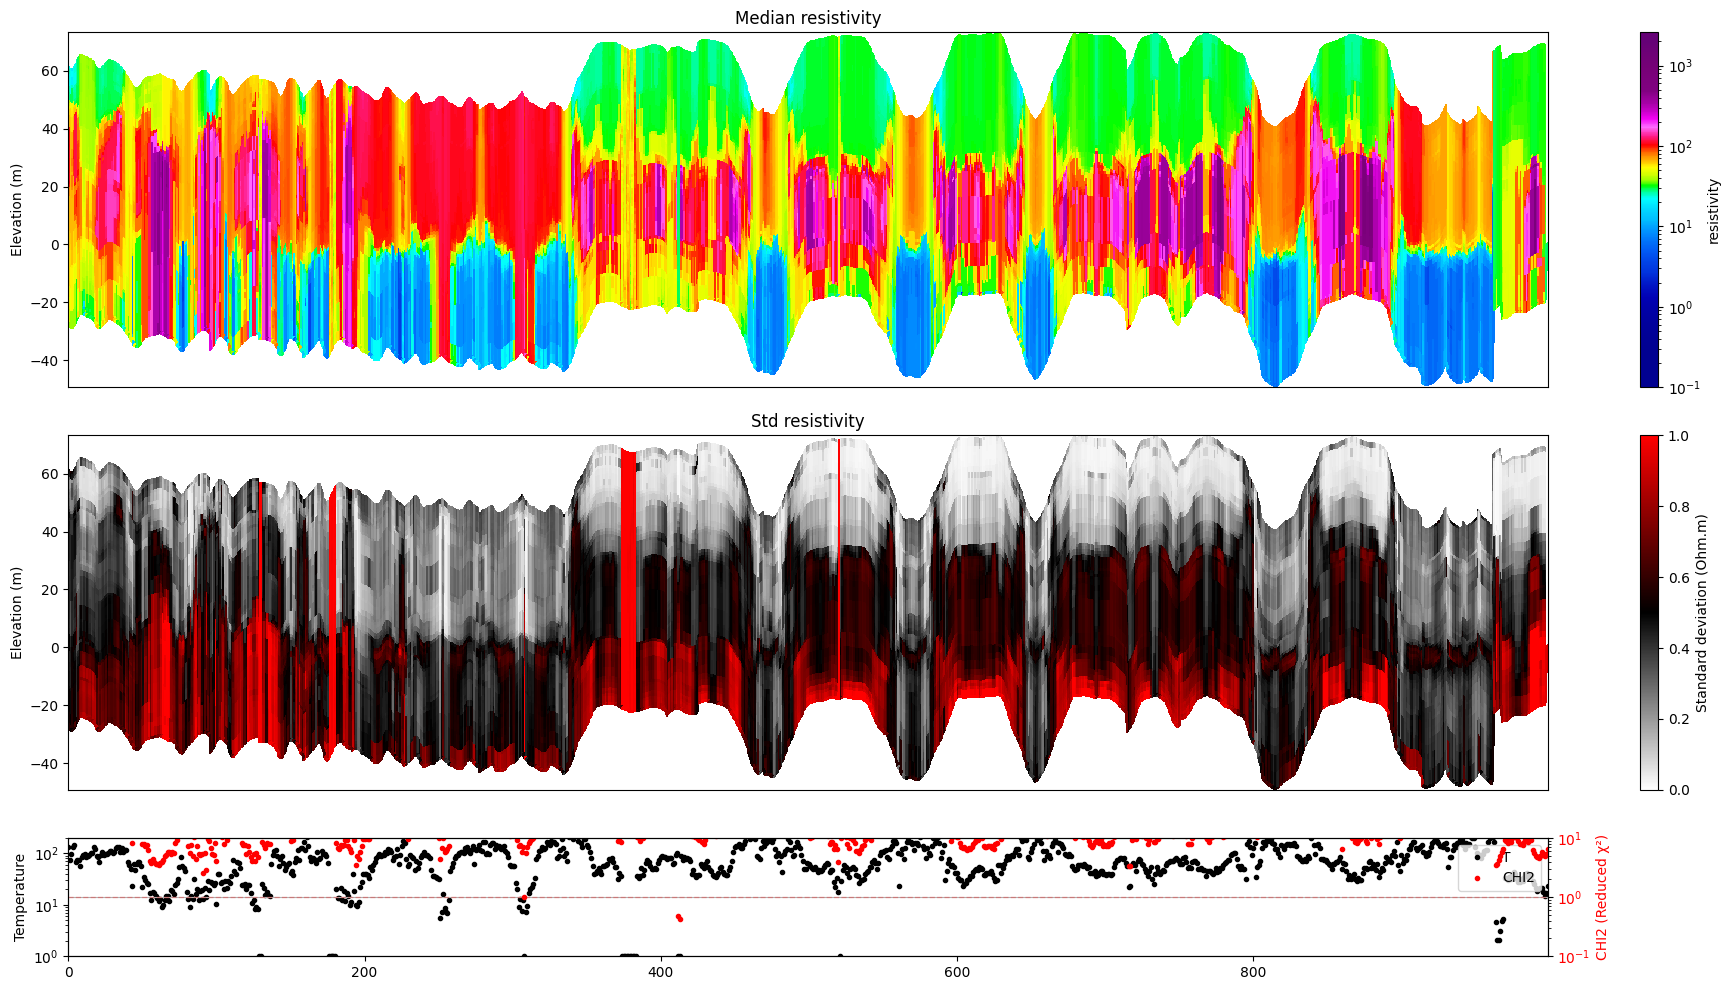

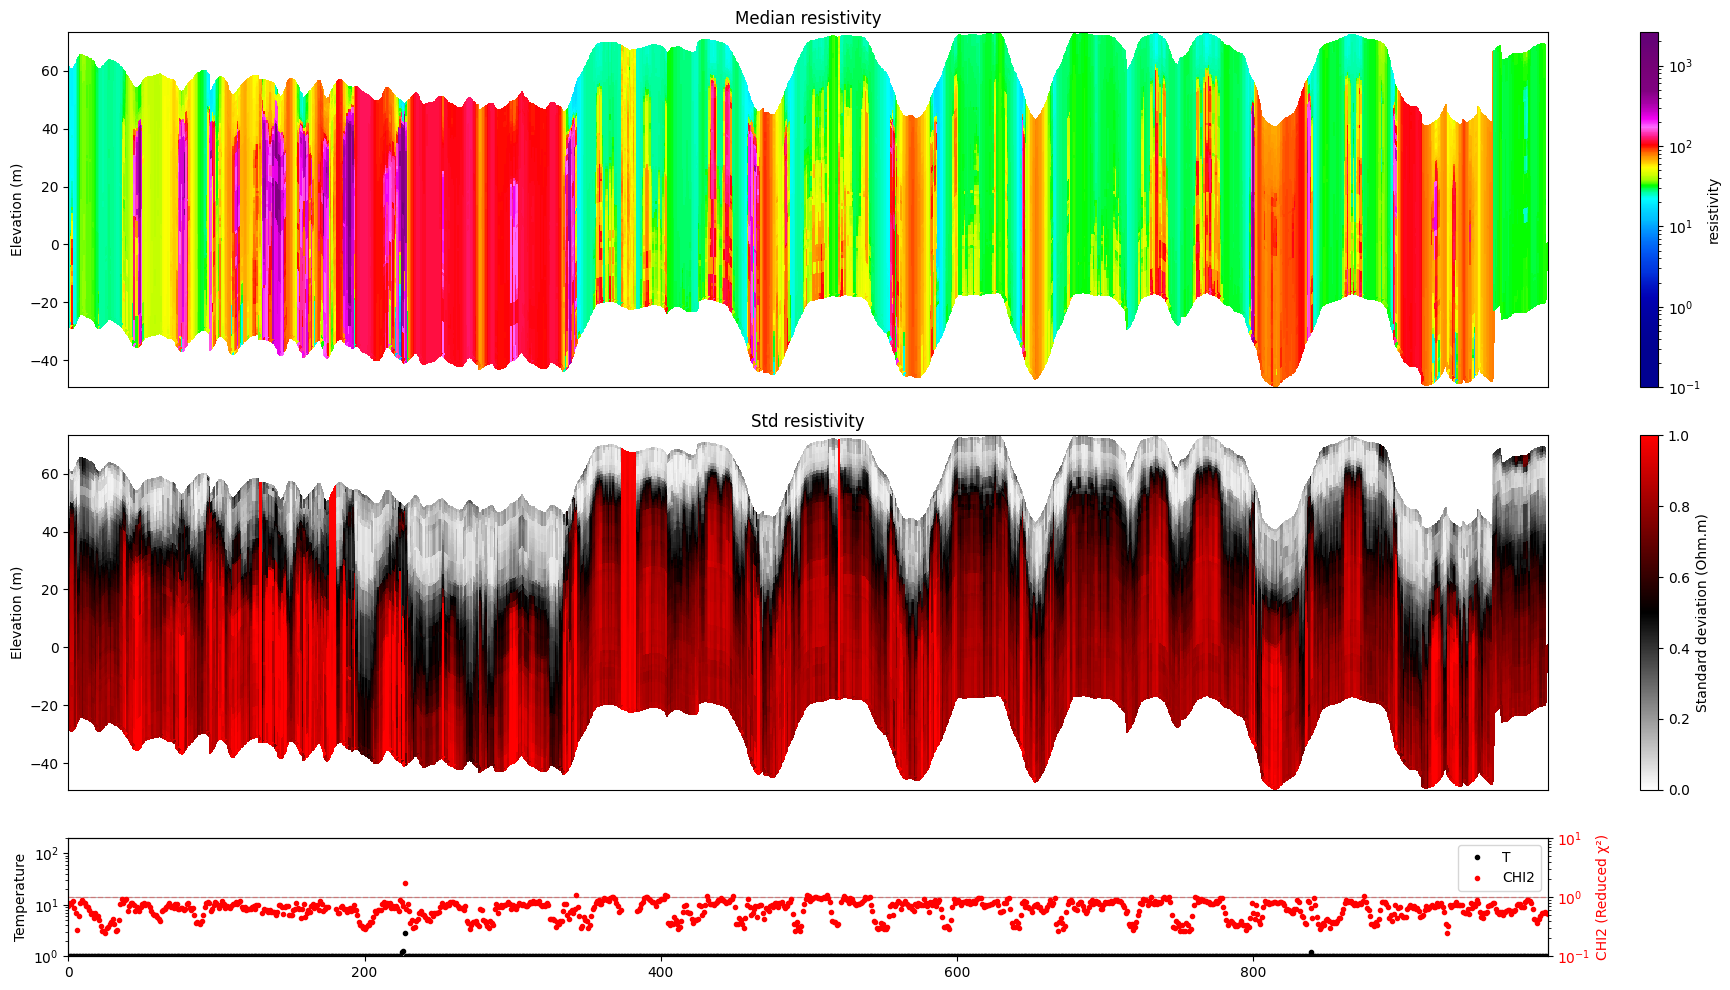

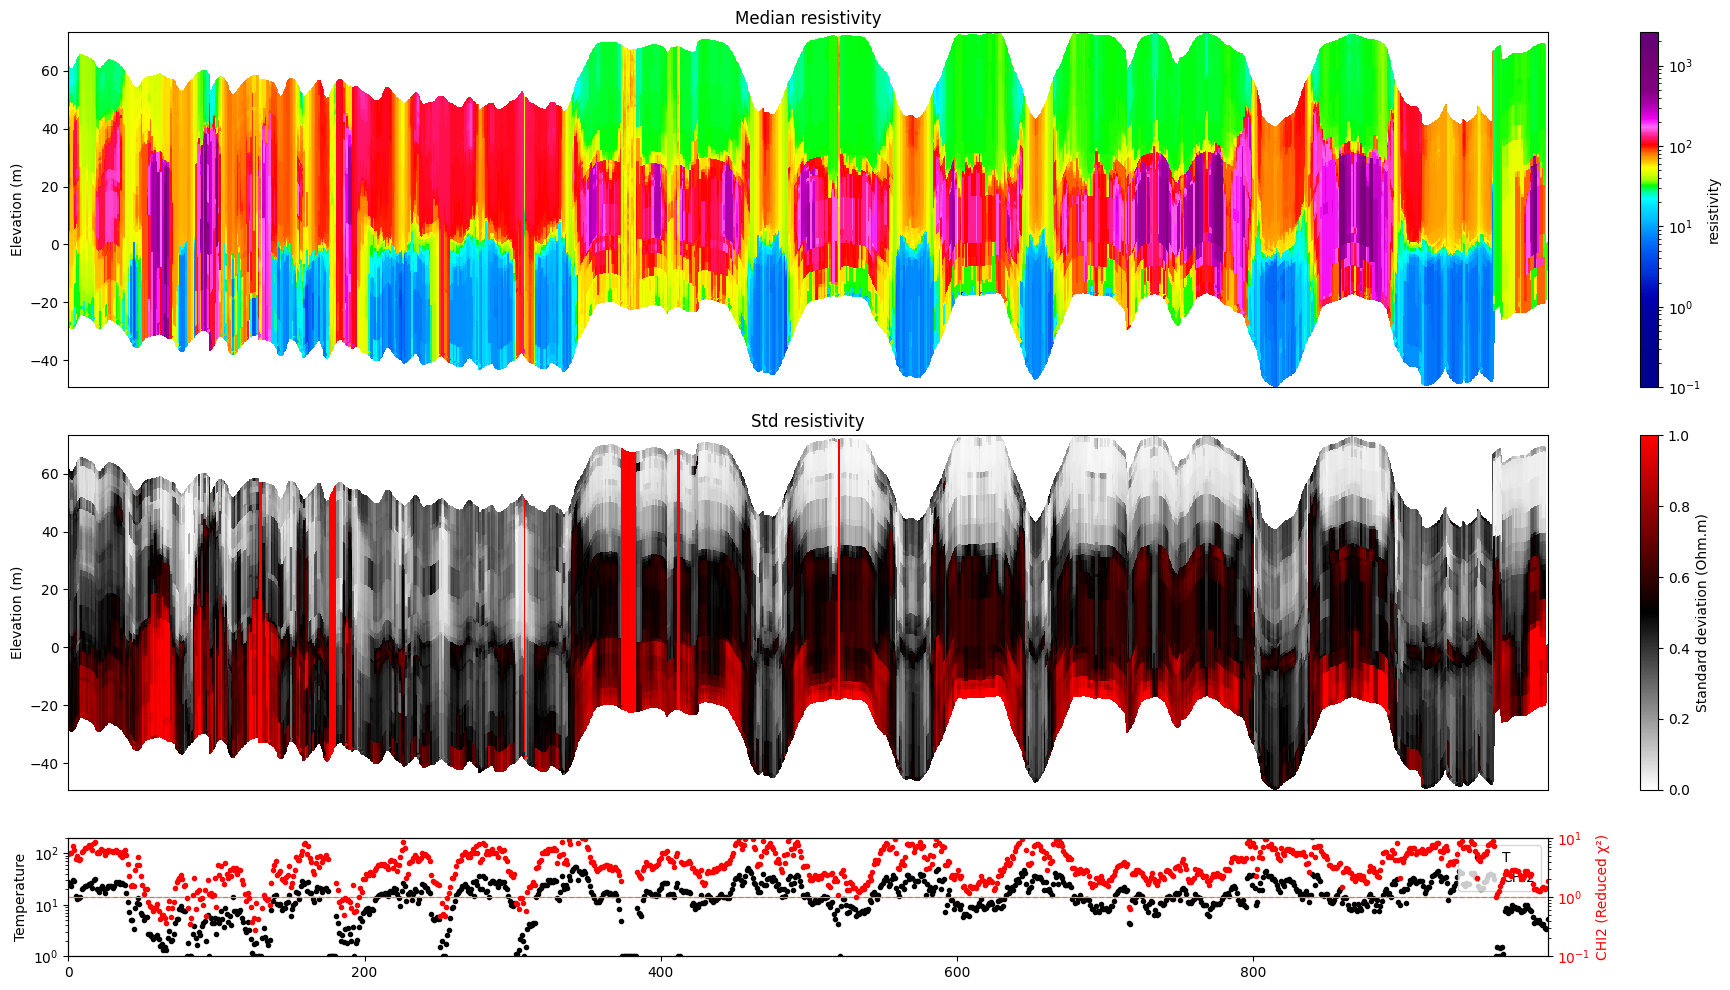

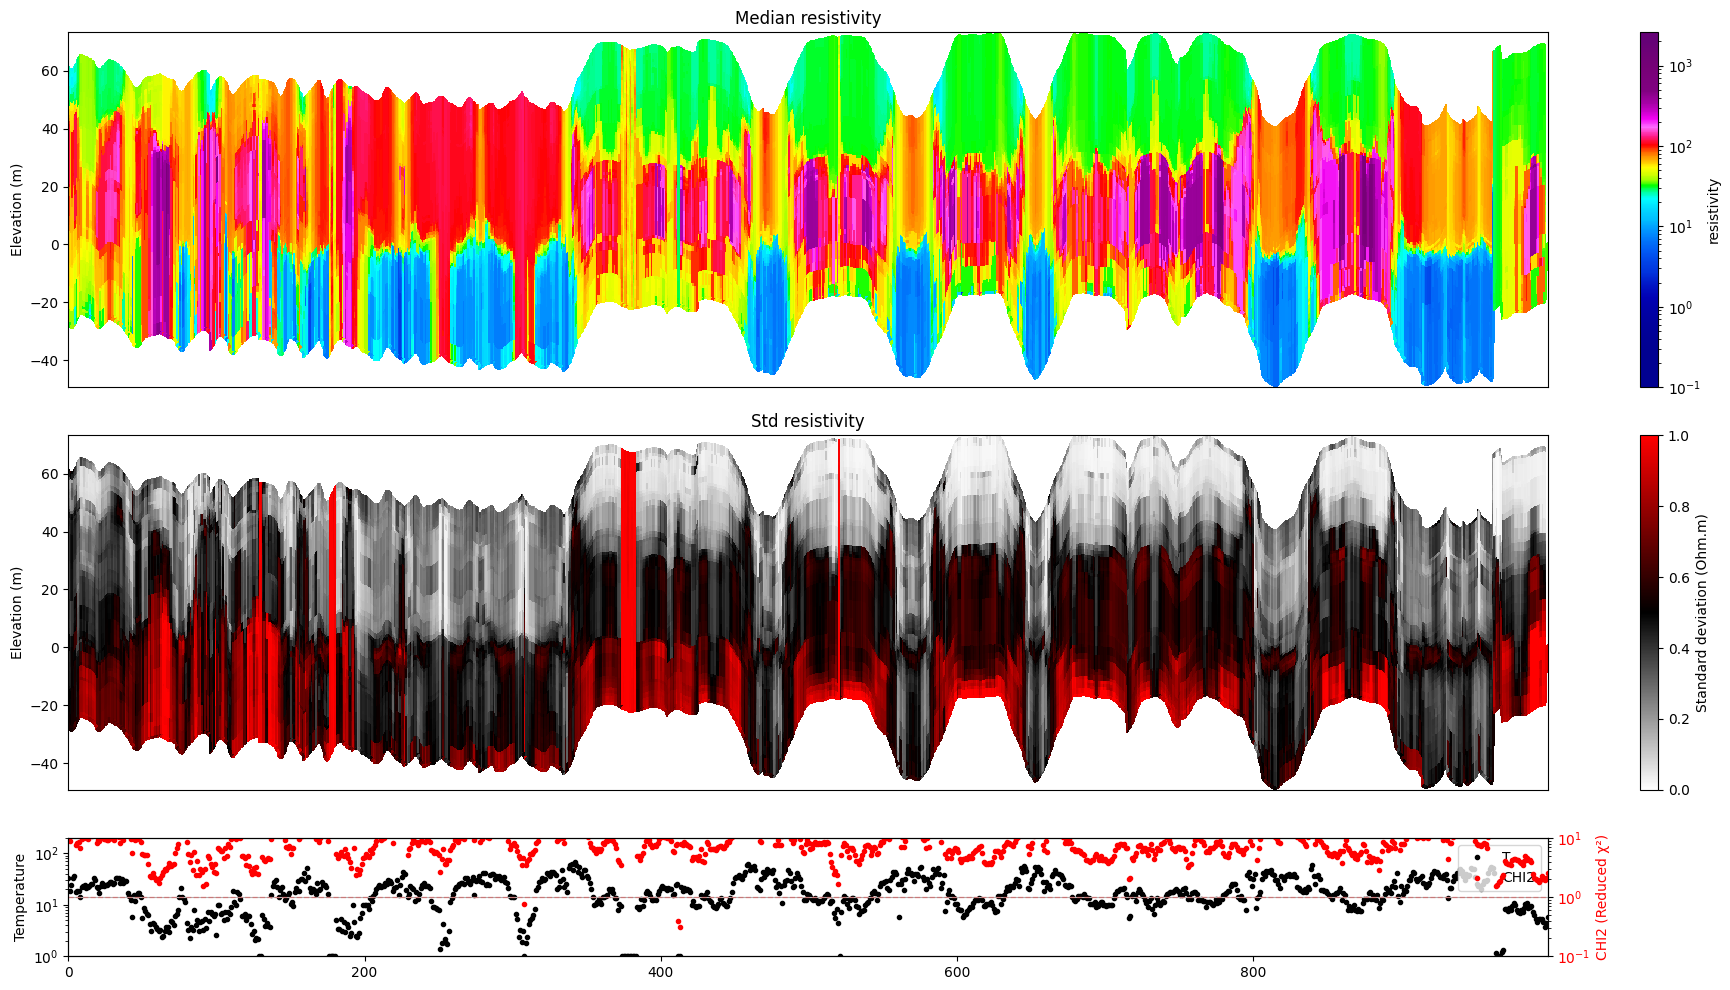

In [12]:
for f_post_h5 in f_post_arr:
    # % Plot Profiles
    ig.plot_profile(f_post_h5, i1=1000, i2=2000, im=1, hardcopy=hardcopy)

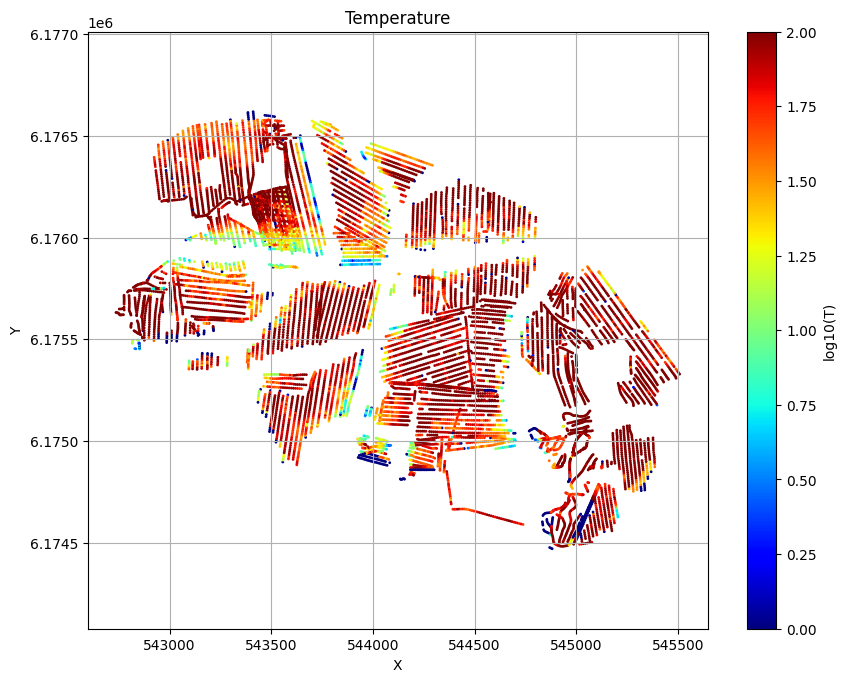

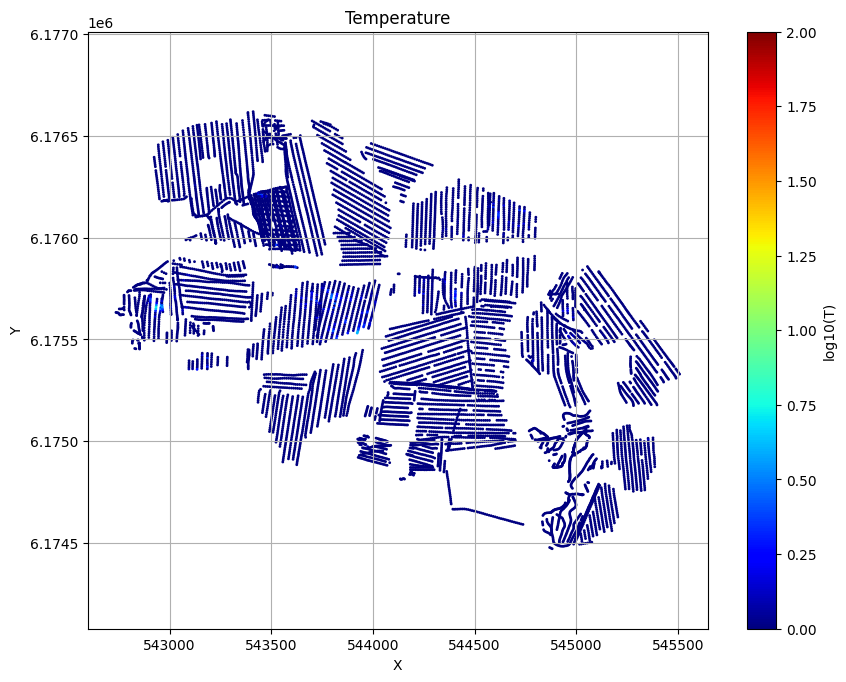

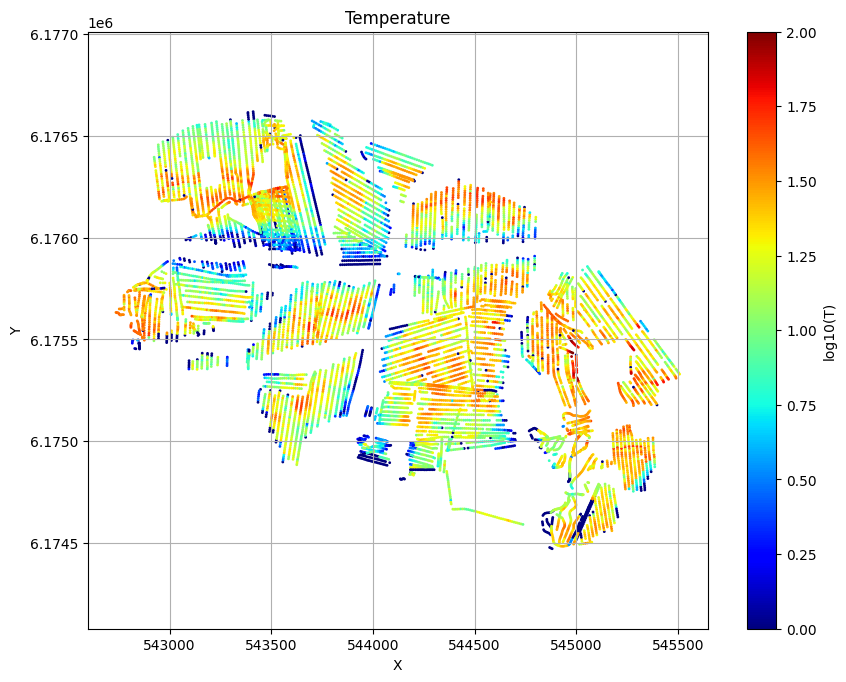

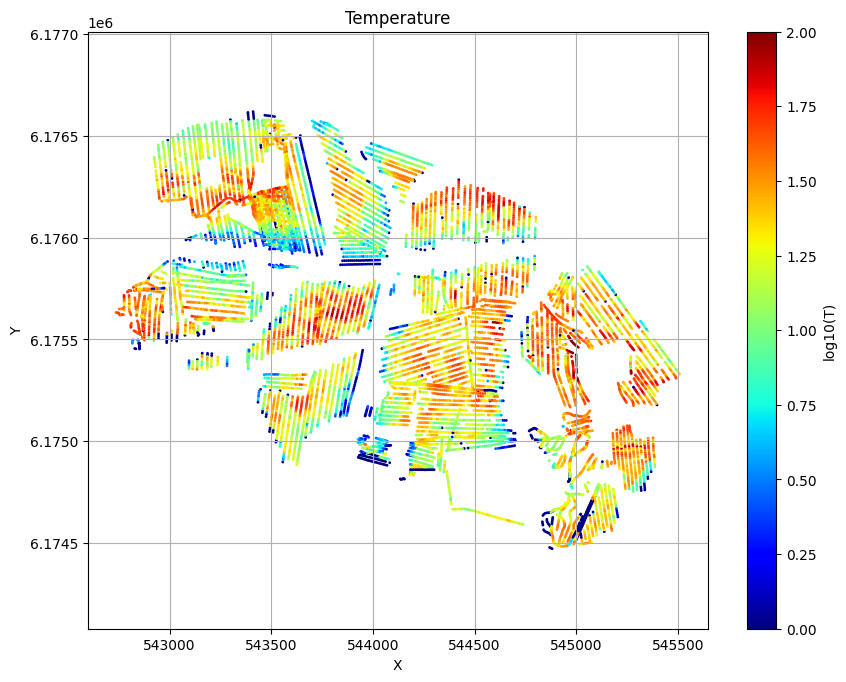

In [13]:
for f_post_h5 in f_post_arr:
    ig.plot_T_EV(f_post_h5, pl='T', hardcopy=hardcopy)
    plt.show()
    #ig.plot_T_EV(f_post_h5, pl='EV', hardcopy=hardcopy)

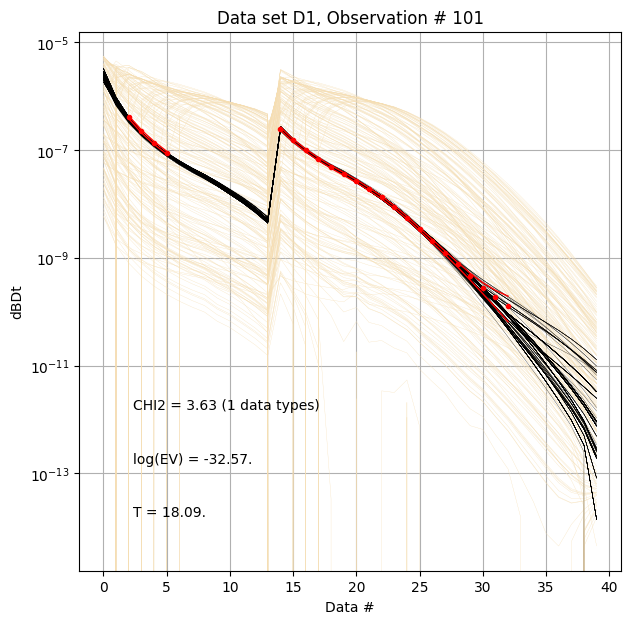

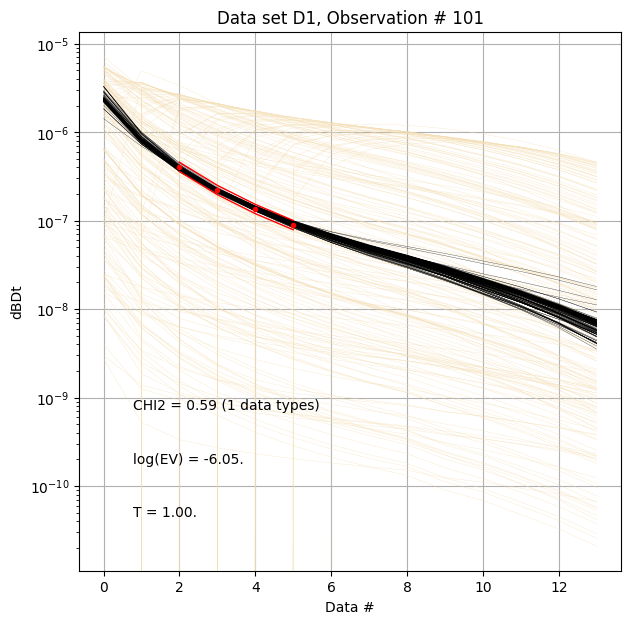

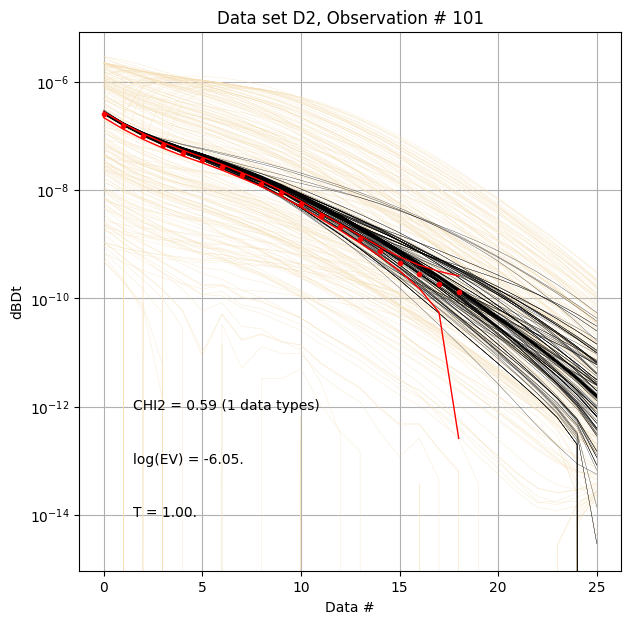

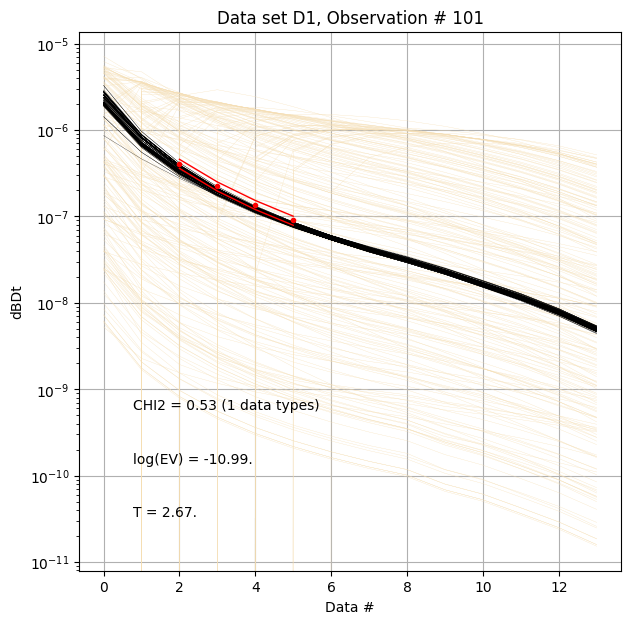

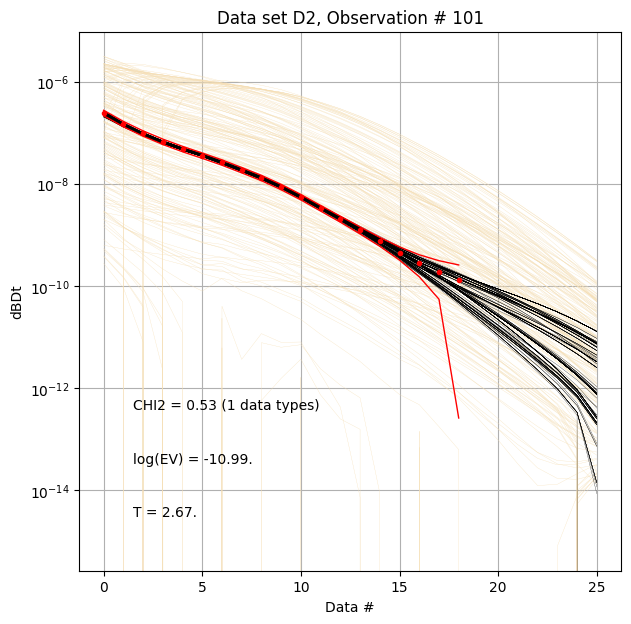

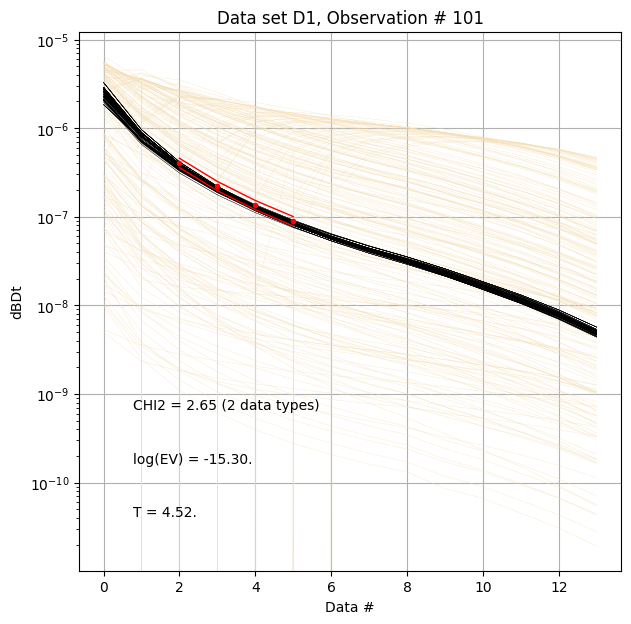

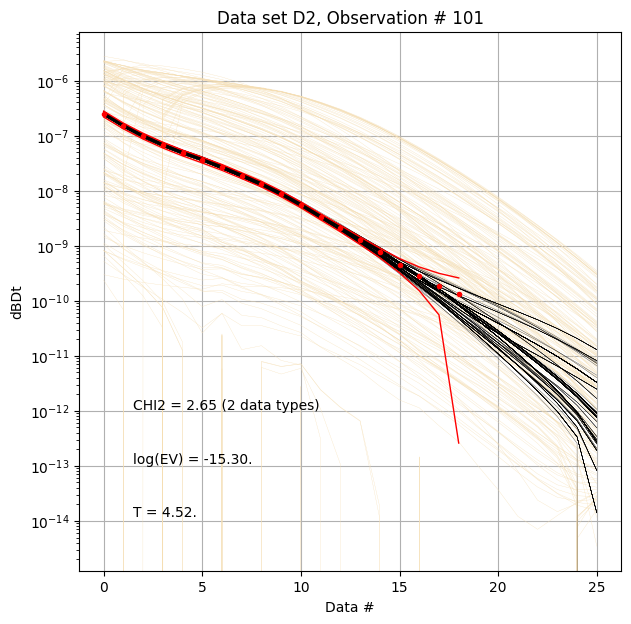

In [14]:
for f_post_h5 in f_post_arr:
    # % Plot prior, posterior, and observed  data
    ig.plot_data_prior_post(f_post_h5, i_plot=100, hardcopy=hardcopy)
    #ig.plot_data_prior_post(f_post_h5, i_plot=0, hardcopy=hardcopy)




Text(0, 0.5, 'N_UNIQUE')

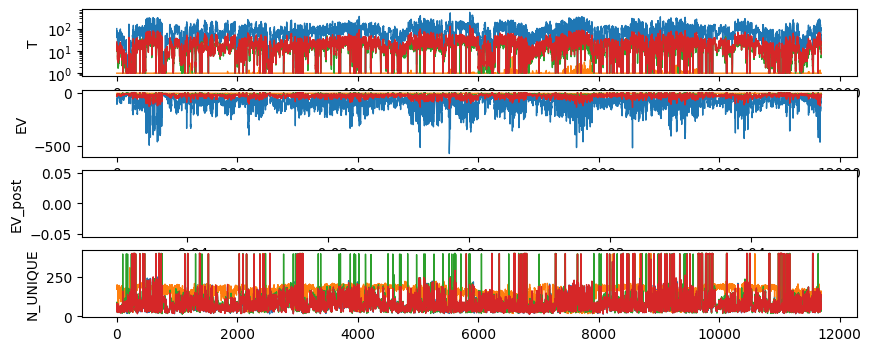

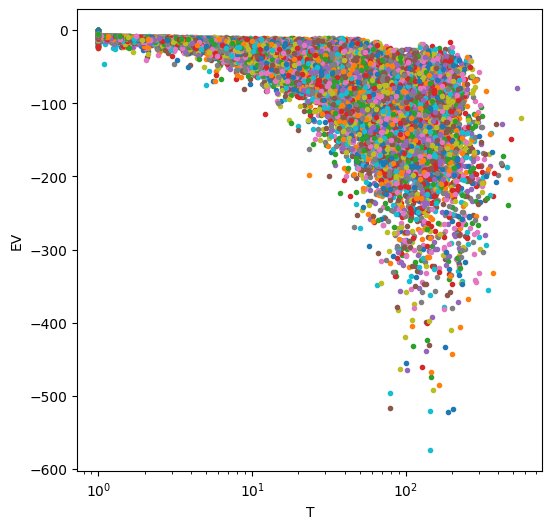

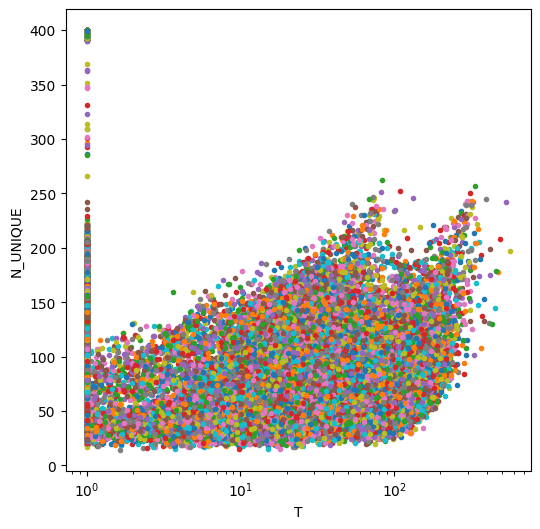

In [15]:
with h5py.File(f_data_h5, 'r') as f:    
    nobs = f['D1/d_obs'].shape[0]
    
ni=len(f_post_arr)

T = np.zeros((ni,nobs))
EV = np.zeros((ni,nobs))
EV_post = np.zeros((ni,nobs))
N_UNIQUE = np.zeros((ni,nobs))

i=-1
for f_post_h5 in f_post_arr:
    with h5py.File(f_post_h5, 'r') as f:
        i=i+1
        T[i] = f['/T'][:]
        EV[i] = f['/EV'][:]
        N_UNIQUE[i] = f['/N_UNIQUE'][:]
        EV_post[i] = f['/EV_post'][:]
    

fig, ax = plt.subplots(4,1,figsize=(10,4))
ax[0].semilogy(T.T,'-', linewidth=1)
ax[0].set_ylabel('T')
ax[1].plot(EV.T,'-', linewidth=1)
ax[1].set_ylabel('EV')
ax[2].plot(EV_post.T,'-', linewidth=1)
ax[2].set_ylabel('EV_post')
ax[3].plot(N_UNIQUE.T,'-', linewidth=1)
ax[3].set_ylabel('N_UNIQUE')

fig=plt.figure(figsize=(6,6))
plt.semilogx(T,EV,'.')
plt.xlabel('T')
plt.ylabel('EV')


fig=plt.figure(figsize=(6,6))
plt.semilogx(T,N_UNIQUE,'.')
plt.xlabel('T')
plt.ylabel('N_UNIQUE')



In [16]:
#ig.post_to_csv(f_post_h5)